In [ ]:
from IPython import display
from IPython.display import Markdown as md

from base64 import b64decode
import os
import pandas as pd

# Eurostat Data

## Database
https://ec.europa.eu/eurostat/web/main/data/database

In [ ]:
%%html
<iframe src="https://ec.europa.eu/eurostat/databrowser/view/nama_10_gdp/default/table?lang=en" width="1000" height="600"></iframe>

In [ ]:
%%html
<iframe src="https://ec.europa.eu/eurostat/cache/metadata/en/nama10_esms.htm" width="1000" height="600"></iframe>

## Json & Unicode Web Services
https://ec.europa.eu/eurostat/web/json-and-unicode-web-services/getting-started/rest-request

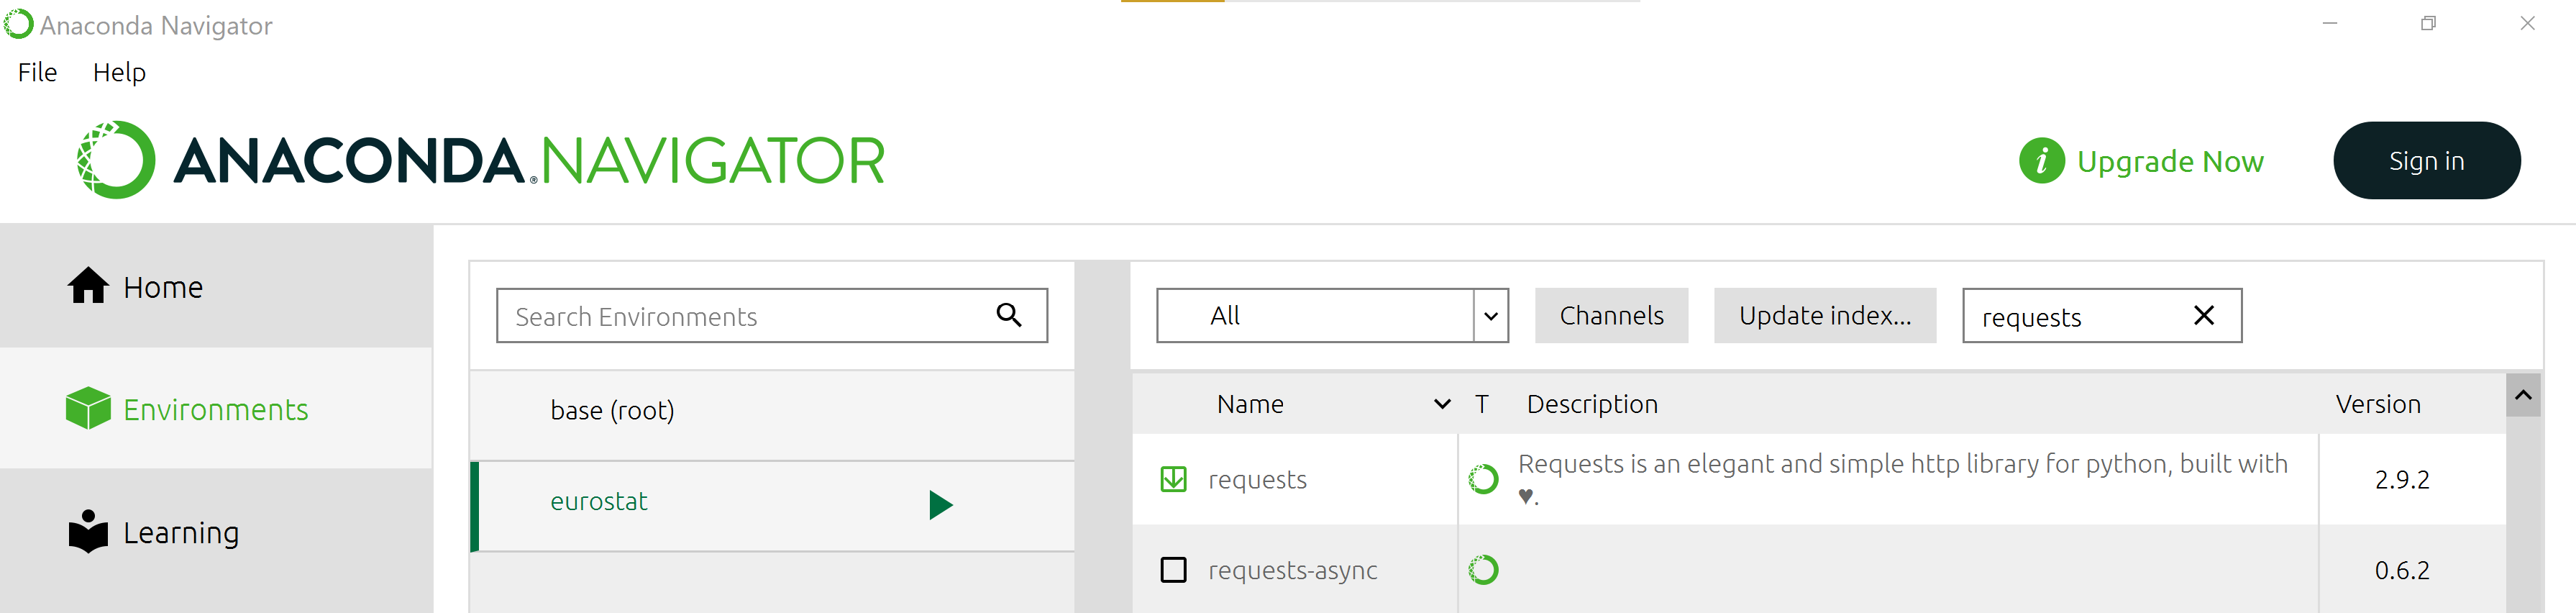

In [ ]:
base64_data = "iVBORw0KGgoAAAANSUhEUgAADf4AAANUCAYAAABYbd1DAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAALEoAACxKAXd6dE0AAP+lSURBVHhe7N0HfBN1H8fxXwej7BaQDS1liIDMqqCiUpClIstHRXGDW3Cij3s9qAi4pYADZcjeoFBUZCgFKnt2sHcLlA1tn/yv/460SZq0aXppP2/Nq//fv+3lLneXtiTf+/mkWggAAAAAAAAAAICT1v5wlR4BrqvZJVKPAAAAipcaNWroEQAAAAAAAADkzld/BAAAAAAAAAAAAAAAAAAAAAAAAAAAJkDwDwAAAAAAAAAAAAAAAAAAAAAAAAAAE/FJtdBjAAAAAAAAAAAAAAAAAAAAAAAAAABQyOj4BwAAAAAAAAAAAAAAAAAAAAAAAACAiRD8AwAAAAAAAAAAAAAAAAAAAAAAAADARAj+AQAAAAAAAAAAAAAAAAAAAAAAAABgIgT/AAAAAAAAAAAAAAAAAAAAAAAAAAAwEYJ/AAAAAAAAAAAAAAAAAAAAAAAAAACYCME/AAAAAAAAAAAAAAAAAAAAAAAAAABMhOAfAAAAAAAAAAAAAAAAAAAAAAAAAAAmQvAPAAAAAAAAAAAAAAAAAAAAAAAAAAAT8Um10OMC0WNeG7mQfF5XmfqEDpAnmr2iKwAAAAAAAAAAAAAAAAAAAAAAAAAAoLgt+Dds3VAZ2nqYMe676EaZ1vUvY6zMipsoX274QFc51SkXIt+Hz9MVAAAAAAAAAAAAAAAAAAAAAAAAAADFV76Df//59RY5fv6IhFRoJGNumWnMdZrd1Pg4p8dqKeNf1hgfOLNXBizpaowdWdJzsx4BAAAAAAAAAAAAAAAAAAAAAAAAAFD8+OqPefLNpo+M0J+SHvrrMudq46Nyx/xrZF78FGNcs2wd+eC6b4yxIyo0+PyKB3UFAAAAAAAAAAAAAAAAAAAAAAAAAEDxku+Of9mld/tTyviXkzk9/jHGG45FuRzoo/sfAAAAAAAAAAAAAAAAAAAAAAAAAKC4yVPHPxXuU539ZsVN1DOZVFjvmatfN8bpob/4Uzvz1MUva4gQAAAAAAAAAAAAAAAAAAAAAAAAAIDiIE8d/7IH8nLrzJffAB+d/wAAAAAAAAAAAAAAAAAAAAAAAAAAxYXTwT8V3lt4e7SU8C1pN/iXPu9MUG/FwUh5a/Wzusod4T8AAAAAAAAAAAAAAAAAAAAAAAAAQHHgqz861HVuC+Pj2UunjY9Z9Qy5x/g4eec4md71L6cDetfXCDe+dnHPTXrGsfx2DQQAAAAAAAAAAAAAAAAAAAAAAAAAwBvk2vFv3dFV8vLKR8Xf119mdFspZfzL6s+411cb/yczY3/WlW2tq7aTj9uP1RWQF4kSPW2qRCWocZCE9esrrQKNT8DjEiUuMlIWxyRIUGiYhIe3EnYFAAAAAAAAAAAAAAAAAAAAAAAA4ETwz5OOnjss9/zWUVe2OdtR0GmJ0TJtapQYOTCCYMWAOYN/cZERsjhGFxahnQdKeIgunBUXKRHpCwntLANdXoCHZV1fizxtMwAAAAAAAAAAAAAAAAAAAAAAMJWIiAg9ypuBAwfqEYqS48cT5J9//pZOnTpJyZIl9axrLl68KEuWLJFrr71OKlcO0rNFl6/+6NDhswdk0B+9pdPspkZ9z2/hxnjqrh+M2l2qBlSTyV2W6sq29HVwl8T4GB36UxIkJj5Rj4HCE7M4UuL0GAAAAAAAAAAAAAAAAAAAAAAAAPBmKvR34OBBmTd/vhHgc5X6HvW9ahlqWcWBw+CfCtmpW//FnSXm5HY9K/Kfho/IFQE1pF+DB/WM+1QpXU36hA7QVUGLk3Vprd8yJEStI3AFE4iRxZFF/EgMaS2dQ9PS1UGhYdKabn8AAAAAAAAAAAAAAAAAAAAAABQZqnOfKzcUbarTX1BQkCQkJLgc/ksP/anvVctQyyoOHAb/KpYM1CNrd4bcKxNvXaIr93ui2St6ZNujS3vqUT7FxUqMHqqdniZGYkn+wQxiFkvRzv4FSkh4X+OHc9/wVpbKOyXGRUt05DSJKOpBTQAAAAAAAAAAAAAAAAAAAAAAgDwqWbKk3Najh8vhv+yhP7UMtaziwCfVQo+tXE65JP6+JYyOf1ktvD1aSvh65sHJft9ZLem5WY/yLi4yQhYbyb8gCescKjGLo8To/xfaWQaG036saEqU6GlTJa3Ro2W/9+srrUyQOMt6LIaGisTE6E6UQWHSr6+Tobi4SIlIWwjHsKckRsu0qTxvAAAAAAAAAAAAAAAAAAAAAACKr4iICD3Km/Ruf+nLoftf0eZKkK84h/4Uux3/us5taXz08cn8kkaVmnos9Ffw4iQ2o91fqASHBEtoRtO/WMtngcIR1DpcwtKPxYQoiYxO1AUAAAAAAAAAAAAAAAAAAAAAAADgvZzt/FfcQ3+KzeDft5s+Nj6euJAgi+/YaIxVh72vb5oiE3fkL4Xrinev/VKPchq7ZaQe5U1i9FpJz/2FtlEd1QIlODP5J2sJW6HQBEqr8DDJzP5FCocjAAAAAAAAAAAAAAAAAAAAAAAwM9Wpz5Ubiq/cwn+E/tLYDP5Ni/nR+Nh30Y3GRxX6UzrNbiq31OpujD2hffVb9CinyTvH6lFeJEp8TIIeh0r9kLRRYHBoZtgqJt7yVUAhCWwlbUL1WBIkKjKa4xEAAAAAAAAAAAAAAAAAAAAAAABFgr3wH6G/TD6pFnqcQQX8lDfCRshNNbsY4/S59BCgp6Tfry15XpfEaJk2NUqM6F9oZxkYrpN/kijR06ZKlPGJIAnr11daBRqfsC/rsoLCpF9f1T3QMp0YJ+si10qM5SBLFxQUKqFtWkurkNwWmiYxLlriY2MkJjHBcrDqSYv05QRbluPckpREy/LiZd3aGEm0LCzLWlmWF+jc8hITJS5+nayNSTROnkyZy8h12wrw8VLUY6a2MetyLAuS0NA20rpViOW+XNvH7t0H9sVFRshiowVl1nWKk8iIxZmdKTsPlIxD1Za4SIlIW0i249q2vGxbYvQ0mZr24Fl2Xz/pm+sJYmF3vbJuX6h0HhgujtfYJPs36/Y4lMv9u+N8streLI+h5XyKjLQ8tumLtZxrAy3nGgAAAAAAAAAAAAAAAAAAAAAA7hYREWF8HOhiF7/s35fX5cC7ZQ/6KYT+0tgN/k3p8ocEla4qD0XeJt+Hz8uYLwrBv6zhpexhKpeDTTaCbCcip8nijMSNDaGdpZ/lTu0uOS5Spi2OyRLOsyNLcM6RRMvyIp1Ynv1gWaJllSIdb1O6oFAJCw93EHYqgMdLyR50ssWybp3DW1vuz4lgmJv3QW5sB/8srEJmuYTjsn6to+BffrYt6/5zKqznKIjnQvDP2f3b17J/nQn+5ecxsNonjti7fzeeT7aCf7a2zbIdBP8AAAAAAAAAAAAAAAAAAAAA5EV6GMtdCHUVPQT/kF9Zw38Kob80vvqjlZ86/WqE/rrObSF7T8dlhO++uukX46N3S5T4jMBNqNTPljQKDA6VtGyoSEJMvOWrXXMiOj3EFiShYWHSuXNn6RxmWWb6QpWYxRIZbX/JcbFZQzuqm1mYhKnldLZ8DM2yoIQomRoZpwvb4iKnyVSrEFDa8oz10svLumo5xUnktKlWISWjG1qY+n61bWGW5WVdpxiJmjpNHGyeFXc8XsY6TrUOhQWFhurHrLNlG/U+tazb4sh1uYe9LNy5D/IlJFw6h+qxqPXP/33la9sCgyXzS2IkNrfVSYzP0nUuVILtBtgcMMKGTu7faR7Yv5VaG/ebcazqaRWuy5g3bm1sbG/Bnk/GY+VMoBEAAAAAAAAAAAAAAAAAAAAAAACm5mOr45+iQn+XUy7rKo2nu/0pbu/4l2tXtKwdtNSX2OuCp1l1QEsTZFluuI0OdVm7CTrqcGZ0f0sMlbA2raVViI2klFXHMftdzazvL8iyLeGWbbGVvEqUuOh1cqJSuOX+9JTB+rFQwa3O4ZZ1trWI7F9rb/vc/nhlX0d7HfjUNkbK4swVtLD/2LlrHzjLbsc/Q9bOeA6OyVyP7TT53Tar/eKos6CF4w6aWbfLDfs3Rxc9D+zfrMdzLo9Fzm1xw/lk9XWhEhoaIzGW1bY+p9SxHy8hrej4BwAAAAAAAAAAAAAAAAAAAABwPzr+IT+ydvtTnf6U9HFx7/pns+Pf2cunc4T+igrV6StdaPZ2f4ZAadUmo8WaxOTa0iyboDCbITYlsFW4hGU083LQLc0IN6kQns1EULYucAkSE2+jHVhitERmJoyM4JLt0J8SKCGWdbMO/VnErbMOHlnWye4i1OPWt5/V9q11pk1Zfh+vrOtoNxSmqG3sm+Vxy4U79oHbhEjrzAdCYtZGS77uLZ/bFtiqjeVo0GJixf4ZYt1ds43N5FwuXNm/4SbfvwV+PunQnwpYWp1T6tgn9AcAAAAAAAAAAAAAAAAAAAAAAMwle+hPBf3UTY3VnPqc+priymbwr4x/uRzd9FQ9L36KrrxVnGTm/kLFZu5PCanvZLApuyAJC7cXTFICJTg0M8CVeMJ2kEeFdOwvI01IfccJp8T4mLQuZBZBYeF56EaXKNFrs4QkO9vqNpZdoLQKD7M8CmkSYuJzCajl9/HKto5tnHjcWmeunyPu2AfuZBWCTIiSSGdClXbkf9tCJPPTDgKsifGSmfur78Txk11R2r+eOJ8sgsIkPC8BSwAAAAAAAAAAAAAAAAAAAAAAAA+yFfpT3f3UjfBfGpvBv06zm8r6Y1FG2K9JYAvpWLuHMT9q/Tuy/OASY1zYfCz/uSwuVjJzf46CSE4Gm7ILCpXgXDI3gZUyvyAh4YQe5U/O5bih05qcsCxXD4PCpLWzqa3AYMnI6iXEiMNGafl+vPKwjlnXz43ctS/tyxYCi4qUfGT/XGJr27KG4ux1xcwaPrXdXTM3RWn/euB8snAmHAkAAAAAAAAAAAAAAAAAAAAAgJlEREQYNxQf9kJ/6Qj/pbEZ/Otat5e8sOJBuX1+mHzRYaK81uZjuXXO1cbn3l79nPHREzYdX6dHOd1/5ZN65Ly4zHZ/uQaRrIJNa6Nz77RVYBIlMS5O4uKiJToyUiKnTZNp0yxPaIsztyWHrJ3WLAd4JT10SeKJzG0OrORCmChQMrN6CVKgebg8r6Or8rAPCkJgKwnPbPsnUZHuOC7zuG25dsXMEj51JeiWVVHavx45n4IkKE8nOwAAAAAAAAAAAAAAAAAAAAAAgGfkFvpLR/jPTvDvxVbvGx/PXT4r02PGS2pqivx2xwbj5kmDl9+vRzkNaOxi8C8xWtZmyfHELE5LA9u9ZQ39ONFpy70SJS46UqYZ6zJVpi5eLIsXR0lUTIzEWA5Uy//Oy2tg6oTlfvQwyMU0USXLCeUR+VjH3LlxH7hRYKs2mYG7hChZ52w3Sivu2LYQaZ0RQrTRFTNL+DQoNNjjx2DuPLx/PXI+ZQ0JAgAAAAAAAAAAAAAAAAAAAADgHQYOHGh1Q9HlbOgvXXEP/9kM/mXVJ3SAdJ7TXDrNbirrj0XJkp6b9We8S2J8TEbwxnUJEuOp5F9inERGTJXFUdbrqw7QoKBQCQ0Nk7DOnaVzRugKbmfqfRAi4Z2zdKNcHGmj254Dbty2wOBQyYj+ZUv+xa2L0ssPktBgk6XROMcAAAAAAAAAAAAAAAAAAAAAAAA8ytXQX7riHP6zG/wrW6K8XBnYXFdpXlr5iBEA9ARH99OokqvrkCjx6e3HLIJCVbjHmVtm8CchJt6ylIKWKNGRiyW912BQaJh07peWVu7bt6/lFi7h4a2kVUiIhHiwtVdCwgk9cs6JjHZpQeL2Rm12uLqO9plzH1gJCZfM7F+MLI50Nvrn5m0LDJaMUyQmNksAMU5i0+8ktI20csPDVJT2rzecTwAAAAAAAAAAAAAAAAAAAAAAuCoiIsKlG4qXJUuWGME9V0J/6bKH/9SyigO7wb/Z3f+WLztMlqGrHtMz1goyADg7bpIe2fb1TVP0yEmJ8ZKR+wsKk/BwFe5x5tZGMvJVCTFS4E3/4tZJVPp6hnaWvuGtJCQv2aPASpLxbVaBLBdUCsro5iaJJ1wIPSbKiYwvDpQCzcblaR1PWE5wPbTFXfuggIWEd848NmPWSrQzG+/2bQuU4Mzkn2Q0/YuLzQjWhdYP0aM8KEr71xvOJwAAAAAAAAAAAAAAAAAAAAAAgAJy7bXXSc0aNVwO/aVLD/+pZahlFQd2g3/p1hxZqUc5PfdXfz1ynwvJ5+WLDe/rKicfy3+uilsXJelZn6DQ4MxQXK5CpHVYelwnQaLW5SlC57TEzISPBOXS2ivr1+ZUyfL9epg1kOWKrN3cEqLE6U23ClkGWdakAGUNODobzMwSSrPFffugoIVIeEbbP8uxGRktiVnDZTYUxLYFBodm3GeMPtDi0tv9BYVJ63zk/orU/vWG8wkAAAAAAAAAAAAAAAAAAAAAgDwYOHBgvm4oHipXDpLu3bvnKfSXTn2vWoZaVnGQa/Dv3Wu/FH9ff11Z25zwrzz2ey9d5Z8K/fWY10ZXti3uuUmPnBUn6TkkkSAJDXatZVbWYFOeu+e5XZysy2hbZkugtGqT0Q9OYhZH5mG9s3ZzsyxjbbQTXcoSJToyM2QZ2qZVZnCrQIRI/cyWjE4EMy3rt9ZRLMwVue0DDwhpLZm51CiJXOeu9XFh2wJbScahZpwfmeebayFbW7xs/zrs5OcN5xMAAAAAAAAAAAAAAAAAAAAAAADMItfgX/TRv2VGtxWypOfmjJuSPh5zy0yjzq9Fe2bmGvq7ttpNeuSCrB3AgkLFxdyfSv5ldurKa/c8JwVWyly5hKh1EmcrGZQYJ5HTFjvsambIGgqzfPXiaZG2l2dIlLjoSInOtm2BrcKtgmVTc1tG5FTJyErlt9ubk0Jah2UJZi6WaZFxtgNVlsctelqW9bPDrfugwAVKq/DM7U+IickIidlSUNsWkpHOs5wf0ennm+shW1tMv3+tuhImyAk9tMUbzicAAAAAAAAAAAAAAAAAAAAAAACYg9/bFnps0zXVbpRuc1vJ+O1fZ9wGXPmU3PtbJ/nzwK8ycWeEfL1xmDF/T6PHxM/HT3+n8zrNbiorDy3VlX0/dlqgR86LW7dEYnW4JqjZ9dKmRkBa4bQAKX0hTrYcOGdUiT5B0qZ+lkDT+UOyZcsBMT4bUEuaXlXD8h0OnIiTtRkrFGq9rEAfObE2VgebEiV2S5zEnbggAT7n5cSJeFm3boUsWb5ZEs8FSVhYTTlwwM5yDAFS46ogy91ZlqdW7pxa3lpZG3dCTlw4KT7nsyxzyVqJtSwrILSNWC9GLyN9nfQy4izLOHjBx7IMy7KyLkOvjlqfzn3bSw1dWnHn46UE1JAavpn751xirGxZG2dZrwvik+1xU18SFNZZmp2PNcZq+2o1vUqsDgm37gPnnYhLf/xsrJMj2bY/g631Kahty7LcxPTvCb1Bbrsqt8fjhMRlrE+QhLapn7OjnRfs35NxW/T9WZYXZ1m3CwHGuRG/bp0cCqyf5f4L4HyS83JoS/r923kMAQAAAAAAAAAAAAAAAAAAAAAA4HVy7finpHf5y+rIuYOyJeFfOXhmn54RIyCYFuL7Xc/Yp75Pfa26OcPWOuQuTmIz2nblvQNZYHBolq5jayU6PZDjdiES3i9LhzNJkISYKFm8eLHlFiUxMar9l2U7OveVVpXSvsIxy/L69pOwzJaFlkXGSExU9mU6YlnGQOtlJBjLUN+fcxlBoZ2lX99wy3d5TmCrvtIvs72hRYJlnXJuY1BYP+mb6wPn7n1Q8Kw6yTlUUNsWIhlN/7TQ+u47Asy9f627Lqquf+nnRlSMrScK859PAAAAAAAAAAAAAAAAAAAAAAAAKHxOBf+U8Z0W6VHu3vzn6YxQn73b/Uu66K/OXd5CfyKJ0WslM/cXKnnM/ankn2TmdBIkJr7Akn8q5SR9B/aTzpY7DMqadRJLrUJA/fpKuEspIBVM6isD+3U2wkbWy7Qs1TIRGqaWO9DBctOW0c/OMtREaFiYdLYso69lIYXRcUyFwzK2Uc+lUY+bXrdWTq6Z2/dBQbPsnzbZknf2FNC2hbTOGqYLFTfm/gym3r9qeZZ1C812YgQFBYrt7KD5zycAAAAAAAAAAAAAAAAAAAAAAAAULp9UCz3O1e6kGHlk6R1GEE+F9zwhr6E/AMVRnERGLNaB31DpPJBueQAAAAAAAAAAAAAAAAAAAAAAAPA+Tnf8U+qVD5VFt/+rq4JH6A+ASxJPSEY/zqAgOx33AAAAAAAAAAAAAAAAAAAAAAAAAHNzKfin+PuWMD4+0ewV42NBaFX1OkJ/AFyWGB8jCXocFBosgXoMAAAAAAAAAAAAAAAAAAAAAAAAeBOfVAs9zpM7F1wnpy8l6Sr/CPwByJPEaJk2NUoH/4IkrF9faUXyDwAAAAAAAAAAAAAAAAAAAAAAAF4o38G/dEOWD5CNx9fqyjV1y9eX7zrO1RUAaInREhmZIPXDW0tIoP0UX2JcpEQuzuz2J6GdZWB4iC4AAAAAAAAAAAAAAAAAAAAAAAAA7+K24F9WE3Z8K99v/UJXtvUNfUAeb/ayrgDABqsufiJBQaESGBgk9etXkhMnYiUhIVESYxIyA39KUJj069tKaPYHAAAAAAAAAAAAAAAAAAAAAAAAb1UgwT8AcItswb/cBIV2lvDwEEJ/AAAAAAAAAAAAAAAAAAAAAAAA8GoE/wCYXKIkxsXLutgYSUxMkATr9n4SFBQogaH1pXUrAn8AAAAAAAAAAAAAAAAAAAAAAAAoGgj+AQAAAAAAAAAAAAAAAAAAAAAAAABgIr76IwAAAAAAAAAAAAAAAAAAAAAAAAAAMAGCfwAAAAAAAAAAAAAAAAAAAAAAAAAAmAjBPwAAAAAAAAAAAAAAAAAAAAAAAAAATITgHwAAAAAAAAAAAAAAAAAAAAAAAAAAJkLwDwAAAAAAAAAAAAAAAAAAAAAAAAAAEyH4BwAAAAAAAAAAAAAAAAAAAAAAAACAiRD8AwAAAAAAAAAAAAAAAAAAAAAAAADARAj+AQAAAAAAAAAAAAAAAAAAAAAAAABgIgT/AAAAAAAAAAAAAAAAAAAAAAAAAAAwEYJ/AAAAAAAAAAAAAAAAAAAAAAAAAACYCME/AAAAAAAAAAAAAAAAAAAAAAAAAABMhOAfAAAAAAAAAAAAAAAAAAAAAAAAAAAmQvAPAAAAAAAAAAAAAAAAAAAAAAAAAAATIfgHAAAAAAAAAAAAAAAAAAAAAAAAAICJEPwDAAAAAAAAAAAAAAAAAAAAAAAAAMBECP4BAAAAAAAAAAAAAAAAAAAAAAAAAGAiBP8AAAAAAAAAAAAAAAAAAAAAAAAAADARgn8AAAAAAAAAAAAAAAAAAAAAAAAAAJgIwT8AAAAAAAAAAAAAAAAAAAAAAAAAAEyE4B8AAAAAAAAAAAAAAAAAAAAAAAAAACZC8A8AAAAAAAAAAAAAAAAAAAAAAAAAABMh+AcAAAAAAAAAAAAAAAAAAAAAAAAAgIkQ/AMAAAAAAAAAAAAAAAAAAAAAAAAAwEQI/gEAAAAAAAAAAAAAAAAAAAAAAAAAYCIE/wAAAAAAAAAAAAAAAAAAAAAAAAAAMBGCfwAAAAAAAAAAAAAAAAAAAAAAAAAAmAjBPwAAAAAAAAAAAAAAAAAAAAAAAAAATITgHwAAAAAAAAAAAAAAAAAAAAAAAAAAJlJ0g3+7Rkl7Hx/x8Wkvo3bpORQ97GcAAAAAAAAAAAAAAAAAAAAAAAAARQwd/wAAAAAAAAAAAAAAAAAAAAAAAAAAMBGvDf4tHKS6vFlugxbqGQAAAAAAAAAAAAAAAAAAAAAAAAAAvJ9ng38LB6WF9Vy+DRKreN+uUfJehB5HvCejdukx8mmXjGqvH/M8BSrz+/0AAAAAAAAAAAAAAAAAAAAAAAAAAK/t+AcAAAAAAAAAAAAAAAAAAAAAAAAAQFFUSMG/djJyZ6qkpjp7Gy3d9HcaGgyWNwbq8cA3ZHADPQYAAAAAAAAAAAAAAAAAAAAAAAAAwMt5bce/bqN1KHC0VSQQAAAAAAAAAAAAAAAAAAAAAAAAAACv5rXBPwAAAAAAAAAAAAAAAAAAAAAAAAAAiiKCfwAAAAAAAAAAAAAAAAAAAAAAAAAAmIjXBv8WDvIRHx/LbdBCPeMOu2RUe71cq9sgcee9wFrGvrS6tZdRu/QXuMuuUdI+x/1kvbGfAQAAAAAAAAAAAAAAAAAAAAAAABQ+Ov5paeGzhjJklZ6wEiHdVTDMrSFD7BrV3gjcdY/QE1ZWyZCGlse8/SjJf/5voQxS+6/hEMtSHdH7mQAgAAAAAAAAAAAAAAAAAAAAAAAAgEJE8E93+csInw1cIKmpqVa3BQP15yK6E/5zExW0bJiesmw3UnZme8x3jmyX9rlVQ6ShW8J/aQYusL6frLeM+9QBQHY1AAAAAAAAAAAAAAAAAAAAAAAAgMJQ7IN/u0YNyOjyZ4TCRndLK7LoNjpLKCyiO4Gw/Fo4KCNo2W7kTkldOVgapJUZGgxeKanpictVQ2TAKHdF/+wz7jN1p2Tu6vbigbsFAAAAAAAAAAAAAAAAAAAAAAAAACvFO/i3a5QM0Kk/FUCzkfnL0GDw+MxA2Hvu60BX/CyUQempv4ELZOXg7JG/LLqNzui2uGrIJ5bv9IQGMnjlAkm721Uy5BNSngAAAAAAAAAAAAAAAAAAAAAAAAA8q5CCf6tkSEMf8fFx4laA7fV2zZtiWROLdiNlvKMAmqGBDH4jPYU2ReYV9eRfRHfb+8PhrWFG90S7Fs6StNjfQFngKGmpdXtppKTlLSNklscyeN1kdHriMOI9uv4BAAAAAAAAAAAAAAAAAAAAAAAA8Khi3PFvl8yborv93XWb5Bb7MzRsokNoq2TrTmMAFy2cld7t707JPfZn0aCxNNfDjds9mMDrdmdG178pRT7lCQAAAAAAAAAAAAAAAAAAAAAAAMBMCin4105G7kyV1FQnbk50hcubnbJVd6dr3tip2F/hhdAKw8AFtveHw9tOGZmWjLRjl2zfmDZq16Rh2iBXDaWJXuYqj6YtC+t+AQAAAAAAAAAAAAAAAAAAAAAAABR3xbfj367tojNoEtHdR3x8nLl1F92vDnmSGbZcNaShjcfX1q2hDNHf41kNpHFmylPo+QcAAAAAAAAAAAAAAAAAAAAAAADAU4pv8A8AAAAAAAAAAAAAAAAAAAAAAAAAABMi+GcxcEGqpKa6dls5uIH+buRFu5E7bT6uDm+ju+nvBgAAAAAAAAAAAAAAAAAAAAAAAICiq/gG/xo0luZ6CE9pKE3a6aE3ad5YiHkCAAAAAAAAAAAAAAAAAAAAAAAA8JRi3PEvM4QWMWth2gAFrIE01mnLVVPmya60oUktlFkRaaN2TRqmDQAAAAAAAAAAAAAAAAAAAAAAAADAA4px8C8zhCYRs4Ton2c0TE9brpoi88yc/Fs4S9Jyf+3krtvo9wcAAAAAAAAAAAAAAAAAAAAAAADAc4px8E+k20sjJS2GFiHvjTJ3/7miosHgN2SgMVolQz4xa9xyl4x6L73d311C7g8AAAAAAAAAAAAAAAAAAAAAAACAJxWD4N8q2bpTD7NrMFjeSEuhyaohDWUQbf88oJu8NFJ3/YvoLu3dFrh0sJ+ziJiV+07eNWqADFmVNh74xmAh9wcAAAAAAAAAAAAAAAAAAAAAAADAk4pu8K/BbXJXRr6svdjLl3UbvVMyc2g+4tN+lNiLou0a1d7h5+GcBoNXyoIsgUsfn0FiN463cJDjzzu5nzNEdLcsz8dO4HChDLJ8rqFO/bUbuVNGdzOGAAAAAAAAAAAAAAAAAAAAAAAAAOAxRbjjXwMZnN7OT1bJkIb2Qn2Wr1uZmhFEk1VDpKGP5Wtt3IxA2Kqt4kRjOeSi2+hU2ZmeuJQI6W7j8TZu3SMsn98o2+0G+pzdz9bSAofZ7sunu2VN0gxckCorB9PrDwAAAAAAAAAAAAAAAAAAAAAAAIDnFeHgn0W30ZKaukDSY2HSvLHYi3KpIFpqapYAoA2qA1xq6mihCZx7qM5/6jHPDADaMHCB5WtWisMMngv7WQX6HN1n2j5OpdMfAAAAAAAAAAAAAAAAAAAAAAAAgELjk6pSTkCRtlAG6W5+KvhHqA8AAAAAAAAAAAAAAAAAAAAAAACAmRXtjn8AAAAAAAAAAAAAAAAAAAAAAAAAAHgZgn8AAAAAAAAAAAAAAAAAAAAAAAAAAJgIwT8AAAAAAAAAAAAAAAAAAAAAAAAAAEyE4B8AAAAAAAAAAAAAAAAAAAAAAAAAACZC8A8AAAAAAAAAAAAAAAAAAAAAAAAAABMh+AcAAAAAAAAAAAAAAAAAAAAAAAAAgIn4pFroMQAAAAAAAAAAAAAAAAAAAAAAAAAAKGR0/AMAAAAAAAAAAAAAAAAAAAAAAAAAwEQI/gEAAAAAAAAAAAAAAAAAAAAAAAAAYCIE/wAAAAAAAAAAAAAAAAAAAAAAAAAAMBGCfwAAAAAAAAAAAAAAAAAAAAAAAAAAmAjBPwAAAAAAAAAAAAAAAAAAAAAAAAAATITgHwAAAAAAAAAAAAAAAAAAAAAAAAAAJkLwDwAAAAAAAAAAAAAAAAAAAAAAAAAAEyH4BwAAAAAAAAAAAAAAAAAAAAAAAACAiRD8AwAAAAAAAAAAAAAAAAAAAAAAAADARAj+AQAAAAAAAAAAAAAAAAAAAAAAAABgIgT/AAAAAAAAAAAAAAAAAAAAAAAAAAAwEYJ/AAAAAAAAAAAAAAAAAAAAAAAAAACYCME/AAAAAAAAAAAAAAAAAAAAAAAAAABMhOAfAAAAAAAAAAAAAAAAAAAAAAAAAAAmQvAPAAAAAAAAAAAAAAAAAAAAAAAAAAATIfgHAAAAAAAAAAAAAAAAAAAAAAAAAICJEPwDAAAAAAAAAAAAAAAAAAAAAAAAAMBECP4BAAAAAAAAAAAAAAAAAAAAAAAAAGAiBP8AAAAAAAAAAAAAAAAAAAAAAAAAADARgn8AAAAAAAAAAAAAAAAAAAAAAAAAAJgIwT8AAAAAAAAAAAAAAAAAAAAAAAAAAEyE4B8AAAAAAAAAAAAAAAAAAAAAAAAAACZC8A8AAAAAAAAAAAAAAAAAAAAAAAAAABMh+AcAAAAAAAAAAAAAAAAAAAAAAAAAgIkQ/AMAAAAAAAAAAAAAAAAAAAAAAAAAwEQI/gEAAAAAAAAAAAAAAAAAAAAAAAAAYCIE/wAAAAAAAAAAAAAAAAAAAAAAAAAAMBGCfwAAAAAAAAAAAAAAAAAAAAAAAAAAmAjBPwAAAAAAAAAAAAAAAAAAAAAAAAAATITgHwAAAAAAAAAAAAAAAAAAAAAAAAAAJkLwDwAAAAAAAAAAAAAAAAAAAAAAAAAAEyH4BwAAAAAAAAAAAAAAAAAAAAAAAACAiRD8AwAAAAAAAAAAAAAAAAAAAAAAAADARAj+AQAAAAAAAAAAAAAAAAAAAAAAAABgIgT/AAAAAAAAAAAAAAAAAAAAAAAAAAAwEYJ/AAAAAAAAAAAAAAAAAAAAAAAAAACYCME/AAAAAAAAAAAAAAAAAAAAAAAAAABMhOAfAAAAAAAAAAAAAAAAAAAAAAAAAAAmQvAPAAAAAAAAAAAAAAAAAAAAAAAAAAATIfgHAAAAAAAAAAAAAAAAAAAAAAAAAICJEPwDAAAAAAAAAAAAAAAAAAAAAAAAAMBECP4BAAAAAAAAAAAAAAAAAAAAAAAAAGAiBP8AAAAAAAAAAAAAAAAAAAAAAAAAADARgn8AAAAAAAAAAAAAAAAAAAAAAAAAAJgIwT8AAAAAAAAAAAAAAAAAAAAAAAAAAEyE4B8AAAAAAAAAAAAAAAAAAAAAAAAAACbik2qhx4BHnE8+L+cun5Gz6nYp7aOPj48E+JeVMllupfxK6e8AAAAAAAAAAAAAAAAAAAAAAAAAgOKD4B88Jjk1Wb7a+IlMi/lZzzhWwreE1CxbR+qWC5G65YMtN8tHy7hBxSsJBQIAAAAAAAAAAAAAAAAAAAAAAAAosgj+weOWHVgiw9a9IacvJekZ16hA4FVBLaR11WukTdVr5arAFuLv668/CwAAAAAAAAAAAAAAAAAAAAAA4JqUlBTZvW+f7IyNk12W2864OInbs1dOJSXJ6TNnLLezcubsGTlj+Xjx0iX9XUDBKFmihJQtW0bKlikr5Swfy5UtKxXKl5eQunWkYUiINKxfXxrUD5Z6tWuLr6+v/i4UNQT/kGcXki9YbuekQslKesZ5h87ul7dXvyRbEjfombwr7Rcg11RrL7fWuUPaVe9gBAMBAAAAAAAAAAAAAAAAAAAAAADsOXf+vPy9dp38tepvWfb3P7J+02a5cPGi/izgHUqVLCktmjWVDtddKze2u06ua9NaAkqX1p+FtyP4B5ftP7NXZsX9IssPLJVxHadKGf+y+jNpIvctlNWHV8hzLV7N8bmsLqdclpHr35e58dP0TP5VKFlROtbqKl3q3iFNg1roWQAAAAAAAAAAAAAAAAAAAAAAUNwdPHxEpsyeIwsjl8ra9RsI+qHIUUHANi2ulm7hHeWunndIjWpX6M/AGxH8g1NSUlPk78N/yczYSUaoL9Xy32NXPSf3N35Mf0WaSymX5L7Ft8nBs/ulZtna8kbbj3IN4P20fYyM3fK5sUx3alipiQxoPFA61OwkPpb/AAAAAAAAAAAAAAAAAAAAAABA8XL27DmZvehXmTxzltHZLzk5WX8GKNr8/PyMToB397pTenbtImXKBOjPwFsQ/EOuVAe/MVs+kwNn9ukZ1Vmvkkzp8muOjn5Tdo2XLzd+rCsRXx9fub/xQHnwyifEz8dPz+a0eO88GbbuDSM46G7B5UONgGJ47e7G+gAAAAAAAAAAAAAAAAAAAAAAgKJt34EDMvLbMTJhxgwj/AcUZyr01793bxny+GNSu2ZNPQuzI/gHu3ae2CqfbRgmG46v1TOZHr3qWaObXlanLyXJ3b91lVMXT+qZTK2qhMnb1wyXwFKV9UxO0cei5LW/n5Ezl07rGfeqVbauPN38Jbm+xi16BgAAAAAAAAAAAAAAAAAAAAAAFCWxu3fL8K++lV9mzZZLly/rWQBKyRIl5K6ed8iLTz0u9evV07MwK4J/yOHEhUSjw9/83TMkJTVFz2Yq4VtCpnddKpVKBeqZNOp7fto+Rlc5VSl9hbx77QhpFtRSz+S08+Q2eXHFQEm8kKBn3O/66jfLcy1eleplaukZAAAAAAAAAAAAAAAAAAAAAADgzfYfOiRvfTRcps+bL8nJyXoWgC1+fn7S57Ye8s4rL0qt6tX1LMyG4B+snLyYKCP+fV/WHFklSZdO6Vlrner0kDfbfqSrNKpLX99FneTMZcfd+vx9/eXp5i9L7/r36pmc9pyOl4eX9pGLyRf0jPuV9ist9zceJHc3fNAIMgIAAAAAAAAAAAAAAAAAAAAAAO9zOTlZvhz7nXz0xVdy5uxZPQvAGWXLlJGhzz4tTz3ykPj7+elZmAXBP9i1/8we2ZqwUaKPRRlBwINn9xvzX3X4SZpXbmWM003YMU5Gbx6pK8e61+slQ1u/pytrqZb/hke/I3Pjp+mZgtWgYmN595oRUrsc7UkBAAAAAAAAAAAAAAAAAAAAAPAmK1ZHyfNvvC1bd+7UMwDyoknDhjLivbfl+mvC9AzMgOAfnHbgzD7ZnPCvdK5zm55JcynlovT79VZJOH9Mz9h3ffWb5YPrPhdfH189k8nTob90ZfzLysut3pGOtbvqGQAAAAAAAAAAAAAAAAAAAAAAYFYXL12S197/UMb8PFGIxQDu4ePjI4/dd698+PprUrJECT2LwkTwD/mmgnqfRL+tK/tUl8AR14+VUn6l9Iy1zzf8T6bFTNCV5/UMuUuevXqolPAtqWcAAAAAAAAAAAAAAAAAAAAAAICZxO/ZK/c//ays37RZzwBwp5bNmsn4Lz+T4Lp19AwKC8G/Yi4lNcVm9z1XnL18RhbtmS0zYifJnqQ4PWstpEID+bLDeClfooKesTZu65fy47ZvdVV4mgQ2l4/bfy0VSwbqGQAAAAAAAAAAAAAAAAAAAAAAYAazFi6Sp4f+V04lJekZAAWhQvny8tVHH0rPrl30DAoDwb9ibv7uGRKx+TNpULGx1a1e+dA8BQLXHFkl02MnyqpDfxqhQiWodBUZfdMkqVamhlFn98uuH+WrjZ/oqvDVKRcsn14fIdXL1NQzAAAAAAAAAAAAAAAAAAAAAACgML350SfyWcRYIQYDeIaPj488N/BRefeVl/QMPI3gXzE3dddP8sXGj3SVSXXma1GlrbSueq3ldo3Rsc/H8p+zDp3dL7Nif5HF++bLB9d+JlcGNtOfsaaChx+te1NX5lGl9BXy6fWjLdvdUM8AAAAAAAAAAAAAAAAAAAAAAABPU7GXx196RSbNmKVnAHjSvX16yTcfDzOCgPAsgn/FyPnk81Lar7Su0ozfPlrGbvlCV/apLngTOs/TlXv8vv9XeSfqpYzOgGajwo8ft/9Gmga10DMAAAAAAAAAAAAAAAAAAAAAAMBTVOTllfc+kG9/GK9nABSGJx56QIa9/hrhPw/z1R9RxO1OipWxWz7XVaazl87okWNXBTXXo0yXUi5KquW/vNh1cru8v2aoaUN/StKlU/LSyscl7tROPQMAAAAAAAAAAAAAAAAAAAAAADxBhf6efOU1Qn+ACXzz/Y/G+Uj/Oc+i418xcPz8UXniz/7SvHJreaPtMD2bZuT692Vm7GRd2ffBdZ/JjTXCdZVmeswEy/dOkjvr3yPd6vWUsv7l9Gdyt2TfAkk4f0xK+wdIab8A48S/kHxOzqnb5bNy+OxB2Xdmj+w7vdtY/8JUNeAK+brDBKlWpoaeAQAAAAAAAAAAAAAAAAAAAAAABUVlDJ565TX5edp0PQPADO7r10e+GvYhnf88hOBfEadCdE//9YDsPLFVOtbuKm+HDdefSTNs3RuyYPdMXdmmgnlzeyyXUn6l9Ewa1Q3vn8PLjXGAfxm5tc5t0rv+vRJSoYEx5y6q896/x6Jk3dHVlts/Endql/6M59QtHyJfd/hJKpSspGcAAAAAAAAAAAAAAAAAAAAAAIC7qZjL0Pc+kG/o9AeY0hMPDpBhb/yX8J8H+OqPKIKSU5PlzdXPG6E/5XLKZeNjVn4+fnpkX5srrssR+juffF6ij0XpKi1gODtuinwc/ZbsSYrTs+5RvkQFo9vgc1e/Kj+Gz5KJnefLg1c+ITXL1tZfUfDUNr2y6im5lHJRzwAAAAAAAAAAAAAAAAAAAAAAAHd7/KVXCP0BJqbOzydeHqorFCSCf0XY8Oh3MjryKSoImJ2/r78e2deqSpgeZVKd9y4mXzDGahmdaneX0TdPkm9ummB0xytItcvVk4ebPCWTb10ko24YJ22qXqc/U7A2J6yXrzZad0wEAAAAAAAAAAAAAAAAAAAAAADu8eZHn8ikGbN0BcCsJk6faZyvKFgE/4qoRXvmyPzdM3SVJtlGxz9/3xJ6ZJ+t4N/fh5aJj+W/jrW7ys+d5smbYR9Lk8Dm+rOe07rqtTLyhrFG4PDaajfo2YIzI3ai/Hlgsa4AAAAAAAAAAAAAAAAAAAAAAIA7zFq4SD6LGKsrAGanztfZi37VFQqCT6qFHqOIOHb+iAxY0lNOX0rSM2naXtFORlw/Rldpvtn0qUza+b2ucipfooLM7bFcfH2sM6Ifrv2v9Kp/d6GE/RxZcfB3+WzD/+TQ2QN6xv3Klign33WcLjXK1NIzxcvFS5fk0NGjElixopQvW1bPFr79hw7L5eRkKV2qpFSrUkXPIr/UvlaqV61qfCyqjp84IUePJ8jps2fl9Jmzon40lgkIkLJlAiTIcqzXuKKq+Pj46K/2bmrb0rfT19dHylnO47KWbTWzxFOn5FTSaWNcs9oVUsI/9261QHEzYce3MjN2glxKuWTUL7Z8T26s2dkYm1Wq5b9j545IcmraxSnURSWqBlSz/N7pZ9RmsHTfAvl200dyMeWCtK7aTv7bdrj4mWj9iqLEC8flQvJ5XYkE+AVIxVJBujKPhPNHZXPCv7L3dJzlFi8Hz+41/v46d/mM5Wb5GWv5+6m0Xxkp7R8glUoGSs2ydS23OhJSoaE0DWot5UqU10vyPmcs2/nG6mck5uQ24+/Fl1p9IC1sXCzGHc5ePi2nLp7UlbmU8S8rFUpW0lXBOXR2v2xNXC/7Tu+23OIt9T7LPjhteWwsx1ryWSnhW9JYF3ULKl1F6pQLkdplg6V+xcbSqFJT0z1nJacmW577Dxs/AwqC+llSyfKcUcqvtJ4BAAAAAAAAAACAqy6nXDZe+1QC/MuKvy/v1QEAeEbcnj1y4+295FSSdQ4CgLlVKF9els+dJcF16+gZuBPBvyLolVVPyqpDy3SVSXXu++xG65DfmiOrZHPCeintV1pK+QekfbTc1BtsVa3epBpSoYH+au9wPvm8/LD1a5m86wdJSU3Rs+51ZWAz+brDz8XuD9rDx47Jtb3+IwePHJWA0qVkzphvpMM1bfVnC0dKSop0eeBRWbZ6jVH7+fnKpM8+lZ6dw43aLC5cvGiEEx095ZYqWVJq16iuq8I36LW35IfpM43x4/f+Rz5767/G2Nup4/iPv6Msx0yUbNqxU3bExkvCScdvKFf7pl6tmtKkQai0b91Srm/bRlo3vco43swqOTlF1m3eIsuj1siWXTGyIy5edsbtNrY1+3GotqNqUGVpFBIsjesHS7PGjeQmy7mttrewjZsyXZ55+z1jexR1bqtz3GyP/b6Dh4zz3B4VHFXnd8kSuXfazUqFNI8cO+7wuSMv1HqULVvGCHAX9SDlf4ePspzzq6VSxQry2ZuvSYN6dfVnio4j5w7Kvb910lWa0pbf5b7sMEmCKzTUM+aiXiR4YcWDlt9Do/VMmlpl68nnN/5siqCXCtXc81u4EXJK92bYSOlQ81ZduUfMye3ybtRgOX4+LWyf7tpqHeT1tsMtzx/e1aRdhSW/3vQ/OX/5nJ4RKeFXUvqGDpD+jR7XM7aN+PctWbB7mq4y9WvwoAxq+pKuCkeq5e+KDcfXyl8HfpN1x/6WPUmx+jOuU8EkFcpS+7hjre6mPU/t+W7rZzJxR4SuxAiXfXXTL8Z2uVPkvnny0brXLH/TJesZ83ngyqfl/sZP6Mo91PPj2qMrZcXBSIm2HGsHz+zTn3GdCgNeXaWthF1xo9xUs4sRiCtMKjD79LJ7jJ9bBa2MfzmpXLqqVCtTU9pecb20q36z8TMGAAAAAAAAAAAAadSFGmNPbpf1x6Mk/tQu4yKU+87sllMXE43XrLJS75OsUDJQapetJ7XLBUtwhQbSovI1Ur9iI7e/TggAKL5Uc5rwPnfJ+k2b9QwAb9KyWTNZMv0Xl98rjdwR/CtiFu2ZbXTjyyqwVGVpWaWt3FzrVrmlVhc9W/SpUON7a16RxAsJesa9nmz2otzd8EFdFQ8qPDF8zHe6EmnTrKmsnD5JV4VjW0ystOh+p67SqB8Ws0Z/KeHXt9MzhUsFzdr3vdcIBuWmT9dbZeJnw3VVeNTj2rJHr4ywkQotrZkzTZo18q43pqdTYdWJc+bJpDnzZeP2HXo2f6oGBUqvLp3lP7d1lxvattazhUsFz+b//qdMnrtA/vj7Hzmpu+Tlleqe2fmGdnLvHbfJLe2uFV9fz4dPbryrv6xev1FXae7vdYeM+d97punC+NSb78rYX3IGVbILrVdXlv3ys1QJdK470Pqt26TLgEeNjocFqVKF8tIwuJ40rh8iV1/ZWDpcEyYtmjQulP3tbpErVkn3hwfpSoxtW/zTOF0VHeuOrpKXVz6qq0yqu9hXN00xOnKZzbbEjfL0srt1ZW1wi7fktuC7dFV4pseMl282faSrNFcFtZTPb5ygK/dQ96Huy5YPrvtarq12k67MT3XqUyHUkxcT9Uwm1ZVs4e3WQc+s1Pf0WXiDrqypF4rm375WSvqW0jOec/TcYZkTN8kIoRVUWEkF/3qF9JfOde8olG10xfnkc3LPrx0l6ZL1z6YRN/woV1d27wVBBi+/XzYdX6crc1IXzZl/21pd5Y/qHjnbcqz9vn+hnCyAv2FVN9WwK26QbvV6y/XVOxZKqPiHbV/Iz9u/1ZXnqW6IXer2kjvr32sE5AEAAAAAAAAAAIobFehbfeQv+X3fAuO9BrZe23VFxZKB0rpqO7mldne55oob6QwIAMiXF996RyJ+cu97swB41sD7+8vwd97SFdyF4F8RcvTcEXkgsqeU8C0hLauEGbfWVa+ReuXr668oflTnlLdWv2h053C3AP8y8nOneVI14Ao9U7QlnTkjoTd1zhEkWvTDGCMQVFg279wlrW/rratMZQMCZMH3EXJdqxZ6pvCowNlDL72mq9yd37a+0ANNWbv9pVPhr+8/+VBX3mFV9L/y8ehxsujPv4zukAWlRZMr5YVHH5K+3boUSie6vQcOyqfjfpBJlmPtxKmCaW9es9oV8mCfXvL0A/2lciXngmvu0K733UbnwuyeGtBfRvz3FV0VrjJXtczoSJgbdQ6pc8kZr3z0qYz67kddeVZQxYpya4frjXXtdH17U3e3dKTbQwNl6cq/dZVmxbSJ0rZ5M10VDfaCf4oKeajwmAp8mIkK86hQjy1PNHtF+oQO0FXhSE5NlgFLusrhswf0TCYV/FMBQHf5ff8C+WCN7W52rapeJ5+0956wqurWp7r22dK++i3y7rVf6ionFbC757eOusppbo8o4/dvTzl0dp9M2jlWft0zM8fVLAuKumBLvwYPSa/6/Y2gpBmpYNoXG97XVab21Tta9u8XunKPZ5bdI1sTN+jKnNRz62935G8d407tkAk7IuTP/YuMq6p6Qr3yodK/0SC5qVZX8fPgz4fnVzwoG45F6arwqHOtf+PHpUe9vqY91wAAAAAAAAAAANxJvR47LeYHWbJ3br7DfvaoEGCnOrdL39AHpWpANT0LAIBzVqyOku733JfRsASAd1IZiIWTJ0j7MPdeRL648/5WLshw4mKCfNXhJ5ndfZm8c82n0qv+3cU69KdULl1VRt4wRm6q2VnPuM+5y2flq00f66ro+27KdJvdwz6OMOeb0c+cOyc9Bz4pG7Zt1zOF5/LlZD1yTmGH/g4dTeuOl92U+Qtlz4GcAQgzWrkuWjrd95DcfPcAWfD7nwUa+lNUZ7YBL7wirW/vLb+v+kfPFjwV+Hv8v29Lk8495JufJxVY6E85cPiIfPj1aGl4cxcjkHb8xAn9mcLx1fgJ8s5nX+mqcDkb+lNceT64fNkzQRNbEk6eNDpH3vHYkxLcIdx4rAt7n7vq3y3bcoT+lBFjf9Cj4iHqyHL5fqt7wzjFwfIDi22G/hR73fny6sYat9p90SP66N8Sc7Lwf5dxRmpqikyLsR9WVoE2b6C6Fo7bMkoejOwh8+Oneiz0pyReOC4Rm4fLw0tvlxUHI/WseaSkJluOf9v7eNWh32X/md26gjNOXTxhBGUf+72X/LF/ocdCf8rupBj5cO3L8uSf/WRLwr96tvhQ59qXGz4wHnv1WAAAAAAAAAAAABRVR84dNF6Tun9JF+O17oIK/Slq2eo+1H2NXP+2cd8AADjjcnKyPP/G24T+gCJAncfqfFbnNdyH4F8R0rDilRJSoYGukE5dwV8FIe8IuUvPuM/SfYtk3VHPhXwKy6XLl+XzH3/WlTUVqrDVjcsMVAiq+8ODZNfuPXoGzvjixwly8dIlXWVSP4BHjCuc7mPOOpqQKI+9+oZ0vPdB+SvK/Z0+c7MtJla6PviY3Pvci5J46pSedT91Tn48eqxc3b2nfD9thlF7igrVqi50zbvcIeOmTC/UP7RUELGwOuIVJ0eOHTce60a3dJVXPxlhMwRuRp+O/U6PrM1avETi9u7TVfEwaecY+fPAr7pCblT4ZmqM/YDosoOL5dDZ/brKP39ff7kzpL+ucrIXtDKbqCMrZE9SrK6sNa7UTJpVbq0r81pzZKU8svQO45zxZOAvu4Nn9slbq5+Vj9a9ZlxsxCxWHvpdDpzZqytr6ryZEfOTrtyjhF8pPTIv1W3fVeqxWrx3jhEuVV0yC5MKFj/7V3/jxd6zl8/o2eJj3+l4eXrZ3bL84BI9AwAAAAAAAAAAUDRcTrkkE3aMlocibzNek1K1p6j7UhdZVfet1sGT9w0A8E5fjv1Otu7cqSsA3m7Ljh3y1bjvdQV3IPhXjKg38u3O9mbcnSe3ybB1b8hbq1+Ql1c+IU8ve0Ae/f0uuW/xbfL7/qLzBnFfH195seWbRhdEd/t8wzDjzZtFmer0tu/gIV3lNDzCdrjCDI4eTzCCWI7WH5mSzpyRMZOn6CqnH6fPlGOJ5uz6NW/pH9KiW08ZP2N2oV/1Y/qi3+S6Xv+R6M1b9Yz7bNy+Q8J69pM3RnwuZ8+d17Oep7q/PfnGO0bIsjA7Qarug99NnaErFKTTZ88a3fKad73DZldQM9m9/4BxHtqiOjSO+t69Hdu8wcfrXpO4Uzt0BUc2H4+WbYkbdZWT6mw3M9b2BRHyqntwPyntF6Ara0v3z5eE80d1ZV6OOiH2a/Cg+Fj+M6vk1GT5fuvnMnTVYy6FOkv5lZa2V7SXuxs+Kq+0/lA+u/FnGdtxtky8dYn83Pk3GX3zdPnwum9lYNMXpWPtHlK+RAX9nc5ZvHe2PPnnXabp+jh1l+OOqYv2zJSkiyd1lX93N3jE7nlhFv9p8LAeOed88jnL8/F/5aN1rxod/1yhjrcGFZsYx9Jdlvt9qMkz8kSzV+TRq56X/o0GyW3Bd0nLKtdIUKkq+jucp17sfeKPfl7TYdSdVLj27dXPyS87zdnJHgAAAAAAAAAAwFXq9e5Hf7/TeA30QnLhvbdI3bdah8d+7+XwNXgAQPG27+BB+eiLr3QFoKgY9vmXsv8Q+Q138UmlJ2qRdfjsQdmYEC0bj0fLJsst5tQOoyvgmFsyQz3bEjfLwD/+o6tM/Rs9KoOaDtZV0ZGSmiLvRL3k9lDjh9d9LjfU6KiroqfN7X1k0w77V1Lw9fWVTYvmSGi9unrGczbv3CWtb+utK/sahQTL0gk/SNXKQXrGc1QQTXWhc9aF7Rv0yPNU9zQVpHLktScHyVvPPaWrwqe63b368Qj5wk5XysJUqmRJGfnGq/LIXX30TP6oDnvPvz9Mzl+4oGfMIbBCBRn70ftyW8eb9Yz7tOt9d65dRdVz0E8jPpK+3broGc8q1fhqPcrdmP+9JwN699SVYy988JF8OX6CrsynS4cb5LuPP5QqgZX0jHkMsZwnX/80UVc5lQkoLbv++E0qVzLfuufFuqOr5OWVj+rKvhpla8vXHaZI+ZIV9Uzh2XR8nQxefr+urKkgS5/QAbryPNVpbcXBSF3ZFuBfRibfulTKliivZ/Lvyw0fyKw428dt/0aPGyEfs1KhUvVijS3VytSU8Z0WiZ+Pn56x7ei5w3LPb/Z/n57bI8p43N0t6dIpeWf1c/LvsdV6xjEVRLu5VlcJr3O7NAtqZXQXd5bqIrj++GpZfmCJ0WEs8cJx/RnH1H080exluT3k7kILUG5N3CDPLLtHV/Y9ctVguafhY7rKv0spF/PViW7J3rnyzaaPdGWtc52e8nizl3TlupK+pVw6JlUnx9f/eVJ2J8Xomdypbpk31OwkLatcK40qNc31PEp35NxB45iOOrzceD67mOLc747qWHu+5dvGY1MQnl/xoGw4FqUra1UDqsmNNW7VVd6pcOXx80eNxyD+1E6XLtLzapuPJLz2bboCAAAAAAAAAADwPuqCrWO2fGq8Nmkm/r7+8thVLxTqewEAAOb06JAXZcrsOboCUJTc1fMOGTtyuK6QHwT/ihAVatuUEC2/7/9Nlh9cagT/sivjX1YW3f6PrkTOXD4t3eZep6s0Xev2lNfafKCroudSyiV5ceUgiT7q3Jt7nXFlYDOJuHmyroqW3/5aIbc/+oSu7Hv0P33lq3ff1JXnOBv8U1o0uVJ+Gz9OKlVw35v0neEtwT8VoGsc3k32HzqsZ2wLqlhRdv35m5QNKPwOLKpDYb+nBsvvqzKf18zogT53ymdv/lcCSpfSM65JSUmRIe/9T76d+IueMScVCFXBUHdyJvinlPD3l+nffG6E0TytuAb/lJrVrpCfR34i17dppWcKn+pG2eDmW3PtiPnms0/Kf596XFfezdngn6K6k6kOZL5OhkcKilmDf/vP7JYHl/RwKigyqOlLRic7d9l/Zo/lvrvbvO8KJSvJpFsjjY5fZjQ8+nWj25stzu7Pwgj+qU6Kr6wa6FQ3TPXYq85+alvU31T5lZKaLH8dXCI/bP1C9p6O07OOqftWj2dheG/NC/Ln/kW6si+odFWZ2Hmx+PuW0DOFS3WyG/HvW7qypjrkDW5h+3PuFms5xoaufEwSLhzTM/apcF8Py7rdEfwfCa7QUM/m3ZlLSfL7/oUyeedYpztaDmz6gtFV0N0cBf9aVb1OPmnv3q576vFeeXCpzIufIrtO5t6JWx23ah2aV26jZwAAAAAAAAAAALyDuqDmsLVD5c8D7m2I4G431eoqQ1v/z6ULrAIAiq6Y+Hhp27mbJCcn6xkARYm/n5+sWbJI6terp2eQV776I7yUCvutP7ZGRq3/UPosCpenlz0g02Mm2Az9Kapbgrr6fbqy/uUksFRlXak3g7eTV1q/q6uiqYRvCXk7bLhULl1Vz+TftsRNsubIKl0VLcPHfK9Hjv00c44cPpb7G1kL0/qt2+TOgU/lGgYprn6ZtzDX0J+ScPKkjPtlmq4Kz9HjCXLr/Y+YPvSn/Dh9ltz97PO6cs3FS5fkviEvmz70p7zz2Vcy+L3/GUFFT1PB1f88M0SWr1mnZ+AJBw4fkS4DHpHJcxfomcL37YTJTj3Pf/PzJDl33lzdMz1hzZGV8t3Wz3SF7KbH/ORU6E+ZEfuTJKe67x+dapWtK+2q36Ira6cunjA6l5mR6lq3ZN88XVkrY/lbo1s95y7Q4GmqG9hzy+9zKvTXqc7t8kP4Arm/8RNuCf0pKnx7U80uMrbjbHmp1QdGZ8TczI6bKEkXT+rKc1RYbNmB33TlmApTqpAZMm1NXC9Dlg9wKvTXoeat8l34PHn26tfdEvpTVGdSFXL83rLcx5u9LOVLVNCfsS9i86cydstIp58PzSqoVBVj27+5aYr8t+0nckVADf0Z2y6nXDK6vqrnXAAAAAAAAAAAAG9x9vJpeXXVINOH/hR1sVG1rup9rAAAfPr1aEJ/QBF22XJ+q/Mc+Ufwz8vNipssz/z1oMyInWgV6HNkz+l4PUrToGJj46N6A6Dq9Kc6DBR1gaWC5M22H4mvj/tOgfHbi96Tkuqy9ec/znVGvHDxonz+w8+6Mq9V0f9Kv6cHG2EqWBs57gc9yt2o78cbQavCknjqlNz6wCNOdYIzi78tx56r1C88/3nmeZm+yLk325uBClM9/vrbuvIsFeLqNehpid6ce0cXuI96LnjwpVflM8vzQmFTx4A6Bp1xNCFRfpo5W1fFy+Sd4+QPgjk5qKDHr3a61tly9NwhWebmF076NnhAj3KaFvOjpKZ6Plidmzlxk4ywjC23Bfczwn9mo8JzQ1cNlINn9ukZ20IqNJIvOkySoa2HSdWAanrWvdTfXl3q3ik/hM+Xh5o8Kz4O/j5RF2wp5e/5ro8zY3926dibFvOD1wfG3GVPUqy89vcTRtc9R5oGtZTPb5wgb4aNNELABUFdNbVv6AMyvvOvRje/3Loyqg6BU3c5//eBmanz6pZa3eXbm6cZnQUdUT8LJuzgHxwBAAAAAAAAAIB3UKG/F1c8LP8ec+49fmag1vXFFQ8R/gOAYm7fgQPyy6zi+f49oDhR57k635E/BP+8XMda3cTf119XztmTFKdHaZoENjc+PtfiNalS+gpjXBy0qnqN3NfoMV3l37/H1kjsqZ26Kho+dbLbX7qISVPkZNJpXZnXkuUrZcALr0hysvnePF9Yfl22XDbtcP74VZ0BJ82ZryvPUsGe3oOekS07Y/SMe/j4+EjVykHSMLieNG/cSKpVqSK+vu77MfnKINefb55+8z1Z8PufuvIeqsPh658WTkexU6dPy22PDJJtMbF6Bp6QmpoqLw8bLl+Nn6BnCsePM2YZgT5nqRBzYXSoNINPol+XmJPbdQVlbvwvciHZta7AKhTjzoBT88ptpFGlprqytvd0nEQdWaErc1CP1xzL42aLCrT1qn+frszjYsoFef2fp4xAliNtr7hePrvxJ8vfSlfrmYKlQln9Gw2ST6//XoJsdCZXcx+3HyclfUvpGc84fSlJFux2rdOzem7xphcWC8rx80eMgGluXRr7N3pcRt3wk1wV1FLPFCx1wZ+BTV8wgoaVc/n7P2LzcNN2G82LCiUrybB2ERJe+zY9Y5vqrrn/zB5dAQAAAAAAAAAAmNOllIvy5j/PyI4Tm/WM91Dr/JZl3dU2AACKp5HfjinUBiQAPEM1axo1eoyukFcE/7xcpVKBcn31W3TlnG2Jm/QozVVBV0uHmp3k1jqO3/xWFD1w5SC3dlT4dc8cPfJ+8fv2y8zfFuvKOSpwEzHJ9pu/zWbmr0vk8dffMsIqEPl0rOvdPD4d+32hPH4PvfyqrFwXrav8UQG/t597WlbNmCzHo/+WfSv/kE2/zpU1c6bJnhVL5fSmdbJ7eaTMG/etPDWgv9SvW0d/p2uGPvGYPP/og7pyzv++jpDvp83QVf6VK1NG2rVqKQ/26SUvD3pU3nv+WXln8DPywqMPyd23d5dWTZtICX/XguSOfBIxzggDF4ZjiSek20MDZff+4nOFCH8/Pxn28vNO3V57cpA8clcf6X7LTdKmWVMpE+C+7lEvfPixTJ67QFeepQJ8rnYdjNm9R+YsWaqr4kUFtt5a/azR2QhpL4jMjp2oK+epFyM2H3fPzyTFx/Jfn9ABuspJdf0zk8h98+TkhQRdWbupVlepGlBdV+bxzcaPZHOC433WvV5fef/arwulW+HVldtKxM0zpE3V9nomLfSnAoF1yoXoGc9ZsHuqnLt8VlfOm7bLXMeqpyWnJsu7Uc/LkXMH9UxOKuz5WpuP5aEmzzjs9FhQVMj465t+kSv1hYDs+fTfNyXm5DZdeT8VSn6x1XtG0NqeyymX5futn+sKAAAAAAAAAADAnIatHerVF+SMPvaPDFv3qq4AAMXJ2bPnZMIM970/FoC5TZg+0zjvkXcE/4qA24P76pFzNmZ7o2uzoJbyYsu3dFW8qDdbDmnxX13l3+K98yUltWh0Dhr53Y956oj3xY8T5MJF77gSz/gZs42QSnG3dtNm+fMf1/8RSHVUm7f0D115huompkKb+VE2IEBefXJgRsBPjVs3vcqYz87Pz1eqV60qnW9oLyP++4psXTxfoufNlP49bzc+54whjzxoBOxc8VfUWnnvy691lXdXVKlsBLxmR3wlB/5ZJn9MHi+jP3zHCP2p8J8KJH740hD5cfgw+XvGL7Jv1Z/yw/D/Sa8unYygYH69aDm/NmwrnI5iBw4fka4PPiaHjx3TM0Wbn5+fcaw5c3vruafk6/fekpnffiErp0+Sg//8ZRwjA++5S2pWy1/nXxUGfuzVNyRqg/VFBjxh5m9LJHbPXl05T4WYi7LGlZrpUU6Hzu6TD9a8ZARUirvIffMl4YLt54vra4QbIRF73B3Gu6lmF6lSupqurK07ukpiT+3QVeFSnQ6nx9gP2/Zr4Frg3RP+OrDY6OzoyMNNnpMhLd92uau6O1UqFST/a/etPN7sZQku36DQQn8q/DQz9mddWVMhVdUxrlbZenrG2j+H/zS6VBZXP2770mHANKhUFRlxw4/SsXYPPVM4VMe/T6//wWEHPBWMfm/NC3kKgJqV+neAt8NGGd0P7VlxMLJIbTMAAAAAAAAAACha1Gu1fx74VVfe68/9ixy+7gwAKJpmL/qVEBBQjJw5e1bm/Or9v7sWJoJ/XupSyiU9Eml7RTupXqamrnK3NyleTl08qSuRCiUrGp0Di6trql0vHWqG6yp/jp0/IuuO/qMr73X8xAkZP2OWrlyjQjYqUOctVJDs3c/zH7DyZiPy0O0vnerq5inRm7fK0I9H6Cpv7rm9hxH4U13+GgbbfqN6bq5qGCrfffyBbFg4xwgA+vj46M/k9OT99xod1lyRcPKkPPDi0DwFb9PVq1XTCPPt/ivSCHh1velGKVWypP6sfZUqlDceo8mfjzBCgB+8OFgqls97tyMVAu4/+CU5c65w/kBTIbBuDw40HlPYV7pUKeMY+eLt1yXmj9/k+08+NI6hvFJtufsPflFOnErSM57x6Zi8BfhWr98oy9es01XR07Veb7k9+D+6ymnt0ZUybssoXRVPKsDmKLx3V4OHpXOdnlLNzu/bKhyy/8weXeWfv28JubP+vbrKaYZJXvRYe2Sl7E6K0ZW1FlXCpGHFq3RlDgnnj8qn/76hK9vuDLlX7m000Ai1FTZfHz/pG/qAjO04u1BCf8qfBxbJ0XOHdWXtuuo3yVVBLaV36P16Jiezdaj0lA3H18ikHWN0lVOFkpXksxsnSJPAq/VM4SrlV1qGthkmPYL76Zmc9p2Ol683DdNV0VCxVJDc1/gJXeWkAo+rj/ylKwAAAAAAAAAAAPPYlrhRxmz5VFeeoS6c2jSopbS94nrjQqbupLZFbRMAoPiYPDNv71EH4L0mzfSefIkZEfzzQuoNaOO2fKEr9aZQX+lW705d5U69uXlzwnpdQXnoyqf0KP8W7fH+J6Vvfp4kZ8+d15XrVLfAlBTv6Xz4wVffyuc//KSr4iVu7z6Z+dtiXbnun383GN3pCpoKwT3++ltGoCgvVBezpRN/NLrZ5bejWboG9eoaAcA5Y76WqkE5w9OP/qev0SXQVa9+NEL2H7L9JvvcBFaoIB8PfVE2Lpojd9/eXXx98/5jPqB0KXnxsYdlW+RCee6hAVKyRAn9GdfsiIuXdz77Sleet3nnLun52JNy+iwdW5yhjpl777jNCMh+ajl+1TGVF7v3H5An33hHVwVPdS1V3UvzasS4ot3176nmr0rToFa6ymnKru9k6b4Fuip+VIAt/tROXVlTwZyrglqIn4+f9K5vO+CkfreeGePe3yN61OtnhHFsWbJvnt3uhJ40Lcb+hQP6hpqv21/Elk/l9CX7gWT1IpXqsIc06rieuiv3fdyl7p12u6Yt3jNHTl5I0FXxoLokfrb+XePxs0U9l7wVNkpqlK2tZ8xBhV2faf66XF0lTM/ktHD3dNmS8K+uioaeIffY7bCqrDiYv07jAAAAAAAAAAAA7nY55ZIMWzfUeF3KU9Tr5j91+tW4uOWwdhHyS5c/5KEmz+rP5p/alrRtytv7wgAA3uXg4SOy7G/vb7IDwDXLVv1tnP/IG4J/Xmj9sbUyJWa8VWeRO4LVm4NL6Sp3u05u1yMooRUbSbvqHXSVPysO/SEpqd4Tesvu3PkLRvAvP2J275EZv+Y9TFYYXh42XH6YPlNXxceo78fnq7Oc4omuf99OmCT/btmmK9eoDn1//fKzXN/GfuglP2698XpZM2ea3HzdNXpG5L47b5cv33nDYTdAW1SQ8sc8dtu8+srGEjV7qhHSc6a7n7OCKlY0woQqOFm9alU96xrVWXPTDtuhGk9QHd36PPGs0YEQzlFBz6cH9JcV0yZK4/p56zQ1fdFvsuhPz3TKGZ7Hbn/pFvy+TLbFxOqq6FEd5N66ZpTDcIPqhBZzMm/Ps97OcbjpgYzub93q9ZYy/mWNcXYL98yQpEundJV/5UtWlK51e+nKmnqxY05c/n5Xyy8VlFxzZKWurKnudNdVc8/v1e6y6fg6WbJ3rq5yCipVRd4MG2mcK0iz/liU5W/GrbqyFlrxSrm6SltjXNovQHoE32WMs7uYckHmxk/RVfEwK26C3U6Yigpiq46YZqSu0vqW5TyoXsZ+KPHzDe9b/tZN1pX3U+d8h5q36iqnf4+u1iMAAAAAAAAAAABz+GXXd7LvdLyuCp66YO27134pVQOq65m0i132bzRIOtbuoWfyT23TlF1F+6LNAIA0U2bPkeTkovPeAwDOUef91Dn238MHxwj+eaFVh5cZVzn5ZtMIPSNSuXRV6VX/Hl3ZV7ZEOXn26lctf3g9omeQ7v7GA/Uof85cOi07Tth+k6w3UKGjY4kndJV3w8d8p0feITU1VZ54/R0jqFJcqP08Po8hs6x+XbZcNm7foSv3Szh5Ut75PG8d425o29oIrNWukfmPTwVBBeIWfBch37z/tnGL+PA9l0N/yuB3PzSORVf17Bwuf0weL3Vq1tAz7hd2dTNZNX2StGnWVM8477LllzW1bYXpj79Xy73PvWisC5wXWq+u/DVlgnS6ob2ecc1zlv2uAuUFSYVKf/trha7yRp13o74br6uiSQWbVPjPXrDpQvJ5eWv1s3LqYv5/B/Amsad2yNqjtgNsVwTUkBtqdtaVSBn/ctKtXh9dWVOP3/z4qbpyj96h92eEDrObG/eLcZ+FZXqs/Q6HfUIHWH4GmufPTNV5TXX7c+SNsBGWv6fc0xG4qHA2EKvcWf9e48U9W1QQTgUAi4Ozl0/LT9u/0VVOPYL7ye0hd+vKnCqWDJT3r/1SAvzL6BlrKgwauW++roqGG7M8z2eXeOG4R6+WCwAAAAAAAAAA4MiRcwdl4o4IXXlGm6rtJbBUZV1ZC699mx65x4Qdo41tBApWvExa2lQ6zVa3vjIpSU8D8JiFkUv1CEBxw/mfdwT/vNA/h9K65yw7sEQ2HF9njJX7Gj1qtwuJemNmt7p3ysTOC6RvaH/xNdGbcc2iWVBLo/OfO0Qf887OACkpKfLZ9+4JPkRv3iqRK1bpyjuo7X/wxVfzHSDxFqqL3tlz7gkNFGTQ86vxE+Vk0mldOe/K0PoyZ+w3Elihgp4pWH5+vvJwv97GTY1dtfCPZbJu8xZdOW/QPXfJL1+MkLIBAXqm4NSsdoVETvjB6HLoqr+i1sqy1Wt0VTjmLf1DHn3l9TyFK4uziuXLyZyIr+W2jjfrGefF79svoydO1lXBGDHWfjjFFRPnzJPDx47pqmhqEni1DG7xlq5yOnR2v7y35gVJLkLdnHIzzUG4qVf9+3KEmdScvVDbzNifjW587lKrbD1pV932eXfyYqJE7punK89SQRh73fNUaKhznTt0ZQ4bj62RLQn/6iqnm2p1leaV2+gKyp6kWPnn8J+6shZUuqrcUqubrtKobqI3Z5tLd+JCgiwtYkExe+bE/SJnLtl+VUgFiVW3P3thXjMJrtBQHrlqiK5ymrxzrOV3Ke/tcJ+d2l57VHA48ULR/t0AAAAAAAAAAAB4DxWM8/QFYiuUrKhHOanXCd1JbZung40oblTor4eMI+wHFJpz58/L2vUbdAWguFnz73o5f6F4XETe3Uh/eZnDZw/Kniyt2r/a+InxZjSlQslKcleDAcY4q+DyofL1TT/Lq23el8BSQXoWtnRx0xuVo496Z/Bv5m9LJHbPXl3l3yde1vVPuXjpkvznmSGyYm20nimaVAeub36epKv8m7pgkezef0BX7pN05ox8NX6CrpxXJqC0TPrsU4+E4dzlk4hxeuS8ju2vk5FvvJan7oJ5FVC6lEwY9Yk0aRCqZ5z30eixelR4Js2dL8+984Gu4CwVZv3+kw+lcf0QPeO8kd+NlwsXL+rKvfYdPCRT5i/UVf6odfxy/ERdFV1d6/aSniH2u0RHH/1bxm7J7CpdlB0/f0SW7rcdSFLdrrrb6O5XvUwtubFGJ11ZU8v7Y/8iXblHn9AH9CinaTE/Zvwd4Elz4ybLpRTb5/QdIXdLKb/SujKHiTvH6FFOKsT5QOOndIV002PtXwjkzpB7bXYOVZ0e7Zm2q3COVU9SXQ2nW85Jex5q8qyU9C2lK/O7rd5dRvjYlt1JMbLq8B+68n7lSpR3+Lx1zPLcDgAAAAAAAAAAUNiOnjssv+6ZpSvPiT21Q49yKogLKC7aM1OOnT+sKwBAUfP32nUF9l5CAOanzn/1PADXEfzzMlsSrVPuWxM3SuS+zDe8/6fhAxlXWVFd/e5p+JCM6zhVmga1MObSLT+4VC4kk5bNrnOdHm7phrj++Fqv7Jbjrq5J6X5f9Y+s3bRZV95DdcG7c+BTRtfCourHGbPkWOIJXeVfcnKKjBjn3uNH+XnmHEk8dUpXzvvi7TfkqoauB9MKizpPXA2b1q9bxwjg5aW7YH5VKFdOZn77hVSuVEnPOGfJ8pWyeecuXRWe0ZOmyOuffqYrOEvt92lff2Z8dMWho0flx+kF84/Pn/3wk1y6fFlX+Rcx6Rc5ffasroquJ5oNddjhbOquH4pFh65ZsRPlcort46db3T5StkR5XVnzZBjv6iptpUHFJrqyprqyrTni2S7FKtw0O952F88SviWlZ8i9ujKHQ2f3OXyMOtW+XeqWr68rKCcvJMjiPXN0ZU2Fo24LvktX1hpVaipXV26rK2vxSbtk7RHv6gTuqhUHI41umLaEVmxsOdZu05V38Pf1l0cddP2bG/eLHnk/1YWxjH9ZXeV0kX83AQAAAAAAAAAAJjAt5ge5nHJJV56z48RmWXnod11lUq+1qw6E7qa2Ub1noSDs3d5XOs1umnEbtD2zAYcr3LUcwBkr12Qea51m95VJ+ehWyLELM/hr1d96hMLU5tXf5FTsDjm19GWx/y5C7zdgjGUb1XaO6a1nYAY8D+QNwT8vo4J+2UVs/iyj60ZZ/3Jyb6NHpHa5evJlh/HyRLMXjDfhpjt+/qj89+/n5Idt30opP+/pOOAplUtXlasrt9ZV3p27fFZiT9q/2o0ZLVsdJWs2btKV++Sli5kZnDp9Wm5/9HHZHhunZ4oOFdL77Hv7nVzy6sfpM+VoQqKu3OPnWXP1yHmdb2gv9915u668w08zbb/B3h4V9pvy5UgJqpgW9C4MIXVqy/hPh+nKeT/Pcm1bC4p6bhruhV1JC1ujkGD5aOiLunLed1On65H7nDiVJN9Nce9y1TK/nzpDV0WXCnS8GTZSqgZU0zM5DY9+Q3adLLoB+PPJ52RevO3giuoC16v+fbrK6aqgFtIk8GpdWVOP2YZja3SVfyqQ0tdR0HCX/Q5jBSFy7zwjGGZL5zp3SCWTdRdfum+BHuXk6+Mn9zd+QldIp4KdKuBpy611ehpd5u3p28BRKLZgXpwziyWWc8OeR6963nhe8TY31Oxkea6zvoBQujVHV9oNOnqblNRkOXHR/t8wFUsF6hEAAAAAAAAAAEDhUCG7JXtdfw+Vu7wX9byM3/61xJ/aKYfPHjAuivncX/1l4/G1+ivca8m+eV7ZdAEoeFtl3NL8hf+Awrbs73/0CPnTW6aqQJudW/SrTfXX2dJbhj4WnDYMflSG9kkbFjnNX5Yh4Xoc/rh82FyPUeiWreJ5IC8I/nmZbYk5g1mHzu6XaTETdCXSt35/+b7jDGkW1FLPiNF5ZG78NLlvye3yl+UPrxZVinI+O39aV71Wj/Jn92nvCox96uZuf+lmL14qO+N368q7qBBbt4cGyp4DB/RM0TBr8RKJ3bNXV+5z7vwF+eqnzOei/FLHTV7CqG8886QeeYfLyckydX5m51ZnPND7TmneuJGuCk+nG9pLt5s76Mo5k+cukJSUFF0Vrv8OHyVjJk/VFZw1oHdPCa1XV1fOUR1U3d3tcfTEgunOp7oIqvOyqAssVVnevuZzqwtEZKWCP2+tflZOOghDeLNFe2ZK0iXbHWWvr95RapStraucVBivT+gAXeU0NeZ7PXKPm2t1laDSVXVlbe3RlcaLK56g/p6YHmP/wgGOAoqFJXKf/TBW++q3SM2ydXQF5ULyeZkdN0lXOfUOvV+PbLuu2k1Sq6ztnw+q86KnjlVPU2HYqCPLdWWtaVAraXvF9bryLuq5zl7Xv9TUlCLTGVaF/tT22FOppLkCzQAAAAAAAAAAoPhZfeSvQn3tXjWlGL/tK3n09zul/+LOxnsJtp9wf4OBdOr1t9WH/9IVAGsq/PearNQV4E3U+0bXb9qsK+RNeuBvmHTRM7aEPjZThwB/I/AG0/l30ybTvI/cmxD88zK7Tm7XI2vjt4+WUxdPGOOSfqWsuvntP7NXBi9/RD6JflvOXDptzLWs0tb4iJxaV71Gj/Jnb5L3tMFWYYxfl9l+s2p2/n5+8tZzT+kqd+qJecRY974B3pP2HzosXR8cKIePHdMz3u/TMc7vj+ceGiBVg5zvcvHtz5PdFsSZ9dsSPXKe6vZ3bUvbXZjMatk/UXIsMe352xmlS5UyVbjxwxeHGB0InXXg8BFZFb1eV4Xv2Xc+kF/muRa8LO7Uz4HXn35cV86bNMd9AYELFy/KVz9N1FXu3n/hOT3K3d4DB2Xagl91VbQ1rtRMhrR8W1c5qSv1vR/1QpG7kp7q7jQ9xn6nvH4NHtQj+26seatcEVBDV9b+PvSn7HXjBSD8fUtIr/r9dZXTNAdhPHdae2SVxCfZDvBeW62D1C1fX1fmoC6OsjspRlc5darjXd2BPUEFJe11dLy22k1Sp1yIrmxTXRR7OQgHeupY9TT1Qqt6XrGle72+RoDOW11dpa3dMOffh/7QI++2I9H+iwplS5SXCiULr8M2AAAAAAAAAACA8vu+BXpUfPy+v2hchBIoGLPlzaXjxP2tH4CCtXvfPuN9f8grFfrLEviLHCoV6jeyceslX6ZHGOKXyPSNepxhhgwbo78gfqwMm542LHI2fiwjI/U48lt5LcfjgMKingf27NuvKziL4J8XUV1JTl+y3aPZz8dfDp217kqm3qQ9aef38mDknRJ9dLWeTbtyf4vKdPyzp0ng1VLar7Su8m736Vg9Mr+R436Q1NRUXTnWp9utMvTxxySkjv1OONlNmD1PDh09qqvCNezl543glCtidu+R7g8NksRTtjsDeZNlq6NkrZNXzCgbECCvPjlQBt17t57JnXqMxv0yTVf5szQPrXxffXKQHnmP3//OfH52xhP33SM1q12hq8J3VcNQuf/Onrpyzh8F1K79/l53yDUtXLs8iQonP/zya7Lg9z/1DJxx923dpYGLXf8iV6zSo/z7edZcpwPZN7RtLS8NfETat26lZ3I3wvJzsbi4tU5PudNBqCz62D8SsXm4roqGlYd+l4Nn9unK2pWBzeWqLF2z7fHz8XP4uM2I+UmP3OO2endJKTu/ny7ZN1cSLxzXVcGZFmP/vOjrRFjS09Yfi9KjnNRjeU21G3UFRXU8m7rLwT520OUyqy517pRyJcrrypqnjlVPs3esqePsxpqddOWd1L8ddLb8nLBlc8K/xtVdvd2KQ+n/ypvT1ZXbGIFWAAAAAAAAAACAwpJq+W/dUfe938IVV1cJk6eavypvX/OZ3NPwMalQspL+TMFTF6ZV2w7AjqQR8tCaonGxVhQfu2K9p6GOGQ0Ykx76i5cvezaSCo/NMKqcNstrHdNCgLc8N1/W6tms1v7v1rSQYMePbX6+qBj/mA5D2n2sUFh2xbmvsUJxQfDPixyw8wbl4PKhEnHzZGlU6So9kyY55bJsOLZWLiRf0DNpgiuEevSPMG9TwreE8Rjll7d0/FPdtybPdf6qQKoDnK+vrzz3oP1uHtmpZPZnP7j3DfB51eHaMBn/6TCXOpQpm3bslDsefcJt3ewKy3AXuv3d37unBFaoII/3v1sCSjsflhz1/Xi5eOmSrvJGHTOr1kXryjlXVKks7VvnHtYwGxXGdMVj/+mrR+Yx8N679Mg5f/zt2jY7q2yZMjIr4itpXN9xR6LsLicnyz3PvejyvijO1M+BXl0668o5/27dJidO2b6AgStUWFMF1p2lfm4pQx55wPjojPWWdV268m9dFX2PN33Z+Ad7e6bHjJfFe+foyvtN3WX/Z2Gf0AFG0MUZqpNXgH8ZXVn7be9sOXkxUVf5V75kRbm17p26snY55ZLMjZusq4KhOv2tObJCV9ZCK14pLau4p2O2O60/Zj9Yf1VgCynp69qFIIo61bXOXqfK+hUaScuq1+rKMXVO9Ai2/XuBOlbnxE3SVdHxr51jTZ0XZfzL6cp7tat+ix5Zu5hyQbYmbtCVd7qQfN4Ig9vTsopzxz0AAAAAAAAAAEBBiT25w62vPTujVtm68sF1X8uI63+QXvXvkxtqdJJHrhosYzvOltrlgvVXFSy1zWrbATiw/ykZZt0vBjC1nbHe01DHfHrL7eFpo5gxQ5zuXrd2o3ONYgBP2xlL8M9VBP+8iK3OJO2qd5Bvbp4gNcvm7L5W0q+UvN52mPGHWFZ1y7kWiCiO6rjhMdp7ercemdvnP/4sly5f1pVj17dpJW2aNTXGD/TpJUEVKxpjZ4ydPE1OJp3WVeHq2TlcPn/rdV05b/X6jdL3yee8ttX05p275Ndly3XlmAr1PPPAfca4alCg3HfnHcbYGSpMOmnOfF3lzfqt2+XceevQcm663Hi9+Pg4F9YwC3XuufKL9ZWh9SXUxS5rnqCeF2pVr6ar3K1ev0GSk1N05V6VK1WSBd+Ndml9lPMXLkjvx5+VNRs36RnkptvNHfTIOSqw93f0v7rKu7mRv8vOeOd+xtavW0du63izMVYfGwbXM8bOGD7W+aC0t/P39Zc3246QqgHV9UxOI/99W3ae3KIr77U1cb3RpcoWtf031rhVV7lTXc261u2tK2sqTDIv/hdduUef+vYvujA7frJxnwXFUQfDfqEPOh2W9KTtJ+w/nzen+3kOjrr99Ql9wKV9fGdIf6Mrpi1z4gr2WPW0kxcS5NDZ/bqy1qrqdXrk3epXaGj3wkHbEp38l2STmhU7wdiHtvj4+Mr1NfS/mgMAAAAAAAAAABSS9cftX/C0IPQI7mcE/K6tdpOeyRRUqopxYWFP2XCcC3gDuVkS1Vcm5f867IBH7KTDV941byANjEG8LJxHmA/ej+Cf6wj+eZFj54/qUZq+of3lf9d9KWWzdBGYtPN7idy3UFciZUuUkw+u+0xK+5XWMyJVAq7QI9hT1w1XpjmffE4upeSv61lBU0G8cb9M01Xu0rsmKWUCSrvU5evU6dMyemLBdqNxxaP/6StvPfeUrpz3+6p/pP/gl4wOYd5mhAshlu43d5AGWQJmat+7Eqr71HJfqampunLdjjjXO2Z26XCDHnmPuL37nA7eKukBJjO6Pdx2NxhbVMhu937bb5J3h9o1qsu8sd8aHStdkXTmjNz+yBOyZWeMnoEj17Vs4fJjvHVX/h9b9fzirGcG9DeCzIr6+KwL3WojV6wyOv8VF5VKBck713xutwua6uz01j/P2g1IeItpu37Uo5zUlQpVCNIVvevfbzcQNSt2ouV3QfddLEBdOfG66jlfXFHUfoncN09X7nXCsmx7HR+rlK4mN9fqpivzSElNlv1n9ugqJ9WlEJl2ndxqt2tdYKnK0rF2d105p2pANbmpVlddWVNX5lyyd66uvN++M/aD6FdXbqtH3k0F4JoFtdaVtX2nvaPLvS3qeXPizjG6yun66h2leplaugIAAAAAAAAAACgc8ad26VHBe/DKZ2RIi7clOdX+++KaVm6lRwUvPslz217w4mXS0qbSabajmxsDXAdes7F869ug7a6/1rdyje1lZd4cbEOu65T/7d+7va+N5arba7JSf01+2b8PzwTwQq+cL+9avYy5VcYtdd/25cbuMbB0nOzVX2NfzvPAuY6Ff8iwLN/j3LFr/T3uPAaQd3F7cj9K4BltXv1NTsXukFNLXxanL5/e59u077F3G2P7Avo5NH9Zom19f8btW8lMK+TPgDF6mbmuW2+ZmmM9st5+kw+b6y+FW8Tt5fnAVQT/vEjSpZN6JHJbcB959upXxdcnbRemWv77YuNH8s2mT2V49DuyJ8sb8NQV+l9o+Zau1Bt0q+oR7KldzvmOQI6cu3xWj8xp7C9TjUCeM1TXpOzBnifvu0dKlSypq9x9MX6CEfgxi9eeHCRPWLbBVarb1GND38hXsM3T9h86LL/MywwF5yZryFNRXbJ63GI7bGDL9tg4mbNkqa5ctyMPV/a4+dpr9Mh77IxzrTNoj47O7wNP69mpox45Jy/hTldc1TBUZkZ8KQGlbYeY7Ek4eVK6PTTQCGXCMT8/X+lwbZiunJPf/b58zTr5598NunKsUoXy8kDfXrpKc3+vnlIl0HbXIltGjrMfEiuKGlVqKkNavq2rnI6cOyjvrnleLqc4H1g2k0Nn98myg4t1Za20X4B0r9dXV86rUba23Y5QiReOy9J9C3TlHn1DH9SjnKbHjDf+JnC3ufG/2A0w9qrf3+WwpCeoY/WygwtwqBAlMjnq9tcz5F4p4ev87/vp+oY+oEc5TYv50fJ7dMF0/vW0vQ6Cb+7oIm8WwRXSrhuXnaPgo5mpn2Pq59mZS/Zfeesd6vzFAgAAAAAAAAAAAAqKpy7E+ESzV6R/o4Hy6b9vyu3zwmS/ndeBTl08oUcFz9Frcd4iMyTVQ8blGgpTAa60r89LKE/JCKVFzdYz9sVs66HXzXH4KmvQ681cr/O+Vf44kH3dddgr13VK337XA3Tp6/jQtq16JrvZ8qaxDc7sB9tyv4+8r7+r2redL4+U14XBsn1r/tDjgpAZ2LN7DCSNkIeMx9hRwC5YbqjVRI/TLDngxHonxUjWd5PGJDlxfmT7HikfKnX0EIXnVFIBnxzFQrB0u62pHntIeuDvk1zeIxw+zPi66FftrF/6cmY/KqF6yraO8qX6OldCiXmVEUIcJl30lG3B8vRs9XXuCyUWdzwfuI7gnxc5rd+UdmONcHkxS5BPvRH3naiXZOqun4z6zOXT8t+/n5Wzl88YtdKl7u3SMyStO1tlgn+5KlfC6rfiPMu6D8zm4qVL8sWPP+sqd0/ff29G16R01apUkXtu76Gr3B05dlzGz8j9j0pPGvHfV6RvN8c/rm2ZOGeeDH7vf7oyv88t+9rZznKtmjaRDtfk7FAy5BH7YQNbho/5To9c52roqmSJElK1cpCuvEesi1csaNHEvB2KWlqOG1fs2m2/E5O7tGvVUiaOGi7+fn56xjmHjh6Vrg8+JgePWHfaRU6qu6IrYvbkL1A5Ypzz3f4evquPlA0I0FUaFQQddO/dusrd1AWLZO+Bg7oqHjrXuUP6hNr/83T9sSiJ2DxcV95lRszPdsNG3er1yfPvf7kGnNwYxmtRJUxCKzbWlbXdSTGy9oh7r0+mOj3OjpuoK2sB/mWkR7Dz3Z896eBZx6820MUr09Fzh+WP/bYvDqE6gN6ex32sgsTNK9v+57e9p+Nk9ZHluvJuKlBsi+qGqc6RosJeiPHQGe+7UIL6OfDFxveNn2f23Fizc5Hp2AgAAAAAAAAAALybJy7E2LVuL+N9AmO2jJCFu6dLKb/SUjXA9vtB1hxZoUcFz1OhRzMyQnlOdVBLl9bdzH4ozVOayM01s1+IN1jqVdBDp6gAnbPhubRAWu6BxPxIe2ydv4+0AKBznezyKlju6fiVdNKVYf9TeQ6MOpQ0Tga5FJhMC1na2/465RvpkXYqJtfjfO+BhRKjxwYnvkcF/7J+T2itcIJ/JnD6jHnfU296G+fLQn2Khz72jMfCZ0ZnwIzAX7x82bORVKhv6zZUftVflbul8rTNZahbL/ky/aks+FH53dkugvnmaNsaydOR+stUKNETgcRi4PRpng9cRfDPiyRdPCVXV24jb4V9nNHp78yl0/LiikGydN8io063OylWPlz7X6s3GqsOgU0Cm0uV0lfoGdhTxr+sHuWPmTv+TZoz3+lQS8Xy5XJ0TUo3+OEB4uPjo6vcjfzuR0lONk+HDxVm/P6TD+WWdtfqGed9O2GyvDnyc12Z18mk0zLul2m6yt2zD9rubnFD29ZyTQvnexWvXr9Rlq22/4ZaR9Q6u8IbQ39K4slTepS76lWr5ggxmUlQxYpSNShQV7k7ccr5bc+P7rfcJN+8b7+DmT3x+/Ybnf+On/Dclcq8UbXKlfXIOadO5/0qHdtiYmXB78t05ZgKez59f39dWVOdXkuXcq4T5OXkZCM4XdwMbPqitKxiv4vqjNifZPFecwX5c6MuoLFwz3RdWfOx/Ne7ft47OzWt3MoIOdkSd2qHrDu6Slf5p9bVcdDQfue2vFi6b76cuJCgK2vd6uY9LFnQzjm4+IbqUKheqEKaWXETJDk1WVfWOtW5XSqWyvvvWA6PVQddBr2Jvb/3itrFdqoEVNMja47ONTNSF+Z5O2qwzI+fqmdyKuNfTp5u/pquAAAAAAAAAAAACtepi4l6VDDUa93PtXhTFuyeJlN2pV2Mue0V1xsXCbVl1aGlelTwPNld0DOayCMdN8uSnrZu2Tu4WagOak6F/1Qw7SlZoqt0oVfOt3E/abfvr3TtAu9ZdQqzvUx1+/7KblLPxtsI6pS33F+tr2x+j7rlXJ+tMi4q921fucZGIM3m/WQLyTlNBQtzPrY5H4Ocy18S5ajznTvcLEPDeupxmphtL7q326AK/S0dYR26s3kc29p+O+G/mrdaf23SQlmeyzrvTcoWaHXie1YesH5fU0j57IFUFIbTZ8z7nnrz2yyvfZX+MzitI97UProsKM1flrGP6XMncqhUqH+rvLYxrSw4lu3s2EhuGaPTf+GPy4fOv229wIx/rJFUeEk//sGPytCCfuyLgdNneT5wFcE/L1K/QkMZ1u5LKemX9keVCv0NXv6wRNu5Uv2yA0tkwo6xuhIp4VtC3rt2pFQJIPiXG3d1ZziXbM4npdTUVCOA56yH7+or5crYfkyaNAiVLh1u0FXuYvfslRm//qYrc1Dd4qZ+NUpaN71Kzzjvo2/Hyoix5n7j8thfpkqSk1fKqHFFVenXvauuchr8sP03cNvySUTeuv6dcfEHevUqVfTIuzi7XxRXQnWFpXKg8+t4+uw5PSp4A3r3lA9eHKwr523dFSO3P/KEnDrtWhC1OLmiimuBkKR8XKVjxLgfjJ9fzujdtbPUqm47pKDOpfvuvF1XuftuynQ5ccqd/ypmfn4+fvJG20+lWpmaeianEf++LTtObNaV+c2Pn2I3oHN9jXCpUba2rlyXFsaz3xV32i7nf+dyxi21uktQKds/99YcWSnxp3bqKn/UBUSmxYzXlTUfH1/pHXqfrszn/GX7P2MC/IpOF7b8UiGoeZZzwx5H3T+d0a76zXbPrehj/0jMyW268l72nlfKlCinR0WDvQvjmPXv3ezU85m6+uxTf/5HVhzMuAybTYNbvCmVuVgSAAAAAAAAAAAwgcsplyy3y7oqGNdVu0k2J/wrn294T8+o1/lu0SNr6vXFf+28V7UgeGL7zUN1cNssSzo+L6F6xqDCf2v+0IVtK9dkD6b1lHd7bpbRjQsi6NTEZrAvXZ3Gj0h7Pc6qTuNpsqTtzbrKyfi8jW2f4Khr3oHXsnXh04E0m/dzswy1E1BzZO/2F7MFC9Me26E53k6Ttvx3a+nSMFvezGXf5VvND7OFJp0LTDonXiZFZQv9GaHKaXJPjmMgbfuzBzhthx9vlg5Wj9NW2e3wbVl/yLIc3RZz+5542W3Vk6CndLD/Fih40Jmz3nVxYdOZ/nhm+Myiyyc75FSBBQCbyoefPZr2vBw/Vm55bIYx6ylr//et7iAYLE8/66muf7mY/kVGN8IuT9H1L794PnAdwT8vcnfDBzO6aqg3GL64cpBsP7HFqO0Zu+ULWX04s736FQHVJbi81a/HsCE9XJlfySm2u2cUtoV/LDMCLc5I65p0r65se/4R18Jgw8fkLQxWkMqXLStzxnwtofXq6hnnvfrJCBnrQkc9T7p46ZJ84UK3qifvu0dK+PvrKqc7O3eSkDrOhyN++2uFbNi2XVfOO3vuvB45J7BSRT3yLq60LlfHqNmVL+t8mMLVcGd+vfjYw3a7WTqydtNm6f34M3Lu/AU9g6yqBrkW/Dt73rVzO53qUKs61TrruYcch1VUiNnZbrXqyiJjJtsPxhRVqsvXO9d8brcz2qWUi/LW6mfsdoMzE/ViwMzYCbrKyVFXMmd1qHmrVLXTESvqyHKJT9qlq/zz9y0hPevb/91seuxPepQ/qlOhvRBhhxqdpXqZvIclC9r5ZM+Fy73Zoj0z5Mwl2/8aHnbFDVIvn383+vr4SZ/69p+P7QVLvYm9Y62oBUztbY96odXML7aqF5//PPCrvLzyURm6aqDsPR2nP2PbgCufko61e+gKAAAAAAAAAACgcNm7CKU77TsTL++sfi7jNR91Edjrqt9kjLNTr32r1989yVsuROk25R+R0dkDcPu/tN/FLWmc/Jgj/PahzfCd6Vm2/QGrQJhIXJJOWOQQL5O2WXd06xRmK5CWXbDD4KIVy2P7/rasneZyf2zbt80WLNz/WwF3/VOhyeHW3SKTRsj72+09bi44EGEdeiz/vHzvILypqABn9vDjjzbWxegAmcWSAw4CkkkxYutVXsffEyl/ZF33Wrd65zlRBJ2h41/+qfBf/aE6FJcmPQB4aqkbw2h9npGndX78168+lrVpQw+aIXPTr+sc2sAkIbvNMn2xfk4Lri9N00bII54PXEfwzwudTz4vL696UjYnrNcz9qWkpsi7a16Wg2dzXPIADrjrj2Z3dQ50N9U1yVm9unSW2jWq68q2m669Rlo1zd5u3b5/t2yTJcsL+k8a11WtHCQLvhst1atW1TPOe+bt92XK/EW6Mg8VlFGBGWeUCSgtj97dT1e2+fn5yrMPuNbhJy9Bz5IlS+iRcxJPnNQj7+LvIGSZ3eVk81/B6mSS853x/Pz89MhzPh76otx7x226ct5fUWvl7mefl0uXi8tVxJznStdKJaC07RBZbj7/8ScjyOyM9q1bSdvmzXRlW8PgetLjFtv/UG3Ll+MnOn3/RUmDik3khZbv6iqno+cOy7tRQ0wd+lD+2L9Ijp0/rCtrjSs1k6aVW+kq7/x9/eXOkP66ymlGjHvCeOluC77Lbihzyd65bglkTncQyurbwH6HQzNQ4Uh7it0LQ3YkpyY7PC77Nsh/IFbpUreXlNUXr8nu9/3z5fj5I7ryTqqrvi0qHF2U2Nse1fHUz9c9v9MdOLNHvt/6eb5v32z6SD5Y85IMXn6/9F54vbwX9bxEH/1b34t93ev1lfsbP6ErAAAAAAAAAACA4mHpvgWSdCmzNdZVgS2kYslAXVlbdeh3PUKByhGA2yrjttsOOa3cnr0j29NOhN/Mq33NnnqUJsZe8M9GKK2/mzu67T2w0OqxDb1yuBOP7c3S36rr3WxZ5qhroVuobpHWgcOYbT1kWL7u10aw8spHpI4eO9K+sXVwNWZbRI7wY52a3azDradi7HYpzL4fMjgKVSbFWO+78gXR/RIoTDOkX/1GOQKAEvyo/K4CgLHfiuO2Cbkb0LVj2iB+rAybnjb0tM2x5gvZrd0Rq0f15crmegh4CME/L3Mx+YK89vczsv7YGj2Tu1MXT8rbq1/UFZxRlIN/q9dvNEIszhr8sHM//gc/5Nqbgz+OMF/XPyW4di2ZO/ZrqVi+nJ5xTkpKijz88mtGN0WzSE1NlZHf/air3N1/5x0SVDH3znkP9O0lgRUq6Cp30xb+KvH7XAsfly3j2rlz8Khz4UazKedCh7xTp83f1njfoUN6lLtyLu5jd1Ad3iL+967ceuP1esZ5i/78yzjH1bmOTEeOHdcj57jSFTLdqdOnZexk57uqPveQc50dVdc/Zx2yPMdMnDNPV8WL6nzUz0HIa8PxNfLt5o91ZT6plv+mxti/4EGf0AeM4Io7dA/uZzeMt3jvHEm84Nr54oh6oaVznTt0ZU0FdObET9ZV3uxOipHVh//SlbWmQa2kSeDVujInR93WVFD1QnLeuo8WJcsPLpFDdi4OE1yhobSu2k5X+aP+HupRz/aFJdS+mBU7UVfeyd6xdvay8xdD8Aaqc54tav+66zn08NkDMmHH6HzfVGj59/0LZNPxdU5fcVYF/oa0fNtt2wIAAAAAAAAAAOAOhfHew/bVb9EjaympyfLPYc+/L87Ra79FWfbwlO1gVLzszsxsWjSRRxo77shmeuVDnQqE7U3aoUdpQmuFOxVKc168LN9v3e3v5prOhcfqlG+kR2nsdy10p5tlaJh1aHJJ1Gt57zaYvWOe9JQOzgYry4fLzVYBSRvhx+xfk7RQltvpark3KXM/hNbqmeX42CG77XzPygNZQ4vO7zsUvLJ5eO8gHEkPADaSW8Zkfa7pKF+qAOCY3rp2VVO5Mv1ki9lVCN3+0pgyZGdZp7RgcbA0tH66h4t4PnAdwT8v89WmT2TNkVW6cl7rqtfoEZxh742NripjwuDfiHHf61HunOmalK5v9y5Sp2YNXeXuz39WS9SGTboyl6uvbCzTvv5cSpcqpWeco7qB3fPcC7JstfPB3IKkQohbd9m83kkOKhD1zIPOhWXKBgTIY/fcpavcJSenyIixzh93SvmyZfXIOSp85I2BrAplnQ+Y7j9ku1uVWRw/cULOnnM+SFEYwT+lhL+/TP5ihIRd7dxzW1aqq+fTb72nKyiHjh3TI+dUKOdaqFpRoT8V/nNGSJ3ackcnfbWZXNwY1sal42DkuB+NQHVx9OhVz0urqtfpKqdZsRPk1z2zdGUu/x5bLTEnt+nKWtWAatKh5q26yr/yJSpIt7q2/8FEhfHmxuUvjJddn1D7F2eYHTdJLqZc0JXrHHX7cxQENYvcXgBTASNPU1fKfCjyNum/uHOebw8s6SYLd+f/MloqEDttl/1AbF/LseXOAFSv+v3F18d2V7h58b/I+eRzuvI+pe0ca+riO0XJyYuJemTN3vZ7i9J+AfJy6w/lgSufJvQHAAAAAAAAAABMx9+3hOXmryvPaF/D9nsu1EUXkzz8GlhhbL9plA+VED002ApG5QhnNZJ6XtztzxVZw2BKiNs7usVnC5W58NhmCy/a7VrobjU/lHetOkXOljfX2O4UmatsHfOk1q3SXg9zFyw31Mra9dBW+DH712y1E+L7Q5ZlXM+4idzc+NYs58VW+eOArcc26/dYlO8mNxST88IblC3j2vuC4by1/7vVCABW6Dk28/wNHyanlr4sbXTpvMbSUD+txsRuTxsAbsbzgesI/nmZR5o8La2rXqsr5zSo2FgetnxfutOX7FzmABlOXEjQo/wxW8e/mN17ZPbipbrK3bNOBsEUfz8/eWZAf105Z/gYc3b9Uzpc01bGfzpM/Pxce5o8d/6C9H78GVm7abOeKTyfuhC263ZzB8svavV0lbunB9wrJUuU0FXufpwxW44ed/68qlntCj1yzuXkZDl01LUAkhlUq1pFj3KXdOaMHDxi3s6G+w463+1PqVa1sh55ngqvzh7ztTSub/VPZE4ZN2W6DP14hK5w+KhrHcxUV1VXXLx0Sb4Y/7Oucve05eeQr6/zz9uudP3bFhNrqq6unuTn4ydvtP1Uqpexv/9GrX9Htp8wX6DfUbipV/373P4iQa/Q++2GR2bHT3Zrp7k65ULk2moddGXtpOV32aX75uvKNep7l+ydqytrNcvWsXuFRzMJKl1Vj2zbf2aPHnnO5xvelb2n44zQYV5var2/2vg/SU39P3v3Ad9E+cdx/Ff2KggCKjNQ9nCgqOCqLAVUsAwFF1oBFURAXCiu+kdcgAMFtIILFAUBGcqsC0QQJ0tWAEUB2Xv/81yetEmbcUkzLu3nzetePM8ludzlRjPue7/cXexg5a5fZNXu33TP0xlFyxmVPsOpQvGzJbnyNbrnaf/xfTLHosFhM870sa39c2iLnDx9Uvfi318HvP8YdWZR//ualV1Usbmkt5gubap6XvkSAAAAAAAAAADASkoXKatbkVellM34HdqbRf8u1K3oKV3kDN3Kj2zZgma+glFuEpPCXPUuAvanS+9pDaWVr2HpbH1Hf3JWOgx74HH/etmom07T5Elv8+ttWDDcMzQXRc0vGiWtdNvwdx8ZFsJ1kXNUVAwyWJm96qG38GP2+8zb6iWkuHWOzNNNZ/gyWa50O3Vp/d/zc1aEzLbuwl8NErlRigpfkff7i3JBzTrSd77u2+6Wdx5rqDuAdcSqeEw8I/gXZ9SHmVcuGyudk27VY/wrXKCIDLlomON/Z0Bn37E98upvQ402fNvi48TGYBRIKCBFCxbTPWsYOe5901XRVDijQ2tzVZNc7uraScokmq/mNH3eAvlzY+5f60jp0LqlvP70EN0zTwW0rk+913S1vUj48dff5btly3UvsP53mg95KmeVLy/dbjB/UviRo0eDCu/UrRH8VXgWLF6iW/GjVvVqumWOVapJevPd0uAKetepEXzoLpzOPOMMmZk+OuiQqTIifbwMe+tt3cvflvzyq26ZUyfIfXvi9Jmyddt23fNP/f3p0flG3TPnxjatgwojDnes+/xKvQd95uLXfb63URXtnlrST3YfDS4MGkmb92+QJdu8hzVVlad21bvoXvhULllNmvkIxqlA3fy/ZuheeHRO8h1e/Wzde0Zlt2B9YZ/ks1pgJ8fz+arcZiVqPfir3rVhn/cqkJEUrouvqOp4p0JYr+4+9ROIvaFGNylSILiq12aobccXVWEyt2HGWFE/fnpz4tQJ+feQ+2UE45s6nnpTNTG27+dCUatMfXmq6Uh5vtlYOatEJT0WAAAAAAAAAADAmqqUNH8h99zydxHYxTEI/vn6LS5/sEn10rqZB2xZ09lcKG7/qpiF5vKGZHm0qeeFT+ctHSyLdNtSKrXJFlKck2M+F22dplsOuupg80puy7d/fY7g35ats922ofqSXCk/H0esp1RJKnxFy/s9b5Q39On5Sa3bh1D1D4isUqU4HgSL4F8cOaVPhlRVV/qd+6gMvnCoFCno/6TMXg36SY3StXVP5I3fX5Qf/v1O9+DLpv2e1+sIxVnFz/F7wnG0qWpr709xeyMcQLBVk5REx5uy1Js6615gKoQ4/B1rhyhSu3aSpx7oo3vm7dyzR9re2Uvsf8XmhN9gqv2dV7+eXHXJxbpn3oC77pCEBPPb+JgJnxihSDNCqcQ2a+HXuhU/6tQI7ss5FZa1qqlBVBNVgg2ARULVSufIzPQxUrZ08N+UPTXydRn90ce6lz9t2LxF1m0KrmpWMPv26dOnZcS77+leYHd26RT0VUBUVdd+d5i7mILy7dKfjGB1fpVUpq4MuiBN93L678g2eXbpADlx6rgeE1ufrfe9/VxbPUVKFQ73Jd+cOifdrls5qXkKZ8Dp/AqXSM3SnldBc7HvXyc/bV+se+aoAOe0jRN0z1Ni4dJyTbWOumdtKqDqL9Dz+87gwup5iaoa+P0/rst6eVIXjbnBdrPuhVfdMxpJozOb6J4nNU+Lt3m5el8cqFLS9/uZ1T6qKsYjXxUifV3x1aqevvhVeSv5U7miUmtLfVYHAAAAAAAAAADwJZrhN18XuVUXiVS/6UVb1Xwd/Msr7DJxQUO5c/Uq3UfEVRoqz3pcA32aPLnMir/He1bvU/P5jUd1Qs/Kjq0qJTsbiUmS5Gw55HzMd3+7b2uqSqBuwhJKJ7JComeFTJ6rk3+2VtKpsbNpzhpZa92aPsgjOB4Ej+BfHFn491cye/NU3RO5ttoN8sYV78s5JbxXqqlzRgPpUivrxOOfdvwgX26eLnuP7ZatB//SY+HN5gO5D/5Vs1j1gzc/nGhUXTOjdKngqya53H/7rVK4UCHdC+yjaV/IP9t36J41Db6vt9x7azfdM08t17U9ekZ9+VQQJ5iAWL8ewVX7c6lfK0naXHGZ7gW2Z99+eefjT3XPv3Pr1w0qVKjM+36RnDh5Uvfiw9kVKkiFcmV1L7CvvvlOjh23RqDG3X+798j3P5kPUQS73JHUoHaSTBnzuhQvFnx1o/5pzxvHsPzqy6+/1S3zLj3/PN0KbNbCb0xXTlUBvr63dde94PTokhJU+HN4uvlgdV50deV20rXWXbqXkwpUvfXHC7oXO6ry4Nwt03XPkwp7pNQM7W+fGY3LXyS1yzTQPU/qB5Gl27/XvdxTy+K/kpr58Kyy4K9ZPqs2Xl/jZqNSYrzwFYhU/tj5sxFyzI+mqOp6PioGtqp6vZxRtJzuhV+gCpXx6KwS50iJQt6vQPWz4/N3XrDzyHbZ4uPzsb/9LFhNK14ut9TpnauhddUb9NS8++vAJuO4CQAAAAAAAAAAEC9spWvpVmSVKVJWGpY7X/c8LYpBtT/FlhjZZV+/P7RUw5b9niG2GomRCCh6hp5M8VL9LNa2rBkk6ft1xyVxoIzrsELmeRtaDHQLdVmIv3kONFykA2tR1PyiUdmq6fWRYR4BOWvwqN7nMG+rW0Bx/3zJyNx2OsiVrms/J7aUZLesiO/HOOgqgbCOGtWq6hai4ac/N+hWsFbIan3aJtUCESk1qnI8CBbBvzhydolK8vxPT8gLy4fIsZPOAFe9sg3l3ZaTpWWVtkbfpUBCAXnw/CHG/4q6/8s/P2u0lVW782+1mkD2H99nnBCYW1a64szBw4eDqkx1Z5cUo3pfKCqdVVG6tLtW9wJTIaZXx3+ge9Y1/PFHpHPba3TPvI1b/pInR7yme9Ex8t33jGqKZqgAVtf25tdXdqrqXzDUujYTXDvzjDOkcd3gTiTeu/+AzPkm/iqaXt7U/NtiVTFx/vfBVW+Khmlz58vJk+YrWCVf2lS3rKF5kwtkwsiXpVDBgnqMOaoi3V0PP657+c/MjG90yxxV7a9i+TN1L7BgAnY3tmltVHAMRcnixeXum7voXmDT5i6Q9UFWOsxr7m7QXy6s4PursWkbJ8qXm6foXmxMd8yDr2BX83NaSKWSkfvg6Azj+a/6F04tqrSTskW971tLt39nVP4zQ4XBfM1boQKFpWON0MK1sXJeed/VjI+cPBzWAKYZJQqV0q3Y2X9sr2Pf/Fz3cuoUwUCs0vzsqx2faavonqffdi6TP/es0L34USChoDQ+8yLd86S2sXBW+IyVZdsX6ZYndaw718eyh0Idm++s3y9Xw6ALnvN71duP175t7AcAAAAAAAAAAADx4rwzff/uGU6XnHWl8duXN4v/NX8B+nA698zwnl9UNTEcF7UMIZAXEsfzeATm6uesXJaYJJ6lKf7M9phYy5CPslX6S6o3U+a1SJXcnbFhk+oe1/deFf7lzv7aWjBU6V+yPNo0W6hudbrpZci+rwQbkt2y/0/dckryFY6t1MYzoLgv63XesnW2ZF4u3iPAZ5PLK9fXbYe/54jrF22PxzhkVgmEZdSuYa2COvBtxYZQqwUC5tSuyfEgWAT/4ojN8WZSmbnpc7n361vk74POtzglC5WSp5q+JI80ScuswnG9rbPUL5t1pH1vzWiPcusrd/+mW8jul/+WyqkwnKBppYp/7332uezaa+4ER1U16f7bb9G90AxIDS4MpqrAqWpwVlagQAEZ99JQadH8Uj3Gmnbs3CUffO69wpE3995ysxQpXFj3gnd1s0vk/Ab1dC8wVf3QbIW05EuD/+Iq7fW3dCt+XHVxcF9SvTD6Hd2yBhXkfGlsuu6Zc9Ul0flSMhjtrr5K3kx7SvcQyC8rVwcdQr06iH16yS+/yXfLluteYP2DDCFn1/f27qaPhSpY/eq493Uvf1Jf9j9x0ctyTknvAR5l5K/PyqoYvd88evKITN/o+4IH/qqOhUty5WvlzGIVdc/T8h2LZf3eNbqXe4ULFJEOfkJ5U9abu8CCqk62cZ/nl68uLau0l3LFKuhefDi//CW65d38v2boVnQ8euEwaVjuAqlzRkNTQ5ECwVeiDWTGpknG/uHNRRWbi610bd2LDHXs6JTkO1z42frxuhVfzvcRMlWV8n7ZuVT34tc8H9VTk8rUk8QiZXTPGgo6trHb6/bRvZwOHN8vE9da6700AAAAAAAAAACAPzXL1DGq8UWaukijN3uP7orJuaZlipYzlj2sEpM8q8m5BYbMyx7Ic6tEFk7718tG3XSqkzP4pwJwHuNWScbW0KoYRkT2ZUgcKE/UDU8xjaqJbsEvB4+qb2GR/bWdJt9YsGKeX5WGyrOVdVvZP1yezBbE9ClX+4pdvvvbbFXMZLky2zx+ZLzOntPIHuCrWqmt2/y51k32543QvolcqV2zpm4hGm6/Vv9tt8+TyUHWi/rp+dHyldGySd9+KUYLCCeCf8Ej+BdHShYuJRWKO08gXrt3tdy9sIvM/2u20VfaV79R3mnxqTSt2Fx6Neyvx4ps3LdWJq71rJrzx85fdAvZ/bzjR93KnWoWqfinqnCNDCKgUKt6dVn4w4/y/pRpIQ8qEFLlnLP1FANTVczGTPhE96xLhUImvTFCmjRsoMdYz6gPJ8iRo86KoGYUK1rE6zoMZlBVvIIx/J3xpioSXtfiKt0yb/mKlTJ1zjzdiw9trrhMt8xZ/PMvMn1ebK6k5Y3ad1VlS7MSEhKkzeXWLKJ/R6eO8r9BWX8/4duzr48yKh4Go1MQVVNfecd8tT9VRXDVuvVej09mhznfLpJ6Sea/WHj/82myY9du3cufVNjj2Ytfl6IFi+kxnk6cOi5P//iA7Dr6nx4TPXO3TJe9x7yvn4rFzzGCIat2/xrRYe3elXJhhWb6WXOaHOaqf9fbuvoMihmvx9Fduufb5PW+3y9GIywZbjVL15ZyRcvrXk7f/zNPth2K3jfzqtrdq1d8KG9eNcnUUNXnF9+hUfvk5xs+0r2c1NUyvW3L4R6qJdY09kFvMv7+SnYc/lf34ocKTfoyZ/M03YpPah/55T/vn4/9LXcsXV35WrEl1tK9nD7f8GFcbmcAAAAAAAAAACB/SnD8a+Lnt+dwUBebvaii9/OXFm/7Wk67FVGoXLK6lCycI4EWdhdWuNRY9rBKbCnJuQxzbVnzhnicmZaYlMvqdd5lr1zmWfHMxSbd6nlWdVu/emwIYcb44xn8cggpxOlPtqpyDuEPF0Ze84tGeVbUMys3+8r++ZIRRDi2eaVslQnV6+wxDW/VLj3nL+djVHXJXl72GcRarZrWOK8+LjVOkduDqbzXabS80dLZXD93pvzkbAZhigx7W4fJWw6Tnx9r6GwDYVKLCqBBSzgd7FnbiKkHv+8lS7d7vkW9uvI18uD5Q6R0kTP0mCynHf/u+/pWWbHrVz3GSX0omthmtlTyU6klv7p13vWyeb/n9VKCpV7f6e2/icrVdgKZNPNLuW3gw7pnXRXOLCfrFn4lxYoGV91kxdp10uQ681cTWDR5olzYKHdvQFRVvau63S7rN2VV0Qyno2tCu0rSwcOHpdZVbUxXd4ylT14fLh3b+P9Yqf481br6Gvnrn+BOzK1fK0l+mj7ZqF4ZL67oeov8+Kv5S2qogNLyL6bEfBn37j8g9Vu1k5179ugxgV15cVOZ+4H5CoHNUm42Ap1m3HPLzfLqk4N1L3QPPf+SvDbeXIWsYL39fJrcnuL5hYUvD/7vBXnjfd8hDXdFixSRfb8v073I+umPFdK8UzfdM6d65UqyZv5sI/gZyFr7Jjm3bQdTAeFYeqLvvTLk/nt1L7ZUBbmHF92te54eOO9Jud52k+6F39d/fylpyx7UvZxUhbNXLhsnhQp4VlT8Y+dy6f+d98pf9zZ6RDol3a57wVE/ONy54Hr564CFrmLnRaEChWRC63lhraI34tenZab9U93zdEe9vnJbXd/b6+b9G+Qux+vmjQr3DGv2tu5Fzo7D26TbHO9XkVS+aL9UihcqoXvmjP7jRfnMT8iyXfXOMvD8Z3TPWnpnpPisDPnVDb/5DM/5MmfLNHlxee7/RkZa11p3Sa+Gvo8pwZq16TMZ/ov3ir7X2bpK//PCU+2358IbvVbMVOvp3ZYzpHLJanpMfHnllydl9qbJuufp7as/lxqlg7vK6sDve8hv/3mvghjOv1ffbp0rzyz1fTGHa6ulyKAL0nQPAAAAAAAAAADA2hb9u1CeXNJX98Lv4rOukKGXjtY9T0/92E++/2e+0VYXCH7jyonS/9vbZPfRnca4SEm7ZJQ0O9uzylc4bFnTWe70qHrWQZ7tMNRkQChDhk3r4xH8a9V0hTzqJ9S0aFlDefJv3ZH6ktriM+kWMDcZzPPkvK+qrDeuRarfQGL218HfcoS2DA7706X3guFZAUYT8xXMYzzny6HyKJl3UaBtxi4TF7SXdLdQmc/lyT4vwSx7GGVfzqR6M2VMMJUTtw6WVku9X7DW77SyP87M+nMIfn6zr5MOklrvT0l3bZ8+1qvnNpztMTFaVwhMnQ94VoNz5eixY3oMzLr97T8zg3xif0eubvGijzBfiny6YZhklmjwcd8LH5sjC3s69k2/02ooQxd8Ln1du7DX+2a7j8P6t2+UC55foXtuOo2WfS+pc8MWSN+a90jAkkaZ97fLGx3ayOAgqxYqma/b/EeldM8pzpHuGj8sP0+7W5LMPkfm/UW+eqiOdPF+Sg0CUOc7b1v5mxQoQA27YPBqxZlG5c7XrSwL//5Kbp/f0fEB72s9Jos6gfbwiUO6l0UFAr+M8+oDkbBmz8pch/6UGqVrWSL0pwxPN181KZZUmG785Km6Z20qpDjr3TFydoXwnawfDuM/nRIXoT/l5bff1S3fVECo2/Xtdc88Vfnr8VdG6l58uKXjDbplzur1G+SFMZEPYQQyIO35oEJ/yq0dvQdLrOTFRweFtO3lB+pD9/1PPad75t12YwdToT9lRLq5qqCxNvqjiXL4iPkKq3nVVZWvlZtrew8dKit2/Syj/hime5H3w7ZvLB/6U06cOiHTNk7UvfDoVNN3WHLaxgly7JTv7XXKBt9h585Jd+pW/Gld1X/Q+qvNn8u/h8xXrY1X6rPfp+vG6561zdz0qRw6cVD34kerKtfplqeTp0/KuFWv6V58se9bK1869hFvapauE3ToL5ouP6elJJWpp3s5fbVlqmza73GNVAAAAAAAAAAAAMu6uOIVET0XsdnZV+uWJ/Ub80+6SIW6uO3TTV+VSiWqyonTJ4xxkVKmaDkjjBgJVeu+LKkeYaBp8uS0wSaqxXkP2N3iJ/SX0yrJ2BrofAYVggrmeZLl0abZfhffP1zunNZQhnmr0KbCXI7bPMOPEZKYJB61fBzz9VGQFRb9aV53YLaqf32k1bIwVuVLTJU7Kuu2YZWkLzCzrVhMpaHyrMdymFSpl+e+orarAK+vCuN5hDGlg9wRMKSYvbriNLcAn0irSt7DnJ5VHz0fI4lt5XJCf5akQj7n5bJwS/6kXjO3vx+2u2Xhhj9ln9fBLfSnwm4+Q31mrJDBLW6UN1xP7fV5PUN/gBnnN2pE6C8EvGJx5vzyF+mWp11H/pNHF/eR8avf0mOcKhY/W8a1nCLPXjxcapaurcc6fbl5unESKLJ85XhNwqFJhYt1K7YWLl4iP6+Iwoe0MFFhj5MnrR/2UGxVKsuM9LekTGIpPSa21Ov2aoQqlEXC0t/+kK+X/Kh7vvW8uYsUKhhcRRtFbUuTv5yje9Z383XtJLFkSd0z59nX3pRpc51X1IqF4e+Ml4+mfaF75pQtXVo6tW2je9alAmpvD0uT1pdT8D+7fk//z6j4F4wSxYvJvbeaqxC4/b+d8uHU4LarWPlv9x55b0p8BNYj7a76/aRpxct1L6cvNn5sVN2Khk/Xx0e4SZlu/1iOnDyse7lXLbGmzx8/9hzdJQv+mqV7nvYe2y1zfFwQRAV7LqzYTPfiT1KZulLnDN9fGKpQ1odrxuhe3qWqgnqrRmdFB4/vd3xO9XKFLYtrVfV648dObzL+ni1r9vyhe/Hj7ZXDjSqq3lxb3XzF9VhISCggPerdr3s5qeVKXxlfFwoBAAAAAAAAAAD5l/odSv0eFQkJjn++Kuv9vOOHzN+0Hzj3STmvfFP56M+xsv9YZC9Mry66WTAh+PPFzLFJt6bZAmNG+K+hz9CYqmDWKnvoT1UUaxq4+ll261e3N4J3vkN57pXPFBPPU2mojKvnHpxymrdUzXe2wUflt8hIlluyzZcxT+EK5yWmyhPZl1uF/6Z1loker2Homl80SlrptpPeVhakyxY9JicV3gx0n+jKuRxmeNlXfL6+KhibM1Daqqm5apqeIT53HeRKX6HXxJaS7CPcl1S5ZdD7JqLnyksv0S2Yt0Le79lGStes4xjcgng+qEp0xn29VbgLmgr/+XteVSnP3HwBLlc24zgQCoJ/caZBufOkcIHCupdT+WIVdUvk+Knjxv/qw1ly5TY5AoD/Hvrb8eEscPAmv1An/s73cUJ0sC6wSPDv5Xfio9qfi/2vv+Wz2V/pnvU1rltHJr/1uhQrWlSPiR31um36O4yXxImCF8cGrvpXvXIlufn6droXnF6PPSkr1q7TPWs7o3Si3H1zF90z5/Tp03LnQ4Pl9zXRP5H/y6+/DamqYp/bb5FSJUronrUVLlRIPnljhDQ9t5Eeg7c//lTGT/Ze+cef1K6dpXzZM3TPvzc++CiuSvm/Ou79uKhOGGkFEgrK4ItekkolfX9t9tpvz8mq3b/qXmT8uWeF/PbfUt2zPvVjyNwwV+DulOS76t/k9e97vejHDPsnPqsBdk66w/gsEc+61e6pW97N2TJN1u2NnwtlhCJeqv25TFn/gZxyfDaLJ2c6Poe3quK7gvPbK16Jq4vu/PzfElmy7Rvd81S6yBnSrnpn3bOuS8++SuqVbax7OS36d4Gs2PWL7gEAAAAAAAAAAFhb56QeUsjPeaOhSipTT8oXO0v3PP28Y4nxf9dad0nb6p3kj53L5f01bxrjIkUtY5daPXQvQhJTZUyL7OE/ByPUpANyboNnBTOlvqS2+Ey65aKimNlQXqum5p6nat3PZJ63ZYqxnBUWHXy8zsawYLis13czQy13ztCjqsznZdrGkD1YGUiyPNrBS2hOV1X0+xz711sm+OcthGmK133F2+ubPRirtt0V8qjZipg5qitqldv4CQ7apFu9bNUuDWaqDCKWrmh2qW4hNK4gnu+hy2R9Vz9+el4HCU1XBPT1vG1k8O/q9rpSO9CuN/ke/Zh75H09yq/M+7ueI3jv99Tz6SsE+fuLckEwz5F5f3OvM7zjOBAagn9xpmjBotKw3Hm656lC8YpyTTXnyYYnTp2QW+deJ2/98YocPH7AGOctAPhlmE82jmdzt8yU3Ud36V7oCiQUkPPLN9W92Plt9RqZ913cFRaXV+IsrHhF0wvl/VeGScGCsT2cDk+Pr9dNUdvnLytX655vD/e+O6SSvgcOHZI2t90li5b/rMdElqq6OPqjj+Wxl4bLtv/+02PNG3DX7VK0SBHdM+fg4cNyQ8/7olrZc8aCDLml/0NBh51U4K/P7d11Lz6ULF5cpo59U+rU4MsAFfgbkPa87pmnKlkO6nmn7vmn9tmxEybpXnzYsHmLTI1h5U0rSSxc2vH+8nUpVrC4HuPpxKnj8tSPD8iuIzv0mPD7LI6q/bl8psJ4PipqhaJJhWZiy1bl20VVfFNXZHR3/NQxmbZhou55Kle0vLSoElr43kouP6elVC1VQ/dyUgGzZ5b2l/3H9+kxeYt931pZtv173YsP6gI13/+zQPfix0217/IZlP3lvx9l3pbwVJePtEMnDsjrvz2nezl1SrrN57HeStS68Ff1T3l7ZXwFMgEAAAAAAAAAQP5VofhZck21jroXPpVLVdetnNTFIF+5bLz0avigbD24RdKWPRjxC3heW+1Gn0HEsFKBpg4zc4bSAqk8SuZ1yF3oz5wO8myHIIJTirFMK/wGAJPqzXTM/wqvFQIjwybdWoTwOgfBCD16C+eFjQr/hfKa/SmbwlR5MBy8hjDNCHpfCWHbdWheKWeIr1Ul79VIM1Vqk3O9+w0LwgouvbBJ0OfJIr6s+3OFbgE5qf1fHQcQvITTqmQQ4spn6z+U134bpntZ+jR+SG6qdYfR/mrzF/K/nx4z2mWKlJW76t8nN9To6lECXZ3g9vvO5XLumRfqMfmXei1un9fB8UZ7gx4TunplG8nY5I91L3Z6DHpMJn4xU/fiyxfvvCVtrrhM9/xTFd2aXJeie4EtmjxRLmzUUPfCJ33SZLlvyDO6lztH1/ymW+YsWPSDtL2zl+7Fly7trpUPR7yoe7498Mz/ZPSET3QvOOpNwtihz4ZcOdAMVa1SVd9zhQzr1qwh8z54VyqWP9PomzVk+Gvy4ph3dM+84sWKytvPpxmvZySpeXtq5BshVTh77sEH5KFeqbpnXrOUm2X5ipW65989t9wsrz45WPfCZ8vWf+TKm2+Trdu26zGhU+vp9hRvVxvK6cH/vSBvvP+R7vmntvN9vy/TvfBRbxMff3lkyKHsFx8dJA/c6bsCmbvXxn8gDz3/ku7FD1UV8rtPJ+hebCzfsVgeXnS37nl64Lwn5XrbTboXed9unWuEqHxpWO5844eB1bt/l/7f3abHerq30SN+K9d5s/3wP3Lr3Gt8/sgw8PxnpFTh0roXfeNWvSZbDmzUPU9pl4ySZmcH+LIyCF9u/lxe/vkJ3fN08VlXyNBLR+ues9rdi8u9Hzfvqv+AdK8TvfcXOw5vk25zWuheTl+0XyrFC4VWNfabrXPk2aUDdM87tQ5UeDUhwRrXxumdkSLr967RPU9f3fCbx+c6f9S2oLYJb9rbusiFFWL3lbdavo/+zNoe3aljxatXmPsb6M+sTZ/J8F+e0j1P19m6Sv/zvN8Wqhcc+9Ncx37lTeECRWT45e9J/bLn6jHWo46hQ5bcL0u2fa3HeDqjaDl5r+UsKVk4tF/mBn7fw2dl1kj8vVKf8/t/e5us2OX7QiDPXfKmUR0QAAAAAAAAAADA6tTv4nfOv06Onjyix+RezdJ1ZOzV3n9PdFGhvwe/v8P4TTeSihYsJuNazpCKxc/RY6Jny5rOcudq3xdeD6p6mZtFy9wrBmZVCvQc706FpoZGPLiUfXn9LZ+vZQiF7+XORgUsLwrlPAq7TFwQuKpfqOvTsD9devutTBjedZj9NVPhzTGhVrTbOtijsmQo0/K5DhMHyrgWqVJVd4OXfd2Zex3DuX0ieq69qbssWhr+cx0RQ51Gy76X1HlfC6Sv2Yp+yJcuu7ipzP449+eE5UcE/+LQjsPbpfOXLY2T2FxKFykjn14zN/Nk2NSFXWTtHs8PItVK2eTWur2kddX2pk8UzS++2TpPnlji+yT1YPQ791HpnHSr7sWGCqnUa9VOTpyM7BV2IuVKx0F97gfpuuefVYJ/yvNvjpWnX31D90IXbPCvfeo9cVndUVGVEld8NUNqVK2ix3i3d/8BaXTt9bL9v516TPDuv+NWGXL/fVImsZQeEx4fTftC+j/7vOw74Kyu6tKwdi2Z88G7Ur7sGXpMYIcOH5Hz2nWUzVu36jHBGdTzLnmi771GEDCc/tu9RwY+97x8MmO2HhOcekk1Zdn0z6RwoUJ6jHlWCP4p6ljTsnsP2b0vdxWh4in49/e/26TfM/8zqjyGonHdOvLD559IoYKB33Oov1d1W7aVv/75V4+JL/M+HGdUgI0VKwX/lHdXvSoT/hyrezmpsE2rKteHNfg3ZsVL8uk67xX/Lqp4mQxr5nt+ouHLzVPk5Z+H6J6nc8s3leGXha9a4bFTR6X7nFayx0cl63dbfCHVEmsanyV6L0yRDfv+1LdkUT+ofNxmgSQ6PmNESySDf2pZH1vcS5Zt9/9+6e4GA+Tm2t73pWgLR/Bv19H/jG1BVdzMTq3jiW3mOz5Hmn+fEm6qSv1t865xrHvvx/7Xr5wg9ct6r3ZvVrSDf7uP7pQ75rUzquZ5U65YBXnzqk+ic5XSEIxd8YpMWveu7uX0aJNh0qrq9boXvGgH/xRVbXHQ976rD9sSa8nYq6dIAb4jAQAAAAAAAAAAceCjP8cYF54Np0EXpMm11XKef6d+Z52/ZYaMXfmK7DqyQ4+NnGhfnDYarBpKyh7eylUQDgCC9OrYd2TIsMAFQxAvUuTTDcPkGtWc/6iU7jnFGAt489xjj0i/nsEXkYGINcoZICgVileUhuU8T4DsWOPmzBNhf97xY47Qn7L5gF2G/jRYbp5zrXy2/iM5EsYrv8QzdcJp+qrch7UUdQJuyyqRqypm1qvjP4jb0J/yzY9L5cdff9e9+PHYfb3k3lu76V50/LZ6TdyG/pSTJ0/J8PTAYQcV1hs5xFnFNFSvv/ehNGjdzqgcqJ43t778+lu58qZb5a6HH88R+lNUUKzdnb2CCoqVKF4sV8v58tvvSsNrrpP3Jk8NqSpfdoePHJUXRr8j9Vu1Czn0V6BAAXn96SdCCv1ZiQpyThnzethDlVaktmdVfVJtS6GG/tTr9N4rw0yF/pRPZsyK29CfYuY4lp/0qNfXqCznywz7JJlun6h7uacCNjPtn+leTsGGCCOhZZXrpGxR71VgVQjmzz0rdC/3ihQoKh1qdNe9nCZvcF5TSYVhvIX+lGur3RjV0F+kJTj+3X/uE1KoQGE9xrv0Va/K/L9m6F78m7ZhgtfQn9K66g0xDf0phQoUkpSa3gPAymfr3tOt+KH287vq99O9nNQPok8uuT+sV2ENl682T/Ub+lMh5ZZVr9O9+HF++YuNwRf7/nUyLw/t9wAAAAAAAAAAIG+7qdZdUqVUiNW+fHjl5yfl1V+fNX43OXX6pHHR1oy/Z0ufr2+SYcsfjUror2qpGtK1lu+LOSKc7LLJ43S2+lKdCmkAoqhrhxukoMnzChE7Fz42R/ZtGC3+zry7/e0/HffRoT9V7Y/QH/xQ+32XG0K/4Hh+R/AvTrV2O+GuQEIBud7WWfdEJq3zXyB126F/5LXfnpcuX7aWNXvMVVHKyz5d/4Fs3LdO93Ln4rMuk7JFy+lebOzZt1/GfRr/fzhfGmuu4p/VDH/8Eenc1vkWJhqGvxP/YZP3p0wzVcmv07Vt5O6bso51oVCV6x545n9yfvuOMuytt2XNho36FnO2/fefEapTVeg69OojS37xX53x11Wr5bq77vEaDPSlfYurpHe3rroXPFWlrdfgJ+WiGzrLu45jQShVEtdv2mxsWw3atJcnR7wW1Pxn93DvVLny4ot0L741b3KBfDTiZaNSZV6jgqKLf/5FnnjlVWnQur28OOYdI/gZquFPPGaEJc2K92PZ7IxvZNW69boHVTVp8IUvSeWS1fWYnBb8NUu3cm/Wpsk+q2upHwcuqtBc92KncIEi0rGmnzDeev/v34Olqmap5/Rm7ubpsvfoLp+hKhWSS7FAWDLc1PZ4T8OHdM+706dPyfM/PSIfr003rl4Zz46cPCzT7R/rXk7+AnfR1K56JylRqKTuefrmn7ny7yG3y0zGiRtq3CxNKjTTvZxU0PeJH+6T/cf26jGxp6qSjvjVd/XDkoUT5eELnjOOD/HoTj9hTEVdFVdVSwUAAAAAAAAAALA6dbHTR5sMMy6yGS7qt9Ev7J/I3Qs6SJvp50q3OS3kuWWDwnoBW3/UsjzS5PmAF3JFmGwdK+n7dVtJbCuXE/wDEEXnnFVRrrz0Et2DVTWsqS400ELe2KDCfd6HN1o672uE/mreI+E9Aw55zZXNLjX2f4Qm4bSDbiOOHDpxUFJmtzD+v+Ssy+Wl5qON8X8d2CS3zL3O9Imqo5MnSIOy58qCv76U8sUryrlnNtG35A/q6jTq9VInxobD001flhZVrtW92FDVuVRQx6zkSy82AlXR8PxbY2Xrtu26519CQoL8Omuq1K1ZQ4/xTlVVa3Jdiu4FtmjyRLmwUUPdi4xjx48bobAFi37QY4JzdI3/MJnLlq3/SL1W7UxXd1TV5IY9Migqp+suXLxEpnw1V/cCe7j33ZI20P8JucqRo0fliq63GpUOw0VtYyps16BWLallqyZnJCY6Xqvi8t/u3bJtx3/yj2PYsHmLzP1ukfG8ofzZbHbB+TLj3dFSqoSzMmsg4VxOtS81PbeRXNfiamlct7acU7GiYygvFc8806jGp7ZXtV/+udEu3/+0XKbNXRC2ANMVTS+Ur95Lz1VQToUsl68wF1K/55ab5dUnB+te5Iyf/Ln0Huz75Hh/3n4+TW5P6aB7/j34vxfkjfc/0j3/ihYpIqvmztQ9/w4ePiz/bN/uGP6Tf3fskJWO9T0r4xvZsXOXvkfuqIDuqGef1L3A5nz7vVx/9726F1j1ypXk+pZX615kfT5nnhGmNeOOTh1l7NBndS+6lu9YLA8vulv3PD1w3pNGCCwWNu1fL32/uVkOnzikx5hzb6NHTFfpO3n6pNw29xrZfvgfPcZT//OekutsoYepw2nfsT3SbU5Lr5W+VNXoD1vPlQrFz9Jjcm/4L0/JrE3eKyE2P/tqWfTvQt3zdPk5reTpi1/VvehR78vVD0i+fNF+aWaF81Cpz0jP/Nhfvvtnnh7jW4ca3aRP48eMIGss9M5IkfV7vb8P+OqG34xtxp8vNn4sr/6Wpnuemla8XJ5vNkb3Yu+tP17wGX5VxwJ1TAiV2gfUvuCNOjaoY0Qk7D66U3otvNH435fKJavJc5e+aQSUY0UdQ8eueDlg+FgdE9SxIbcGft/DqHLqTaT/Xj26uJcs2/697uV0T6OHpXPSHboHAAAAAAAAAABgber3HfU7W14QzDkC8WbRsobyZOa1TutLaovPpFtMQ3YZMmxaH3H/xTyp3kwZUze8VSQBIJCJU6ZK70EP6x6sSlX9W9jTz98I+ztydYsX5SfdBfwZ+8qLcvONHXUPwSL4F8dG/Po/+XzDRHnuklflykrOyPSYFSPloz/fMdpmTGv3jVGhLn3VGzJ701R51/HBonSRM/SteZs68ffhRffKkm3f6TG5o163KdfOlyIFi+ox0Xf02DGpffW1RlUys5Z8PknOb1BP9yLr1XHvy8PDXta9wMyEKKwY/FMOHDokrW+9y3RgyZ3Z4N+goS/K6+99qHuB3XdbdxnxxKO6F1kqTFSnRVtjmzSjTGIpWZcxR0qXKqXH+KZCOFd1u90IPsaTFs0vldnjxupeYJv+3ipX3nSb8VpGggrjqaotZoOjwUqqXk2+nvi+VDgzd1VQrRj8U1RVUlUdL1iRCv5ZhQrkffL6iKDCnm1uv1u+XvKj7gUWzGuYW2MmTpJ+Tz+ne/4VKVxY/lzwpZxTsYIeEz1WDf4pKmD19I8P6J45wXypv/DvWfK/Zd6ruCUWLi0fX7NQihYspsfE3mu/PSfTN07UPU831U6Vng0G6l7u2fevM67IGKxXr/hQGpa7QPeiJxrBP2X/8X3S75vusuVA4Kq/zc5OlgHnPS3likV/v85N8E9VLuwx/zr5++AmPcbTsGZj5aKKl+le7G07tFVum3etnDqd8z2JqgY4sc18o+JcKGIV/FNUwO3hxT3lxKnjekxOarmGXPRKTNaH2hf+t+xBWbZ9kR7jXddad0qvhoN0L3diGfxbvft3I4zuS2KRMvJhq69C3tYAAAAAAAAAAACiLW3pQPl661e6F5+uqnyt8XtZXhWN4N+WNZ3lztWrHK0O8myHodLcOToHz3nREgfKuBapUlV3ASBaDh06LDUvvtT4H0DeV7JECVn/42IpUaK4HoNghV6CBzHXqWZ3ObNYBbnsnGSjf+r0KZmz5QujbUaxgsWN0J/y3+Ftsv3wv5K27FEjEJcfTPjz3bCF/pTOSbfENPSnfDj1i6BCfy0vaxa10J+SelNnKVu6tO4FNnH6TNMVAq1GVXab/s5bUqt6NT0mvHbv2yfjPp2ie4EVKlhQBtwVvSsjnV2hgtzS4TrdC2zv/gPyzsfeqxJlV/nss2TWu2OkfNn4CimrYJOqtGaWqmo2I/0tIxQZCSdPnopY6E+tf7WOchv6s7KHeqXK/XfcqntQVLj1g+EvBhX6++mPFUGF/iqdVVG63dBe9yLvjpQOprdjVT0zN0FN9fhg/obHC1Uh6ta69+heeKn3rJ+uG697ObW3dbVU6E9RgUYVuvZmhn1S0NUR/bEl1go6TFS/7LnSoNz5upc3qUDoC83flvLFAldXXPxvhtwxv518sjZdjp8ydzGD3FIhsQV/zTQ+m4Vq8bYMn6G/aok15cKKvn7qiY2zSlSSKyt5r0CuKtzP2jRZ9+LLueWbymNNhvnc55WDx/fLYz/cI++sHG60o0EdO9W23efrrgFDf62qXh/WQHIs1Svb2Ajz+rL/2F75ZN27ugcAAAAAAAAAAGB9j144TM4vf7HuxZ8Lyl9i/J6G3NmyX4X+lGny5LSG0srHkCP0p4KChP4AxIgK/9ySYr7oC4D4dkunGwn95RLBvzhWLbGGDL7wf5nVHpbvWGJUyjDr7BKVdEtku36cCsJ9sMZ8Rap4tWLXr/LOytd0L/dUJYpOSbfoXmyo4p0j331P98x5qOdduhUdKgzX+xbzVRxUCGLkuPd1L/5UKFdWZr47xghBhdvYCZOMqoJmdW53jVSrlLXPR8PAu++UAgXM/5l5dfwHpisE1qlhky/feycmlbVC1aXdtVKyeHBvWhrXrSPT334rqMBsrKlg1pfjx4qtSmU9Ju966bGH5Obr2+le/qa272ljR0nxYsEF4F95e5xumfNAj9ukcKFCuhd5xYoWlb63mf/7/vbHk2T/wYO6Z853y5bLlTfdKpUvvUouTblZql3WQgb+74WggsJWd0fdPnLp2VfpXvj8vvMn+XPPCt3zVMDx/rhDje66Zx2VS1aT5ud4r2qnQj9fbf5c98Kjc1IP3TKnc60efkNKeUXF4ufIsOZjpUyRsnqMbyqM+fbK4Ub1RBWWitRFUnYd2SHvrx4l3ee0kqE/PWyEkELlLxCbUvM2S67jLo5tz5cpGz6Qk16qAcYDdYXSvuc+rnveqQqNH69NN6oeTl7/fkRDpqt2/yoDv7tDhizpI1sPbtFjvbvkrKtk0PnPSUJC3vnaqEe9+3XLO/X67zwSnxeeAQAAAAAAAAAA+U/hAkXk2UvekDpnNNRj4oea52cueV0KFSisxyA0dtm0TzeDoSr9+akOCADRMOCenlE9FxBAbBQpXFj69+6pewgVwb8419StWsNXW6brljkVimdVufjvyA7dEnl31Sj5accPupf3/HPob3liSf+wnjzascZNRvWQWPpi/kL5c6Nd9wJr0rCBXN3sEt2LHhWgUEEKs9I/+cyobhevVPgp3FXbVDjujQ+Cqyr14N136lb01LZVlxtaeQ83ePPvjh3y0bQZuheYCsV988kHUrdmDT3Gujq0bimjn3tG94Jz6QXnybyPxsVFyFEFMr/5+AOpXytJj8nbEhIS5J1hz0nry/Pv12DqNRh4dw95/5VhxpvzYGzYvEWmzp2ne4GdUTrRqBwbbSqwroLrZqjqpe9OMl+ZavRHH8sdgx6Vh3vfLVuXfCMbv5kny6Z9KieOH5eLbugsO3bu0veMbyo08liTF6RKKZseEx6f+Qk3XVXpGo/3ulbSxU8Yb/KG9+VUGN+jXlixmVH5z4yzS1Q2KjTmF+p1efWKD43lNuPvg5uNsFTvhSny+YYPZe+x3fqW0Kj1vHbvSvls/Xvy+A/3Sbc5LeX9NW/KrqO5q/y5Zs8fRijWm8QiZaR11Rt0z1rqntFIGp95oe552nH4X/l26xzdiz8danSTQRc8ZwSS/dl3bI+89ccLcuf862Su47P9sVNH9S25t37vann6xwfk/m+6+9w+3LWscp08c/GrUqhA3vqCPalMPbmiUmvdy+noySPywZq3dA8AAAAAAAAAAMD6VMGCly97N64q/6lKfy9fNs6Yd+SWTbq1WCHzOqyQZ0389N2qqfO+86j0B8ACqlSqJDd17KB7APIqtZ+r/R25Q/Avjzhy8rB8/bf5k+cV9w9O7hUlTp0+ZQTj/tj1ix6Td+w5ulse/L6X7HQLOuZWkYJF5abad+he7Ax/x/fJ794M6hXdan8uFc4sJ3ekmH+jpqrajf7wY92LTyqgNvmt14MKPPrz4dQvZPt/O3UvMBVKOrdeXd2LrkFBVpUc/s44OXXqlO4FpqoYfv3JB3J9y6v1GOt54M7b5ePXXgm6Epq7RnVqGyFHFdi1qpaXNZOFE9+XqpXO0WPyB3XFmU/eGCFNz22kx+Qf5cqUkclvvibPPzQwqOqeLq+Oe19OnjS/v/fqdpMkloz+l76q4mYwgcPX3vtQTpwMHNxasXadDH1zrHz7yYdGoLtLn/7SsXdfefb1N2VIvz5y2403yL1DQgsMW1HJwony7MWvh+2L+78O2I3qa750Srpdt6yn4ZkXSP2y5+qep38O/iWL/l2oe7mnKruZfS1urHlrZiXx/EKFUV+74iOpVaa+HhPYhn1/yqjfn5fOs6+Qvt/cLONWvS7f/TNPNu/f4LVSmwr4HTi+X9btXSXfbJ0jE9e+bQQIb5x9mdyb0UVG//GiLNn2dVAXJfFXr89ftb/rqneVogWL6Z71+Kv6p5YrUtUWo+HaajfKMxe/Zur1//fQ3/LC8seky5dXyYhfn5Yft31rVJ4MhqoiuH7vGvlkbbr0XHij9M7oZGynZqj18GiT5/Ps1VXvqNfXb9XLWZsmy5YDG3UPAAAAAAAAAADA+koUKiXPNxtjXCDX6q6qfK0MbTY634T+ml+kg3bG8Jl0S9Q3RIDnc3kfHuWcewAWM6jPPVKwYP46XwnITwo59u8H7+ute8gNgn95xLLti43wXzDcPzxlP5Hw4PEDMvC7nnmq8p9apocX3yN/Hdikx4RHSs1uUrbomboXG4t//sUYzEqqXk1ubBO7ii4DUns43qiZP/yM+uAjOXwkfBUvYuGKphcaFbGCWW5vTp8+LSPffU/3zHkoRiFPRYWhrry4qe4Ftta+SabOna975qhQzmdvviovD3446IpjkVS+7Bny6aiR8uKjg0IKRWXnCjned1t3PcYa1Db97IB+MjN9tLHM+VHJ4sVl6tg3jYqH+YWq5rl02qfSvsVVekxw/tu9R96bMlX3AitapIjcf/stuhd9D/S4zQh5mvHXP//KpJmzdc+318Z9IIPv6yWVzqoov61eIwUdx4mWzS+Vr5csladHvi6P9O5phAPXbdqsHxH/qiXWlEcvfEH3cmfy+vd9hoAalDtf6pVtrHvWowInnQMEnMKpZdXrpEzRcrrnnQpmtq3eSffyl3LFKhiV/66zddVjzFHb3+rdv8tHf442KqndteB6afvFBcbQafblxtB+xoXSZvq50nHWpXJPRmd5dukASV850gitHjy+X08pOKoqnq/KcdsObTXChd6oUOcNNbrpnjU1OytZKpesrnueVCXDFTt/1r341OzsZHnzqkmmq3CqbWSm/VMZ/MM9xjakqvW9/PMQI8y34K+Zxnb0y38/ytLt38nXW7+SL+yfGBUDH//hXun85ZXSOyNF3l45XDbu+1NP0T/1/cCQi16R3g0fMiq15lXq9b+6Slvdy0mFdcetek33AAAAAAAAAAAA4kPhAkVkSNPhcm+jR6RQAXPnN0STmic1b+r3KDWvAAAoNatXl07Xtdc9AHlNimP/Vvs5co/gXx5x+TktZHq7b+W5S16VrrVul3plG0qBACfrFS9UQrdEDp/MWUFABQkfXnSffO+nmkq8UBX++n57u6zevUKPCY/yxSrKnfXu073YeeXtcbplTv87bw9LEClUNapWkRvbtNa9wHbs2i3vTf5c9+JXh9Yt5fWnh+heaL6Yv1D+3GjXvcAuatxIrrrkYt2LjUE979Qtc14e+65uBef+O26VZdM/k6ubXaLHxI6qQPjTF5ONcFQ4qWDjiCceNUJ2tapX02NjR21f33zyoTxyz92SkOCv/lDep0KPM98dbYS48jK13U0d84YRaq1yztl6bPDe/GBCUIFuVf2uYvnYhewrn32WdLvB/BcMZqrwLl+x0nF8zgpGn12hvDSolWRUNVTVblWo9vKLmshPv4f3vUusNT/7arm9bu7eO+09tlu+2uw7ONqp5m26ZV2Xn9NKzi5RWfc8rdj1s6za/Zvu5V6RAkWlg+1m3fOuffUu+eaKit6oKmz9z3vK+JGpdJHchdhV1T+1jarh6MkjemzuqcBoe1sXebrpSD0mpykbPjBCS95cVfkaqVD8LN2zJhU26+ynQuVn64O7+IUVVU9MklFXfWKsy2CoipCrdv8qX26eYoT5hv70sFE5ctD3d8pji3tL2tKB8uqvzxqh6CXbvjG2v2CosPRbyZ8ZV1jND25z/B3yF25UAVoV7AUAAAAAAAAAAIg3nZJul5GXfyhVSlnn4tVVS9Uw5knNGwAA2T398INSskRWpgFA3qD262ceGaR7yC2Cf3nIGUXLypWVWkrfxg/L2ORPZPZ1P8jwy96WPo0GSccaN0nTis2lcsmqRrUHxXVy75GTR+TU6VNGOzt14uoTPzwg8/8KXLnGqlSFv/u+vlXW7zVX6SAY9zUe5BGgjAUVApuxwHw4UwUnbk/poHuxM6hncFXohqePlxMnvZ/IHE9Su3aSpx/oq3vBMxMmcfdgkKG7SLjmysulcd06uhfYT3+skIWLl+hecOrWrCFfjn9bJrz6stGONrWcX733jlGB8OwKFfTY8Gt1eXP5eebnkjawn5RJLKXHRo9atlHPPinfTvrQCP/BSVVlnJE+Ws4onajH5B31kmrK+Jefl99mT5e2yVfqsaE5dPiIjP7oY90LTAXVVaXYWHvw7jtNB1x/X/OnzPtuke55d+LkCaOSocs3Py6Tvk8/J7v37cv8O6FuP3w0fMEhq7it7r1GADBUX2z8RI6d8h4crVD8bLm8kvmLC8SKej+ekuQ7oKjCO+F0fY2bfV41Uc3LjTVv1b38TYWexrecaVT/U0E7K1DrTYXE3m35hQw472mf1RtVdbjZmybrXk4pNePjR7Q21Tr6DF9+/8982Xpwi+7FLxU0Vevy1Ss+kqQy9fTY2EgsUkYGnv+MvH7FBKlcMvYXlYgW9eNy6yrX655376wc7rOyLAAAAAAAAAAAgJWpiz6+c/VUuav+A8ZvU7GinlvNw9tXf27MEwAA3lQ55xx55P4+ugcgr3i0X1+pfHboBUbgieBfHqYCaRdVbCY31e4hA88fIq9cNlYmtpkt8zv8LJ9c85W0t91o3E+d7PtIkzTpf95guafRQOlR7165pc7djiHVGG52PF6F5rYf/te4fzxZ/O83cs/Xt8g/h/7WY8LnggoXS6sq7XQvdt78cKKcPm3+hMS+t90ixYoW1b3YuaBhfWl5WTPdC2zT31tlypdzdS90VqhK9th9veTeW7vpnnmqOtTin3/RvcBUZa6OrVvqXmwFG/R85Z3gqlhm1+naNvLLzM/lk9eHS9NzIx9MU1W5VAW0H6dOkuRLo1NhUVX/e7j33bJ24Rx5dkA/o+JcpNmqVJbXn35C/lwwW+6+qXNUKofGWyXBhrVryZTRb0jxYrE/zuZWqRIljEp7Kkz784wp0u369kYVutz6cOp02blnj+4F1qF1C0tUuFThx/ZXX6V7gY0Y5z+41fTcxvL9Tz/rnshdXVLktacel33790uFM53BnkWO28+rF9tQSCSoKkuPXjjMCF4ES12UYurGj3Qvpxtr3pJ5kQuru7ZaipQs7D0orKpNbTu0Vfdyr2zRM6Vllet0z1Ny5baWrwQXTSp0pqr/vZk8yajMGCtqPlRIdmKb+UZILND+MmvTZDl04qDueWpY7vy4+SFN/fh3vY8KlSqENSXModhYUuvlzasmyaAL0qIeulMXAbq59t3yXstZ0q56Z7/V7/IqVfXP39+LX/77UX7avlj3AAAAAAAAAAAA4kuhAoWle51eMq7lDONCo6ofLeq51MVW1XOreYjmcwMA4lPfu++S+rVr6x6AeNegTh3pkxr74kV5CcG/PGTnkR1y14JO8tSPD8rEtePk5/+Wej35s0BCATmnROXMkwsLOz5Yta9+o6TU7C7da98ld9XvI70b9ncMAzKHXg0fkIrF4ydxe/L0SRn9x3B5dHEf2XfMfLjALPWaDTjvcd2LrX37D+hWYPVrJckDd/quLhNtbzz9hJQuZb5a2d//5gyfVqt0jpQrU0b3/CtZvLhUr1xJ92Jr+OOPSJd21+qeOcGsaxWWeuOZIVEJZplx03VtpV0QgZm/t23TrdCpZe/YppV89+kEIwT4yD13G8G1cFHTUhXAVNhv/kfj5YZWLWLyequKf2rZ1n89Vz4a+ZLxOhcqGL7QS4nixYzAl6pkt3LOTOnVratHlbJIUyFhs9Qxzgouu/AC+XDES7kOyUV7eVRYUVVwVNu1Wt9/Lf5a3hn2nFzd7JKwbttr7Zt0KzB13P7fg/11L/ZefHSQJJZ0VkwOZMWfa3XLO7Uv/W/UaNl34IA0qlNbGtWtIy2aXSrXXHmFrNmwUdInTZbChQtJ43qBK6YW8BNcKGDRt/slCpWSZy953fg/GGv3rJQ9R3fpnicVGGpbvbPuWZ8K3lxv66p7nk453ssu2/697oVH5yTvFd+61Ip9RU2lSEHff1tU9b2CBaIb6KxdpoE8ffGr8k6LaXJttRujUuW7SIGickWl1jLkoleMwN8d9frKGT4q/GX3wzbfFcBTfKx7q+pQs5vPH/9+2Pa1bpmjPvv6YoWwmwqeqRDwuy1nyOALXzLCgJF0VolKcmf9++WjNvPk7gYDfFZXjJQCfippRju0fU7JKnJt9RTd8+6X/37QLQAAAAAAAAAAgPhUsfg5xoVGP2j1lXRKul3KmPz9MRRq2uo5Pmz9lXGxVfXcAACYoc55HZ72tHHuM4D4pvZjtT+H81x2OF7X08GUCoPlTd84SV7+5Vndc57oWLWUTWqWrm0E/SqXqiqVSlaVKo72mcUq+D0RMl6t3btaXv75GVm1+3c9Jvz6nfuYdE66Rfdia+u27TLsrbGya+8+PSYn9T6o0llnSZ/bukm1StYIvrn88POv8v6UqbL/4EHxdTRS859UvZo80run1ypaf260y9Q58+TkyVN6TE4qtHLNlZfL+Q2sUznp2PHj0qFXH1mwKOuE0kpnVZSN38zTvZxeG/+BLP3td5+vlaKCWh1atZT2LcwH7aJhz779Mjx9nNj/+ltOnfK9ACro0/eOW6Rx3cBhl1Bs2LxFMpYslW9/XCYr162TdfbNcuDQIX2rd2q7s1WpIufXryfNLrzACHapoI5V7dq711g+tZzfL1suq9dvkKPHjulb/VNV3hrVrS1XNL1IrrqkqTR3LKtaJ7Fy5OhReW/KNNm123+Iu3qVSkZA0Uof/MZ9NkXuefxp3XOa9e4Y09VO1Vu0j2fMEvuW8FetVeHNkiVLSKJjqFCunNSpYTOC1NF4/VQF175Ppcm/O/7TY7wrd0YZI4TY5orL9BhrmPfdInlhzDvGMc0X9Tqqqpgq3OfPC6PfkSlfzZFxLz4vDWo7g56nTp0yjvXqtrkfvmvqWHP4xCHpubCj/JutwrEKwo1JnixVHO8FreqHf7+WIUv6GJW8XPqe+7h0rNFd9zypZX3g21tkw74/9Zgst9S5xwi0xJOdR7ZL74xOOcKMqhLg61dMkGqJNfWY8Hh0cU9Ztn2R7omcX/5iefmy3FXZDaeXfn5cvto8Vfey3FjzVunT+DHdi42jJ4/Ion8XyMK/ZhuVwA6dMH9BBn9sjs9paj2ooUmFZkYgNBRTN3wko35/3mNfUpLK1DOqysVLJUyXsStekUnr3tW9LB1r3iJ9Gw/WvcC2H/5Hei28UQ4c9zxmq8D0sGZjjNfcarYe3CLz/5ohi/5ZIOv2rsqxToOlflC9qOJl0rrqDdKo3AWOv1Gx+w7gC/sn8uqvWd9XuKhjnvp7dXaJ8F2kw4wdh7dJn6+7yq6jOd+TqLCvOj7WPSPy1cMBAAAAAAAAAACiRRVU+HHbt7Lw75ny0/bFsvfYbn1LaFTY78IKl8rVldvLxWddEXe/SwIArGXQU8/I2A8+0j0A8ajXbbfIy888pXsIF4J/edATSx6Qb7bO1z3f7qh3j6TW72u0Z2+eKku2fSfFCxaXYoVKSJECReTYqWNy/OQxx/9H5cjJI8YJybv1cMzR71DzZrmtTk8pXcRctbVIU9UN31n5ukzZMEFOnfYdAMutKyu1lOcueVX3gNxRgbPBLw6XQ0eOGEGcu2/qElSFM4THvzt2yM49e2X/gYNy0LFO1J/GEiWKS4lixeWs8mfK2RXKWypQFiwVJNq89R+j0trO3XuM7U4tpwrElizhDH9VPFOFv2rIORUr6EchHN7++FNZ8suvxvbT9NzGAYNgyH++mL9QBj73glEhspJj/1uxdp00adRQ3nz2SalRtYq+V2AqhPTHzp893gOpwE+F4mfpnnV9uGa0jF/9utGuUPxsGXn5B0ZVKl9OO5Zx2+F/jB8kXFSltHhYVm9UoOy/I9t1z6lc0fIRqTC3ctcv8sjinkaAUgVtXmz+juVCLSqIoz5/uBQrWEzOLFZR96xBbXsqkPXbf8tk0/718tdBu/x1wC57j+0xtk93KmRVslBJo7qlCjWpMKcxlEqSWo591GxFPzPUj3LuATdVKVGFvgoVKKTHxJcdh/81PpO6hLqfq8+xa/Z4XjijaqJNKpesrnvWtf/4Psd2tlRW7f7N2Mb+OrhJ/jm4xThuZKd+RFX7StVSNZwX/ylTV84vf4lR2U5tC1ah9p3/Dnse8+qWbSRli56pe9GljjfquJOdmp9Qg7gAAAAAAAAAAADxQF2AcsPeP+W3nUvFvn+dbFG/RzmGfcf2yIlTx/W9nAoVKCyli5xhXHhY/RZlS6wl55W/WGqUrm2p36IAAPFNFVRp2amr/PrHCj0GQDw5v1EjmTf5EylSuLAeg3Ah+JcH7Tu2V+5ckOL15DV3N9XuIX0aDTLa41e/Je+uGmW0g1GqcKLcUidVOifdJkUL5qzEFg0q8Pf5honyybr3ZM/R3F2BJhB1su67LT4zlhsAACBc/vrnX/l723ZpWKeWUXkzP3EF+dSPASq0Eq8hpXhx5ORhIwilAmfFCsauomtepH4YU4Es9fnk1OmTUrJQohQrVJwfuhB2KnyqArxqKFKgsBQvXFIKFyjCtgYAAAAAAAAAAICwOHHqhBw+echoFy9Ygt/xAQBRY9+8RS6/vqPs25918WsA1lc6MVG++2Kq2KpV1WMQTgT/8qjfd/4s/b9LleNuFRKy61jjJhl4/hCj/dn6D+W134YZ7VBUKF5RUmp2lzZVr49atZUdh7fLjE2fyeT1Hxlhx0hTH15HXfmB1C/bWI8BAAAAAAAAAAAAAAAAAAAAAADhMHX2l3JH3weEmAsQHxISEuT9Ua9Jh2uv0WMQbgX0/8hjGp95gTzS5Fnd8+7IySO6JVKycCndCo0K4Y1ZMVK6fNVaBnx3t3y5ebpRTSTcVPWMuVtmyMDvezqeq5WMW/VmVEJ/qnLCY02eI/QHAAAAAAAAAAAAAAAAAAAAAEAEdGx7rTzQ627dA2B1an8l9BdZVPzL49JXvSHvrR6te56urnyNPHPxK0b7m63z5YklDxjtcClWsJgRlGtQ7lzH/+c6/m8s5YtV1Leas/PIDtm4b538/N+PsnzHj7J69x9y8vRJfWv09Gn8kNxU6w7dAwAAAAAAAAAAAAAAAAAAAAAAkdB70MMyccpU3QNgRd073SijX3pB9xApBP/yuNOOf8//9LhRgS+7S8++Ul5s9qbRXr5jifT/LtVoR5IK/pUvXkESC5eRxCKlpbTj/9JFyjhuSTCq+R0+ccj4/59Df8uW/XY5eOKA84ExdHPtHnJfo0G6BwAAAAAAAAAAAAAAAAAAAAAAIkXFXB5J+5+MHv++HgPASu698w4Z9sRgSUhI0GMQKQT/8oFTp0/JK788K1/YP9NjnFQ1vjHJE432n3tWyt0LuxptZLmm2vUy+MKhkuD4BwAAAAAAAAAAAAAAAAAAAAAAIk9FXe57ZLB89NlkPQaAFdzapZOMGjaU0F+UFND/Iw8rkFBAHrrgaemcdKse47Tn6C7dEjmzWAXdgkvHGjfJY03+R+gPAAAAAAAAAAAAAAAAAAAAAIAoUqGiN18YaoSMAFgDob/oI/iXj/Q791G5rW5P3RPZ7Rb8K1v0TClUoJDu4c5698nA84cYoUkAAAAAAAAAAAAAAAAAAAAAABBdKlykQkb39rhdjwEQK/feeYeMeuF5Qn9RRqopn+nZ4AFjUI6cPCxHTx412irgVr7YWUY7P1Ovgwr83Vn/Pj0GAAAAAAAAAAAAAAAAAAAAAADEggoZDRvyuHTvdKMeAyDabumcIsOeGCxE/qKP4F8+pKr+qep/yh63qn8Vi5+tW/lTycKl5LlLRkrHGjfpMQAAAAAAAAAAAAAAAAAAAAAAIJZU+G/0Sy9I/949qTYGRJHa3wbc00veenEY+16MEPzLpzon3SqDLnhKjp1yVvxTKpbIv8G/emUbyrstJsvl57TQYwAAAAAAAAAAAAAAAAAAAAAAgFU8+8hD8v6o16R0YqIeAyBS1H6m9rdnHh6kxyAWCP7lYzfYukjVUjbdEzkrn1b8S6nZXUZd+aGcU6KyHgMAAAAAAAAAAAAAAAAAAAAAAKymw7XXyHdfTJXzGjXUYwCE2/mNGhn7mdrfEFsE/5DpikotpULxirqX951ZrII8d8lI6X/eYClcoLAeCwAAAAAAAAAAAAAAAAAAAAAArMpWrarMnzxJet12iyQkJOixAHJL7U9qv5o3+RNjP0PsJZx20G1ADp44IGP+GCHTNk6S045/eVGBhAJGlb/UBn2lZKFSeiwAAAAAAAAAAAAAAAAAAAAAAIgn3/+4VAYOeVpWrV2rxwAIRYM6dWR42tPSvOlFegysgOAfvPpt50/y2m8vyJ97VuoxeUOjcufLwPOHSK0ydfUYAAAAAAAAAAAAAAAAAAAAAAAQr06cPCmj0sfJsNfekIOHDumxAMwoWaKEPPbA/XLfXT2kUMGCeiysguAffFIV/xb+9ZW8vfI1+fvgZj02Pqmg3211e0ly5TaS4PgHAAAAAAAAAAAAAAAAAAAAAADyjr///VeeeuFlmTJjphEGBOCbCvmlXNdennlkkFQ++2w9FlZD8A8BnTx9UmZvmiqT1r0v9v3r9dj40LDceUbgr/nZV+kxAAAAAAAAAAAAAAAAAAAAAAAgr9qwaZO88uYY+WTqNDl2/LgeC0ApUriw3NSxgzx4X2+pWb26HgurIviHoCzdvkg+XfeBLNn2nVER0IoKFygil52TLB1r3CRNKlyixwIAAAAAAAAAAAAAAAAAAAAAgPzir61bZeSYt+WjyZ/LwUOH9FggfypZooTc0ulG6d+7p1SpVEmPhdUR/ENIdhzeJgv+mi3z/pola/as1GNjq/GZF8g11W6QFpWvlVKFE/VYAAAAAAAAAAAAAAAAAAAAAACQXx06dFimf/WVTPx8mnyz+Ac5efKkvgXI2woWLChXNrtUut3YQW645hopUaK4vgXxguAfcu2vA5tk8b/fyLIdi+XnHUvlyMnD+pbIKl3kDDm//EVyQfmm0uzsq6RSySr6FgAAAAAAAAAAAAAAAAAAAAAAAE//bNsun07/QmbPXyDLfvlVjh47pm8B8oaiRYrIReefJ21btpAuN1wv55xVUd+CeETwD2F14tQJWbn7V1m9e4Ws27tG1jsG+/71cvzUcX2P0JQsVEqqJlaXqqVqSP2yjeSC8hdLzTK1JcHxDwAAAAAAAAAAAAAAAAAAAAAAIBiHjxyRJct/lm8X/yDfLF4iv/zxB0FAxB0V9Du/USO5stklckWzS+WSJhdI8WLF9K2IdwT/EHEnT5+U/w5vl+2H/5Udh7fJjiPb5MDx/XLk5BE55hiOnDgiBRISpFihElK8YAnH/8WlhKNdolBJqVyyqlRLrCFli56ppwYAAAAAAAAAAAAAAAAAAAAAABBep06dks1//S1rN2yUdRs3Gv9v3LJF9u3fLwcOHJQDhw7JwUMH5eDBQwQEEXEq0FeyZAkpWaKklCpRQkqVKimlExOlRtWqUrtmDWOoVaOGVKtSWQoUKKAfhbyG4B8AAAAAAAAAAAAAAAAAAAAAAAAAABZCpBMAAAAAAAAAAAAAAAAAAAAAAAAAAAsh+AcAAAAAAAAAAAAAAAAAAAAAAAAAgIUQ/AMAAAAAAAAAAAAAAAAAAAAAAAAAwEII/gEAAAAAAAAAAAAAAAAAAAAAAAAAYCEE/wAAAAAAAAAAAAAAAAAAAAAAAAAAsBCCfwAAAAAAAAAAAAAAAAAAAAAAAAAAWAjBPwAAAAAAAAAAAAAAAAAAAAAAAAAALITgHwAAAAAAAAAAAAAAAAAAAAAAAAAAFkLwDwAAAAAAAAAAAAAAAAAAAAAAAAAACyH4BwAAAAAAAAAAAAAAAAAAAAAAAACAhRD8AwAAAAAAAAAAAAAAAAAAAAAAAADAQgj+AQAAAAAAAAAAAAAAAAAAAAAAAABgIQT/AAAAAAAAAAAAAAAAAAAAAAAAAACwEIJ/AAAAAAAAAAAAAAAAAAAAAAAAAABYCME/AAAAAAAAAAAAAAAAAAAAAAAAAAAshOAfAAAAAAAAAAAAAAAAAAAAAAAAAAAWQvAPAAAAAAAAAAAAAAAAAAAAAAAAAAALIfgHAAAAAAAAAAAAAAAAAAAAAAAAAICFEPwDAAAAAAAAAAAAAAAAAAAAAAAAAMBCCP4BAAAAAAAAAAAAAAAAAAAAAAAAAGAhBP8AAAAAAAAAAAAAAAAAAAAAAAAAALAQgn8AAAAAAAAAAAAAAAAAAAAAAAAAAFgIwT8AAAAAAAAAAAAAAAAAAAAAAAAAACyE4B8AAAAAAAAAAAAAAAAAAAAAAAAAABZC8A8AAAAAAAAAAAAAAAAAAAAAAAAAAAsh+AcAAAAAAAAAAAAAAAAAAAAAAAAAgIUQ/AMAAAAAAAAAAAAAAAAAAAAAAAAAwEII/gEAAAAAAAAAAAAAAAAAAAAAAAAAYCEE/wAAAAAAAAAAAAAAAAAAAAAAAAAAsBCCfwAAAAAAAAAAAAAAAAAAAAAAAAAAWAjBPwAAAAAAAAAAAAAAAAAAAAAAAAAALITgHwAAAAAAAAAAAAAAAAAAAAAAAAAAFpJgt9tP6zYAAAAAAAAAAAAAAAAAAAAAAAAAAIgxKv4BAAAAAAAAAAAAAAAAAAAAAAAAAGAhBP8AAAAAAAAAAAAAAAAAAAAAAAAAALCQBLvdflq3AQAAEGbVq1fXLQAAAAAAAAAAAAAAAAAAAAAAzKHiHwAAAAAAAAAAAAAAAAAAAAAAAAAAFkLwDwAAAAAAAAAAAAAAAAAAAAAAAAAACyH4BwAAAAAAAAAAAAAAAAAAAAAAAACAhRD8AwAAAAAAAAAAAAAAAAAAAAAAAADAQgj+AQAAAAAAAAAAAAAAAAAAAAAAAABgIQT/AAAAAAAAAAAAAAAAAAAAAAAAAACwEIJ/AAAAAAAAAAAAAAAAAAAAAAAAAABYCME/AAAAAAAAAAAAAAAAAAAAAAAAAAAshOAfAAAAAAAAAAAAAAAAAAAAAAAAAAAWQvAPAAAAAAAAAAAAAAAAAAAAAAAAAAALIfgHAAAAAAAAAAAAAAAAAAAAAAAAAICFEPwDAAAAAAAAAAAAAAAAAAAAAAAAAMBCCP4BAAAAAAAAAAAAAAAAAAAAAAAAAGAhBP8AAAAAAAAAAAAAAAAAAAAAAAAAALAQgn8AAAAAAAAAAAAAAAAAAAAAAAAAAFgIwT8AAAAAAAAAAAAAAAAAAAAAAAAAACyE4B8AAAAAAAAAAAAAAAAAAAAAAAAAABZC8A8AAAAAAAAAAAAAAAAAAAAAAAAAAAsh+AcAAAAAAAAAAAAAAAAAAAAAAAAAgIUQ/AMAAAAAAAAAAAAAAAAAAAAAAAAAwEII/gEAAAAAAAAAAAAAAAAAAAAAAAAAYCEE/wAAAAAAAAAAAAAAAAAAAAAAAAAAsBCCfwAAAAAAAAAAAAAAAAAAAAAAAAAAWAjBPwAAAAAAAAAAAAAAAAAAAAAAAAAALITgHwAAAAAAAAAAAAAAAAAAAAAAAAAAFkLwDwAAAAAAAAAAAAAAAAAAAAAAAAAACyH4BwAAAAAAAAAAAAAAAAAAAAAAAACAhRD8AwAAAAAAAAAAAAAAAAAAAAAAAADAQgj+AQAAAAAAAAAAAAAAAAAAAAAAAABgIQT/AAAAAAAAAAAAAAAAAAAAAAAAAACwEIJ/AAAAAAAAAAAAAAAAAAAAAAAAAABYCME/AAAAAAAAAAAAAAAAAAAAAAAAAAAshOAfAAAAAAAAAAAAAAAAAAAAAAAAAAAWQvAPAAAAAAAAAAAAAAAAAAAAAAAAAAALIfgHAAAAAAAAAAAAAAAAAAAAAAAAAICFEPwDAAAAAAAAAAAAAAAAAAAAAAAAAMBCCP4BAAAAAAAAAAAAAAAAAAAAAAAAAGAhBP8AAAAAAAAAAAAAAAAAAAAAAAAAALAQgn8AAAAAAAAAAAAAAAAAAAAAAAAAAFgIwT8AAAAAAAAAAAAAAAAAAAAAAAAAACyE4B8AAAAAAAAAAAAAAAAAAAAAAAAAABZC8A8AAAAAAAAAAAAAAAAAAAAAAAAAAAsh+AcAAAAAAAAAAAAAAAAAAAAAAAAAgIUQ/AMAAAAAAAAAAAAAAAAAAAAAAAAAwEII/gEAAAAAAAAAAAAAAAAAAAAAAAAAYCEE/wAAAAAAAAAAAAAAAAAAAAAAAAAAsBCCfwAAAAAAAAAAAAAAAAAAAAAAAAAAWEiC3W4/rdsAAAAIs+rVq+tWfNqwYYNuAQAAAAAAAAAAAAAAAAAAAEB8q1mzpm5ZHxX/AAAAAAAAAAAAAAAAAAAAAAAAAACwEIJ/AAAAAAAAAAAAAAAAAAAAAAAAAABYSILdbj+t2wAAAAiz6tWr61Z82rBhg27FV1lrAAAAAIgk989KMI/PlQAAAAAAAAAAAACAWIjXc6Kp+AcAAAAAAAAAAAAAAAAAAAAAAAAAgIUQ/AMAAAAAAAAAAAAAAAAAAAAAAAAAwEII/gEAAAAAAAAAAAAAAAAAAAAAAAAAYCEE/wAAAAAAAAAAAAAAAAAAAAAAAAAAsBCCfwAAAAAAAAAAAAAAAAAAAAAAAAAAWAjBv3zg1KlT8txzzxmDagMAAAAAAAAAAAAAAAAAAAAAAAAArIvgXx53/PhxGTBggLzzzjvGoNpqHAAAAAAAAAAAAAAAAAAAAAAAAADAmgj+5WEHDx6Uu+66S6ZNm6bHiNFW49RtAAAAAAAAAAAAAAAAAAAAAAAAAADrIfiXR/33339y8803y7fffqvHZFHj1G3qPgAAAAAAAAAAAAAAAAAAAAAAAAAAayH4lwdt2rRJOnXqJL///rsek5O6Td1H3RcAAAAAAAAAAAAAAAAAAAAAAAAAYB0E//KYP/74Q1JSUkwF+tR91H3VYwAAAAAAAAAAAAAAAAAAAAAAAAAA1kDwLw/57rvv5KabbpKdO3fqMYGp+6rHqMcCAAAAAAAAAAAAAAAAAAAAAAAAAGKP4F8eMX36dOnRo4ccPHhQjzFPPUY9Vk0DAAAAAAAAAAAAAAAAAAAAAAAAABBbBP/ygPT0dOnXr5+cOHFCjwmeeqyahpoWAAAAAAAAAAAAAAAAAAAAAAAAACB2CP7FsVOnTsnzzz8vaWlpekzuqWmpaappAwAAAAAAAAAAAAAAAAAAAAAAAACij+BfnFIV+gYNGiRjxozRY8JHTVNNOzcVBAEAAAAAAAAAAAAAAAAAAAAAAAAAoSH4F4cOHjwod911l0yZMkWPCT81bfUc6rkAAAAAAAAAAAAAAAAAAAAAAAAAANFD8C/O7Nq1S7p37y7ffPONHhM56jnUc6nnBAAAAAAAAAAAAAAAAAAAAAAAAABEB8G/OLJlyxbp1KmT/Prrr3pM5KnnUs+pnhsAAAAAAAAAAAAAAAAAAAAAAAAAEHkE/+LEypUrJSUlRTZu3KjHRI96TvXcah4AAAAAAAAAAAAAAAAAAAAAAAAAAJFF8C8OLFq0SLp06SI7duzQY6JPPbeaBzUvlmBPlxSbTWxqGJyhR4YmY7CejmPI5aQAAAAAAAAAAAAAAAAAAAAAAAAAINcI/lncjBkz5I477pCDBw/qMbGj5kHNi5onAAAAAAAAAAAAAAAAAAAAAAAAAEBkEPyzsPHjx8v9998vx48f12NiT82Lmic1bwAAAAAAAAAAAAAAAAAAAAAAAACA8CP4Z0GnT5+WF198UZ5++mmjbTVqntS8qXm04vwBAAAAAAAAAAAAAAAAAAAAAAAAQDwj+GcxJ06ckIceekjefPNNPca61DyqeVXzDAAAAAAAAAAAAAAAAAAAAAAAAAAID4J/FnLo0CHp2bOnfPbZZ3qM9al5VfOs5h0AAAAAAAAAAAAAAAAAAAAAAAAAkHsE/yxi165d0r17d1m4cKEeEz/UPKt5V8uQ/2TIYJtNbF6GwRn6LiHxPd3MwecT2CU9xcv9jWGwY8q5Y09P8TJdx5C7BQYAAAAAAAAAAAAAAAAAAAAAAACgEfyzgL///ls6d+4sv/zyix4Tf9S8q2VQy5I/uIJ5PWSCHpPdhB7OQFxKul2PCcQ9sOd7upkm9PCcfsZg/dhkSVvuHJXTBOmh7pOS7ni24LgCf8m+Jp59fgAAAAAAAAAAAAAAAAAAAAAAAACEhOBfjK1evVpuvPFG2bBhgx4Tv9QyqGVRy5SnGQE7E8E8bXlackSr4RnTV2G+HmbnyGF5miQHEf7LGOwn8JdNpJcXAAAAAAAAAAAAAAAAAAAAAAAAyOsI/sXQkiVLpEuXLrJ9+3Y9Jv6pZVHLpJYtT7KnS0q2gF2TIRlit9uzDeOlu77doKrhBRmG6z4++zTdhvEeU8+miQzJ8PKY7PO0PE3GmpglFfrzWOQmQyQjx7QzZEgTfbviWF4q/wEAAAAAAAAAAAAAAAAAAAAAAAChIfgXI7Nnz5bbbrtN9u/fr8fkHWqZ1LKpZcxb7JI+ME0y697pANyUVJse4S5Zhjpuy3BPw03oIeazf92lTbJuepM8NGeQz9Ebb4TwpojXWdLz5J4ZnPBagKp/GYPdQn86UDglVXJO3iapUzyXd3naWKHuHwAAAAAAAAAAAAAAAAAAAAAAABA8gn8x8OGHH8p9990nx44d02PyHrVsahnVsuYV9vSBkpaZ+usu470G4DzZUqd4hOECBu2CkixD3VN83ds4xgSW3GuIZM7R8vV+5scu6a+5Un8q9OcrUJhFLW/WLE2Q16j6BwAAAAAAAAAAAAAAAAAAAAAAAASN4F8M3HrrrbJx40axG9XZvA8lSpTQ97YuNY/e5t01qGVUy5o32GX+zMzUn3QfP9RUyE6xpQ6XzOzf8jQZG84yeMltsqr+rfYX4nNjayntM5N/q2W9rwfZ50vmInfvFzD05+IeLFzuc+IAAAAAAAAAAAAAAAAAAAAAAAAAfCH4h/g3oYfYbLaQhx6uonb+uIfgmgyRXmZTfwabpPbLqsw3YU44k382ScpK2ZmsJuh4TD3dlOU+g3/2+TMdtypNZEgwC2xLkszJT5gj4VxaAAAAAAAAAAAAAAAAAAAAAAAAID8g+AeYYV+vQ3AiTdq3FJPF77LYkjKr4JmuzGeKe4jPT/W+bGyZaUE1O94e5F7hsJ4kBbXAbmFEAAAAAAAAAAAAAAAAAAAAAAAAAEFLsNvtp3UbFtKgQQM5dOiQ7llTiRIlZOXKlboXZfZ0SUlOywzjhUv38XYZ6qW4nT09RZLTnM/m6z7+2SU9JVmck+gu4+1DJeckzNwnp4zBrqqFTWRIxhRJNRHSc1+eJkMyZEqOB7nPS26YnycAyKuqV6+uW/Fpw4YNuiVSs2ZN3bKGZ555RrcAAAAA5HVPPfWUblmD+2clmMfnSgAAEAyrvQfctGmTbgEIB6v9hsY+DiAvsdoxlu9gAADurPZ5HwCQf1j5nGh/qPiH+Nd9vNjt9pCH8d31dPywr3cl4JoEWf3OG/OV+YKzPIiKf5llAn2wS+YiAwAAAAAAAAAAAAAAAAAAAAAAAIgqgn8AAAAAAAAAAAAAAAAAAAAAAAAAAFhIgt1uP63bsJAGDRrIoUOHdM+84sWLy7Jly3TPnIsuukgOHz6se+aVKFFCVq5cqXtRZk+XlOQ0MYrSqYp/Q5ON0aHIGGyTHhOc7e7j7eJtUln3aSJDMqZIatBV/+ySnpIsacYM+5qG+326y3j7UDGzVGbmP4eMwWLTD2oyJEOm5JiZDBls6yHORR4iGVNSJdeFDgEgn6pevbpuxScrl7V+5plndEvkqaee0i0AAAAAeYWV3/O7f1aCeXyuBAAg8iZNmqRbIl27dtWt+GHlv8+bNm3SLQDhYLXf0NjHAeQlVjvG8h0MAIC/BQAAK7DyOdH+UPEvj0lISJCSJUsGNajHwD9bUhPdWi7r7boZsnqSFE8puuXrJdeLDAAAAAAAAAAAAAAAAAAAAAAAAMA0gn+ACbakerolsjqk5J9d1huV/ByaJMVB9TybZGYdZXUYwo4AAAAAAAAAAAAAAAAAAAAAAAAAzCL4B5hhS5LMmn8z5wdfAS9jjkzQTakXJ8G/zKzjcpk5n+QfAAAAAAAAAAAAAAAAAAAAAAAAEC0E/wAzbC2lfWbyL03GZui2KXZJfy0z9ifd2yTrlrUlt+muWyGGHQEAAAAAAAAAAAAAAAAAAAAAAACEhOAfYIpNWmYm/0Qm9BgsZrN/9vSBkrZcd5oMkV7xkftTyT/JjP4tT5OB6UT/AAAAAAAAAAAAAAAAAAAAAAAAgGgg+AeYZEsdLkMys38TpEdKesAqePb0FEnOTP2JdO+XKjbdtr5k6ZW1wLI8LVlSCP8BAAAAAAAAAAAAAAAAAAAAAAAAEUfwDzDNJqnDh0hmFG55miTbbD7CcBky2HGbe+hPuo+XofFS7U/zDDs6w382x3IN9lPuUIUdbbYUISMIAAAAAAAAAAAAAAAAAAAAAAAAhIbgHxAMW6pMGd9dd5xcYTjPoYdM0Lcbuo8Xe7yl/gw2SZ2S4RH+Uyb0yL68WYMz7Lhc1hP8AwAAAAAAAAAAAAAAAAAAAAAAAEJC8A8IVvJQsdvHi2f8z7cmQzLiNPTnosJ/dsnInv4LYDXJPwAAAAAAAAAAAAAAAAAAAAAAACAkBP+AkCTLULvdbwCw+3h1u12mpNr0mPhmS51iLI89Y4j4iwAaQcc8tNwAAAAAAAAAAAAAAAAAAAAAAABAtBH8Q3yypcoUI3jnGHJZTS95qJ6OYwh+Uq4AYM4h+Gk5K+s5Hz/UMWVzQpp/o2qh8zFBB/TcX3svA4E/AAAAAAAAAAAAAAAAAAAAAAAAIHcI/gEAAAAAAAAAAAAAAAAAAAAAAAAAYCEE/wAAAAAAAAAAAAAAAAAAAAAAAAAAsBCCfwAAAAAAAAAAAAAAAAAAAAAAAAAAWAjBPwAAAAAAAAAAAAAAAAAAAAAAAAAALITgHwAAAAAAAAAAAAAAAAAAAAAAAAAAFkLwDwAAAAAAAAAAAAAAAAAAAAAAAAAACyH4Z1FLly6VFStWBD2oxwUrms8FAAAAAAAAIHhr1qyRF198UVq3bi1169aVxMREKVWqlNSpU0datmwpQ4cOlT/++ENOnz6tHwEAAAAAAAAAAAAAAIB4RvDPokqWLBnyECxv0zA7AAAAAAAAAIicZcuWSYsWLaRevXryyCOPyLx58+TPP/+UAwcOyMGDB2Xt2rWyYMECefzxx6Vx48ZyxRVXyOLFi/WjAQAAAAAAAAAAAAAAEK8I/gEAAAAAAACAxRw/flz69u0rTZs2lYULF+qxgX3//ffSvHlz6dWrlxw7dkyPBQAAAAAAAAAAAAAAQLwh+AcAAAAAAAAAFqECf1dffbUUKVJERo0apcc6XXrppTJixAj5/fffZe/evbJv3z5ZuXKlvPHGG3LllVfqezm9/fbbUrRoUUlOTjamCQDWt05GNk+QhIQEaT5ynR6X0+zezvsk9J6txwAAgLDKGCw2m80xDJYMPQqxkiGDjXVhk8GsDORZdklPcW7nKel2PQ7Wx3oDACBYp06dMi7a+Omnn+ox4aOmqaatngMAAOQ9BP8AAAAAxNyKFSvk6aefNgYAAID8bMCAAZKR4XlGZ5UqVWTGjBmyaNEi6d+/vzRq1EhKly4tiYmJUr9+fenTp498/fXXMm/ePElKStKPclLj1TQBAAAAAAAQB+zpkmKEflOETB0AAHmDCuTdfffdxkUbu3XrFtbwn5qWmqaatnoOwn8AAOQ9BP8AAAAAAAAAwAKWLl2ao8rfBRdcYIxv3769UeHKn5YtW8qSJUvksssu02Oc1DR/+ukn3QOAyMmsxtd8pPiu2QcAACIvq1Kct4HqTEB8yBis99uUdAl+r806DrDPu8RHFc2MsWmy3Ggtl7SxlPsEACAvuOeee2TcuHFG++TJk2EL/7lCf2qainoO9VwAACBvIfgHAAAAAHmYq5KiqqoIAACs7ZFHHtEtJ1Xpb9asWXL22WfrMYGdeeaZMn36dKldu7Ye4/TYY4/pFgBEyLqRkjZWtxcPkJdm6zYAAIiejME63NdDJuhR3ixPS9b3s3b4BQAAAADygtatW0vBggV1Lzzhv+yhP0U9h3ouAACQtxD8AwAAAEKkKqe4QlXZh3BcmQuRpdaRt3UXaMhehcfKMjKyztpxbwNqe4i37RkA8ro1a9bIwoULdc9p9OjRQYX+XMqVKyfvvvuu7jnNnTtXNmzYoHsAEH6zXxogi3VbGTuV5B8AANFjl/QUm9h6ZMX9uo+3i93ufRjfXd9JukubZN0EAFhCcq8h0sRoNZEhvThIAwCQF3Tp0kUmTpwYtvCfr9Cfeg71XAAAIG8h+AcAAAAEyRX427Fjhx6Tk6qu5gqKUWkNAAAAgUybNk23nC699FJp166d7gXv8ssvl2uuuUb3nGbMmKFbABBus2WqrvbXq1cvZ2Nsmoxc52wCAIBIUqG/ZElb7uy5An9D/WRFkoc675OR0UuIlACAxdhSZYoR1J4iqTY9DgDyi9m9JSEhwTH0Fi4phbwmXOE/Qn8AAOQ/BP8AAACAIKjQnyvwV6FChcxwX/ahYcOGxn0U9zasx9969Db06dNHP9L6kpOzTttxbwMAAOtRFfnc3XTTTcYJDrmhpuFu3rx5ugUA4bVuZJoYub9mI+ShMQ/JiGaqs1gGvMQpWgAARFrGYFfor4kMyfAf+MvOZiNRAgAAAADRktvwH6E/AADyJ4J/AAAAgEkZGRmZoT/1hZm/AJi6XYXE7rvvPj0GiA1XYJEAKgAA1rZ582bdcmrVqpVuhS77NLI/BwCEx2x5acBio9VrSH+p5fh3XVcj+ScydipXZwcAIJIyBkuPCc5m9/FUhgIAAAAAqws1/EfoDwCA/IvgHwAAAGDSihUrjP9VgMpsiKpixYq6BQAAAPi2detW3XKqVq2aboWucuXKUqBA1lfA2Z8DAMJi9lRntT/pJR3bGg2p1X+Io6eMlbSR64wWAAAIN7ukv5aZ+guq0l8wMgbbjMqAOYfBkqHvY0rGYC/T0ENKumNpzLOnp3ifjmsYHNScOWTIYG/TyRxSJD2YGXTj/fULfXq++VuGINcV8h9/+6cagtxHPfnaNoPfD3wfj2ySEuTEJvTwPh01BJ6W4/ib4u2xYdrX7OmSYkwv8GsU/uOhS/jWWxYf0wy0fWW+Hibuq7jfP+TlBwAgsoIN/xH6AwAgfyP4BwAAAJjkqvbXoEED438AAAAgXE6fPq1bTgkJCboVuuzTOHHihG4BQLisk5FpzthfsxEPic79ObSVjs7knyyeNMNxLwBAPFHvTbO/PzUrN49FkDLGStpy1WgiQ3pFIvU3QXrYbJkVBXNy3m4uEJQhg31PSGR5miQ7phUobOMK/SQ7F9y3CT2M+wUM72SGQ3o4lsaf5ZKWrO5nPtTjCuN4X2w9vVyFqbI4Xxd/y+BYV2F6LuQxrn3A3/6p6H00uG3WFY7ztW269qtkfSwLwK3CqTfL05Id04pEqNaTc3/zNc/6uBiFsFnYj4eZwrzeDAGmGehvgC1Vpozv7mw77jvQ77I4nmtgmmMuHbqPF3ukUvEAAISB2fAfoT8AAJBgt9v51h0AACBCqlevrlvxacOGDbolUrNmTd2yhmeeeUa3RJ566indiqynn37a+F99cWa24p9Z27dvlzfffFP3sqjnMftFna9puLjm34xA00pOTjYGXzIyMozBG2+PVdUUXV9cqvlUbVeFxeyCWQ5/XM9RoUIF6dOnjx6be/6WXQm0Tt0fb3ZZ3dfXfffd51Fp0ux2674OvAn0eF/rLPv8mBFouYOdpr/tSfG2bP7WYyjboK/pBXpdsxs1alRmCNkbs9Pzt3zufC2rv/kIZZ0DAETq1Kkja9eu1T2RlStXSv369XUvNP/8849UqlRJ90Tq1asnq1at0j3ri8V7frPcPyvBPD5X5kHrRkrz2gNksTSTEWsXSf9aerySeZtIr1mnZUxWKtCHdTKyeW0Z4HhAsxFrZZHHxLLM7p0g7VTWsNcsOR14ogCQ70yaNEm3RLp27apb5qnQ3mOPPSZ79+41Pv+7V5AO5NSpU8b3bGXKlJHnn38+pItZWPnv86ZNm3TLGlTowwjBNBkiGVNSxeYcnXuq8ldmuqa7jLcPlZzfBKsQh1voI2C4wnH/wfOl5VBv86kqQGWFQbqPt/usXpi5zP6eTwWZknXow8Hf9LLu20SGZEyRVB8vYubzKiZe70D3V6HAzLCO3+llvTa+lsNjWj5eF+M+6/sFWEfRZ7Xf0Ky2jyu528+ztp8mQzJkircNPJR9IMB9nTz3a+/P73kfxed8Ko55HTy/pQz1drup45YSeJ/yLfBxz+N1yk3ozMR6yXyucB0PDRFYbwGn6fm6+ptW1vHO9+uSdR9/20H+YLVjLN/BwLTZvSXB+cWPzDo9xu0iU0Depc5n8BXsU/JK6I+/BQAAK7DyOdH+UPEPAAAACJI6CTucVLDGV8hOhZXU7f5CSy7+QluKmk6g+7iez1/oT1FhOW9UkEg93l+gSN3mb3kCLa+6XZ10ZDXqtQ207IrrNfZ1P/eKkirQZ4Zrm1TrJdjAlWudBdo2Aq1zX+tMbUvq9kDLom5X91NDIK5pBuJaJ/62J8V1P/e2v/UY6HZ3gda3+3P7o+6jBn+hP8U1PbPbTrBc69vffAQ6fgAAvKtatapuOS1YsEC3Qjd//nzdcor3C5MAsJ7ZLzmDfdKsq1yXPadX6zrp2szZHDt1trMBALA0V+jvhRdekNGjRxshPhXmM8MV+lOPU49X06HyXyTZZf1q3ayXFGQYyCx/oQmbpE6xS8aQJs7uhB7iv8CV4/5eQ39Ksgy1Z0jmpF7LZWU6VRkqnNNzSB5qF7tbtamx/pbVrSqZCrDYvYS1bKlTPKbnv3qVPxkyVqdljOfykegxni/UABLgYOwD9vGOo4KiKr75q36pglyuoJc6jth9BLnUvu+YbsYQ0burf45922voT0ke6jadCfJaBMr+2dMHZobTVIDO2z6lXifzx8UoCOp4GJn1ljHYNU0V1vM2Teffk6xD4kCfVRttqcP1sji2wYFelsWeLgP1Suo+Pn+H/pCTuoiQuiiF96G3+P3WQgXRvDyu+ch1+g5BUhdK8jK9rCHA/Lg9vrepr1tmS++g7u/gax5NT0BRF3jyMg1jaC6BX76x0s7rY9Xg+/HrRjb3cn/nEPI6AyJMBfh8Vf6j0h8AAFAI/gEAAAAmuapoqSBPOEI1rqCTi/pizhXucQ0uKswTKLykAl/ZH+8aXKEtNQ2zgSVVtcvbtNTgraKYmq77tL09Tg1qXgJVJPP2ODW4lkOFjtRrYkVq2bzNuxrUa+qiXitv69Q9uGc2ZOoKYZmp9OaPt3l2Dd4ChWoduNa5WjfZH+O+vCoMFmgbdjG77ZkNgPpbJ+7VJ1XfNY9qfPb7qsHF1/pzp+7jvp1mn5b7l/Hu0/bH23HCNbgvi9nwnbf15j64cz9++Hqcmj/XfgoACE7Lli11yykc73WyTyP7cwBA7syWqeoC7A69hvSXnPX5akn/Ib2czbFpJk7oAgDEmqry99lnn+memA7/uYf+XNR01PQQKXZZrwMoTZJ8BGGiwJbaTweBRCbMyU3CxSap/Vypj5kyP9eZHffpBQjqmZXcy0R4JkMGu1J/3cf7rFplSB7qFnQZ6ydE5Yd9vTjzn02kfcvYbQfIL5JlqJlwXcZYt4CcifCVraW0N5MgC8SWKlmHkfl+Am4hcAuUqZCtvxxtVjgtUNAuWkweDyOx3tyC0N3H+68SmTzULVjqcyYdyzJcb4M5QtN2SR+oqxs6jr9kneGUFTwzCsj50qy+1NZND67wm48HLx5Q2zFtMwE2zTW92voiSj7pwFvzkY4liDYdEvQ1j2PbGa9noPyfM3xXWwb4XNDFMqB2gIBjsPTrW9v3kxrrLKjsIhBF6nd2b+E/Qn8AAEAh+AcAAACYdNVVV+mWM1TjCsCEKnsgyFtoS413hWgCnfzt78s9deKNa/pm5zuYynHugSBXYMoXNS/+BHqsK9yknjNQ8MpqXOFM1zr1tS5c68rs8rnul5vAVbCPVfPuel617Xlbr9mXV23DuQ3Nqudybesq8JjbbUBtT+77jisk6B6ic+e+ffrbl9Ryum53TTM7Nd49HJnbgIea5+zh0nByXx5f+7G/2wAA/t1www265fT111/nqurf0qVLZfr06brn1LZtW90CgNxbNzJNnKe+9ZKOvg4vbTs6blUWy6QZJP8AwOrOOOMMWbhwoSQlJekxgcN/3kJ/6vFqOmp6iLx6MQz+qSBQG50nkdXrcxdwsSXpQNFyWR+OpExym8xQ4uqwTNAmLV0pl+U+ljVjTla1LBOpk+ReWSGqXOUmw/WaAYHYUmW4TrX5CqxmzNFJryZDpFeUw1e2pAD7aIjs82c6A2WOZRruL71mCHeQOQxMHA8jsd4yp2kqiJcsvTITk3N8h6E9tsGs6oBZFRnNHX+RD/WaZVSj9jos8nIxI1XlLzP81kxGrM32mLUjHGMVFWALHP4zgnBuYbpes7JNz21YO8I55agzgnPt9Hc93uZxlv6OR+X//IT/HK9dZviu2QhZ6zENPcxyTMlX4DJTL5nl7bHGsEj6e6y02dLb3/oyBjX/zaS+/ycFYkqdt5A9/OdC6A8AgPyN4B8AAABgkgoxZQ/VqDBPKOEa9RhXlTb3aXrj/sVdboI87sHFcAfmXIElFfrxFZgKF/fpm62IZzWuZfAVXGvQoIHxv2sb8cf98er1jxbXtqiWJdDzugfBVIght9TzBQpPBsN9ema4rz9fQUbXPqGm6+/Ld3VccU1PrcvcBiPV9FzrIxyvjTvX9ujaPgEA4aWO35dddpnuOfXq1Ut27type+bt379fUlNTdc9JVftr1KiR7gFAbq2TGZP06VQjHhLfseK20lGfFbZ40owYXKkeABCsqlWrmg7/+Qv9qekgfwhb0MaWJPV0M1xBvaxZC0/yxpaUOYdeg3ZZIZc2gatlKbldZrfHW6OyGPIDW8v2fgKrGZKZH2vf0rEXRlegfTQ0dpk/U1f7M7tM4Q4y51qg42Ek1lvWNLu3MXVENL3+sqoqLpe0gY5jn1tFRlPVCpEvNQsq7TVberuq/BnBtewhM4da/WVRZhBusQy43U91PvcgnA4gjrHc9dnWycjbXcE5Z+Au5zy2lTGn14orlzi2nbeKfY7ppOnXTi2rt1Cl0naM79tC4H5xqlne1pdBzb+v2wAAAABrI/gHAAAABCF7BTNFhR2VIpIAAMgmSURBVGvUOG8VvXxxhbVU4EdN0x/3IE9uAnvuz2MmUGaW+zy5hwsjyfV65DYkpajXwrX+Ag3hClK55l/xti7cbw+0zl2Pd39MpLm/Dq7QWiCu8Fs4wm2Ka3nDtS0Hs025B9+8Pb+ahmu8mSvuub+G4Qizus9fOF7r7ML1mgMAPCUkJMhLL72ke07r16+XDh06yK5du/SYwFTor3PnzvL777/rMU5PPPGEbgFAGMx+SZznrDWTrtf5P2Oq7UP6KviLB8hLvq4GDwCwFDPhP0J/cIlM0CYcbJI1a2Gq/uU3zGOX9audrSamqzDmNpzoViFreZok22wyOLzXAgNy8hdYta93HAmcYluNNJwc+7YzU2Z+mXIb6g27AMfDSKy3zGk2EfOHRLOBSZukDtcVU9WxLznNWZHRVGVBILDZvV1V73rJLL/htLYyRlWuU3x+5+EWhFMhQusl/gzrRt6e+T3PiLVj/FzgqZb0f99V7XCspOUodbhWVrkyjh2jt6xrs57Uz7wD1qcuLtytWzc5efKkHpNFjVO3uS5ADAAA8heCfwAAAEAI1EktKgiWvUqYKyDmL2zjHgoyWznL9Ty5DdyEazruXEElNe1AIcZwicRyRFugZXAF0QIFwVzBwGhWYXM9ZzBhQ/f7hmO9uV4/JZzhNjPzFmg7D2WfCOc27f7ahHMfcU033JUEAQBZmjVrJj179tQ9p++//14uvfRS4/9Ali1bZlQNnDNnjh7j1LdvX9NhfQAwY/ZU10lrXSVA7k+k1nXS1XU1+Kkk/wAgXvgL/6kTDgn9WYc1QiUmZQwWm83mY+ghujhUnMoKBy1PS/ayfN6GZNFFqkJmS50i9vHddU9kQg89bRKAiBg/gVX7emcAK5iwV5AyBrvvQ9mGHhE4iriF4jL3r4BDnB3PIrHeMqe5XNKSvb1GXgZXgM8MW6oMdwWfDd1lPKk/hMVscX3l0WuWvwCc1vahrAp43r7zcLtw0oj3w1fhLrzWyYxJzuBcsxHvB66IV6u/DHHlHSfN8Fnp8Pc1PmsgRs7va3zOD2B13kJ/BQsWNAYXwn8AAORfBP8AAACAXHAFALNX9XrzzTdl1KhRuufJPYgTbChIiUQFr9xwzU+0Qn9KOF8PNS1XYDPQEM4T5l2vl6/5dwX5/FX8U491bU/BhPByy/Wc7uvBDNf9w1HVzv25wx2WC2ab8vbcrnHB7BOBtodguD9vOF4bF/ftX+0PBAABIDLeeOMNufLKK3XPae3atXL55ZfLtddeK+PGjZMtW7YYFVZOnz4t//zzj3z44YdGZcCmTZvmqPSnfhR+6KGHdA8AwsHtJLghZk5aqyXXZSb/0iTHxeABAJblK/zXuHFjQn8xl9tKcVHmCvxFIpQDkeShYrfbxS3/pxJKOkwzWPgWL37ZXDt6LuWF6nuuwB+HEbhkVZwFwmj21Mxqf+YK1tWSuo1100voLKgLJ8XKuhnizP01k64mZ7J2ff09z+JVstbZ0mpL5k0DXpJoXf4pa358VV4ErM1X6G/ixInGQPgPAAAQ/AMAAADCQIWuXOEwFxW4ce+7uAdxXI8JNJj90k6Fhrw93jWEMwTk4ppmsCEw+Oce5PMV/nMF6KIZ+nMPpgW7zqMZDo0l12uk1pu3/dDb4C/gaRVqO7vvvvt0z1n5T827r5AzACA0RYoUkc8//1yuuuoqPSbLV199JXfddZdUq1ZNChcuLIUKFZJKlSrJbbfdJtOnT9f3yqJ+DFY/AtesWVOKFStmHLcBILfWjUzTJ8GJjG2XIAkJgYfazsvbOyyWSTNI/gFAPPEW/lu1apVuEfqLHZtk5h1WrxdLR/9U6C8zqdNEhmTYjZBajiFjiOPWvKHJkAzvy+hvCEOlquShelqeCUDpYbNJSnocVYYEslGhv6zDyBDJyL7/6CHDowJc+HUf7/15/Q1TUuM/dJk7fo77fobAh8QMGeyRAnUc66h0ijBYt0ZfVK1ZfantbAXkOwS3TlyTk8Z1LVrtz2HtKnF+a9NY6pqcyVpZaUfxLOxXS/q7ygHKWGmXkCDNo3AFqFr9h0jms6rvqpqPpPIf4oa/0J+6ALkaCP8BAACCfwAAAECYqROq3StjRePLNlfgT1UaRN7hCvT5qpDnCou5qgPGi3BUtUNsqPBm9mOcK+SsBtYtAIRHuXLlZO7cuUZ1aV9UxT81+NK3b1/ZsGFDZvjv6NGj8swzzxjHawAI3TqZ4bwMfMgWT5rByVcAEGe8hf8UQn+xldxGh7uWz5T5ls10uQUzjLDOFPGZgbElSXzXbsqqwhhzugKge5hyeVqykImJY8tDCPja18tq3YyUJtkrCTr2Y+c2t1zCVow0Y3Bm6M8I1U5Jdext3kWkAlzcH5tMiMR6y5xmJNglPaWHGJuF+tviCjtP6EHIGbm2dpX+zmPxAKmd7aJGvoasix1lt1Zck2tW32yMMPoyw446qOdtGXMM7VyXhPKi7Rg5vXaE6Dik46Ws7XxMRMN4bWXM6bUyIutJ9fprLlHIHQIhCxT6cyH8BwAACP4BAAAAEaBCMa7Qlr9KXq6wTDBD9qppKmjjHvhTX/p5e5waEF9cgT5v25Ba765qi9Gs+BcO+aXyn1ov3vZDf4O/gIeVqGOcml/3CoCKOhbx4wIAhIeq6PfGG2/IsmXLpHXr1npsYC1btjROvn799deNyoCqKqA7wn8AcmXdDHHl/nrNOi2nTwcxzNLXXl88SSj6BwDxJ3v4j9CfBSS3EWfUYbmkjbVoossteNS9n++wTt6QVYVx+cz51qjCaEuVKfYMcRVBm/BaurWrQyKHrCDbBJkT5G5unz/TcXRQmkj2fF6u2OfLTOeEpZ6X4J9rjleHKUFmX595FJF+MamelxXqnRDsSogXEVhvWdNcLjPDnE63pw+UNGMb7C7jVRA0eWhmtcflaQOF7B9gAbX6y6LTp2VtZhLPIeJhvFrSf9Fpj9Ch40llQG1nWDEalQeBYJgN/bkQ/gMAIH8j+AcAAABEiHsVNvfgVoUKFXQrPNy/xFMncfsLgYX7uZVITBNO7usye/jPVQUw2qE/99CeK3hoVn6pBpdfgo2KqwKge4BEbasZGVw+HADC5cILL5Q5c+bIunXr5NVXX5Xrr79ezjvvPOM9WNmyZaVevXpyzTXXyIsvvii///67zJs3z6My66OPPqpbWQj/AQjVuhmTxJn76yUd2xoN89p2dDxKWSwDXppttAAA8cUV/lPvPwn9WUGy9MpKdFk86BDm4JFF2VzpIEtVYbRJy/au+QqhahxiKzPgG2zozC7zXem8Ju2lZRj3v6xAYXdpk/X1g5YsWcVIwxyAbZIU1vCw+YBbVqjXsRIkb37zHYn1lhWYDOu2YE+Xgc7Un3QfP9Qx50621OE65Lxc0pIH59H1hKhqNkLWZr+gUcBhjAT7VYm19JJZXpfL37BI+tfSD/eiVv9Fzvt5C+P1jtB3Qzp0eNq9AqCDs/Jgb+EbKVhBsKE/F8J/AADkXwT/AAAAgAjxFYhzH++vGqBZrvCV+wne0eQKOYVjWZCTK9jnCvq5uIJVV111lfF/NLm24WCDf6775/WwqGv58ts+4R48JvgHAOGnKqr069dPpk+fLr/88osRqN+1a5esWrVKvvzyS3nooYekUaNG+t5Z1PH5qaee0r0shP8ABG+2vDTAVe6vYwgns7WVjrron4ydyolWABCnVNhPvf8k9GcN8RN0WC7hKiJlZbbUftavwog4kxXICirgmzFWV0RTub+WYQzMZchY14S7t8kMXblL7jVEnIelNBkYzkRyWIKrbmG0IA5KmcskE+S1PFpOLvzrzSap/VxpwjQJzyExQwYnpxnB0yZDMmSoxwboeL7hWeupx2COwQhN7fpuSbFcqy1hnVyE1KrbWLciKDOMN0tfFMphbLsIV+HTFQAdzzsr60mlXfORQu0/xFKooT8Xwn8AAORPBP8AAACAKHOvBpY9zJUbsQpTuSobqlBXfqnoFk2uYJ8KkbleX1egTK3zWFSXc4W7ggm2ud/XvRpmXuS+L1o9/BdseDMQ93XL8QAArIPwH4CwmD1VxhqNZjLiodCuYd82K/knU/0k/xavWqtbfvy+hhO1AABQQYcp43XYbIL0sKVYq/KfLUmyCmXlhxCGexXGHpISxpVhvjpZdu6V38JbMQ3RkTzUtY+bDPja0yWlxwRnu8kQGZ5qZq0vl5kmylRmDO7hONIoTWRILx8Xo7SlSlbeK1lym7+yZZXbk9wfRkKs3hfmZbKkSCxjci8dTleHxNz/fcrc/nxt145lmDJeL4TjGOx9GeySnmITm00NvvanDBls3O4YUtK9B07Vfua6DyHDPCUzBLd4kszI9ZcOtSRrcjPC9x1Grbriiur9viYMU61dX1fj8/9dTXi0lTFuQbzFA16KyoWh2o45LaeznlRe4mpUiJHchv5cCP8BAJD/EPwDAAAAIsQ91OcKSrm4qvO5h7lyK9wBHrPcl+3rr7/WLYSLCva5gmSubcr1f6yqPLo/r9nKbq4vmNX2EouwYjSpZXStM6tWvnMPJxLQA4D8gfAfgNyaPdUZ+5NmXeW6Ws5m0No+JCP01e7HpmW/wnotua6r60bfV33PDA8uHiC1e3OmFgAAIsky1O4eDFJBhAABi4zBOvQQ6aCgZxDOd8gi77ClThFX7kSFZ/wus7Ee/L0mWdXevAZxdPDEZ8DQuD05s/Jb936pBP/ikmMfd21URsDXV9BIB5p0RTQjnDfc/Dp3bq8272Epva258oTdx08Rf3nC5KEZboEvdazxt53bZb3eRr3yCI/5Wnbz3Kv39fAW6lL7pZfxOZbJVyDMwZ6e4vd2qwrrejO4h9P13yc/6y9jsJ/bHdvga87Un//tOnlo5jF4Qg8v8+9WDVNtA94qONrTX3MGDBUf1Qozxrr2M4dgqnHC+jJDcItlUu6Tf27fYYQjSOiSVUnQ1IWTAnELEo6NfPLPkHVhqN/Fd3bR320haNsxs9pgWAKTQJDCFfpzIfwHAED+QvAPAAAAMCmYyl0qSOMK/GQP/Snuwak333xTt0LjCvDEsrKYe5DRqkGneOZ6fdVrq7Yt17r2tm1Fi/s8Bdr2Ro0apVtZFQzzOtfrowK5Vvxi3T34F87Ko+7TyusBTwCIR4T/AIRutmTl/q6TUHN/HuE+Lye91eo/JPMkrMUDaktCQnPJkf9zCw+qgGBCQoKQ/wMAQIX/7JLhSmxkBgB9DK70jrqft0RDGKkgXNZ86dCS18FVSSz+JQ91Xxd+ltlYD6vFXzG/rJCSCrGox2UFWezzZxrBE1dgK8eQGQBTBbIyZGjWzxKIN8lDxZ6RtS04NgYv6zwr5CnSXcbb/YfzfHFuZ9kG9zBhht3EtqQCXyb3g4D7vppWViDN+7LrIfPY5octVYa7JrY8TZK9TWP5TMlZANG5TJkZTG+P1UOyWhHL18dd8C+8681F/X0yt/6ch0Rvr5td0gfqbbB7v4DbdVaVTO/BPsCvWv1lSOb1hsJQjS4zbLZYBoStzFxWJUEZOzUMFfPaykNZV2nK+T1MtLmFL8ORawSsYu7cuWEL/bn4Cv+p5wIAAHkLwT8AAADABBVuUuEddUJ0oJOiVcjJPczn64u6++67T7ecJ2H7C8ypafq63T1gpKYTi+pdah5cITQ1n/7mQy1LLEOK8cg94OfatlzrPVbc17naN9zDfS5qG1DbgqsapdoX8ksYTL02rnWktnd/+4TrdYrmvqvWg/s+622fzL6vqnn0F2JUt7vuH+vtEwDgmzpeE/4DEKx1I9PEmftrJl1DLvfnVOu6rpkncOU86a2tjDl9Wma50n/SWOrmeLpa0n/RaVmbmf5rJvVr6yYAAPmcCtnZ7XbPgJA3TYZIhrqfGqKQBnPOl1vwwxc9X1NCSStZjGtdZAVovOg+3nGfAOEsW6pMcX/tmiRlVrpyPocr4OKdCvyp+cgLr2m+Z2wLgfZvFfhT+/ZQCW7Pdgb61LaSGWzLpvt4dXtwYUJT+4Fi7Av+tlNnIC3gsc3Buc37n0+/+45xHPL9eBXs9fc6Kc55CHYdWEf41pvL/9m7Fzi56vpu/N8AASWIkqpZWDCwEVBECEKCoKKxAYxBDNXSVvtAJTQxlVjyWEptFCQtWuqjiQ1tDBpaaLX/4oUIhMilorYFSUQiIjZAlqAENqDxRlQQyH/OzJnL7s59Z3Znd9/vvM4rvzkzc+6XmbPnM990/dU4D2S3sS8Prua3dc3/TUOtme27rnNWsdrsd/7m//avxldSQTIZ3vvLTPvB899f3DYy28OCMqMsDWXXE0ZkdJlzwfL0usUV8dYTV8TQcnClobq31vHDRQ/GDdfckbYr6zeNLfg1pOIPMd0RSw5d2IIwYXXr878uVe66T7sqEK5fm17byox18MUmaLtPf/rT8Z73vCfbbkXoL29g+C8ZRzIuAGBsmZD5Ar4rbQMA0GJTp05NW6NTb29v2oro6elJW50huTE5r9yNy62WBGOqBfPKSSpqve9970sfVVbvDdZJSKfShb8kbNNIVbFKwyodTjM3fte7nAaOv9Hxlr4+CVA2EyZL3p8PKTWq3PLLD6/aeiqVf32928nAZVvvfOeXZzJNybQNlB9uvdMx0MDpqqTW9Caht3yosZ55K319pXlrZJ00uk3ll2sScKsWcisdbi2V5iNRaz0OVO/01drf8suukfmoZ3kDMPKSc0DpZ+q85LN1rfPDcBnuz/yNKP2uRP3G+/dKABgO11xzTdqKOPPMM9PW6NHJ5+eHH344bQGt0Gl/QxuX+/jWNfF72Wp+SfCvuQqBQGfqtGPsyHzGezBWnHhoLLkj4oTlD8Tt5zcQ9lq/MCa8NR8Ti1hw465YPSd90M/6WDjhrREVn89Zv3BCFAZ3wvJ44PbzY+DU9HtNosLr8uoZZk5uGpOXVp6PjAdXxImHLol87LDyMsst12vOLPd8Oq4FN8ausiMqTkui0jgeXHFiHJqsuIxyr0nm/W9eWeyfWxYLMqthdZQda93LCtrrueeei/e+971x8sknt/zv6cnf8pNKf0nob7fdOrMmkOvxAHSCTr4nuhoV/wAAoA5JcCa5ATrpaoVu8q+tN0SVH241SRCp2oW/ZJrqmbZE8rp2hXLy814taJSMWyiocaXLNFnPzYQd2yG/zitte8m2mzzfKdM73PL7ZrVtPgldVluG7VRtfy3dV/PzkUxrJfXMKwCdIzlml/vD6gtf+MK0BQAAAAAwDs1ZHbseyFfVS4r1TYgJE8p1uRDb9zZXrws4Z/WueCBf+e+OJXFomWH1C/3VIRnmjbkyfRWHmeuKQbuqXn5+3L7rxrTyXzLIQ8sMK+lyYco7fvBA+soS+ap6V7y1zPuSrmRaFtxYIViYTMrVUVxcg6cjWVZ3XHNDWo1xfeQKCF4Rbx3wutLX5yyIG4X+GEFJIO+KK65oy9/Tk2Emw+7U0B8AMDQq/gEAtJGKf+3jl6AAAGDokgBg/rP1Jz/5yViyZEm23Qk6+TO/in/N8b0SANpPxb/2UfEPWkvFvw6g4h+MWSr+JYZQ8a/UgEp4/VWuMlfJoMp+qXw1vkK1u7or0/WvojfYCbH8gdujsdmvNsxawysu97IqVgMsY0Dlxbxy67O0SuBgja8noPVcjwegE6j4BwAAAADAqJKv/NdpoT8AAAAAgOa9PM6/fVfs2rWr+dBfIlsJLzecwV3jYbKkUl+5YdWbhRtsTqwuM7xi12joL1FtmLWGV1zuZbtGZjSpvFhmGOXW58vPv73sa3Od0B8AAKOb4B8AAAAAwDiWhP+E/gAAAAAAAAAAOovgHwAAAAAAAAAAAAAAAAB0EME/AAAAAAAAAAAAAAAAAOgggn8AAAAAAAAAAADjycHz48tbt8bWrV+O+Qen/QAAAADoKIJ/AAAAAAAAAAAAAAAAANBBBP8AAAAAAAAAAAAAAAAAoIMI/gEAAAAAAAAAAADACHr5+bfHrl27Ytft58fL034AAMD4JvgHAAAAAAAAAAAAAAAAAB1E8A8AAAAAAAAAAAAAAAAAOojgHwAAAAAAAAAAAAAAAAB0EME/AAAAAAAAAAAAAAAAAOgggn8AAAAAAAAAAAAAAAAA0EEE/wAAAAAAAAAAAAAAAACggwj+AQAAAAAAAAAAAAAAAEAHEfwDAAAAAAAAAAAAAAAAgA4i+AcAAAAAAAAAAAAAAAAAHUTwDwAAAAAAAAAAAAAAAAA6iOAfAAAAAAAAAAAAAAAAAHQQwT8AAAAAAAAAAAAAAAAA6CATtm7duittAwDQYlOnTk1bo1Nvb2/aiujp6UlbneGSSy5JWwAAwFh38cUXp63OUPpdifr5XgkANKLTPgM+/PDDaQtohU77G5p9HBhLOu0Y6xoMAKU67fs+AONHJ98TXY2KfwAAAAAAAAAAAAAAAADQQQT/AAAAAAAAAAAAAAAAAKCDTNi6deuutA0AQItNnTo1bY1Oo7WsNQAAQDuVfleifr5XAgAAAAAAADASRus90Sr+AQAAAAAAAAAAAAAAAEAHEfwDAAAAAAAAAAAAAAAAgA4i+AcAAAAAAAAAAAAAAAAAHUTwDwAAAAAAAAAAAAAAAAA6iOAfAAAAAAAAAAAAAAAAAHSQCTt37tyVtgEAaIEnnngibUVMnTo1bY1Ovb29aSuip6cnbQEAAIxvpd+VqJ/vlQAAAAAAAACMhNF6T7SKfwAAAAAAAAAAAAAAAADQQQT/AAAAAAAAAAAAAAAAAKCDCP4BAAAAAAAAAAAAAAAAQAcR/AMAAAAAAAAAAAAAAACADiL4BwAAAAAAAAAAAAAAAAAdRPAPAAAAAAAAAAAAAAAAADqI4B8AAAAAAAAAAAAAAAAAdBDBPwAAAAAAAAAAAAAAAADoIIJ/AAAAAAAAAAAAAAAAANBBBP8AAAAAAAAAAAAAAAAAoIMI/gEAAAAAAAAAAAAAAABABxH8AwAAAAAAAAAAAAAAAIAOIvgHAAAAAAAAAAAAAAAAAB1E8A8AAAAAAAAAAAAAAAAAOojgHwAAAAAAAAAAAAAAAAB0EME/AAAAAAAAAAAAAAAAAOgggn8AAAAAAAAAAAAAAAAA0EEE/wAAAAAAAAAAAAAAAACggwj+AQAAAAAAAAAAAAAAAEAHEfwDAAAAAAAAAAAAAAAAgA4i+AcAAAAAAAAAAAAAAAAAHUTwDwAAAAAAAAAAAAAAAAA6iOAfAAAAAAAAAAAAAAAAAHQQwT8AAAAAAAAAAAAAAAAA6CCCfwAAAAAAAAAAAAAAAADQQQT/AAAAAAAAAAAAAAAAAKCDCP4BAAAAAAAAAAAAAAAAQAcR/AMAAAAAAAAAAAAAAACADiL4BwAAAAAAAAAAAAAAAAAdZMLOnTt3pW0AAFrgiSeeSFsRU6dOTVujU29vb9oCAAAAAAAAAAAAABjdenp60lbnU/EPAAAAAAAAAAAAAAAAADqI4B8AAAAAAAAAAAAAAAAAdJAJO3fu3JW2AQBogSeeeCJtRUydOjVtjU69vb1pK6KrqyttAQAAjG99fX1pCwAAAAAAAAAYTXp6etJW51PxDwAAAAAAAAAAAAAAAAA6iOAfAAAAAAAAAAAAAAAAAHSQCTt37tyVtgEAaIEnnngibUVMnTo1bY1Ovb29aSuiq6srbQEAAIxvfX19aYtm7bfffmkLAAAAAAAAgE501113pa3RqaenJ231V6l/J1LxDwAAAAAAAAAAAAAAAAA6iOAfAAAAAAAAAAAAAAAAAHQQwT8AAAAAAAAAAAAAAAAA6CCCfwAAAAAAAAAAAAAAAADQQQT/AAAAAAAAAAAAAAAAAKCDCP4BAAAAAAAAAAAAAAAAQAcR/AMAAAAAAAAAAAAAAACADiL4BwAAAAAAAAAAAAAAAAAdRPAPAAAAAAAAAAAAAAAAADqI4B8AAAAAAAAAAAAAAAAAdBDBPwAAAAAAAAAAAAAAAADoIIJ/AAAAAAAAAAAAAAAAANBBBP8AAAAAAAAAAAAAAAAAoIMI/gEAAAAAAAAAAAAAAABABxH8AwAAAAAAAAAAAAAAAIAOIvgHAAAAAAAAAAAAAAAAAB1E8A8AAAAAAAAAAAAAAAAAOojg3xj32+eejtseWxcfuPPsbJe0k34AAAAAAAAAAAAAAAAAdKYJO3fu3JW2GUN+/JvtceOPvhg3P/qV+MXTP0375uy7535xave8mHPgO+PFz3tp2hcAaJUnnngibUVMnTo1bY1Ovb29aSuiq6srbQEAAIxvfX19aYtm7bfffmkLAAAAAAAAgE501113pa3RqaenJ231V6l/JxL8G2O+99O74oYf/kfc+cQ347ldz6Z9y9ttwu5x/EtOire97A/jyP1ek/YFAIZK8A8AAGBsE/wbOsE/AAAAAAAAgM4m+DfyBP/GgN88++u47bEbY92PvhA/fHJL2rcxL9tnWsw96Pdj1v5vjeft/vy0LwDQDME/AACAsU3wb+gE/wAAAAAAAAA6m+DfyBP8G8Ue/dWPYv0jX4xbtl0Xv3rmybTv0EzaY5+Y3X16zDnwnXHA3gelfQGARgj+AQAAjG2Cf0Mn+AcAAAAAAADQ2doZ/Pv3f//37P9/9Ed/lP2/HQT/GHa7Mv/u+vHtccMP/yPu/sm3so/bYULm32tefELMPejMOPbFJ2YfAwD1EfwDAAAY2wT/hk7wDwAAAAAAAKCztSv4l4T+rrzyymz7nHPOaVv4T/CPYbPzmSfjlm1fyVb4e+xXj6R9h0dS+S+pAJhUAkwqAgIA1Qn+AQAAjG2Cf0Mn+AcAAAAAAADQ2doR/CsN/eW1K/wn+EfbPfzkg3HDj66Jbzz21fjNs79O+46M5+3+/Hjj/m+Jtx30B/GyfaalfQGAgQT/AAAAxjbBv6ET/AMAAAAAAADobK0O/pUL/eW1I/wn+EdbPLvr2fjW41+PdY98Ie7d0Z6ymEN15ORjY+6Bvx+vfembYvcJu6d9AYCE4B8AAMDYJvg3dIJ/AAAAAAAAAJ2tlcG/aqG/vFaH/wT/aKlfPP3T+Oq2a+Orj3wpfvybx9O+ne3Fz3tpvOXAd8Rbus+Iffd0owYAJAT/AAAAxjbBv6ET/AMAAAAAAADobK0K/pUL/e29997Z/3/1q19l/89rZfhP8I+WuP/n348bfvQf8T/b/zN++9zTad/RZeJue8brp8yO0172B3HovkekfQFgfBL8AwAAGNsE/4ZO8A8AAAAAAACgs7Ui+Fcp9Pd3f/d32fZf/dVftS38NxaCf7ul/zPMkoDfbY+tiw/ceXb8xYY/ia8/tn7Uhv4Sufm5MTs/SZe0R/P8AAAAAAAAAACt07vq1Jg8eXJMPnVVFH92sEP1ropTk2mdfGqs6viJBQAAAMYM1yQYY6qF/l75yldmu6Sdr/6Xl7wneS+Cf8Pux795PP71wX+K9/zXabH83o/EA7+4L31m7Ejmafm9F8c5mXlM5jWZZwAAAAAAYDzojVWnJn+QznRLbk37NajwR+3J0ewgAMi4dUnueDzkbkmM/cPxrbGk7LwP6EZDYK1j3Rorl27MNTcujZXDtlEV120jnytuXbk0clO7MZYO38QCAADA2FdyzWqofwMo/MjQGArJuSbBWFIr9Jcn/Fed4N8wenbXs/G1x66PWx+9Pn7x9E/TvmPXzzPzmMzr1x67ITvvAAAAAADAOHLVmXGqn6MFoOMlofUz46r0UVUbl8Zx6Y1pTQfcAQAAAMaz2XPj7LR51bqhXF/pjZvWpj8ydPYFsagn1wQ6Q72hvzzhv8oE/4bR7hN2jzMPmR9rXn99/MWr/zZe+aKj0mfGnle+6OjsPCbzeuYh52TnHQAAAAAAGF82Lj1O1T6AkTJ7eezYsaNyd03+Fquz45pyzxe65TE7feWYd/Y1Zea/pCsss4yrzmzJL9OPH7Nj8aUzcs0Zl8biDt+oZi++NHJTOyMu7fSJBQAAgFFldswtJv+i6UsrvTdFIfc3d+x8d3dNgrGg0dBfnvBfeYJ/w6jvV9viq498OZ7d9Uyc1HVqXDZjTax47b/F7ANOj712f176qtErmYdkXpJ5umzGZ7PzmMxrMs/JvAMAAAAAAOPPVWeeGgr/ATAmFMKU1xR/mf5M1f/q1bPoptzyu2lRdPyP8Pcsipuy6/omFQMAAACgxWYXk3/RbNG/3pvWRi73d3aModyfaxKMes2G/vKE/wYT/BtGTz7zi/inH3ws3vPNt8Y/3/+pePzXj0XPCw6P97/qw3HlG26IPzl0cUx5/gHpq0ePZJrfc9j745/fsC47L8k8JfOWzGMyr8k8J/MOAAAAAACMI2dfGrnCPhtj6aJVIfsHwNgxO5bv2BHfzlewu+rMOFXKHQAAAKA+sxenfz+IuOrjzfz9oDduKpb7C3XxoHPs3LkzbeU0EvrLqxT+Gzjs8ULwbwQ8+cwv49qH/y0W/M8Z8bHv/mXc+9PvxAsmvjB+7+Cz4orXXRtLp38ijp48M311Z5qQ+Td98vHZaU2m+Yyp/yf2mbhvfO+nd8VHv3tBdt6SeUzmlXb7Ziy/ZUacnnR3XB1qKwIAAAAA0BkOjUU3pRWRNi6N41RDAjrMrl274rLLLotvf/vbaZ/mJcNIhpUMk/EjqWCXD/9tXLpIhVsAAACAuvTEqfPS5N/GtXFTo9dUem+KYu5P7A86yfz58+MP/uAPsu1mQn95A8N/yTCTYY9Hgn8j6Lldz8Ydj98Wf/3thfH+O/4obt62Np5+7uk4/iUnxd8c+4+x6nVfjNMOOjOev3v/lOpISqYlmaZ/et0XYtmxl2enNZnmZNqTeVj67ffGtx7/enbe2mrn1fHn+bBbk92f9z6cDmx0u/OeD8RtaTueXBnXbE/b0C6l+98930x7AjA6bInLZ02KSZMmxazLt6T9aKWbF0+KxTenDygjtw1aRgAAMJ7MjuXXZKN/baiG1BurTp0ckyeX7xrLGd4aS8oMo9gtybxioCrjbyrkWGl45cYNDFUS0Fu2bFk2rPeOd7xjSOG/5L3JMJJhJcMU/htfehataqrCbe+qU8sc81t5/mrg/NG7Kk4tO4xMd2q1eap+Lh743sI8Vx1mRrXpyXbNnRuvOrPcsHLdoM8ohWk4tf5A561LBg237LDrUGn7KHR+UAEAAIBRrufUeZH+nFKsbTD513vT2sy7EmdHrdxfa67BNHYNJO/WJWVem3YVx++aBKPchAkTsgG9s846q+nQX14+/JcMKxlmMuzxSPCvQ2x98sG4/L5L45z/Oi2uemBl/Pg326N776mx4BUXxL+8cX32/+TxSCk3Lck0JtOaTHMy7ck8AADAeLXl8llxxpURV54xK+Qqy7t58VFx4YZkGS0O2T8AABhHZi9vSzWk3lWLYmn6i77l5G7urxUMyAcmzoyr0j7lXRVnFv6gnX/PcZXHf9WZmefr/6N87o//lYZXOm6gVZKA3qc+9als+5e//GXT4b986C8ZRiIZZjJsxpOeWHRBGnKv5xfq0xuxjqtwEqnv/JU/d1Q7f2XOH/UG7I5bmt4sV0bZqr11nAsTRxyaWTqNSIdbbXqy0nNjp4Tj88vxzPJrY+PS47LrvJ6b7fI3BFbaPgqynzWau4EPAAAAOkLPqVEs+ndT9WsY/dwaK9PvzTMuXRwVc38tuQbT5DWQdNwVLhVkXXVmA8G+SlyToEMlAb3/83/+z5BCf3nJMJJhjdfQX0Lwr8P88rc/jy9tvTr+9L/fHpfd81fx/Z/eXbbK3oQJ7V91yTjKVR+896ffib+758I4NzONybQm08zIOf6oT8SstB37LI4zp6RtAACGz5bL49wk0ZZxzrW3xXnTsk0GOGXlPXHZzKR1ZZyh7B8AAIwrPYtuilzhv42x9LjW3KTfc+gRcfY1O2LHjsFdPmiYDQbUCj2kKg1rx45vp5WcMrJ/0M6HLGbEpd8u8/p8hcO65jX3K8GFv8mffc2g4RUGl4xb+A9aZt99901bOc2E/waG/vIGDptxYPbcyB2uq/9CffYX04sH/bhmwDG/eA5Jgm2VzyHJcKqdO5Iuey6sFrxLbgwrCdhVO6eeXeWn82dc+u2y78t2y2v85H4Vlc/LA87zk+v/hf5qw7xpUWMRxYLkRr7Cciz32aD4OSJ7s139EztgOCXdty9NKyLkhunjAQAAAKNTT5xaTP7V/jGlvFvXFa7Rzzu1/Pf5Vl2DKVX3NZDkmku1cSdd9rv9EXFok5cjslyTgHFD8K9DPbvr2fif7f8ZH/z2gjj/W38ctz56fTzz3G9j+uTjY+n0T8QVr7s2zpj6f2Kfia3/o1EyzN87+KzsOJJxHT15Zvz2uaez05BMy19/e2Hcvv1r8VxmGjvClE/EdSdvbLj7VM/IVVBsrZNiSX6+TjgrutO+AAAMn5tXXBjZ2N8518bKU7K9xombY/GkSTEp09WX45sW5332sshl/z6mMiIAAIwzs5dfk4YiroozW/HX4NnLo1KeIAkaFv5wv3FprBzS6Hpi0U0lAbyMXHDgpiibEchMV+lNAx+v8qu3pVULs8MsM0Ozl5cEHK460x/SoUWWLFkSH/7wh9NHOY2E/yqF/pJhJsNmvJkdc/OnnfsrHPd7V8Wi4kE/cx5ZPvgX6ZNzSOEGqkrny9Jftf92xXBd9lxYMXh3ayzJ3xg249L49o4dVc+pFQeTccSQ7lBrTnbeSm5ea8kv5Dej9Ea+7Dot99kg9zmi9Fw+5F/E71kUN5XO/8fr+5EDAAAA6DQ9iy6o68eUSt26Lv0uPmNelM39tewaTH/1XgO5dWXpNZcy405kv9tXeK4erknAuCL4Nwr0/nJz/MP3l8V7/uu0+NcH/yl+8tTjMeX5B8R7Dnt//PMb1sX7X/XhOOQFh6Wvbl7PCw7PDisZ5p8cujg7jmRcyTiTcSfTkEwLAABQ4ubFccaVSeOcuHZ8pf6aM+28+Gy27N+GuPDcy0P2DwAAxpPZsTwfiBuOANvsxcU/Pq8b+shmLy7+km1NJePeuPam8n/4Lrn5IAluVAtV9Cxa1e8P6UBrNBv+E/qjnJ7D0gP1fQ+UOe73xqpFJTd9VT/ox6riQX9woK33gbgv26j8q/a13LokX7327LjmpkWVqwJ2tOTmtfyPCmyMpUNL+Tel34181dZpRrH6cfKbBCvrqiRQXWb+LygMcIg/cgAAAAAjpeTHlCpdS+/n1ijm/k4tc02jhddgmtIbD+Qu3FSYvtZwTQLGF8G/UeQXT/80vvDQP8e5/3V6fPx7S+MHP7sn9tr9eTH7gNPjU6/9XFw247NxUtepscdue6TvqC15bfKe5L0rXvtv2WElw/zBz74bf/+9v86OKxlnMm4AAGCgLXH5x7Kpv5h52fkh9lefaed9MM5JGhsujBV1VQoEAADGjNnLC78u2/7qPD1x6BFps2wIo0E9p8a8Qqaj1tB64tT8izfeX3bcvTetLfxhflXZ0oGlSv+Qvjb3P9ASjYb/hP6oqdxxv/emWJs76Melq2oH7er7tfuNUam4YHUlN8hdurj5X5bvCKU/KtCqG/Tq1LsqPp7/Yf0L6gtPllY/rlYRuG6z56bDq+ezCQAAAHSm2YXkXx0hslvXFX7M6IJy19Xbcg2mORubu3BTm2sSMO4I/o1Cz+56Nv6r7+a4cOP8+L93nhW3PbYunnnut/HKFx0df/Hqv401r78+/qjnT2O/vV6cvmOw5LnkNclrk/ck702GkQwrGeaFG8+N/+67JTuucW37R+L0W2ZU7+75ZvriUaTmfH0k7kxfWt03Y3nZ98+I5dvTlzRj59Xx52WG2a+74+rYlr68YXWs14rTX23aWrAt3HlPmeFmuj/vfTh9RaMqr6NiV+/6boOq6+KP44s709cBQKfasj6+tCFpnBMfPG9athf1OCXOz1b9i7jyY6r+AQDAeFOsXrcxlmba7fyTcKH6UoXwXbPq+YN9TyF1WE5v3JS7+6D+X/3tOSytOJh7H9A69Yb/hP5oVjHsPS/qK9LXE8VT2IBzTs+hkT/DJFVgGz6/FW6Qa75iYEcp3GjW+hv0qims08zY59adniypYtCSm/+qbCcAAAAwWpSEyK5aVz35d2v+14zOnlv2x4xaeg2mKSU/SNimHylyTQLGH8G/Ue7BX/wglt/7kTjnv06Lz235dPz0qR/nQn3TFmRDfR84Mgn1HZW+OrLtQjgw85rktcl7kvcmw0iGlQxzXCsNdt2zLu1ZxfYPZF9bPZj1cHzxjnyYqYmQVUk4anAgrSTYVS0M19B8PRg/qhq4yo/zA3Fb2meg29IAW/2BtZL5uH1lPJT2rejJlbEoOy91hu0aXK+56S8GzwqBvGrTVte2UF5++JdWCBw+tOWd2efrC1SWbm+V11HRurg0eW0zYcp0nit3FcJ7+W266rrYHFffnrxmFIZrARg3bl5xYeRyf29T7a9Bxap/X4r1kn8AADDO9MSiVZfmQmwbl2bao+WPws1WELwvBv/gbW/cn+b3jji0ztBFSdADaL1a4T+hP4ait3jQz5xN6lHtnDM7FqfVc5Pz6HGTJ8eSWr+GX6L3gfvS1hFR7ymos43MjWaFdTrjsDrXaU7hRwmuWhcNrLYKWlzdGAAAAEZEybWOqt+Xb41i7q984q2112CaM3tx+veP2BhLj5sckxu5cFMH1yRg/BH8GyN+9vSO+I/eNTH/v98Wn7j3Q7H55/fGHrvtEW/c/9S4bMaaWPHaf8t2SfukrlOzz23++feyr03ek7w3GQbNS4JZlQNfU+OEKYen7XVxe4PV8LbtfDBtHR4H7ZM22+rlcdCktDlQNrBVT5gsJxtYa2dwKwmetW34afDslsqBvHKqbwsD5UJ69Q4/CSQ2EyysSxKmHEolxXol21A9odrUrCknpS0A6DQ3x/VXJv/PjMvOF/tr3CnxtlzyL74k+QcAAONPz6JYlf4hf+PSTLvpvwr3xqpTJ8fkyeW745amfwDvNL0PRD52cdWZ5ad9cHdmWqEJaJdq4T+hP+o26Kar3ihk7a46s8zxvXx3ZpWDfs+im2LHNfnfwi85l9RxI1mzN4d1rpG40axkndZ9I2FO9YrAAAAAMD71nDovDctdFZWK/vWu+nh6jbxSpbvWX4NpSs+iuGnHNYUqhsVpWdKCwJ1rEjAeCf6NMc8890x847Gb4oIN74m/2PAn8Y2+r2b79bzg8Gz3zHO/ja8/tj773AUbzsm+NnmeSubG0pM3xnWVuqPmpq/LeWjL0vLVzTK6J708bUVs3dlIcOvhuGP75lxzn1PihEqBvIYcHmedWGZ+8t2J74kD01f2k1TNGxDYOmTaF8sM4xMxK30+q+FwXq3pWxyHpK/Mygy/vkp4edXX69Ip6cvK2WdxrCrznsHbwj/XUdkxCf29M65+Mn2YmPKJwcMesDyTYGEj8zvrqIHDK+0GrKsnV8bftytYmJWZ597SbajKus4u0+EKuwKMX1sunxWTJk0a3C2+OX1FnW5eXH44STfr8qg/1rUlLp9VZhjZblZcXu+Atlwes8oNo9H5qubm6yOb+4sj47Bp2UYNN8fictOU72pMW6V1NZRZauUwrzxj8HDy3awKK+6UXPIvNnxpfQPbCAAAMFb0LFoVuezfxliaaTd2o34+8HdcdGq2DxidKoX/hP6opfFflB+i2ctjx44dUZL/a/GNZLRXuYrAAAAAME71LIoL0mscV3283N8LeuOmtblrLzMuXRzl6/11ktmxfMeOfj/clIQaz8xet5kcLS4C2CDXJGC0Efwbw+7/+ffjE9/7cFz0nfelfSLTPi8+ee9F2eeow5Q3x/Fps6wpH4nrTv5inFUIJm2Oq7dUCLhlhpUPWD20/RsNVFV7OH6UD4ZNOji60+aQTFkQ76wWIJw0tcx4Ho4v3rMyHkof5QNwn+qZmvYodVIsyTy3alq+ymFGI+G8WgHHSWfFpzLDLw3o3dbbQKW6Guv1+CQoNyDIVwjknXBW+XWQ3RZKQ3Tr4vM1AnTbepeWhP7SMOJR5arb5ZZnc/M7N06sFmQss67qCy2mygYVS7t/67+tbf/n4jxnt6EBz5fKLtMqzwMwJBsuPCobyDrqwg1pnwGuPKNqYKu/m2PxGbkIXFkbLoyj6hhWLoR2VFSapKQy3IVHLc6MrZo0XHfUhZlXl5HOVyvyfzfnyv1FnPO2qFrvrxBCPCMNCpY38/AK6cE0VFlpXeUDdw3NUzuG2YzMZ5CZyf8bvhSK/gEAwHjUE4tWXZr7Fd+NSzPtev/SnIT+SgJ/Z1+TDT6U6/r9Tb1DnX1N+Wmv1gHtVS78V0roj8FujXXpr8PPOKxK7K/KOatid9OiqkHC2cvT15W5kezU5kvq0nZHxKHDkhAFAACA0WH23PTaxsa1cdPASxq9N0Uu9zcj5p1axxfqNlyDaUr6w007SisAZlx15uSYfGqjP4jYKq5JwGgj+DcO/ObZX6et/m1aZWq886iSCnTbv1YhNHVSMYD1ZG88kjZrygzvtrQ5a0q5UNjwGBRSqxSAK9Hd82/9AmUNhfPqcPxRJUG7J2+OOypUW2zKlI/0C9rVt+xPijNLA3RPVgv+fTOu2ZJWcsyG/j5SPWSacfxRJSHTJ1fGNQ1VOayuu+fSkgDruri9hcMutW3ng2kr4pApb2xNkBWAoTnn2ti5c+eA7p64LJvGSgOCNdNf0+Lwcy6LewYNJ+mujVxNt9ywKg7q5sXFENrMCsO6NjOkmYdnxlZBNmBXDNedc+3AYRSnJQm2DS3UtiXuvzfXqhjYK2PwNBW7284bPJxsGLIQqjwnrh30vv7zVE9Qsx3DTDQ6b1nT5sQ7csm/2Cz4BwAA41PPoliVK/sXG5dm2nX8lbt31aJC6C8bmlte+bd9ew7LDbvj9BwaR6RNoDNVCv8J/VHWresil/srd/NZTxw6HAf9/I1k305D9Rkblx436BfkO/bc2ArDVW2xdJ3e90BDN+n1PnBf2gIAAAD6mb04cn8u2BhrByT/bl25NNM34+wLYlHFL//DdA2mKWkFwB3fTucxY+PSOK7h0n+uScB4JPjH6Lf9A3H6LTMa6D5SfzWzek16Y7yhjtDU8VPyVeTqD1bduX1d2qpVua2dHo47tudDahGzjqodUsvrFyhrcVitX5gyNsd/ba9eYa9RxfUVsXVnfcPunnJKMQS6c2vloGNJoPOQae+pc3lOjXf2ND5N9ZkaJ0wpCWlur1C5EoCxIx+uW1muVt20OO+2zHNJ0C5x5Rk1wl+Z1688r0Ig75RYWRIkvPJjl8fgIW2Jyz+Wr553bey8rcKwTllZ+blkGOfmq/zlwmyDZ23AtJxRq3pgNVtic5pTPPKwCqG2QWZGAxnBfmHImZfdEzt3rixTWTCZp52RX1VVw5WJdgxzSKbFYUfmWlde37aRAAAAHa5n0arCH/OXZtq1/lDde3+a+ptxaSyunPnrcD2Rz11cta7RP+wDw2Vg+E/oj/J6Y9XH03J/FW4+K4TtrloXbT/q9yyKm0puIrvq4/3PrT35u8PK/Xr+qFRntcUWK6zTjfc3dpNd4XPMYcMUUgQAAIDRoidOnZf7vr1x6cqSayjF7/5nz63+R4FhvQbTlJ5YdNOO+Hbxwk1dP4hYyjUJGH8E/6Al+oemKgay9ukphMLqC1Y9HD/KV7Gb8ua6w3Ytt/Mb8V/5an/7LI4zGwog9g+rtTpQVhrOq15hrwkl66vuYU86OA5Om9UqO5YGOt/VMzVt16F0mrZ/o6UVFOsOLQ5B96SXp63WTz8AjZn5jjkVAnQlTllZEv5aMYSQ3LQ474P5AX0p1g9K/hVDdOe8rVwQsbYtl58buTzbzLjsnnJhtrzMtHz2ssyrElfGx+qsZjfIlvsjV/CvwTBf3fqHIStWzEudsrJWuDLRjmG20L33t38cAABAh+qJRavS6kQbl8bKm7I9axu2qj7tUPKrvB17AwKQyIf/hP6o5NYlx6WVaGfEpRUS6YWwXVwVw5P3Lt4oN+gmsNlz4+xsY/Cv549KVast9nffA62b355T56WVFRtZpyUhxXmnuskOAAAABuhZdEF63aL4fbt31cdz3/3r+DHA4b8G05zidYWNcX+jwT/XJGDcEfyDFukXaKoUEiutDLj9a7UrD5YE7mZNOSnXGAlP9sZDafOQKW+M7rRdt5KwWssDZe0cdmmIr+5hT42DCtUfHywGN/v5ZrHiY2b6D0ybdSmdplarM7Q4JFPe068C5KI7rhb+A+hwp5xfDMkNqSDbtMPT4WyIzVXSXffe30z0a0us/1K+it1no0aeLTMt50Uxh7i+ubDZls1pdcEjo+6Cf424eUUxyHh+PWHIkkDjhgtjRbl11Y5htsC0w9N0IQAAML71LIpV6S/cXrV0aaS/O1vdfQ809Gu2nWb24jTsGFfFxxv9SV9gWCWBP6E/yulddWqcmb9p6tJVZav9Zc1eXLEC3/CbHXNzd9AN+PX80aik2uKMeVE+91essrux0Tvpqsl8drkgXY71rtNbl5yZu1Exzo4LKm4sAAAAMJ4Vr1vkvm/3xk1rc38xqCuw1lHXYNrENQkYdwT/GP2mfCKuO3ljA91HRq5yXr/KgOuK4a8Ktm2/OQ3czY0TG6qy11rbdj6YtiIOntRAdbq80sBjuwJlo1USfrtlRpxed/eBuC196+hcllPjnUctLoY18/MvAAjQuabNiXekuawrh5L8m3ZYHJk2B4f7pkU++9VUZcEt6yOX+5sZ75hTXwqvEDbbsLmp4N+W+3P1/trl5uvTynwz3xF1zlK/dVUuQNmOYbbCtMPSLaPJdQEAAIwdPYtWFf4gX01P4e79tTGqCxWV/HF+49LjYsnoTl4AjDO3xpLJk+O4XKm/iLOviZuq3jTVE4uKB/04ru0H/eJNcTHjsEE3xZWGz888tTNvgruqjp+s7121KK22mFkFFyyqcPNf+6rsFpZjHeu0f0h0cdQoUAAAAADjVvH79tq4adXK9Lt/vYG14b4G05zem9amP4A4Iw5rIofnmgSML4J/0Cqlleeq6J5ySuF1t23/Ztoq5+G4Y/vmXHPKm0cwrBjxyJPpdMThJdXsmlWpCl6T2lkBr1TdIbupcdCktFnJzq2xNW12ltJqhW006az41MmfiFnpw6xCAPKP44ut3D4AaIFpkc9lxb33tymYNS3Oy5fgiyvjjEmTYtblDYypiep7hbBZ3BtDyrPNPDwz9a22JQq5wiMPa2D4xXU1uJJhO4YJAADQaiV/kK+iZ9EFkXvVxlh63OQ4dRRXy5u9/NvFXx8+c3JMrhK+SP44X+15AIbBrUti8uTM8Xpy/lfSk8zfjtixvI5bpmYvj28XD/qZYZwaFU9hvavi1ErPZ5+rcv7LPn9c9UBcz6K46ZqSm+CqDC97/hmJm+Syy6jSdPUPXs649NtRbRXUDDom67WZc2zpcqy4Tntj1amNhEQBAABgnOs5NeblUm2xdGl6BebsufUH1lp1DaYpuesAla8zDLxOcEE0dZnANQkYVwT/YLhNOivela/et/1rcWfaHGTnN+K/nsw1Z005KdeAMeOkWJJU4DyxpPpf1ua4+vZcdcPlNSpiAjB86q6Od/PimDRpUoXujEjrzZV3ysrYec9lkY4pNlx4VO59sy6vGTYrVt/LhQYHj7tMd0bVqRlhW2JzLskYMw9vLFZYWFeDtGOYAAAAbTB7eeT/Vl3Z7Fi+45o0/JfkFY7LBgPKdYU/aHesnlh0047iPKfhi4rzsvH+CjcLANASadisYpf/efTE2dfEjh07qgbOBupZdFPsKB70swH2suM5bmnm2Y1xf5mDfv4X4Sue/7LvzakaiMucc3d8Ox+Iqzy87PmnxZXyGlF+uvoHL2vetNazKFblb/grd65N1muzlYT7LceNZdZpMYSZrI+6QqIAAAAwrg38kcAZcenixr5Pt+IaTFN6b4q1uQs3Fa71F68TxIxL49tDuU7gmgSMG4J/MAKOnzI3ba2L2yuEm7Ztvzkeyrbmxon5oCBjz5RPxHVJAK6p7iMjWgmyJbLV/5J5GVABMOO2e2bE6XdcHdvSxwB0sHzgb6hhumnnxW07d8Y9l5UEzTZcGEdlw3qzopEigONerZBmM9oxTAAAgDJmLy+G+ipLwn87Sv5wX1m2EtOO5fX/GvAImL08mcaSAGAZ2T/Md/h8AIxOPbFoVTEAV1VyQ1Zy/km6Zm+WSm7KqnUOS8dTbhTZG9dKAvDl5M4Z9QXibkqmpSQAOEg24Dj855/c+XtH8Rf6B8jPY72roepyyy7vm5r7hf1EfjlWWKd1rw8AAAAgZ/bc4nf4GfPi1Ga+Ug/xGkxT0msEVf90kb++dNOiGPKVAtckYFwQ/IORMOXNhZDTbdu/mbZKPRx3bN+ca2ZeO9LhrgP3OTxtbY4fpVUIm/fyOGhS2iRi51bBtqy0AuDJX4yz9kl7JZ5cGYvuKbePANAxktBfIfA3My67Z2fs3FmmK6nmV8u0824r854NceFRk2LS4pvTx+WcE9cOHG/N7rY4r7ECeP11ahhu5uExlNkqqx3DBAAAxqBcBbvsH9Ob/kt5GurLdDUHkf/DfZWu+jAaGFdGPqBX1x/kC9NWf5CgMPwynT/MAy1XOE4JFRdukqrVteKGrLxq57Ca4ymev8p1DZ8zqs1/2RNkY+fPvFz4LvO+BpZj4T0DuubOixWWW7npKSyTBgKBFdZpI9Na+CxQ54Jt6LMJAAAAjBol3+GH+p23RddgGrkGUu1af81xuiYBDCD4ByPipGIVv+1fizvTZsH2f46r04DdrCkn5RojqHvSy9NWxNadD6etRjxcDAzu0xMHps1xa9LBcXDajCd745G0SWJqvPOEjXHdiYvjkLRPbP9ALK9QGROA4bFl84ZcY1Dw6+ZYnA/9zbws7qkWopt2WByZNuuWVgDcufPaOCftFVeeEbMGlP6bdljDQx6y9o5zWhyeJh43bG4sVlhYV4O0Y5itseX+e3MNwUIAAAAAAAAAAACAAsE/GCHHT8sHm9bF53v7h+nu3L4u19hncZyZDwiOpH16CiGsh7Z/o/EKddu/FrelzST01p02x6+pcVChqt26uF2obbBJZ8WnjpqbPqhUGROA4bEl8rmsOPKw/sGsLfdH/qlzPnheG0Nbp8TKnTvj2jT9t+HCFdGv7t+0w9PKgFfG9dUKArZSYZz3xv0tL/k3LQq5wnvvb6CiYJV11ZZhtka7g4UAAAAAAAAAAAAAo5HgH4yUSW+MN6Thr/5hum8WgmCHTHljZ4TkSqY1nlwZ1zQUVHs4vtibBhkzOqGC4cibGidMOTxtj/JQ286tjQdB6zXlzTErbbZ1PABUt2V9fCnNZZ3ztlNyjUFmxuHDUKrtlLfl6/4NCNuVVBO8criSf4VxbogGC+jVpTCvG74U6+sdfo111Y5hlrp3qAnINgULAQAAAAAAAAAAAEYjwT8YMSXhrydvjjt25prbeq9Iq+PNjXf1TM22Rt6AoNo9H4k703Yt23qXxtVPpg86pYJhB+ieckqhimJs/0AsH01V/yYdHAenzXiyNx5Jmy23c2tsTZsAjJQtcfm5F0Y29zXzsji/Yu6rPeG3+p0S51+Wq78XV34sLh+WaZkWh6ejHHLgrZxTzo/cLG2IC1fUE2asY121Y5gly2FDUxtBsaJgrWAhAAAAAAAAAAAAwHgi+AcjqLtnQVrRbHNcvSWp+vZw3LF9c7ZPUu3s+FyrI3T3XBpn5av+xbq49I6ra1Zg29b7x7FoSzo/GbN6zuqMCoadYNJZ8a6SEORt98wYReG/qXFQybbw+d6H03Zrbdt+czyUtpOwoW0HYPjdvPiouDBf7e2D5w2uxjbMlfZuvv7KtHVkHDZgYqad98HI1bPbEBcetTjaPzXT4rB05psLvNUyLc77YFqh78ozYlaNNGPNdZXVnmHml0NmI2h8uRcqCg5P1UgAAAAAAAAAAACgPgcddNCo7sYCwT8YUSfFmdPSSnrbr4gv9v5zWh3v8Dhr2knZ3p1jarzzqMXFKnVProxFt8yIPy8b+vpmLM88Vxr6iymfiCWq/fVz/FGfSIOfOUn47/Rb/ji+mFZ/LOfO7Gvqr7jYHv0rQD605Z1Vt4N+z23/SGb6M/NQLTi68+r48wHbz6wpnbY/AIx+VcNqNy+OSZMmxRlpzm7mZffEyrLF2Eor7Z2ReU+zgbubY3FmfJMWV3p37vni9JyfGfNAp8TKey6L3NRcGWdkXl852LYlLp9V7fn6nPK2fIiuicBbPU5ZGfeky3fDhUdVWL4Dl02ldZVqwzBPOb9kuc+6PLN0B0i2p3L9E5nzfS73946YI/gHAAAAAAAAAAAAUCD4x+i3/QO5IFEz3T1Jlb2R1T3llDRMl1T9W5dtxT6nxAmTcs2OMums+NRRc9MHOUnoa/Cy/UDclj6fNeUTcd1RgluDnRRLTu4f/stuB7cPXJ7F7tJsVcAH40dVwoHDoVitMqfadvDQ9m8UQn7bdj6Ya6TB0cHvyXS3ryxW+ksIjQK0RzaoN6l8l098xcy47J6dcdt5lRNZ0867rRAkywfuyg5z0hmZZyu4+frccxWnqeS951xbeXqmnRe37bw2rfyXD7aVG16ukt2QK/Wd8rZ0XFdGuwoeJst357X5OSq3fIvL5pxrq6+rvJYPM7PcP5vfBjZcGEcNHF6yPW34Uqwvs7jzVRxnvmNOhYqCAAAAAMD4MTuW79gROzLd8tlpLwAAAACAcUzwbxjtNmF8Lu799npxvGDivukjBpl0VrxrQKhpVs9Z0Z22O86Uj8R1g8JqlR0y7YtCf1Ul4b+NsbShYNvm+FG2MuRIykz3iSUVIKt5sjceSZuPPFlSBbIOth+AVpsW5922M3aWhOPKywX+du68LerIkeWCZDvviUL+r5KZl8U9O8sEyU5ZWfv951ybeU1mmqqWs0ucEiuT11Wdx3T+ag6rllOiWPSvTcm/RHb57CwJWPaXhPOS5xuanRYPM7cNVFjm2fVeZlvacnl8LJv7mxnvUO4PAAAAAAAAAAAAoB/Bv2HU84LD4++O+0wc9+LXp33GtinPPyAWvfKv4rOv/0qm3bExto5w/LSSANU+i+PMjq9ulgurVQsAzjoqeX5jfKpnatqHao5Pl9d1AyoqDpRfrh1RAS+pAJmZllXTDk97DDQ3lma3k4/E8Wmf3Hx+Mc7aJ+1RQTbwZ/sBaKN8OK5SV1/gr798qLBKd9t5Vaq61Xh/wyG9avPYzPyVd8r5l0U2Onfl9VEx+petRDj08ebCdQPnpcHA3wCtHWaFZV5hvW9Z/6XYkDRmviPk/gAAAAAAAAAAAAD6m7Bz585daZth9PCTD8YXHvqX+O/tt8Zzu55N+7bHy/d9ZXzy+Kuz7f9751nx4C9+kG23S/feU+PMnvfESV1vid0n7J72BYDx44knnkhbEVOnju4Aa29vb9qK6OrqSltA0Za4fNZRceGGpLDdPYOrGVLBzbF40hmRFPxLqgsOJbwIADAS+vr60hbN2m+//dIWAAAAAAAAAJ3o8ccfT1uj08SJE9NWfz09PWmr86n4N0Km7vPy+ItX/22sft2XYs5B74w9d9srfWb0OuQFh8WFR/1d/NOJ18Ss/ecK/QEAMA5Mi/M+eE62teHCFZWr/tHPlss/lg39xczL4nyhPwAAAAAAAAAAAIBBBP9G2JTnd8eiV1wYa95wfbzz4D+JvffYJ31m9Hjli46Ki45ZEZ967efidVN+NyZMsFkBADCOnLIyrs1m/66MMxaL/tW05fI4NymRGDPjss+eF2okAgAAAAAAAAAAAAwmodUhXrjnfnHWoe+Lfz7phjj70MWx356/kz7TuY6ePDM+etzquGzGmjjuxa9L+wIAwPhzyvmXxcykceUZIftXzZa4/NwLI4n9xTkfjPOk/gAAAAAAAAAAAADKEvzrMM/ffVK84+Cz4rNvuC7+7JUfjP33PjB9pjNMyPw7/iVvjP8381/ib479xzhyv9ekzwAAwDg27bz47GXZ6F9cecasuHxLtskANy8+KrLF/uKcuHblKdl+AAAAAAAAAAAAAAwm+NehJu62Z7zlwN+LVSd+Mf7i1X8bh7zgsPSZkbHbhN3jjfufGv9wwudj6fT/F4e98FXpMwAAQGLaebfFtedEnHPtbSrZVXDKynsiyUeec+3KEPsDAAAAAAAAAAAAqGzCzp07d6VtOtx3fnJHfHHrVXHvjrvSPvV5+b6vjE8ef3W2/X/vPCse/MUPsu167LHbHjFr/7nxjoPPjgP2PijtCwBU88QTT6StiKlTp6at0am3tzdtRXR1daUtAACA8a2vry9t0az99tsvbQEAAAAAAADQiR5//PG0NTpNnDgxbfXX09OTtjqfin+jyGt+54T46LGfjr+fsSaOf8lJMSHzr1322v15cdrL/iCueN3aWHzEh4T+AAAAAAAAAAAAAAAAAIaJ4N8o9IoXHRVLp38iLj/xP7LV+HafsHv6zNA9f/e94x0HnxWfff11seDwv4gXP29K+gwAAAAAAAAAAAAAAAAAw0HwbxQ7aNIhseTIj8QVr1+brc6XVOlr1j4T9413TVsYa066Ic4+dHG8cM/90mcAAAAAAAAAAAAAAAAAGE6Cf2PAS57Xla3Ot+YN18cf9MyPffZ4QfpMbfvt+TvxnsP+PNa8/vr4w55zG3ovAAAAAAAAAAAAAAAAAK0n+DeG7DvxRfHuae+NNW+4Ic457Pz4nb1emj4z2Eufv3+89xV/GZ95w1fijKl/HM/fY+/0GQAAAAAAAAAAAAAAAABGkuDfGJSE+OZNfXd85vVrY/ERH4oD9n5Z+kxE995T489fdXGsft218daDfj/23G2v9BkAAAAAAAAAAAAAAAAAOsGEnTt37krbAAC0wBNPPJG2IqZOnZq2Rqfe3t60FdHV1ZW2AAAAxre+vr60RbP222+/tAUAAAAAAABAJ3r88cfT1ug0ceLEtNVfT09P2up8Kv4BAAAAAAAAAAAAAAAAQAcR/AMAAAAAAAAAAAAAAACADiL4BwAAAAAAAAAAAAAAAAAdRPAPAAAAAAAAAAAAAAAAADqI4B8AAAAAAAAAAAAAAAAAdJAJO3fu3JW2AQBogSeeeCJtRUydOjVtjU69vb1pK6KrqyttAQAAjG99fX1pi2b19PSkLQAYn0qvvTovAgAAANAJXLMCBtq8eXPaGp0mTpyYtvobTcc4Ff8AAAAAAAAAAAAAAAAAoIMI/gEAAAAAAAAAAAAAAABABxH8AwAAAAAAAAAAAAAAAIAOIvgHAAAAAAAAAAAAAAAAAB1E8A8AAAAAAAAAAAAAAAAAOojgHwAAAAAAAAAAAAAAAAB0EME/AAAAAAAAAAAAAAAAAOgggn8AAAAAAAAAAAAAAAAA0EEE/wAAAAAAAAAAAAAAAACggwj+AQAAAAAAAAAAAAAAAEAHEfwDAAAAAAAAAAAAAAAAgA4i+AcAAAAAAAAAAAAAAAAAHUTwDwAAAAAAAAAAAAAAAAA6iOAfAAAAAAAAAAAAAAAAAHQQwT8AAAAAAAAAAAAAAAAA6CCCfwAAAAAAAAAAAAAAAADQQQT/AAAAAAAAAAAAAAAAAKCDCP4BAAAAAAAAAAAAAAAAQAcR/AMAAAAAAAAAAAAAAACADiL4BwAAAAAAAAAAAAAAAAAdRPAPAAAAAAAAAAAAAAAAADqI4B8AAAAAAAAAAAAAAAAAdBDBPwAAAAAAAAAAAAAAAADoIIJ/AAAAAAAAAAAAAAAAANBBBP8AAAAAAAAAAAAAAAAAoIMI/gEAAAAAAAAAAKPXpjWxcOHCTLcmNqW9YHhtijXZbXBhrLERDo++9bEsu8yXxfq+tN9I68Rp6nh9sX5Zbt9ZNqSFZh8cUYVtf3BnfXSCVu1n49BYOa47P7XEpjXpsc2BDYBhJvgHAAAAAAAAAAAAADQgDZRdvDa2pX0G2vaYlBEAAAyF4B8AAAAAAAAAADRMdSGgU6jmxNimylJn2rTm4libJv66510Sq1evHtBdEguO6cq9AGgTnwH68x0NgLFH8A8AAAAAAAAAGEOKN/pV75aF+yJHj771y3Lrbdn66JTV1rf+utiQtjdc1znTBS3Xtz6WOW52tk3rCuGbbWvXZc6EjA3NhjnGWAgkcwy6rnjCdRzqFCXrZeai1XHRnHIBv67okvtrIQEvymjZZ4CxEZir5ztaJ363BIBqBP8AAAAAAAAAgDEiuRl2VeFGv+q2xdqLczc2qh4DAAD167t7Y+bTdEb3vJg7PdsLAABoA8E/AAAAAAAAAGDsmbkoVq9eXblbNDN9YcaGVbFw4RoVkmhI15zTI78VzTx9TihoA4yY6XNjXneu2T1vbsjgMKZ0zYnTiyfcKFtYjmHWF3dvTEuMde/vMxCMJJ8B+vEdDYCxSPAPAAAAAAAAABh/ps8fEADcEKuWrY++9BHUNj3mp0HS+VI2wIjqijkX5Y5HF0lFMQZNn5/+cIMTbsfpPsAxB0aWzwD9+Y4GwNgj+AcAAAAAAAAAjF/T58cl+RIJ29bGOmX/AAAAAADoAIJ/AAAAAAAAAMC41jVnQeSzfxvukvwDAAAAAGDkTdi5c+eutA0AQAs88cQTaSti6tSpaWt06u3tTVsRXV1daQsAAGB86+vrS1s0q6enJ20BwPhUeu3VebHV+mL9sotj7bZMc+aiWD1/eq53HTatWRirNmQa3fPikovmRK2r4n3rl8XF2RH1N3PR6mhgtEWb1sTC7ARUUGu6Cu/vjnmXXBRzas9ALLt4bWyr9/UZrZnnTbFm4aooP6czY9Hq+VFuUJXG3V+l95dsF4PUP/+DFeel1jIobF9lNL3N5FXbdurcnvNqLucG96v6VVpHlbeJfgrLoM7XZ1XYFhtcZkXVtu1Eo/NSRqPTNtTjSl7heFFds9ty1e2uwW2ubdtwxWWQX6/1Hw9qqrbeKk5/cR/qnndJXFTtoFZrfZbdLipv3zXHV6pV22SiifNY6XLqr5FjRxUDpumYuyttj/VOc7XzV4lB20Wz78urdTwbyrlzoPq23cJ5tI5pzu+Dlc69DW2zWTWWR7lpqrqfNbi91dhn8/NTPP7VP/zCexo+99W5jdWalkrzVnE9V1Hj+NLcsbkF+0LJPNY9DQOOJcXhD/2YkN1ejrm74jbV+P6RauG6HLnPo2UMWheV10G967fhfbWwbVd6fR3H0YrbVKla23tO3dtIXeMsUXM++6t8/Bp8Phio5jaWNXg6+p+LovLyGs5ttA1cswIG2rx5c9oanSZOnJi2+htNxzjBPwCAFhurwb+f/vSnaQsAAGB822+//dIWzfLHYgDGOzdRtVPJjZgN3mxX943PtUILWXXexJmoa3glKs1XYTh13ljZyI2YLZrnauG3ggrLv9mbM5t9X31q31Ra37Krc52V1ZobdOtaNyWavim8jLrGXWt/LiznetZlfTfN1z+P9a2DgqrHmNasz/q2+xK1lm+lm/kHaCpU0aJht28bbnD9ZjS1HLKGsv4buem/PtnhVAmH9Fdj32tw3JmR1w4hNXIey2jJsaaWRuez5jGrvuPV4Olu8/sKhnL+yqtj280orL+K66gN+2qd63PwdDe7/Aeo8zNiYT5Kpre+41B9y768ereVStt4neurjn2yvnNeo9tqK/eFkmHVMT+Jyt9Lmt22Gp2ferehROvW5Uh+Hq2o4eN67W2tuM3W+R2k5ufc4vqtuEzqOmcO5XNIOcXh1fOe4nKpb3/Nby+Dh10cb6XtuL7jxuDl3ZHbaBu4ZgUMJPg38gT/AABaTPAPAABgbBP8Gzp/LAZgvHMTVTs1fmNtXuEmviphg/43CJa58bLfDdq1b+Tsf+Ng9RscC6+tNF+Fcdd3o2R9N3+2bp77DafCPGRf8+jplZ9L3l9PGCSvdNoqvS95zXUH1D/MfmrcVNrvRuEKyyb7mkfj9BrbSmWZbX7N3XHM/HLT3//m3Wo3cNfcvhIDbnyu/4bwSgbchF5m3P32kWrTVljXtfa7/stk8M24/aep5s26A5ZJtdfXc4xp1fqsb3+ptSxK1Hm8aE5mOtZEzC83M/2W7xCPkYlGt+F6Xj/gNYnm9o3+2175YeRe8+jplZ/LrfYK67Ku9dh/uygqv2/1O7ZX297qGnfJesyqsb3VOczSZZM1lGNNLf22h8rT1W98tY4JtdZrWW1+X79zf6PjGKi+cdbexwdvu+WH18yxr9I+Wdmm3IGtzPmo//ZY33KutY3nFeetvnVSfH3jx61mt7GMfvtJ+XHXv48kg8sfh2p9BmhEa/eFwvzUmJe8ytt7s8u9zu2u3/zUsd21eF3W3s8z6hhnSw0YX6LsOBuYroa32Zqfc+vYLgrTV229DuWYUE7Jdlfz3FrnNlpQbVprz0dT3y0z+m3PleZpuLfRNnDNChhI8G/k7Zb+DwAAAAAAAAAwTvXFY/k787r3L3/jX9/6uCJ/J2Jyk1+5my6nz4/Vl8yL7uyDDbFqzaZsq5zkZsP8TYPJjY2rV9dzQ/cwa9k8b4p16XCy81rhzseuORfVuCG0EX2x/rp0ASfTXumGzmT6G7jZsxGb1qU3fCY3lFa6qbdrTlxUzw2/FXXFnLIhscT0mL/6kpiXWzmx4br1maUyBNlpbd3w+tZfUbi5N7khtty6nz5/dVxSGOGqqLJL1WXTmtxNwJmVEvMuWV3mhuLM8rxodSyamXu0be0Vsb7iTGa2sSvyN/UmN2KXG16jhnF9ZodXOq/rMnvqSMhMR6X9PrvNLcos3cS2WLtuiFPY0Da8Kdbkb9rO7sMVbtrODjOz/eYXZLM2rUv3h9y2WX6R5LbPlh0my+q/neWnp+zxPyM5bhf20W1rY6irKNnnV5eu84vXDHm7HIljTW65VT6vZ+ezuPPFFZUPNJ0pOXf2O35c3IJl1kLZzyyVjsm5Y19+fdc37d1xQIOH9+llQ3+JgeeZeo693bF/XeOfHsfmh7vx7trniE13Fc6Jjc5f8+o7tg7cRy6uZwPrPqDC+bON6twXphdXTNxde8XEXfnvCG1YMVUDVdn5KTkGXzH082RT67KaFn8ebUTuO1v1zwP5Wd2walmVz5DjRVccMyO/ou6qcazri0fTc3Vi26M1Fl7fY7ltL7O1Hlv+YNtelUJ/iYHb6Kqhf5YBABX/AABabKxW/Ju28ty0VZ+dl96QtgAAAMaWvr5x/xf7IfMrsQCMd349vZ0aqSpQouRX+cv/In/JcOuoClCs4lDpxv9iFYJ6p7NmBYxGq8LUrPrQwnmuOa7aGq/KULvSw9BVG0dx+dWuWNFmdWwbdVVYySupBtP0si3Z52ovnzq2xZqVUDIamu7a+2jt/by/wjKuexuuoI712dD+Us+6aME+PBTFZV15/bZ6G250/ZZuM83sF40f4waq45jTyHqsYzsrquOc1ug21Krtsp7hFDR23iurofmsZ3zNnkuG630tWGZ1jrP2Pt7oPljHtDe63TaiZNusOL31nNsGamDfHdpxp7ltrJ7jeal6jsVDP36W0+p9obh91hxe1e2uueXe6PsaWu4tXJfD/nm0Hg0fBxr5DFnnvl3zWFDH+q1rPob2WaasepdfyfrMqb5squ/3teej+vsr68httA1cswIGUvFv5Kn4BwAAAAAAAACMY5v6VauYW+6GvL67Y2PuBTFvQe0bA7vmnB75Shkby5T16Ft/Xe5m0OSGxk69A7DF85yzLWoVb2iHbY+N7I931KxY0W5dB2TWYqJFy3/6sem6bn7Z9t29sbDPLah5B3VXzDk9Xymmnko55W3Kl8+ZuaiOG2+nx9xCmY5yFUqKVSxj5ul13ATeQq1en13HRL4Yy4hvqxV07Z9OYGaeW7I719yG++Lu3AFw+NfvtkczY+8AhWVUz3ZWrDKWWaCtmf6uObGgUJGt+WqUI3GsqV9JJaROWe8NyyyzBWnV3xZUfBxew72+B+jaPz2WZ0bfys8pJftu5c9jOX358lqVql23XGkF6Lm1w04ZXXMWpFWzWlD1ta1q7QsNVGPsezR33MoMrb5Kj63XdcyMGp81OmBdtuDzaHvU+gw5zhSOddWPSX1p+f3uefMKx7DKq7X4Oa17xjHDdPxqQsduowCMRoJ/AAAAAAAAAMA4lFQCWBgL8xUZYmYsqvBr/8XgwIw4pq47C7vigPR+z8FBmtJAybF13Sg7Elo6zyU3t2+4bv0whRtKpmcIoZHmdUUhq7Thulg/kvd6tjxcUG37rkcTN+sOOey2KQq5v2Pr2+uqhs023ZUeN7pjXtm0cBu1YX0WZ7VFoa1Wa3XYsdY2XAg+17+9DFVxe9sQ143oAWOwerazrvwCbaFi8GRD3NXUQXwkjjWNaXmodSSUhIc3NLeiRk4DIbnWG+q5tJJ6A2aNnxeHrOTcOaO+D5cZpQHZDj1H5dXYF6YXV0zVoGnxhwpG8HtCrc8aHbEu27UPDd3Qz19jST3HpJLz9f5z0tdXOy73RS633Mj2NxI6dxsFYPQR/AMAAAAAAACAceipZ38TyzYuibdcPz3THR1nrD8x3vOfp8WH73xfXPW/l8f9P/t++spRasOqWJgN9lXq8oG/jJmLYvXq+RVvrm28Ikq1IE3+RsXM4A7o3BsVWzvPJZUvtq2NizPLf03bb4ItqeSTWdOrMuNcNsxhmulz08ovsS3WXpzZ5to/08NkqEGxkn2g3lI2Qw279T2WWQuJ7qh7t6sSAMpXJUmGN1LVeFqpENoatVXHGlVjGy6ptjRsh+npc9NKSJlJWntx5hy1ZoSrBDV5s3ort6Ehh1xH4FjTqGEOGrbHKAgPVzQ2Qxl1BcwK58WZMVy5v2bPnYWA7EhUZmxIjX2hrqBpX+QX07AFMsuqvm90xrrs4GPPcJ9LOlzxmFThM0LhBxdyx6P859KKQcGS4Glnfw4fzedHADqN4B8AAAAAAAAAjGGP7vxRfPa+T8bPn9qRfby293Px06d+Envt/rxYetz/i7cd/AfxzHPPxC+f/nn86MmH4o6+r8e/bl4Vf/aNM+NdN8+Oy7/30Xjw5z/IvnfMyQb+Vsfq+dVurC3egFs7TFjsVhVShQMUbrRuIIgw7Fo8zxldcy6K1YvyQbxksOn72hmGmz4/Vl+SD99FGqbJjHPZMFUd7JoTF61elN7knVFYlm0I9Gxakw67XFcScu0EJftAYTuo2Q1xHgpBrjSEWXYcA7qL1xamc6BiMPaAaMtePJrWZ4v0rV9WZl7Trsq6aIeRCXZ2xZyLVkfxMJkLLCfzP2Yyww0bYihrJI4149ToDQ+3OZTRtz6Wld3Oku7iWNuuA1sdAbNiZec2ncfKaPrcWQjIdr7q+0Idlc8KAahhDJ43YTysy6FR6a2fwnqvUAEx/zk9rXJZqJhY4ZzSEVUxAWCYCf4BAAAAAAAAwBj0+K8fi4/edUGcfeuc6PvVo/HCvSbHI09ujX+697JYeNvvxd1PfCt2n7B7vO/VH4y/fM1HY4/dJqbvLEqGkQQFF3399+PSb18Qj+18JH1mFMiH+sp0l+TLKm1YNY4DFSMgCeJlln9J/i+7DnI3wLepulU2fFeyzhNp1cGFC5dF+4sATo/5yXbXf6ZbF+jJB8SqpS4ZPcbh+swH/i5uWwJmdJk+PzlPlQSGM4YlKA20Tj7wN8yh5aLaAbN8cKt7xjHDFvwbutFcGTOnZjXGfACqe0YcM3pWTBNG/7qkAV3HxIz81+8yyb98kK9QDb/w+nJBwU1RzP2J/QEwfgj+AQAAAAAAlHji131xycbzY+4Nx8bsr7xqWLtknMm4k2kAgKF4+rmn4saHvxiP7dwWu++2R7zrsAXZ/v92/6fjuV3Pxo6nfhx/ecefxp3bv5Htf8pBb485U9+RbZezK/Pvtm03xnu+Njf+8Xsfyw5/NOuasyCK2b8Gwl9VwoQVu4vmjKIbqstowzzngi2ZrkwYblmbknjZioPJOEsqACY3HWervw1HmCYNPZYN9DRbgTAJiRUCYt0x75J0uQ7s+s1zZ5m5qMz01ugumjOUParKcqrSVS0K2ipjYH02Kgn9FQN/M2NRuflNun7HivEgDQxnusFB6eEILI89w3+sYdxKQn8lgb/K217/zwOtNn1ueq4oGzDLB2e6Y8aoSpd1dhW8ukyfm34HKV+NsRCAGlWBzGaMgXVJA7rimGLyb8CPvZQ7HhVfPygouOmutDLvzJD7A2A8EfwDAAAAAABIJYG7BbedEf/16C3x1LO/SfsOn2ScybiTaRD+A2Ao9txtr/iTVyyOlSd9Pq6fuyF69j0sfvH0z+K/H701fUXE8VPeEDNe+vps+6s/vDZueOg/su1qnnnumbi2999iyX+dFT/5zeNp39GoK+ZclL/helusvaJa8Kor9m9lyqZr/9yN2B2txfNcST4MVxJk2rb24vZWYUwrAPa74X7DqrYFDgfLB3ouKYRPsxUIG57pTbEmHxLrnheXrL4oKmZUOm2bG4np6TqgpePsOqDVczCK12ez+tbHFfnQXzZgPD+zd1TQ4vVXS1fhALgtHhvhr2X5oHSxamkSWG5ThdQOVqgC1Iixsq+MJt0HZD5BjCZ98Vg+ode9fwumvS/WX5EP/eXCzJWD413R8lNJqULFrMwxY92AI0bfY+k0dsf+w7jCCufObY829oMH+Sp4o0nFfaEYaNq2dt2AY3lxe+wezhXThHG1LpvSF2lRzebOX2NQ1zEz0nPygCp++SDfgCqXhdcPCAr25XeSmcdW/twIAGOQ4B8AAAAAAEDqn+79u/jlb3+RPho5yTQk0wIAzfj77/x1fPzupXH9Q/9fPPDz+2K3Cbtn+++754vic6fcEucesSSOn3JSfOi4T2Sf++ajN8cnN12crepXr80/uzf+7Bt/EPf/7Ptpn9FoeszPl1LatjauqBL8KtzcOqhCQTOKN3oPqmAwFIVgzLZ4tAVBldbOcw3ZMF4xCLfhuiYr4DUkF8ArbgIDb75utyR8WhLm2XBdY1W8CjftR8w8fbRVlWzTPlBNIQBUvsJOowrBsLKVlJowqtdnkwo3/3fHvLkddut2i4+nrZCtWloISW+I68ZD2b++u2NjPjjRVAhmBI4141Jf3F1cUaPs+NXqcE7J8ObNHeFQSuUKW313b8wdf4c5ONNsqLoQ9MkcATs7D1ffvlAxAFU45nV+JbOxvy6HqORzXbnzVyf9wMCwKYSR+5+T89vEoCqXhdeX7ifFfWymcn8AjDO7PfHEE6HT6XQ6nU6na10HAAAAjF4btv9X2hp5nTQtAHS+vl89Evf+5DvZ9sO/3BI3/XBtfOqev4lFX//92PGbH2dDfT/46T3xwj33iz889Ny49LWr4nm7Pz9+/Jvtsf7hL8URk4+O/ScdmK0UWK+k4t+S/z5rdIf/ps8vCX5dUTF4Vbw5c8ANuk2pfCP2kJRUNtrWgjtIWzvP9ShZLtWqhzRaWaSG6cfm6/6NzI23xZu/mw0YdcfoKyRSUlFyOIKlWcUA0LaNdw99GyoJhrUiSFjU6euzHUG4Drz5v8LN6SOuZLq2dUoisY0K4aSmQzAjcaxpn2bXedu3lZKA5qgLYuQrTWWOQzNKS021QCdUbOuac3pa3bg0LDyCwZnpx6bT08i5syRM1+kVvurdF7rmxOnpx8/SH7toNJA5oueBsb4uh6jm+asDf2BgoFZ8n+yv3Hfg/DZR7hhcfH3hs1g7wrEt/m4JAO2i4h8AAAAAAEDqqWd/k7Zybn379xvqSk19wbSyr6nWlRo4LQBQyS+f/nl88I73ZoN4iWd3PZv9P3HwvofGS54/JR742X2x+Jt/FBfdeV6/c8yLnzclPnbC6ljx+n+Nf519U9z4tu/E6jd9Kc56xfuy760lGdZFdy6OHU/9OO0z+kyfv6hw4+raKypUmps+t6XV6EorfbSualOLg00tnuehGpeVMerSuTcMVzN97nBXLuuKOfm77LetjXVDTQCV3LTf2mqRHbo+Wxws7q8T9+mS7WXDqlgz2hNjo9KmWLd26AGR4T/WtFpJeHHbYw2ci5t9X+M2rVub2YsTnV+lrL9NsWZVLvYXM0+POS3O6bX+WNmM6TE3/TBX+Gw4olXlSqanznNn3/orInco6MDqsAM0si8Ujk2FysH1BjKHb9+ubmyvyyHpWx9XpOevipU/Sz5XdVZF2pLvk234QFoaRs7Odv541D0jymWvC9+Z06Bgfh9rRUVV3y0BGG0E/wAAAAAAANrguV3PpS0AaK+/+85fxY+efCie2fVM9nFp8O/4KSdl/3/4lw/G+UdfHBfNWB577f68bL9Kpr3wFXHW4X8Wn521Nj4845PRPell6TPlJVUDL77z/fHb555O+4w202N+sexfXFE2GNA/NHTxUFMg/UJDlSsNFm2Ku9J70yvrP43l56MRLZ7nmkqqgHQfkBn7AG2qsLapsGBHpupYsSJIg5XeOvaG4Tr12wcubmGwqsrNu6Vh1lXL6tjvqisNFK1aNsRwbMevzxYHixNtq5rYIi3eXlqipJpU9+gr9Zmqb31vWrMqs2cl6gmIVAnMtu1YM3y6ijtfGhCqT7Pvy6trX9+0JvLZuVYEMYavgllfrF/WyDZWrzYcK4eoEJxJQ++NVpVrtdLgT81zZ2b7urgQAG59OLNebdkXChVct8Xa3IqpO5A51H27VUbjumy/TbHm4mIA9PSKM1oMTg7/DwxU+5GJdlfKnR75YuvJD8usT4N8M0+fM/i7X6KwnyRBwfz34RZVaO30z6EAMIDgHwAAAAAAQBsI/jEiNq2JhQsXZro1bbhBB+hENz78xdj8s3vjpANOiYNfkKvQ95GZK+JzJ98Sa9/6rTj3ledn+5180NvjtIPPjD12m5h9XK83HnBqrHnz9fGOaWelfcr7wU+/G1f+4FPpo1Fo+vwoZv8qBPEyr7mk5AbNhQurBEH61seyas9nTJ9/SRoq2RZrL84cu8ve8ZncmJ4c1/M3p9dQElRJAg7lh9mAVs1z9rmFsazSm7PPX5xWAalw82fN8EZuWRX7b4o1yTmx4jLIPd/KwEJ/6bqreCN07vnmb4Luf8PwaDz3F/eBZBaqLatkE1lW9fmYfmx683myP1VaFl0x56KSCp8V97ucTWuqP59skwuKO1xcXGH7z057ybZWXqevz9pB4Ox8VlteAw3Yp6uu3xFRZnupNo19j2Ve1bzcdlL5GJt9vq4wQefLru/MPlF2c0nPF4VCbIsuqnxsLAQCkt2m8rJr6bFmBBTDNRWOb9llNrh/s+8ryB7XKh0H03NccUXFRU1vk11xTHFFVv6s0IBq1fZy+1rJZ45q21jDBhwra3wWHBYlx9oN162JdXVVlWun6TH/kny1u9w2Vm4Ty56Dix/S4pL5IzW9GW3ZF0q2lQ3XxZp19Qcyh7xvt8xoWJfp94EK09aY6lWZs/NZ+M7WHfMumV91XRbXY+7c1IpjX1X1njNr/bBFct1xCOfJ6fnkX2abWZtdWNXCrsXzw4ZV6bKtUB2wYQ1/t4SheDBWnDghJkwY3J244sH0NW3w4Io4scw4Jyxcn76g9dYvLDO+No8TxosJW7du3ZW2AQBosalTp6at0am3tzdtRUxbeW7aqs/OS29IWwAAAGNLX1+b/wg/DvT09KStzjP7K69KWzm3vv37aas+pe8/YNJBcfXsr6aP6jPU8UP2BpzsDVUzY9Hq6jcZASOn9NrrUM+LT/y6L17y/MF3vj317G/iN8/8Kl641+S0z9B99YfXxorvXhLPPPfbtE9/SajwX353XXTtnd5ROCKSG/TSm7lnLorVDd1YmtwYmt5QWO29hWNtbTMXrY5ak5DcJFrn4HJqzlfJMqhLcmNqjZvehzjPyU32hYBbDd3zLqlyw3TJOqokv3wamObay7SS4vQMmu/kputCSKeG5CboiypUuqihkWWbqLR8C9thncui8PohTHte/ftA9c83g5ZFxXlpYB+pY/4aXQfVhtmq9VkYTp3rpzje6su49rpq/DNoo8fASsfVdm7DrZrGyho5blc6ZheHUfE4Wjgu1XHcb/B8WnMbauSYmFXPNGYMPNZXWZ/1r8chfJdqaBlnlCyXqttNHee0su9v+H2Nfoaosr01ZOD5ffDyq72P1/EZoZ861nOj6zOvkc8giUrzVBjOELbJxKD9b4jDy6rjmFNVneurkeNPnee8+gzHvjB4HHWfP4awb9c3nSXTVnMdtG5dtv5cXuWzer0aPX81tB226rhV5/oduN1UmNban0cbPCb2M2C7r7WuByz/+tZjveu9juU/YPpav412plZesxrfksDfobHkjvRhFQtu3BWr56QPhmx9LJzw1rgifVTJCcsfiNvPf3n6aGiSwN9ba40wo5XjZHht3rw5bY1OEyeW/yG80XSMU/EPAAAAAACgDZ7b5bcXAWi/ffd8UWx8/L9j1b2XxcfuujDb7xObLoq5Nxwbn3/gM9nHrfKWl50RS47+SPposCQQ+M8/+If00WhUWnHrusoVWqbPj9WrV8fqfInAcpIb+zKvqeNewMzgMsNaXaxG1F9yU2Xy/OpCRcLakipVmffkK3BUlNw4mgy7jps2hzjPXXMuyrw/XzmrvOQm1WQc1W9Enh7zM68pVCEcILmxs3ADZnaaKy3XVHLDZjJf9ayoRnXNiYsyw6663tJltnoIN4Hmlm2N+Uyk42r8xvz2y+0D1ZdVbvuoHlLILouS7b77gErzmu4jNZZbdnuqY93k1kHl7TK/bVd6vlSnr8/suqp0bMnuT40HSXLrv/rxISvdX9uxu9ZSzzaayK/rxqcx3SarHzDS80GzN9p3itrntey+V+98Zo/1JdtP9/4V99lWHWtGRNVzWu58Xna7a/Z9GfntueJ2me6TrTkO5c7vxVF1x/4NDzY3jPo//7RxPaefm6ru0lnptLT7wFZS2SrR+irHzaixvtr5Ga1B7dsXSqr+JTLn9rn1zu4Q9u3WGz3rsinpZ/rq5+iMpj7Xp8uu3mEP9bhV5zmz6ne37LQM5bNISZXXjJrVR/sdv6pVB2xGbvnX9d0SGrV+YUyYUAz9JYG3Xbt29e9uXJB7MuOKt54YrSn+1z/0lwQK+4/3gVh+Qu65O5YcOvSKg2lVwULob8GNA8aX6R5YHukos+NU/A+ao+IfAEAbqfgHAAAw9qj4N3TjpeLflL0PiM+dfEv6qD4q/jFkraoIALRVq349/ZKN58e3+r4Rv33u6ezjPXfbK244bWOsfejz8d+P3hoff92VsfuE3bPPtVISMvzSlqvTR/1NyPz79Ju+GNNe+Iq0D63SaHUBoLOM1oof0BLNVk5jmDVaFYxRwz7YoOHaF+xzbWW7h6ao+NcKaQAvCcJVLeVXEtQ7YXk8cPv5MZR6eMXKewvixl2ro9KYH1xxYhyaTSWeEMsfuD2aL8KXVjWMWtNeWv2w+rTRmVT8G3kq/gEAAAAAALTBc7ueTVsA0B5Jtb986C/x9HNPxQ+ffCiOefHx8eEZn2xL6C+x4FV/Ed2Tyv/w3a7Mv/U//HL6CIBBqlQkA4B22LQuCT9lzDxd+KmTbFqXDf0lP950uhXTen2P5rb7aKaKKMBQzInVSbW7qqG/ROZ1+cp/d1wTNwylAN+DK+Jv0sp7C26sHqx7+flXp5X/7oglHx9KCb6Xx/m3Z+azZmAx87qr85X/roi1qv5BwwT/AAAAAAAA2uC5XbvSFgC0VhL2u/vHd8ZbXvZ7aZ+i3p9vjkP2PSz22+t30j6tlwQKz3nl+9NHg93+2NfSFgA5m+KupNpfxsxjVewEYBj1rY/rnIM6UF+sL66YsGZar++xXOwvug/wowtA5zr0lWkg7o74wQPZRlMevOGazBASC2JezXJ6L4/TzsyNNa5YG8OSw3v54fHqtPm9zUNJOML4JPgHAAAAAADQBrt2PZe2xoZNaxbGwoWVujWxKX1dWZvWlHnPwli2vi99QYP61seyMsMrdjWmp+T9a6q+MG9TrGno9RmVprHuAST6Yv2yMsNYuCxqL7oNsWrQ+/Jd5ff3rV9W5vW5run1BbTcD3Z8N/7xno/G4S96VRz30hPTvhGzD3pbHFvyuJ1O6j41Dt730PRRf4//+rHY8vP/TR8BsGnNqsyns8TMkLkAYPj0xfor8tX+FsV856CO0bf+ikK1v0VWTBv0xd0bc8G/mafPEfwDOldJIG4oHvhBLvYXJ7wyyl+t6+/lp505zBX4Do1XpllDoHGCfwAAAAAAAG3wXObf6FcMnq1Kf4S8rEq/nJ0Pv1V487a1F2eGXU+ILZUf3sXpTWsVpaG3ZeszczDc0pBgpWncsCq7PGvl/3IBvIvTm8AG2hZrL64RbmxUumwvLj/CrGR9NZRbBNrmezvuiq2/fDBu/tFXYsGrLojuSS+Ly078TCw5+iPxyJNb01e114TMvzcecGr6aLDb+25LWwBjVPr5qerno/QHMPIfh2cumq+iDwDDI3ueyl9XEC7rHLlrbfnrLz4btEnf3ZHL/fnRBaDDPbg5vpc2W+LVh8fL02ZVw16B74HIZxOBxgn+AQAAAAAA1PDMc7/Ndo3YtWtX2qqsmeGOmJmLYvXq1eW7i8r8cnZyk3Mh/NYd8y4Z8J5L5mX6JpIQW+3wXzYIVxKmm7lowPBKukvm5YY87LI31eWruZSbxkUxM31uw6oqN4lnll0hgNc9Ly7pN4xMtygzlEphy4KZsWjg+wrdRTGn35s3xZpq6yrbJdPeHQf4iXToCPftuCf7/7/84PI4aJ+D459/94bYY8LEWHDbGfHIkw9nnxsOJ3a9OW0N9sDP7ktbAGNU36PZz0/J57p8heRBXckPYCSfDWUuAGiP9EeISrt+3/OFy0bKpjUD1kvJjzx1z7vEZ4O22T+6u5NlPNe2D3S2B34QuTzcCfHKekr1tcwwV+ArCTi++vC6oolACcE/AAAAAACAKpJg3t98+wPZrpGQXq2Kf/nh/u23/yLTfibt27m6G0p8bYo1+Zucs8G1gUGzjK45cVEhCLct1l5RpTpfaRAuDSB23o1RfbH+ivxNdbnQ3eBpnB7zV18S+VzihlXlqvZlhnNdoSRM+VDl9Pnl+zepb/11aVgxme4y6yormfZKzwHD7YlfP5b9//RD/jAm7rZnPLPrmfj43Utj284fxqsmD98BctoLD4/n77F3+qi/R3YOT+VBgBGTfCYr/JhFJcUfVXBjPwBt0/dYej2iv9wPEvkuP3L64rHyKyb72eAiK6Z9uqbH/IssY6DTPRgr/uaKXHPBh+P8IeThDs2n+L63OTPUxtzxgwfSVvus//iSXMDxhOVxwZxsL6ABgn8AAAAAAAAVJIG8JJj3P4/9Z7ZrJPz33K7Kwb986C8Z5n8/dmtmHMlwOz/8V69Na/JV72bGoqoBtekxP6lel9i2NtaVrYBXEoRLQoQdesd03/or0l9sr/VL+l0xZ0H+BvENcd2gUod98Wg+43js8MxrX3GEfgUdRomfPbUjFh/1ofijQ8+NFd+9JP73p9+Li2Ysz4YAp+x9QPqq4fE7z3tp2uovmUZaa/r8tAqr9BB0juyPWaT7ZtlO2AKyCvuKfaKzZb6vXpQ7fgnLjDIVzkc+NjarVftCcTj9OisGgMT6j8eSXBoull8wtDTcyw9/da5xxzVxQ6PJv3Z7cEUU843nh3p/0DjBPwAAAAAAgAr+57Fbs8G8vEbCf7sqBP9KQ395yTiScY0Nm+KuQsG6agG41PS5xQp4d5VJ/m1aVwzULWhdlbvW6ou7N+bCc93zFtS+kbVrTpyezztuvDvz7vK2PVaxBmJ7bHus4rQAnWXhkRfE2w4+M/7uOx+MG7ZeE3+z8f/G5Oe9OP7q2L/Lhv+G04srBP9+9czOtAUAAAAAFDy4Ik58ay4Nd8Lyq4dU7S9rzrxYkG3cEUvOWtFw1b/2WR8LD02r/S24MVar9gdNEfwDAAAAAACo4I3db4mzDv+z9FFOveG/chX/yoX+Esk4knGNCZvuKlT7q69gXVfsnwb/ygXPNuVThN0z4phOLTjQd3fkcn/dMaPOiew6IJ3pbY8OmOeuKDy1dl2ULYLYYsVpqVR1Eeg0bzzgLdnzyX8+ckP28U+f+klcsmFJvK7rzdnHw2nChPK3HUzI/AMAAAAASiShv3wY7oTlcfWQU3+JObH6xlz0L+5YEodOODFWlE3/PRgrTpwQEyYcmlYbzEzCKw/NNVpufSyc8NbIxRsXxI1Sf9A0wT8AAAAAAIAqznrF+5oK/+3K/CtVLfSXjGOs6HssV/kuug+ouzpf5RBcX+QHF937d2i1v4y+RyOt9xf71zmRXcW0Y/Qv7NcVc/LlAGNDrFq4MJatb28dvq45p0dhjKsWxsJl61X+gw635Rf/G3c/8a30Uc6vnnkynt31bPz2uafTPsPjx7/enrb623uPSWkLAAAAABgY+nvg9vOjFbG/rDmrY1c+/JdU/js0CfgN7IqBv/YaEPrbtTrE/qB5gn8AAAAAAAA1NBP+K634N15Cf4m+R9Ok3ra1cfHChbGwju7itfl030B9kR9c9wEdG/srhh3ToF65eRzUrUorGZYzfX6svmReFKKBay/OvadtgbzpMX/1JTGvOMJ03S2LNmcOgSa9cM8Xxaff9KU4/EVHZh8nVfc+MH1ZXNv7b3H/z+7L9hsuP/nNE2mrvxftNTltAQAAAMA4187QX14S/tu1Kx5YfkLaY6AkhLcrdj2wPPKvePXhrZ4KoT9oNcE/AAAAAACAOjQa/ntu17PZ/8dT6I8W6poTF61eHZcU0ngZaSCvPWG8rphz0ep+gcOkGuHai3NBxXZXHQQac8X3PxHf2PbVWPGGf40zev443n7IH8V+e704/nXzqvjfn96Tvqr9Hv7llmylwXIO3OfgtAUAAAAA49j6hTGh3aG/Ei8///ZsAHBwl4bwHvhBblpiQcxrZSovCTcK/UHLCf4BAAAAAADUqZHw33Oxa3yH/rrnxSWrV8fqhrr5MT19++g0MxaVna9q3UUxp0oxw645F+VeVxLIy4bx1mxKH7VYGjhcXVoBMCNXdXBNtGmsQIOmvfDw+Mx9n4wPfet98UeH/Wm879UfjOu2/ns89exv4lvbv5G+qv1u7/ta2hrssBcdkbYAAAAAYJxKQn9vzUXhYsGNsavNob96rF+bTs8Jr4xDc62hG1jRUOgPWkbwDwAAAAAAoAHVwn+ldu16blyG/roOKEmLDVlXtHRwbdK1/zBMZCGQtyj3eMOqNlfhSysAZsa5aGbaKzbEqmXrQ+0/GHmHv+io7P93PXF7fPXhL0ffzm3xJ69YHJe+dlX85plfx49/sz37fLt9c9vNaWuwE7renLYAAAAAYBwaGPpb3QlRuPVRyP2deVprQogDQ38dEG6EsUTwDwAAAAAAoEGVwn8DjcdKf4UQ3LaNcfeQE2JdURzc3a0LnHXtX6iet+2xFgy164B0eBvirraXxJteCOJtW7tuWCrwTZ+/OlYXRxrrlP2DEXfUi4+NfSa+IPbYbWK8deo741P3XBLvuuXk6P3F5rjsxM/Evnu+KH1l+9zR9/V44Of3pY/669r7wOjZ97D0EQAAAACMN+tjYT70l4ThOiL0l2QR3xq5qVoQHz6/FfG8B2PFWWnoLzPMG4X+oOUE/wAAAAAAAJpQLvxXzXgI/WUVQnDbYuPQk38x/dh84KwVQcK8YiXBbY+2IvhXDBJuaH/yr7hMMsu4cm6x2nNNmH5sFMba0gEDzdhzt73ipANOjTd1vyV+8+yv467H74ifP7Uj1ty3It598+x4+tmn4/FfP5a+uvWSqrZr7luePhrsdfur9gcAAADA+FUasOuYMNz6hVHMIl4QrYgiPrjirFiSK/UXyx9Y3ZJhAv0J/gEAAAAAADSp3vDfuAn9JbrmxOmtrEhXCJxti7UtKzVXrCQYG+5qQdW86TF3XjrADdfF+pHMxZUEL1uRaQQ616kvmxdvP+RdcePDX4xdmX95v/ztL2LibhPjw3e+L55+7qm0b2tdtfkfY+svH0wf9Tdhwm7xlpedkT4CAAAAgHGmJGC34MYOCcNlpmlCcaLi9lZU+3twRZyVS/3FCcuvjpYUEAQGEfwDAAAAAAAYglrhv3EV+ktNnzsvDZ9tiFXL1sfQ8melobpVsaZmSq8v7t64LW1X1m8aaw+0pq45pxcDihevaUGYsLJNd21IW92xf1fazGtX9cFNd2WWVE73oJECI+FVk4+Jw170qvjqD69N++RMmviC+PUzv4otP98cn/rusn6hwFb45qM3x+c2r04fDTb7wLfFIfselj4CAAAAgPFl/dpCWb24YMipvwdjxYkTYsKEpFsY69O+jVi/MPPeYqm/eGB17YnKvic7zhNjRfnf/4oHb7gmcrG/BfFhqT9oG8E/AAAAAACAIaoU/huPob+srjlx0aJC2b+4eOHCKoG9TbGm6vPJ4C6K/OA2rFoYCyuECTetyTy38OJYWzv3l53GfGXCJFBYaZj1mx7zLykJE2bmaVnF0n99sX5Zpedzy2NhxQWyKValCbzueXMzYx2of1Cy3DiS5VTaP7fcKocVs88XRxpzB48UGCFPP/tU/OGh8+OkA06Jrr27s9X2XrTnfvHzp3+aff6mH66N/3f3h+K5Xc9mHw/Vfz92a1z2nQ9WDBNO3G3PeM8rF6ePAAAAAGC8WR+F3N+Zp8WQ43DrPx5pUb2MK+JvKqXwBkoq/GWDexMK1QeTSn+7bj+/9jQ9uCL+Jv+euCOWfLxc3PDBuOGadMIWzOuMqoYwRk3YunVra3/eDwCAgqlTp6at0am3tzdtRUxbeW7aqs/OS29IWwAAAGNLX9/QokFE9PT0pK3OM/srr0pbObe+/ftpqz5X/+8/xtWb/ynbbib0N9Txt14SUMsF6brnXRIXzWmw0lvf+lh28dqoJ4dXz/D71i+Li+tK9aW658UlF82JakNNQm35TFs9Zi5aHfOrBt+S4N6qQnW8qmYuitUDB7ZpTTFkV0259xYU11tFhWXTwPTGzFi0en6ZsCHQqNJrr0M9L37niTvix795PA5+wcuje9LL4lfP/CpeuNeL4oe/7I2nnn0qdu16Lqa+YFq8YM8Xpu9oXDKMf73/0/Gv//tPVSsI/sGh8+NPj/i/6SMAAAAARpNWXrMatx5cESceuiSthNeYBTfuikHF+JIAXyG5lxTseyBuL1Nd78EVJ8ahxYTgAAvixl2r6w/nDZyHJDA4eMJi4YS3RnHK6ldpHuhMmzdvTluj08SJE9NWf6PpGKfiHwAAAAAAQIvkK/+N20p/AyWV/1avjtWFSnjlJGGy1XWFCpPKf6szr81X/xsoCeUlz1+Sr3hXh+nzk/csykxFNd0x75LcsKuH/hLTY34yz1WHmQ6v3MCmz8+895KoNgvJdFQO/SW6Ys5FmddUWFBJyHJ1IRCZm97qyyy3jlYL/UFHOvRFr8oGz//sG2fGvPUnxsfvXprt/6UtV8dNP7w2vvLQv8fffeev4oN3LIw7+r6efa4Rdz1xe7z3G7+fHUe10N+rJh8T73mFan8AAAAA0DJzLojlJ6TtWBAfrjswd0Isf2BX7NqVdA2E/hIvPz8+vCBtJ8O5QD0/GEkq/gEAtJGKfwAAAGOPin9DN5Yr/g1V51X8G50KlQHrqPgHMBJa/evpD/z8vvjzb/5xPP3cUzH5eS+Ja079erzl+qPjmeeeSV9R9PIXvjJOPuj0eN3+b46uvQ9M+/bX96tH4n8e+1p889Gb4/s77k77VvaS53fFqjd+IV601+S0DwAAAACjjYp/wEAq/o08wT8AgDYS/AMAABh7BP+GrpP/kDL3hmPjqWd/kz4aWXvt/rxYd9pd6SMaIfgHdLp23ET1jW1fjY/e9Zex24TdY/3b7o4/uGlW/OQ3j6fPlvfCvSbHgZOmxgv23Df7+Me/fjz7np8+9ZPs43o8b/fnx4o3/Gs2UNgpCueBvArng3pfBwAAADAeCP4BAwn+jbzd0v8BAAAAALL+8HOXxqO/qP9GX4CxZOaUN6StkddJ0wJA53tj91viIzP/ISZk/v3m2V/Hfnv9TvpMZT9/ake2ot+3+r6R7R78+Q8aCv0llf46K/TXF+uXLewf5ktsWxsXL1wW60t+v2HTmvpeBwAAAAAAI0XwDwAAAADo5/r77ojXrHhvfObOG+O5XbvSvgDjw58d+Vfxgom5qkcjKZmGPzvyg+kjAKjPCV1viktPWBVPP/tUvGivyWnf9njlfkfHP77xPzqs0t8VMTDLV7Qt1l6xPpJMX1Lpb9WGXN/Biq8DAAAAAICRJPgHAAAAAAzyy6d+Hedf909xymcujP99/EdpX4CxL6lcdMWsa+MNB5wce+3+vLTv8EnGmYz7illrM9MyJe0LAPU75sXHx757vihmdb81nr/H3mnf1tljt4nxzmlnxydf/y8xea8Xp307QV/cvbFi6i9n29pYt2lTrKucDszZtjHulvwDAAAAAGCETdi6dauf7AYAaJOpU6emrdGpt7c3bUVMW3lu2qrPzktvSFsw3nwrFi/927gy0zrn3TfEyiNyfYfPI3H5P7w3LtweMfPkT8dtbzow7Q8A9Zu09LS0lTNx9z3igjeeGX/xxt+PvfaYmPaF8auvz13gQ9XT05O2oD2SSk4XJ6GO7nlxyUVzoivtD9ApSq+9tvO8+JPfPB6fue+T8Z8/uiF2Zf4NxYTMvzcfODfe88r3R9fe3WnfTtIX65ddXKXiX2NmLlod86enDwAAAADGgeG6ZgWMHps3b05bo9PEieXvcRlNxzgV/wAAAACAqn777DPx0a99Pl67cnHcvvX7aV8AAKDT/c7zXhp/9Zq/i6tnfzX+6NA/jf32+p30mfpN2fuAOKPnj+PTb/pifPDYyzo09Ndq3XGA1DgAAAAAACNM8A8AAAAAqMv9P34kTv7MhfH+r/xj/OKpX6V9AaDzdM25KFavXh2rVfsDyNp/0oEx/4jz4/879ba4/KT/L9575F/G6/efHdNe+Ip4yfO7Yq/dnxd77DYx9t3zRXHQPofEiV2z4qzD/yxWvekL8bmTb4n3vfqD2dd2tq7Yv2WZxO7Y3wkEAAAAAIARJvgHAAAAADRkzYb1cczy98ZXvn972gcAABgNdp+we7xiv1fHO6edHR+Z+alY/aYvxb+f8p+x7rS74qtv2xRfnvM/8c+/e0MsO/7yOOsV74tDX3hE+s7RYfrcedGK7F/3vLkxPW0DAAAAAMBIEfwDAAAAABrW98sd8a7PfzT+8HOXxqO/+EnaFwAAYAR1zYnTZ6btps2M0+co9wcAAAAAwMgT/AMAAAAAmnb9fXfEa1a8Nz5z543x3K5daV8AAICRMX3+ohhK9k+1PwAAAAAAOsWErVu3uhsHAKBNpk6dmrZGp97e3rQVMW3luWmrPjsvvSFt0cluvua0OOO76YOCQ+Ky81fGeS9JH1aw5euL46hbHsq0ZsW1l34gTsn1ruy+T8Skz92WadR+ffnpyqv1/m/F4qV/G1emjwqmnB33vP/3Y1r6sB7FeRxs5smfjtvedGD6qFSF8Q9Q6f3VxhlHfyh2nvna9EElj8Tl//DeuHB7+rCSuoYFwHg1aelpaasxJ0w9Ii6ftzhe8dKD0j4wNvX19aUtmtXT05O2AGB8Kr326rzYBn3rY9nFa2Nb+rBu3fPikovmhHp/AAAAwHjkmhUw0ObNm9PW6DRx4sS01d9oOsap+AcAAONQEi5LbugvH657KC5ccVpM+ocvxJa0z/BIAmuZ8VacrtSUl1UI7+XfXyF0t/2qOCoz7Lrm64kvxKzMaysG8DI23PLeWHxf+qBVMuM9t8o447t/m10+LR8vALTIHQ/fF6+9fHFc+p+fj6ee+W3aFwAAYJh1zYkF87rTB/WaGYuE/gAAAAAA6CAq/gEAtJGKf3SiftX0ylTB61dxrkqVvNZX/CupVNdwNbr+VfbKVdPrX0mv2jSXDqtS9cPkNZ+Lwys+l3v/Oe++IVYeketbn8x7r4lYWW7ekzDiiqtiQ/ZBtaqMxeVYuSohAFTXbMW/Uoe9+MD4xzMWx4kHvyrtA2OHin9D51diARjv/Hr68Ni0ZmGsyl1Qq6E75l1yUcyR+gMAAADGMdesgIFU/Bt5Kv4BAMB4ct8nCqG/JBS2s0yob9qbVsbOd8/KPdh+VZz79Udy7WE086WNhNWSoFs+qJcE+m4oG3bLztf5Z8fM7KPb4owKlf+2fP1zJcOqFK57bays+NxQZIZbKfD4kt+P2y79UJyTffBQXHjbt7ItAOhU9//4kTj5MxfG+7/yj/GLp36V9gUAABg+0+cvSq8HVtc9b4HQHwAAAAAAHUfwDwAAxo1vxeJsxb2Moz9UvRLcER+Ia4/ONTfc8h9xc67Zme77j1yVwGwVvBqVB5PwXEmoccV9uWapLY+nVQGPfl3tKobD7rVx/smH5Jrf/Z/OXi8AkFqzYX0cs/y98ZXv3572AQAAGC7TY/4l86I7fVTWzEVxkdQfAAAAAAAdSPAPAADGi/v+p1jJrlJVuRKnzCpWx7u+TECuMzwSl9+aDzO+u74KfCWhxitvLV/1L6vvR5WfG0HTXnpw2toa9z+RNgGgw/X9cke86/MfjT/83KXx6C9+kvYFAAAYBl1zYsG8StG/mbFo/vS0DQAAAAAAnUXwDwAAxomb780H5OqsZPeSg+LItHnv44+krQ7zxB3xpWy1v4hzjqwdZsw75ch81b8fDgr3TXtpWlGvQkXAEfeSl6WBzIdis+AfAKPM9ffdEa9Z8d74zJ03xnO7dqV9AQAA2qtrzoIol/2buWh+iP0BAAAAANCpBP8AAGBceCTu78u1Zr70wFyjpgPj8Cm51oaODf79MDZkG4fE4fVU+8srhOcGVzOc9qZ3xzlp+8rPnRaT/qFKVUAAoGG/fOrXcf51/xSnfObC+N/Hf5T2BQAAaKeumLNgXvTL/s1cFIr9AQAAAADQyQT/AABgXHgkNqeV8Tbc8t6YtPS0Orr3xoXpezrVlse3pq2D47CGgn/FaoaDvTZWXvrpuCwNPSaV/47KLo/FcfkwVdjb8vXFA9ZFSbfiqjTsCACj2x0P3xevvXxxXPqfn4+nnvlt2hcAAKBNuubE6blfA8vojnlzG0v9bVqzMBYuTLplsT79kTUAAAAAAGgnwT8AAGBcu7dsNcMD47z33xA7zz87rQyYeCguXJEL3836ensqIOYDf0fd8lDaBwDGtt8++0x89Gufj9euXBy3b/1+2hcAAKA9ps9Nq/7NPD3mdGV71advfVxX+DWubbF23aa0DQAAAAAA7SP4BwAA48zMkz8dOy+9obHuzNem7x57jnzpgWmrjJf8ftyWXQYlFQAzclUTPxE3p49bIQn9FQN/s+Lagesg3717VvoaABg77v/xI3HyZy6M93/lH+MXT/0q7QsAANBiXcfEjO7Gq/0BAAAAAMBIEPwDAIBx4cA4vCS4NlZMe+nBaWtr3P9E2qzHEz+Ke9NmfdIKgJfeENcenfaK2+KMf/hCbEkfDckTX4hz86G/oz+UGc8H4pTco8Fe8rKSKoQAMLas2bA+jln+3vjK929P+wAAALRSVxxz+ulxTCPV/hJdc+L0wkU5wUEAAAAAAIaH4B8AAIwLB8Zh6c0sG+65oyVhtaZDd61UCME9FJsbCv79MDZkG4fE4S/JNup2ypklVfe2XxUr7ss1h6Rkei6bNXarKwJAvSZMmJC2AAAAWqtr+vRoNPeXmD5/daxenXQXxZxmBgAAAAAAAA0S/AMAgHFi2ksPyTW2fzPWtyKo12zorpVeckK8I61keOW938o16nDzvbflGlNOijkNBv+yjnhdnJM27338kbQ1WLXnyjs4DmtmeirY0PD4AWBknTtzTty95NNx+hEnpH0AAAAAAAAAAGB8EvwDAIBxYtqb3p2G1R6KC2+rPyRX0UsOiiPTZiOhu9Y6MM6bnVbf++7n4vJ6Aoj3fSLO+G6uec7s349puWYLHRiHp2HExoN3raieWKzuGH0/akl1RwBot8NefGDc8qeXxafe/r7Yd6+9074AAAAAAAAAADB+Cf4BAMC48do4/+S06t93/zZmfX2o1eD6D2/xfbnmsDviD+KybNDuobhwxSfi5mzPCp74Qsz6XL7a39lx/hG5ZsPu+5+4Mm0e+dID01ZeSfDuu/9TfXrySqonfun7Q6/S1/LqjgDQJhN33yOW/u674luLV8aJB78q7QsAAAAAAAAAAAj+AQDAODLtTSvj2qNz7Q23vDcmLa0SlLvvE9WfzyhWEYy48nOntSBM2IwD47z3fyidjtvijKXlp2PL1xfHpBVXxYbso1lx7fvLV/u7+ZrTqs539vka4cFTZp2dBvky0/MPXxhcdS9ZtqX9X/L78cHS9VLuPQ3oV92xXBgyCUDWWLcA0G4nTD0i7ly8Mv76ze+KvfaYmPYFAAAAAAAAAAASE7Zu3borbQMA0GJTp05NW6NTb29v2oqYtvLctFWfnZfekLboREkI7qhbHkofVXNIXHb+yjjvJenDsr4Vi5f+baECXm2z4tpLPxCnpI+KHonL/+G9ceH2iJknfzpue9PASnq1FN9f1ZSz454Kob/G5qXSfOTUXsaDl20SKjzju+mDOpzz7htiZaWqhUm4MB9QrKDq+wEY1yYtPS1ttd4L9np+/O1bzolzZrwldpswIe0Lo0tfX1/aolk9PT1pCwDGp9Jrr86LAAAAAHQC16yAgTZv3py2RqeJE8v/EPVoOsYJ/o1Ru3btiu985zvx5S9/Oe6666549NFHs/0POOCAOPbYY+P3fu/34jWveU1McHMVALSV4B+drmo47egPxc4zX5s+qEOtoFnVwF1iqMG/vArhvZrjL6oe2qse+OuvmWmpI3xY97qpFIZsZB4AGI/aFfw7/YgT4hNve28csO/vpH1gdBL8Gzp/LAZgvHMTFQAAAACdxjUrYCDBv5En+DcGbdu2LT74wQ/GN7/5zbRPeSeddFJ87GMfi+7u7rQPANBqgn8AAIxGrQ7+db1gciw/fVE2+AdjgeDf0PljMQDjnZuoAAAAAOg0rlkBAwn+jbzd0v8ZI7773e/GaaedVjP0l0hek7w2eQ8AAAAAtMO5M+fE3Us+LfQHAAAAAAAAAAANEPwbQx555JE4++yz46c//Wnap7bktcl7kvcCAAAAQKsc9uID45Y/vSw+9fb3xb577Z32BQAAAAAAAAAA6iH4N0bs2rUr/vIv/zJ+9rOfpX3ql7wneW8yDAAAAAAYiom77xFLf/dd8a3FK+PEg1+V9gUAAAAAAAAAABoh+DdG3HHHHXH77benjxqXvDcZBgAAAAA064SpR8Sdi1fGX7/5XbHXHhPTvgAAAAAAAAAAQKME/8aIL3/5y2mrea0YBgAAAADjzwv2en586u3vi5v/9LI4/CUHpX0BAAAAAAAAAIBmCf6NERs3bkxbzWvFMAAAAAAYX04/4oT4zvmfjnNnzondJkxI+wIAAAAAAAAAAEMh+DdGbNu2LW01rxXDAAAAAGB86HrB5Pj3dy/Ndgfs+ztpXwAAAAAAAAAAoBUE/8aIXbt2pa3mtWIYAAAAAIx9SXW/u5d8OlvtDwAAAAAAAAAAaD3BvzGiq6srbTWvFcMAAAAAYOw67MUHxi1/ell86u3vi3332jvtCwAAAAAAAAAAtJrg3xjxmte8Jm0179hjj01bAAAAAFA0cfc9Yunvviu+tXhlnHjwq9K+AAAAAAAAAABAuwj+jRHz5s1LW817+9vfnrYAAAAAIOeEqUfEnYtXxl+/+V2x1x4T074AAAAAAAAAAEA7Cf6NEbNmzYqjjz46fdS45L3JMAAAAAAg8YK9nh+fevv74uY/vSwOf8lBaV8AAAAAAAAAAGA4CP6NEbvttlv8/d//fTz/+c9P+9QveU/y3mQYAAAAAHD6ESfEd87/dJw7c07sNmFC2hcAAAAAAAAAABgukl5jyOGHHx5XXHFFQ+G/5LXJe5L3AgAAAEDi39+9NA7Y93fSRwAAAAAAAAAAwHAT/Btj3vCGN8S1114bRxxxRNqnsuQ1yWuT9wAAAAAAAAAAAAAAAADQGQT/xqBXvOIVcf3118eqVavi5JNPjsmTJ6fPRLad9EueS16TvBba4ut/HQcffHC2+701W9OeAAAAAAAAAAAAAAAAQC0Ttm7duittMwKOPvro2HvvvWPSpEnZbv/9988GpaZOnRo9PT1x5JFHZvsP1dNPP539f88998z+PxQ7d+6Me++9N3p7e+Phhx+OzDYUjz32WLZ/0v3qV7+K7373u+mr22Trmvi9N/1NfCdpv+tfYutH35TtTaf4evz1wX8Sn08fZVZS/MvWj4a1BIxHyTl9NEvO93nTVp6btuqz89Ib0hYAAMDY0tfXl7ZoVnL9GwDGs9Jrr86LAAAAAHQC16z+//buBcqusswT/pOQCkGuFcwNlRQVRDQImcQwSjdjDJ+JI+0awRY7tB2jUYb0NzpGGjNfmHSvNpoxYkwLtqG1sdOwSNbQ3dDLRmYlkVC9sL3F5AMkLQRSHG8kVWCVQiAQIJmzT711zalTt1NVp6p+v1p71bP32Wfvd1+KIqfO/zxAV4899liqRqaqqqpUdTaS/hsn+DfMspBfKSeccEIh/HfxxRfHpZdeGpdccklMmDAhPTo0Xnnllfj+978fDzzwQPz4xz8uhP5effXV9GhxWRhwUAn+VTjBP4BWgn8AAACjj+DfwPljMQBjnTdRAQAAAFBpvGYFdCX4N/zGp+9UqCxgl3XP++Y3vxlLly6N+fPnx+rVq+NHP/pRHDs2eJnNbNvZPrJ9ZfvM9p2NIRtLT6E/iFgQ6zZfneqIuWuuEfoDAAAAAAAAAAAAAACAXtLxb5j11PGvlPPOOy8+/vGPx/vf//6YOHFiWjowR44ciX/+53+Ov/3bv419+/alpX2n4x8AtNDxDwAAYPTR8W/gJk+enCoAGJuamppS5fciAAAAAJXBa1ZAVw0NDakamXT8Y1hlwbzPfvazcckll8S3vvWteOWVV9IjfZc9N9tGtq1smwMJ/QEAAAAAAAAAAAAAAADQf4J/o8AzzzwTn/vc52LRokWxc+fOOHas900cs3Wz52TPzbaRbQsAAAAAAAAAAAAAAACA4SP4N4rU19fHxz72sbjmmms6tdntTrZOtm72nOy5FJG7Na6sqYma46bVUZdW6ZO61UW21T5deWsurdhH3Y6zdboySm06d+uVRZ7Teer32Ppg6MZRF6uLbLvTtLpfVxgAAAAAAAAAAAAAAAAGTPBvFNqxY0ehg19dXffBpfvvv7+wTrYuRbQG6RasjT1pUWdbYln2+JW3Rm9jaIVQ27Itaa64PWsXFEJnvcucdQivdTvOVntif9eBdgghLlhb+tmZvo0tr8P2S4b1BnscHbUFJJflr2APtixrG5cMIAAAAAAAAAAAAAAAAENJ8G+UeuaZZ2LZsmXxxS9+MY4ePZqWRqHOln30ox8trEMRWRCtxyBdsmdtLOhv978Stiwrd9hsbsyqSeUAlX9s/dPXcRSCl729rgAAAAAAAAAAAAAAADCMBP9GuVtuuSVWrFgRhw8fjhdeeCGuvfbawjK6kYX+OnXlmxtr6nKRy3We6tbMTY9ntsSyXnT+q5l1fn5za6Kuy7baps1XpzVbbFnWt0Dh1ZuLbLN1qvtKXFYq+FdqXPmp8/H2fWy9NljjyF/Xrt0E566pK7qPlmlzdL4aAAAAAAAAAAAAAAAAMHQE/8aAbdu2xYc+9KHCtH379rSU49XF6g6hv5Zg2F2xvEhgrmb5XZGrWxNtMbQ9a+MbPSXQFqyL3F3Lo9v8XfZ4p8DZlrjp1p7ihMncNXHNglQXU1PT/X7z5l5+WcnHC8fb37H1waCMI3drXNkxzJnChXcVu7BtFsQiyT8AAAAAAAAAAAAAAACGieDfGPHwww/HT3/60zRHMblbb4rWeFgW+isdDMurWR53dejSt+Wmnrv+9WxBrOuwzT37yx+u678uY/vOfWU43v7o2zjqvrE22nr9ZaG/UuFLAAAAAAAAAAAAAAAAqACCf1CQi/u+0xoPuzo+1VPor9WCa2JNa9u/PfvLE4RbsKi9o92jZdpmuXQc257vxH3DNbhej6Mutrc1+5sba74i9AcAAAAAAAAAAAAAAEDlE/yDTO6+aM39zV1zTSxoKXuhJmadn8rYEtvrUjkg+W2WO0xYNgtiUXviLoavIWEvx1G3va2LY1z9qehtnhMAAAAAAAAAAAAAAACGk+Af5OXu+0609vs7f1bf0mE1bSm9saHj8T46fMm/Xo2jrr3dX1y9qPdxTgAAAAAAAAAAAAAAABhOgn/QxZZlNVFT0/tpwdrWyGBvg3B1sbrIdtqmK78R+9OaDEQu9j+aypgbfcxzAgAAAAAAAAAAAAAAwLAR/IO83P728N6gqVudwn3Lor0PXRF7tsSWIRhOf9XMOj9Vw6tv4zhf8A8AAAAAAAAAAAAAAIARQ/APhkDu1iujZlnJuB8AAAAAAAAAAAAAAABAgeAfdDI31tTlIpfr33TX8iJt5XK3xmfWdm7hd/Xm4s8vTJuvTmtRPo/G/lwqAQAAAAAAAAAAAAAAoMIJ/kEne8oeEKv7xtr8VpO5a6Iul4t1C9J8MQuuiTVzU80A1MSs81MJAAAAAAAAAAAAAAAAI4jgH+TVzGpP2j1a1uRfLvY/msqsm+BXlkeRnoAMkvbruie+c5+WfwAAAAAAAAAAAAAAAIwMgn+QV9OhNdye79wX5YuI5WJ/a7u/uZfHZVJ/Q6rTdV37jahLNQAAAAAAAAAAAAAAAFQywT/ILFgUV6cy9nwnNIcbJRZcE2vamjluiZtudWEBAAAAAAAAAAAAAACofIJ/ULAgFrUn/2LtZ24tU9e/mpjVGjwTKBwGNXHZ5W3Jv9izdkFc2avwX11s35JKAAAAAAAAAAAAAAAAGGKCf5AsuGZNtEXE9qyNBVeWI/xXE7POT2UWKPxGXaoZKjXLv9Kh619L+K+m5soonv+ri9U1NfnHl4XcHwAAAAAAAAAAAAAAAMNF8A9a1SyPr3ROiMWCLAS2ukRYL3drXJlfp1QXuU6Bwi3LSoTOGBw1sfyuzdHW0LFgT6xdkAX8uk4CfwAAAAAAAAAAAAAAAAw/wT9GvkKYrliIq/RULM9Xs/yuqOsY/suU2v6CtbEnv8qe/SWSfF0Dhd2GzlqnBbE22yhltCDW5XKxuXP6r4S5cfXVXe4DAAAAAAAAAAAAAAAAGCKCf9BFFv7L1XXo0tcbj+6PUk38igYKGXIL1uUil8uVuBZXx+b847ncXXHNrLQIAAAAAAAAAAAAAAAAhpjgHxRTszzuKgTA6qJkXm/umqjL1rtredSkRd0pBApLhs46uHpzYd1cbl0sSIson9ZrcfzUfr5z+7VdBAAAAAAAAAAAAAAAYHiMy+Vyx1LNMKip6SkuNjJlISoYyepW18SyLVk1N9bU3RXLR+ePKjAEZs6cmaqRqb6+PlURs27+eKp65/kv3JMqAACA0eXgwYOpor8mT56cKgAYm5qamlLl9yIAAAAAlcFrVkBXDQ0NqRqZqqqqUtVZbW1tqiqfjn8Ax6mL7YXQX+b8mCX0BwAAAAAAAAAAAAAAwBAS/APoqm57tOX+5s4KuT8AAAAAAAAAAAAAAACGkuDfMJswYUKqRo/ReEyMIblb48plbbG/mHv5ZYJ/AAAAAAAAAAAAAAAADKlxuVzuWKoZJi+//HIcOnQonn/++Thw4EDkr0k8+eSTUV9fH7t3746nn346rVkZpkyZEvPmzYva2to455xzoqamJmbMmBEnn3xynHLKKVFVVZXWhAqQBfkWrI09cXVszq2LBWnx8epidc2y9k5/mblrou6u5YJ/wIDMnDkzVSNT9v8jrWbd/PFU9c7zX7gnVQAAAKPLwYMHU0V/TZ48OVUAMDY1NTWlyu9FAAAAACqD16yArhoaGlI1MnWXb8ryUCOF4F+FO3bsWCEE+MMf/jD+9V//Ne6///44cuRIenRoTJw4Md71rnfFO9/5znj7299eCPuNGzcuPQoVrm511HTo4Nd7c2NN3V2xXOoPGCDBPwAAgNFH8G/g/LEYgLHOm6gAAAAAqDReswK6EvwbfuPTdypUFrDLbqirr746/uZv/qbQAXDDhg1x6aWXpjUGT7aPbF/ZPrN9Z2PIxiL0x0iS2/9oqvog6/SXE/oDAAAAAAAAAAAAAABgeAj+jTCnnnpqfOADH4jbb789vvvd78ZVV10VEyZMSI8OXLatbJvZtrN9ZPvK9gkjVc3yuyKXy0XdmrlpSffmrqkrrJu7a3nI/AEAAAAAAAAAAAAAADBcxuVyuWOpZoQ6ePBgfO1rX4stW7bE0aNH09K+GT9+fKGj3yc/+cmYNm1aWgoADNTMmTNTNTLV19enKmLWzR9PVe88/4V7UgUAADC6ZK/JMjCTJ09OFQCMTU1NTanyexEAAACAyuA1K6CrhoaGVI1MVVVVqeqstrY2VZVPx79RYPr06fH5z38+7r333rjkkkvS0t7LnpM9N9uG0B8AAAAAAAAAAAAAAADA8NLxb5Q5duxY/Mu//EvccMMN8dxzz6WlxZ122mmFsN/73ve+GDduXFoKAJTTWOr4N+Pk6pg3bVZ+qi18P+sUn/gDAACMTtXV1amiv3xKLABjnU9PBwAAAKDSeM0K6ErHv+En+DdKPfXUU/GZz3wmfvjDH6Ylnb397W+PjRs3xowZM9ISAGAwjObgn6AfAAAwVgn+DZw/FgMw1nkTFQAAAACVxmtWQFeCf8NP8G8Ue/XVV+Omm26Kr371q2lJi09/+tPxqU99KsaPH5+WAACDZTQF/37/W9cL+gEAAOQJ/g2cPxYDMNZ5ExUAAAAAlcZrVkBXgn/DT/BvDLj77rvj+uuvj3HjxsWXvvSluOKKK9IjAMBgG03BP29sBQAAaNHc3Jwq+ssfiwEY67yJCgAAAIBK4zUroCvBv+Gn5dsYkAX9tmzZEnfccYfQHwAAAAAAAAAAAAAAAECFE/wbIy6++OLCBAAAAAAAAAAAAAAAAEBlG5fL5Y6lGgCAMps5c2aqRqb6+vpURVRXV6cKAABgbGtubk4V/TV58uRUAcDY1NTUlKrh/b145OhLcfOja2PXb76XnzsWk054TZxeVR0zTnp9nHPKefG2M38/Zp16fsvKAAAAAIxqlfKaFVA5GhoaUjUyVVVVpaqz2traVFU+Hf8AAAAAAAAAYBQ7ePjXcceTm+LZIy0fYPB/fv2P8dsjTTFx/Inx6Tf/ZSya8f545egrcejlZ+PXL/w8fvKbf4t/+Pnfxao9y+PaH14Ztz6xMZ48tK/wXAAAAAAAYGgI/gEAAAAAAADAKPTMSw3xVz/7i/jkjz8UjS8ejNMmVsdTL/wi/m7/TfFnP/lI/LT5J3HCuBPiY+d+Ov7b+f8zJow//tOPs21kQcHP7v5YbPz3v4iGw0+lRwAAAAAAgMEk+AcAAAAAANDB008/HZ/4xCfirLPOiurq6iGdsn1ec801hTEAwEAcOfpSfPfAt6Ph8IE4YfyEuPLspYXl//iLzXH02Kvx25eb4nM/XRl7mr5fWL5g2n+OhdP/oFAXcyz/9W9Pfzf++0+WxLee+KvC9gEAAAAAgMEzLpfLHUs1AABlNnPmzFSNTPX19amKwpsPAQAAiGhubk4V/TV58uRUVZ4scHfppZdGQ0NDWjI8pk2bFg888EBMmTIlLQFgNGlqakrV0PxefPnokagaPzGee/l3ce0Pr4yXjr5YWD7vzEti1ewvxvhxJ8TOg9+JTY/9r0LArzfOPfXNseqCL0b1xNemJQAAAACMZEP9mhVQ+Yb7b6YDVVVVlarOamtrU1X5dPwDAAAAAABIbrjhhor4A1Y2hmwsANAfX3v08/HXj30htj91d9QfeqwQ7MucWnV6bHr7P8WHa1fE3MnviM+8ZW3hsR88fX/csm99r0N/mSee+1l8dvfy2P/co2kJAAAAAABQToJ/AAAAAAAAyT333JOq4VdJYwGg8jW++FQ8+ruHC/WvXsjF/QfvjW88/uX47O6PxW+PNBVCffue3RunVZ0R73/Dh2P1W78cJ46fFE1Hno77DvxLnHfa7Jh20llRNW5iYRu90XzkmVjz4J8K/wEAAAAAwCAYl8vlev+RfQAA9MnMmTNTNTLV19enKqK6ujpVAAAAY1tzc3Oq6K/JkyenqvJ0/fdvLpeLE088Mc0NrpdeeilqamrSXAv3G8Do1NTUlKry/F489PKzccOD18aHZi6PS6ZeFtfv/mg8eWhf4bE3nFwbG992eyGct2rP8ph/5u/Hyrd8LiaO7/73W+7Q4/Hj3zxQ6AT4y+fbXyfuzuSJU+JLb/tWnFFVub/jAQAAACit3K9ZASNfQ0NDqkamqqqqVHVWW1ubqsqn4x8AAAAAAEA3stDfpEmThmQaqoAhAKPPTY9+Ln79ws/j1fxX5tVjLd8z8868pPD9Vy88Gde88fq47i2fLxn6y9Sc8sa4aubHCoHBz7xlbcw46fXpkeKyroHrf/o/4uWjR9ISAAAAAABgoAT/AAAAAAAAYLTYuzVWrVqVn7bG3rQIGN2+e+Dbsf/Qo/GOKe+KN7ym5VOKr5/9hdj0H/8p/v73tsUf1/zXwrJ3TvvPseis98eE8cU/4bg7l0xZGBvfdkf8wes/lJYU9/hze2Nr7htpDgAAAADI7FhZHdXVXaZFm6I+PT5kdqzsNIZFm8o3gqLHmE0rd6Q1gP4S/AMAAAAAAACAEeo/TH573PqOewqd/GpOObewbMZJb4jTJ1bHq0dfjnHjBv62gAnjJ8SyWZ+KP33T6pLBwXt//Y/R+OKBNAcAAAAAY1gK2l21Oc13tGt1zMs/Vs7wXVEdw35dBrJr3/5U9V9r4K/oMWY2X1V4fNCPE0YxwT8AAAAAAAAAGKFOrTo9Hmz+UWzef1N89Wd/WVi2ad8X4+oHFsZdv7y9MF8uC6dfHv/1jZ9Nc8d75ejLsfVJXf8AAAAAGOOywF1bGm5Z3NncHM0dpjuXtTyya/W8QQrF7YiVx4X95se63R3GsfHdaXk/1G+KRR0Df8vu7HR8hWn3uvweW2THqfkf9I/gHwAAAAAAAACMQF/+9xviI//2nvj8w5+Je371v+OHT9fF0WOvxtkn18ZbTp8Tf1L7/6Y1y+dd098bf/D6D6W5432vcUfkDj2e5gAAAABgrNkRK1sTcfPXxe7mjdE1Yvfujc2xe11LLK7sobhCl7+roj2T1xrG2x4ratPCgapdHFdkwy8cX37bxUKEtStie/PuSIcZm69amT8zQF8J/gEAAAAAAADACJR1+3v56JE0F/HysSPx68O/iLeeMS8+85a1ccK4E9Ij5ZUFCmec9IY019mx/Nd9B+9JcwAAAAAwttRvujGF7ubHultWRHdZu9oVt7SH4m7cFGXp+5d14usUOmyOgTT2615trNjeHM3buz++Fvn1bmnt/Lc57pX8gz4T/AMAAAAAAACAESQL+/30t7vjXdMuT0va/fzQE3H2ybPijImT05LyywKFS2o+keaOt+uZB1IFAAAAAGNJfWy7e1dLuez6Hjrs1caK65e1lLvujm0DTv7tiJXzVkdh71nor8dQ3hCpPTdmp3LvE2WJN8KYMi6Xyx1LNQAAZTZz5sxUjUz19e3/yKqurk4VAADA2Nbc3Jwq+mvy5MELIgxU13//HjhwICZNmpTmBteLL74YM2bMSHMtKul+27t1Vdz2YJo5zpxYun5J2x9uj7N3a6wq8uTpi6+LlQunprk+aNwZGzdsi4Np9ng9jKfD8+csXR9Lul2x1d7Yuuq2yI6gd+vndTfGOUtjfa82kGmMnRs3xLbjNjI9Fl+3Moqeum7OdWfdP79x58bYcPwOC/p9vboqNcbpi+O6lQujd3vp7vxkjj/G9mPr4f7ooO053Y6r/d4orsS16kmp89Sn+4hK1NTUlKr+/V7899/+//HNxzfEhrf9fax75M/iwaYfF5b/p2mLY9msT8VpVWcU5gdT1tnvMz9ZGr98vvibdb48b3PUnPLGNAcAAABApRvoa1bkZR33Uvhu2Z296ba3I1ZWX1XoEDh/3e7YXjopWFL9pkUxb3W25/mxbvf2HkKHQ6k+Ni2aF9nQBnqMDL2GhoZUjUxVVVWp6qy2duTchzr+AQAAAAAA0I0sWLUqVq0qFfrLmz4tpqSykyz8ln9ud+Glg9s25Le9MXY2pgU9ad1eydBf5sG4LVtv4878EQy1LAhWYowP3lY4n1v3pvluZIGzVau6C7UdjG0btub3VEbp3HYX+stk16uncfcsf35K3UwHt8WG/Dg29nBTlD4/mePP0dQLLorpherBeLhXx9EYjzzUsoPpF13QOfTXei+WDP1lsnFk6/XhemWBv2zbpc5T/j7q6Rwxuv3s2Yfily88GXUN/yf+pPa/xYyTXh9rLtwY1563Kg4c/mVaa3CNy39dMmVhmjvert98L1UAAAAAMDbUb7u7peNeLIv39hj6y7w73tva9G/f/paiX3bEzYXQXxauu6WCQn+Z/bGvZWhAP+j4BwAwiHT8AwAAGH10/Bs4Hf+Kq8yOfx06qvW1w1inbmVFup516ojXc1e0rp3oSnXe67FLW4d9l7XjX6djKrZu5+5w3W6r47krdgzZ49unFT+2tuf2vqtd53F1dy2ydbbHtP52r2uTv6e2PhIXLOm5e16/z0+m6Dlq337vuhe2r3/cWNqudel7t1OnzN50M+x4bCW2vXfrxmi4bKDXguE00E9PX/fT62NP0/dj8sQp8df/8c44YdwJ8bPfPRy37PtiXHn2R+Jd09+b1hxcuUNPxJ/t/kia62z+mZfGqgu+mOYAAAAAqHQ6/g3cjpXVcVVL+77YvX1F9CZ/19aprw/POc6OlVHdsuMK6/aX1+cuiFQSHf+Gn45/AAAAAAAA9Gj6tKI9/bqxt72rWxZ2Wl8koDR1YaxcvzTmFGYOxrY7SnTn27u1PfSXBRDXlwjfDZvG2HlHa+gvC90VG+PsWLL+uljc0nYuHrytWBe4/Ha2p3OXHWuxoNjsJcWX91Pjzu0pbJeNu7swWTb2cgTNpsbCoqG/TJfzs73YPdGL85Mpeo5mx4UtN1wcfOiR7u+3VnsfbgtD9un272D2kvWxfmnrTrfFfaXa/mVhwtafm8J93v35nr1E6G+s+81LLW+2eM/rroyq8RPjlWOvxF8/9oU4cPhX8abTLig8NhRqTjk3Jp1wUprr7KnDv0gVAAAAAIwxs8/tdYCv9tz0x4Rd+6K/Pf923JuF/vLmXxGLKyzPtOPmltBfFmz8pNAf9JngHwAAAAAAAGW1d2tr17Y5sbRkQG12LOkxFNUh6JWFCCsv8VfQuPOOls6IhS5tpTrtTY2Ff7w4v1bmwdi+s2v87OloaM04Xjg0x/p0+w5LjHuo5M/PorZ0XjxyXDpvYOdndnvyr8i2O2ts3dH0i+KCgYTsZl/WQ5gx0yE4WsH3OZXjd0ea4+NvvC6ueMOH4xuP3xhPPPezuO4tny+EAKdMSjfcEJl8YvFk7LMv/zZVAAAAADAW1McTpT78rUd744n6VPZJ+37nX7G4EDjMOg9WVxeZFm3Krz2E6jfFjSmTuOz6fnYzhDFO8A8AAAAAAIAy2hsPtzUtKxWASzqGoh4u8hfxvfe1B+r+uHxd7sqrMR55qCUkNn3xH/fciW3qwmjPtnXfee5gQw/JtHI72NDtWIbUlGkpGHkwGp4uFEX16/zMvrCty+RDPST/2gKR06cN8L6bGhdclG7y/DkuekiNj0S6hWLOokq9z6kkHzn3k7Foxn+Jmx5dG9uf+uf4yr+vieoTz4xPnr+mEP4bSpMnvjZVnR1+9YVUAQAAAMDYMv+8WakaCvtjX6GlXsSu1fMKAb+rUtjuOLtWx7wsALhyR1owmHbEynmp29+yO2Ojbn/QL4J/AAAAAAAAlM/eh9u6/fWuIdvUmNbanKpI8Gxva4pwoF3XBlNbaGt6XNTLQU5pPejjgmBT2s7HwW33xYA+HLiX2sfSXdfFITa1NfiXnZ6ud8RAz8/saG/6133oslOAtQydF6e23+RRLK/Y+MhDLd3+ev1zw1j3jtcujK/87M/jgcbthfnfHmmKGx+5IS4+89LC/FAaN6742w7G5b8AAAAAgEFW/0SX18rnx7rdzdHc3HXaHevmp1U2XzXI4b8dsbL6qmjJHy6LO6X+oN8E/wAAAAAAACibxg5d0qa0VD3qPgTXGK2bG3jXtUH0dEMKbU2Pab0cZPdBsKmxsLUdYDwYt61aFRt3dh9PK4epCxelLnj5Pd62KlZt3FkZnf+KGvj5md2e/Itum/41tl7TMgXxeuhi2LG7YG9/bhjbcs8/Hj9t/kmaa3H41efjaP7r5aNH0pKh8ZsXi/8gnXTCa1IFAAAAAAy+1sDf9lhRmxZ1UhsrtjfH7tb03+arYnCyf11Cf80bQ+wP+k/wDwAAAAAAgLJpCzAd3BYbVq2KVb2YNmxrTfd19XRb8G/6tMqNQ7WFHVMQrdgxHjfdltrJFTN7Say/bnF717ttG1qeM2iBvNmxZP11sbh9h+nabYySmbrGnbGx4zEdN23tviPf3q1F1m+dbktdI7sx0PMz+8IUdDwYD3WT/GvrwDckQbwREnClopxWdXrcOG9znHvqmwvzWde9P33T/xf3/vofov7QvsKyodJ85Dep6uy0qjNSBQAAAABjy659+1NVeWpX3NLW+W/zveVO/gn9QbkJ/gEAAAAAAEClmbowVq5fH9e1pfHyUiBvcBoATo2FK9d3CtRlwbhtG1rCeGXrOtga+CsVfOyNEuenx8BizI72pn+PFA0LtgZYp190gSAeFen2+q/H9xvvi7Vzvh7vfd0H4z1nXRmnV02OO3Pfisef7TZyW3a/eiFX6DRYzFmvOTtVAAAAADAW1Ma5s1PZL7Pj3KKd+sqtNhZf0Zb8i7JF/+o3xSKhPyi7cblc7liqAQAos5kzZ6ZqZKqvr09VRHV1daoAAADGtubm5lTRX5MnT05V5en6798DBw7EpEmT0tzgevHFF2PGjBlprsXw32+NsXPjhsga8k1ffF2sXNhzBGrv1lVRyHRNXxzXrVw4wNDU3tiaur/1dv+Zxp0bW7oIdjeGrFPdhm2Fjm5zlq6PJT3+Ib59HMXWb9tfzIml65fEgP6u350OYy6YszTWFxt4FqwrXICBjqX92rcb4DbbxpaZHouvWxlFL2mHY+31de96fjLdnaNM2/rFxtF6vXszxhLrdNRhfMffQx3OdakxM6o0NTWlqn+/F//pF5tj65PfjIuqL45PvnlNnF5VHbfX/3V8+5db463Vb4u/uPCrac3Bdfcvb4876m9Jc50tOecT8YGzl6U5AAAAACrdQF+zImLHyuq4Kku+zV8Xu7eviN7k+Oo3LYp5q3f16TmdZIG7eatjV8yPdbu3x4rebGDHyqhuGWjvn1NK2xjy+nscVKSGhoZUjUxVVVWp6qy2duTcoTr+AQAAAAAAUDZTpnXowDZgU6KsmxskU4dikKnD3fr1S1vmH7ytfF34ikodAPP7XJq64+V3Grdt3Fm0Q17P9sbW1tBfFshcXyIsN3Vah66DvdTh/LQPt8Q5mnpBXFTYycHYdl+X7miNDSlAOD2m9SJzOHBTR8R9TmWZdcpbCt8fav5x7DxwTzQePhB/VPOJWP3WL8eLrxyOpiNPFx4fbD9ovD9Vx3vbmZemCgAAAADGhlnnpU56u/bF/paqR/v3FeJyEbPP7V9Yrvbc9IF9u2Jfb3daTkJ/MKgE/wAAAAAAACibthDcwYfikQHn0toDUQcfeqSfgbMiOgTLDjaUYatTWrf3YDzcJUNWfrPbgngHt90Xg767vNlL1sf69p1G15xcr7SF6SLmLBpoJ8hSZseSDmHF7s/R1LigJfmXv2wPd1qn8ZGHWsY658IBdEzsm7bAbJexQHfecsZFcfKEU2LC+Kq4bPr74ptP3BjX/ugD8fPnn4g/v+iv4pQJp6U1B89PfvNvUX/osTTX2dRJZ8XMk2elOQAAAAAYG2oXXxEt0b/Nce+OQtGDHXFv1ngvb/55/X09bVa05g33PlHfUvTa7Dh3QCm9+th0bQr9xbK4U+gPyk7wDwAAAAAAgPJpC8EdjIcGnvyL2Re2JrjKESRs1d5J8GBDGbpidQgSPjj4yb/2c5I/x93nFks91g+zL2zrpDewsOT0mDYllYOoN+do6sJF6ZgejO1tnQEb45GHWiKKcy4cqthffiwXXDSE4VFGg4njT4x3TFkYl+Snl46+GA817YpnjzTHHfW3xIofXhkvH305nnmpIa1dfseOHc3va1OaO97Fr9XtDwAAAIAxqHZxXJFCeJt7k/zbcW+05P7mxxWL+xuZq41z08vZu+7eFr2J/tU/kV6Inn9eDOTju+o3XRurW1r9xbrdG+PdhaVAOQn+AQAAAAAAUD5TF8ai1qxeOTrStQXODsa2frWaK6a9k2B5OqzNjssWpw0+uD3aMmTDoUPwshyZxvKrpHG1X7e2jpKNj0RL7m9ODGHuL0v+RVsDwu07y9fdklHtXdPfG+856wPx3QPfjmP5r1aHXnkuqsZXxRcf+WwcOfpSWlpe//vnt8YvX3gyzXU2btz4WDj98jQHAAAAAGNJbSxuS/7dGJtKpvDqY9ONre3+roh+5/7y3v3eZS3FrrtjW4/Jvx1xc0taL7/bxf3v0Fe/Ka5t3c66W2KFVn8wKAT/AAAAAAAAKKvZly1u615228aBhpg6hupui609pvTaO7aV0mmMPW+0R+3d4w7Gtg1byxAm7N7ehx9M1fSYNjWVrQar++Deh/NnqsX043baC0PcFbHkOeqgrdPewW2R5UobH3kofwXz5lyYv/OG0tRY2J6YjQ1luCcZ/d502ltj1qnnx86D30lLWrxmwilx+JUXInfoifjm41/uFAoshx88fX/808//Ps0d7z9NXRxnnzyQzwkHAAAAgJGrdsX10RLD2xWrr93UbQe+9m55EcuuX9FNAK8+Ni2qjurqbFoZ3fYQfPcnY10hb5jf57wS6+XtWHlV6jK4LK7vJq23Y2XrPhd1G16s33Z3fm+Z7rcDDJzgHwAAAAAAAOU1dWGsXNohxLRqVYnA3t7YWvLxbHMro3VzD962KlZ1EybcuzX/2KoNsa3n3F9hjK05qyxQ2N02e292LLmuQ5gwf0wbu2391xg7N3b3eMv5WNXtCdkbt6VM2/TFlxUJp3UOShbbR3aeOi5vOW/dhxULj7fvNC7rVyKu87hK7a+0ns9P9njpc9RBh/vgwe1b474UGp0zpO3+ktlL4rpO56j7n4uu15Cx6+WjR+KKsz8c75jyrpg6aUah297pVWfEc6/8rvD4/Qfvja8/ti6OHnu1MD9QP3rmX+PmR9d2GyasGj8xlpzziTQHAAAAAGPRu2Pj7nXRksNbHfOKBPayYN28tm55u2Pjuwvl8Xbc3BYOjNgcN3bbQrA2Vmy/MwUON8dV1dWx8rj0345YmV9+VWoyuOzOjfmRFlG/KVobERaChDcXixHWx7a7W1OL7y2+HaAsxuVyufJ+vB8AAG1mzpyZqpGpvr79H4nZp7cAAAAQ0dzcnCr6a/LkyamqPF3//XvgwIGYNGlSmhtcL774YsyYMSPNtRj++y0LqLUE6aYvvi5WLuxjp7fGnbFxw7aWDmo96M32G3dujA29SvUl0xfHdSsXRqmtZgGq1pBYb8xZuj6WlMyEZcGz29q645U0Z2ms77qxvVvbQ3alFHtum/br1q22c9OH8cacWLp+SekgXQ/6eg2Puy96e34yJc9RB8fdp704zrbnTI/F162MHn80Ouyjx3uot8fYi/ubytXU1JSqgf9efLh5VzQdeSbe8JpzYsZJr4/Drx6OU6tOi1+/8PM4cvRIHDt2NF7/mpo4Jb+sv7Jt/MMvNsc/5L5VsoPg+8/+cHz4nBVpDgAAAICRpJyvWZG3Y2VUt6bsupGF/raX6pbXZRs9rl8I97V29Ovesjubuw8b1m+KRfNWp25+ecvujObjVu7dforp+RioJA0NDakamaqqqlLVWW3tyLkHBf8AAAaR4B8AAMDoI/g3cIJ/xY3K4F+rkgHAvofJugvrtQaq2sJlvQ5G9RR+62W4q5NS2+xpe6WDe+vXr09VD7oJkBW7lqUDeQMP/HXWl2BiMT08v7eBvw463lO9utcHM/jXqkQAcEA/j1SEcr6J6tArz8Vnd380Gl88UOj499Yz5sX/uGB9/M2+LxU68B1+5YU4/OrzcfTY0XjP6z4Qbzvz99Ize+eh5h/H7fVfj9yhx9OS4t502lvjLy+6OSaML/5GCgAAAAAqm+Df4Mi6+x2X/5u/LnZvXxE9R4/qY9Oieanr37K4s7mbLn1ddRc6LBriO177mOfHut3b4/icnuDfWCH4N/wE/wAABpHgHwAAwOgj+DdwIyn4l8vl4sQTT0xzg+ull16KmpqaNNfC/dY/fQ/+Meb1NcgHA1TuN1HVH3osbthzbbx87EicMfHM+Nt3fDv+6IF3xitHX0lrtDvnlPPindPeExe/9tKYOumstLSzxhefih8/80D84On747Fnf5qWdu/ME6fGl+Z+K06f6HVkAAAAgJFK8A/oSvBv+An+AQAMIsE/AACA0UcQa+Aq+Y/FZ511Vhw+fDjNDa+TTjopnnrqqTRHXwj+0VdtHf/60S0Q+mMw3kT1/cb74quP/mWMH3dCbL30/vjED/5LNB95Jj1a3GkTq2PGpNfHKVWnFuabXnqm8JzfHmkfX09OHD8pPv8fNhUChQAAAACMXIJ/QFeCf8NvfPoOAAAAAAAw5l1++eWpGn6VNBYY1Rp3xvYs9Jc350KhP0auS6ZeFtfP/l8RxyJeOvpinDGx5zdnPXukudDRb/dvvl+Ynjy0r0+hv6zTn9AfAAAAAAAMDsE/AAAAAACAZN26dTFt2rQ0N3yyMWRjAQZbY+y8Y1sczMo5S0OzP0a6t535e7H6wi/HkVdfitMnVqelg+ONp86O9fNuFfoDAAAAAIBBIvgHAAAAAACQTJkyJR544IH4wz/8wzjppJPS0qGT7fODH/xgfO973yuMBRhEjTtj46oNsa0l9RdLpf4YJd56xrw4ter0+L0p/09MOqH8v8smjK+K973+j+Jzc74WZ1T13FUQAAAAAADon3G5XO5YqgEAKLOZM2emamSqr69PVUR19eB+OjQAAMBI0dzcnCr6a/JkIQEGV+POjbEhS3NNXxzXrVwYU9NyxrK9sXXVbfFgmutseiy+bmUsdKMwhJqamlI1uL8Xm488E7fXfz0eaNgex/JfAzEu//X7U98dS865JqZOmpGWAgAAADBaDNVrVsDI0dDQkKqRqaqqKlWd1dbWpqry6fgHAAAAAAAAjG6NDVFo7NfFnKXrY/16oT9Gr+qJr41Pnf/n8bWL74wr3vAnccbEvr9ha8qk6fHe130wbpz3d/Hf3/wXQn8AAAAAADBEdPwDABhEOv4BAACMPjr+DZxPiQVgrBuuT09/9dirUf/cY/Hosw/Ho797OBpefCqee/l3helo/uukE14Tp044PV73mrPjnFPOi7e99vej9pQ3pWcDAAAAMJrp+Ad0pePf8BP8AwAYRIJ/AAAAo4/g38D5YzEAY503UQEAAABQabxmBXQl+Df8xqfvAAAAAAAAAAAAAAAAAEAFEPwDAAAAAAAAAAAAAAAAgAoi+AcAAAAAAAAAAAAAAAAAFUTwDwAAAAAAAAAAAAAAAAAqiOAfAAAAAAAAAAAAAAAAAFQQwT8AAAAAAAAAAAAAAAAAqCCCfwAAAAAAAAAAAAAAAABQQQT/AAAAAAAAAAAAAAAAAKCCCP4BAAAAAAAAAAAAAAAAQAUR/AMAAAAAAAAAAAAAAACACiL4BwAAAAAAAAAAAAAAAAAVRPAPAAAAAAAAAAAAAAAAACqI4B8AAAAAAAAAAAAAAAAAVBDBPwAAAAAAAAAAAAAAAACoIIJ/AAAAAAAAAAAAAAAAAFBBBP8AAAAAAAAAAAAAAAAAoIII/gEAAAAAAAAAAAAAAABABRH8AwAAAAAAAAAAAAAAAIAKIvgHAAAAAAAAAAAAAAAAABVE8A8AAAAAAAAAAAAAAAAAKojgHwAAAAAAAAAAAAAAAABUEME/AAAAAAAAAAAAAAAAAKgggn8AAAAAAAAAAAAAAAAAUEEE/wAAAAAAAAAAAAAAAACgggj+AQAAAAAAAAAAAAAAAEAFEfwDAAAAAAAAAAAAAAAAgAoi+AcAAAAAAAAAAAAAAAAAFUTwDwAAAAAAAAAAAAAAAAAqiOAfAAAAAAAAAAAAAAAAAFQQwT8AAAAAAAAAAAAAAAAAqCCCfwAAAAAAAAAAAAAAAABQQQT/AAAAAAAAAAAAAAAAAKCCCP4BAAAAAAAAAAAAAAAAQAUR/AMAAAAAAAAAAAAAAACACiL4BwAAAAAAAAAAAAAAAAAVRPAPAAAAAAAAAAAAAAAAACqI4B8AAAAAAAAAAAAAAAAAVBDBPwAAAAAAAAAAAAAAAACoGBH/F/YzD7XfVxH/AAAAAElFTkSuQmCC"
display.Image(b64decode(base64_data), width=1000)

In [ ]:
from requests import get

- Time: 2010 and 2011
- Geo: European Union (28 countries)
- Unit : CP_MEUR - Current prices, million euro
- National Account indicator : B1GQ – Gross domestic product at market prices

### Json

In [ ]:
response = get('http://ec.europa.eu/eurostat/wdds/rest/data/v2.1/json/en/nama_10_gdp?geo=EU28&precision=1&na_item=B1GQ&unit=CP_MEUR&time=2010&time=2011')
print(response.status_code)

200


In [ ]:
data_json = response.json()
data_json

{'class': 'dataset',
 'dimension': {'geo': {'category': {'index': {'EU28': 0},
    'label': {'EU28': 'European Union - 28 countries (2013-2020)'}},
   'label': 'geo'},
  'na_item': {'category': {'index': {'B1GQ': 0},
    'label': {'B1GQ': 'Gross domestic product at market prices'}},
   'label': 'na_item'},
  'time': {'category': {'index': {'2010': 0, '2011': 1},
    'label': {'2010': '2010', '2011': '2011'}},
   'label': 'time'},
  'unit': {'category': {'index': {'CP_MEUR': 0},
    'label': {'CP_MEUR': 'Current prices, million euro'}},
   'label': 'unit'}},
 'extension': {'datasetId': 'nama_10_gdp',
  'description': None,
  'lang': 'EN',
  'subTitle': None},
 'href': 'http://ec.europa.eu/eurostat/wdds/rest/data/v2.1/json/en/nama_10_gdp?geo=EU28&precision=1&na_item=B1GQ&unit=CP_MEUR&time=2010&time=2011',
 'id': ['unit', 'na_item', 'geo', 'time'],
 'label': 'GDP and main components (output, expenditure and income)',
 'size': [1, 1, 1, 2],
 'source': 'Eurostat',
 'updated': '2021-09-09',


### Unicode

In [ ]:
response = get('http://ec.europa.eu/eurostat/wdds/rest/data/v2.1/unicode/en/nama_10_gdp?geo=EU28&precision=1&na_item=B1GQ&unit=CP_MEUR&time=2010&time=2011')
response.status_code

200

In [ ]:
data_text = response.text
print(data_text)

META	CODE	Name	GDP and main components (output, expenditure and income), Gross domestic product at market prices	GDP and main components (output, expenditure and income), Gross domestic product at market prices
ID			nama_10_gdpCP_MEURB1GQ	nama_10_gdpCP_MEURB1GQ
DESCRIPTION			Code: nama_10_gdp<br/>Data last updated on: 09.09.2021	Code: nama_10_gdp<br/>Data last updated on: 09.09.2021
UNIT				Current prices, million euro	Current prices, million euro
PARSETYPE	S	S	F	F
PRECISION			1	1
SLICE	NA	NA	2010	2011
	EU28	European Union - 28 countries (2013-2020)	12849040.8	13235261.1



## Query Builder
https://ec.europa.eu/eurostat/web/json-and-unicode-web-services/getting-started/query-builder

### ❓ Exercise

In [ ]:
countries_names = {'AT':'Austria', 'BE':'Belgium', 'BG':'Bulgaria', 'CY': 'Cyprus', 
                   'CZ': 'Czechia', 'DE': 'Germany', 'DK': 'Denmark', 'EE':'Estonia', 
                   'EL': 'Greece', 'ES':'Spain', 'FI':'Finland', 'FR':'France', 
                   'HR':'Croatia', 'HU':'Hungary', 'IE':'Ireland', 'IT':'Italy', 
                   'LT':'Lithuania', 'LU':'Luxembourg', 'LV':'Latvia', 'MT': 'Malta', 
                   'NL':'Netherlands', 'PL':'Poland', 'PT':'Portugal', 'RO':'Romania', 
                   'SE':'Sweden', 'SI':'Slovenia', 'SK':'Slovakia', 'UK':'United Kingdom'}

landcover_types = {'LCA': 'Artificial land',
                   'LCB': 'Cropland',
                   'LCC': 'Woodland',
                   'LCD': 'Shrubland',
                   'LCE': 'Grassland',
                   'LCF': 'Bare land',
                   'LCG': 'Water',
                   'LCH': 'Wetland'}

years = [2009, 2012, 2015, 2018]

In [ ]:
import random
random.seed(0) # pick your seed

In [ ]:
country = random.choice(list(countries_names.values()))
year = random.choice(years)
md(f"##❓ Retrieve the overview of land cover (in %) in {country} in {year}!")

##❓ Retrieve the overview of land cover (in %) in United Kingdom in 2018!

Hints:
- Find the dataset name from the [Eurostat database](https://ec.europa.eu/eurostat/web/main/data/database)
- Use the [query builder](https://ec.europa.eu/eurostat/web/json-and-unicode-web-services/getting-started/query-builder) to complete http://ec.europa.eu/eurostat/wdds/rest/data/v2.1/json/en/
- Locate the information in the returned json

# Python API

## Eurostat/pyrostat
https://github.com/eurostat/pyrostat

## Opus-42/eurostat-api-client
https://github.com/opus-42/eurostat-api-client

https://pypi.org/project/eurostatapiclient/

In [ ]:
!pip install eurostatapiclient

Update the index in Anaconda

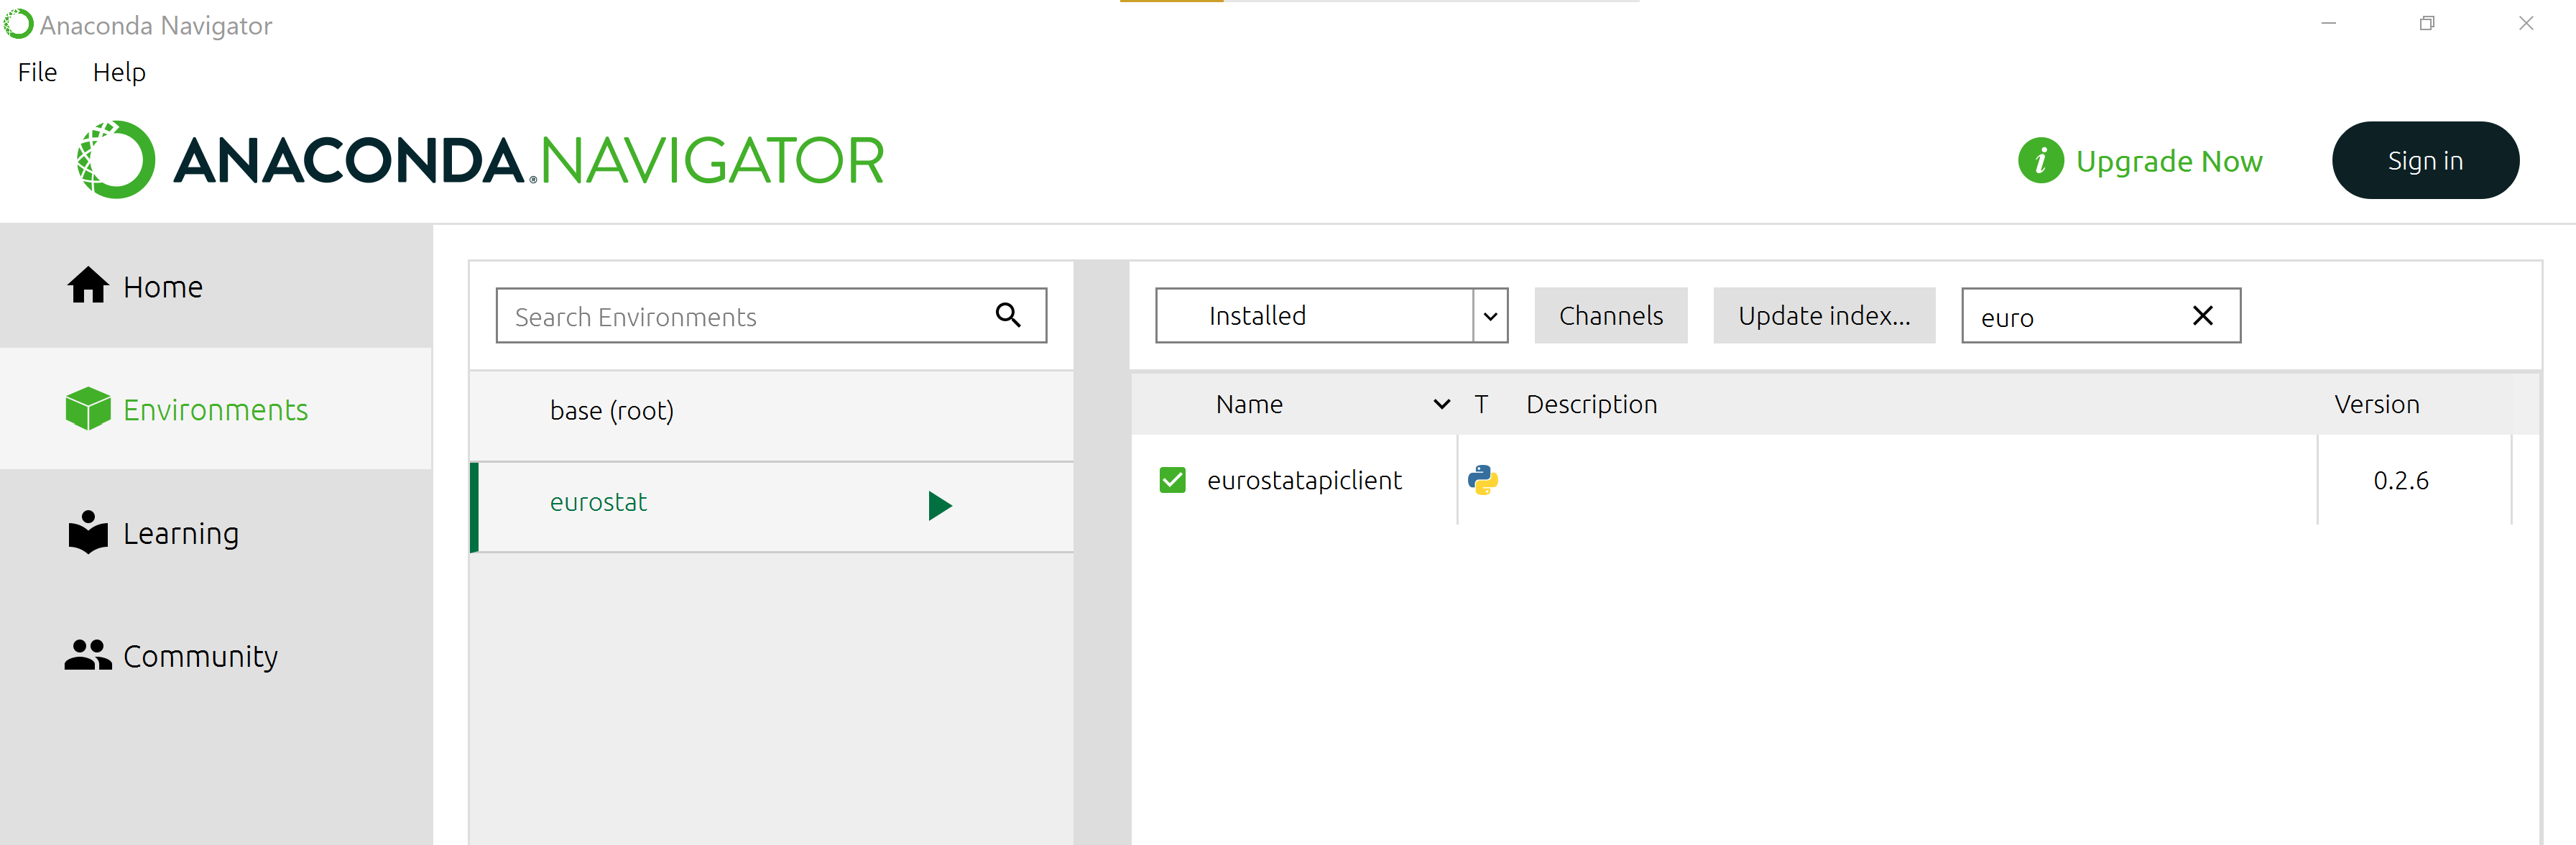

In [ ]:
base64_data = "iVBORw0KGgoAAAANSUhEUgAADgEAAASYCAYAAACDRYwXAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAALEoAACxKAXd6dE0AAP+lSURBVHhe7N0HfBN1H8fxXwej7BaQDS1liIDMqqCiUpClIstHRXGDW3Cij3s9qAi4pYADZcjeoFBUZCgFKnt2sHcLlA1tn/yv/460SZq0aXppP2/Nq//fv+3lLneXtiTf+/mkWggAAAAAAAAAAICT1v5wlR4BrqvZJVKPAAAAip8aNWroEQAAAAAAAAA4z1d/BAAAAAAAAAAAAAAAAAAAAAAAAAAAJkMIEAAAAAAAAAAAAAAAAAAAAAAAAAAAk/JJtdBjAAAAAAAAAAAAAAAAAAAAAAAAAABgInQCBAAAAAAAAAAAAAAAAAAAAAAAAADApAgBAgAAAAAAAAAAAAAAAAAAAAAAAABgUoQAAQAAAAAAAAAAAAAAAAAAAAAAAAAwKUKAAAAAAAAAAAAAAAAAAAAAAAAAAACYFCFAAAAAAAAAAAAAAAAAAAAAAAAAAABMihAgAAAAAAAAAAAAAAAAAAAAAAAAAAAmRQgQAAAAAAAAAAAAAAAAAAAAAAAAAACTIgQIAAAAAAAAAAAAAAAAAAAAAAAAAIBJ+aRa6HGB6DGvjVxIPq+rTH1CB8gTzV7RFQAAAAAAAAAAAAAAAAAAAAAAAAAAyM5tIcBh64bK0NbDjHHfRTfKtK5/GWNlVtxE+XLDB7rKqU65EPk+fJ6uAAAAAAAAAAAAAAAAAAAAAAAAAACAku8Q4H9+vUWOnz8iIRUayZhbZhpznWY3NT7O6bFayviXNcYHzuyVAUu6GmNHlvTcrEcAAAAAAAAAAAAAAAAAAAAAAAAAABRvvvpjnnyz6SMjAKikBwC7zLna+KjcMf8amRc/xRjXLFtHPrjuG2PsiAoQPr/iQV0BAAAAAAAAAAAAAAAAAAAAAAAAAFB85bsTYHbpXQCVMv7lZE6Pf4zxhmNRLof76AoIAAAAAAAAAAAAAAAAAAAAAAAAACjO8tQJUAX9VMe/WXET9UwmFdx75urXjXF6ADD+1M48dffLGigEAAAAAAAAAAAAAAAAAAAAAAAAAKC4yVMnwOzhvNw69uU3zEdHQAAAAAAAAAAAAAAAAAAAAAAAAABAceR0CFAF+RbeHi0lfEvaDQGmzzsT2ltxMFLeWv2srnJHEBAAAAAAAAAAAAAAAAAAAAAAAAAAUNz46o8OdZ3bwvh49tJp42NWPUPuMT5O3jlOpnf9y+mw3vU1wo2vXdxzk55xLL/dBAEAAAAAAAAAAAAAAAAAAAAAAAAA8Da5dgJcd3SVvLzyUfH39ZcZ3VZKGf+y+jPu9dXG/8nM2J91ZVvrqu3k4/ZjdQXkRaJET5sqUQlqHCRh/fpKq0DjE/C4RImLjJTFMQkSFBom4eGthF0BAAAAAAAAAAAAAAAAAAAAAAAAWMs1BOhJR88dlnt+66gr25ztNOi0xGiZNjVKjEwYobBiwJwhwLjICFkcowuL0M4DJTxEF86Ki5SI9IWEdpaBLi/Aw7Kur0WethkAAAAAAAAAAAAAAAAAAAAAAJhORESEHuXNwIED9QhFyfHjCfLPP39Lp06dpGTJknrWNRcvXpQlS5bItddeJ5UrB+nZos9Xf3To8NkDMuiP3tJpdlOjvue3cGM8ddcPRu0uVQOqyeQuS3VlW/o6uEtifIwOACoJEhOfqMdA4YlZHClxegwAAAAAAAAAAAAAAAAAAAAAAAB4OxUAPHDwoMybP98I87lKfY/6XrUMtazixGEIUAXu1K3/4s4Sc3K7nhX5T8NH5IqAGtKvwYN6xn2qlK4mfUIH6Kqgxcm6tJZwGRKi1hG+ggnEyOLIIn4khrSWzqFpieug0DBpTRdAAAAAAAAAAAAAAAAAAAAAAACKFNXRz5UbijbVATAoKEgSEhJcDgKmBwDV96plqGUVJw5DgBVLBuqRtTtD7pWJty7Rlfs90ewVPbLt0aU99Sif4mIlRg/Vzk8TI7GkAGEGMYulaOcAAyUkvK/xQ7pveCtL5Z0S46IlOnKaRBT10CYAAAAAAAAAAAAAAAAAAAAAAEA+lCxZUm7r0cPlIGD2AKBahlpWceKTaqHHVi6nXBJ/3xJGJ8CsFt4eLSV8PfMgZb/vrJb03KxHeRcXGSGLjRRgkIR1DpWYxVFi9AUM7SwDw2lLVjQlSvS0qZLWANKy3/v1lVYmSJ9lPRZDQ0ViYnSHyqAw6dfXyYBcXKREpC2EY9hTEqNl2lSeNwAAAAAAAAAAAAAAAAAAAAAAxVtERIQe5U16F8D05dAVsGhzJdRHADCN3U6AXee2ND76+GR+SaNKTT0WACx4cRKb0QYwVIJDgiU0oxlgrOWzQOEIah0uYenHYkKUREYn6gIAAAAAAAAAAAAAAAAAAAAAAADwbs52BCQAmMlmCPDbTR8bH09cSJDFd2w0xqrz3tc3TZGJO/KXzHXFu9d+qUc5jd0yUo/yJjF6raRnAEPbqE5rgRKcmQKUtQSvUGgCpVV4mGTmACOFwxEAAAAAAAAAAAAAAAAAAAAAAJid6uDnyg3FV25BQAKA1myGAKfF/Gh87LvoRuOjCgAqnWY3lVtqdTfGntC++i16lNPknWP1KC8SJT4mQY9DpX5I2igwODQzeBUTb/kqoJAEtpI2oXosCRIVGc3xCAAAAAAAAAAAAAAAAAAAAAAAgCLDXhCQAGBOPqkWepxBhf2UN8JGyE01uxjj9Ln0QKCnpN+vLXlel8RomTY1SowYYGhnGRiuU4CSKNHTpkqU8YkgCevXV1oFGp+wL+uygsKkX1/VVdAynRgn6yLXSozlYEsXFBQqoW1aS6uQ3BaaJjEuWuJjYyQmMcFy0OpJi/TlBFuW49ySlETL8uJl3doYSbQsLMtaWZYX6NzyEhMlLn6drI1JNE6iTJnLyHXbCvDxUtRjprYx63IsC5LQ0DbSulWI5b5c28fu3Qf2xUVGyGKjNWXWdYqTyIjFmR0rOw+UjEPVlrhIiUhbSLbj2ra8bFti9DSZmvbgWXZfP+mb6wliYXe9sm5fqHQeGC6O19gk+zfr9jiUy/2743yy2t4sj6HlfIqMtDy26Yu1nGsDLecaAAAAAAAAAAAAAAAAAAAAAAAFISIiwvg40MXuftm/L6/LgXfLHvpTCABasxsCnNLlDwkqXVUeirxNvg+flzFfFEKAWYNM2YNVLoecbITaTkROk8UZ6RsbQjtLP8ud2l1yXKRMWxyTJahnR5YQnSOJluVFOrE8+yGzRMsqRTrepnRBoRIWHu4g+FQAj5eSPfRki2XdOoe3ttyfEyExN++D3NgOAVpYBc5yCcpl/VpHIcD8bFvW/edUcM9RKM+FEKCz+7evZf86EwLMz2NgtU8csXf/bjyfbIUAbW2bZTsIAQIAAAAAAAAAAAAAAAAAAADIq/RglrsQ8Cp6CAEiv7IGARUCgNZ89UcrP3X61QgAdp3bQvaejssI4n110y/GR++WKPEZ4ZtQqZ8tdRQYHCppeVGRhJh4y1e75kR0eqAtSELDwqRz587SOcyyzPSFKjGLJTLa/pLjYrMGeFSXszAJU8vpbPkYmmVBCVEyNTJOF7bFRU6TqVaBoLTlGeull5d11XKKk8hpU60CS0aXtDD1/WrbwizLy7pOMRI1dZo42Dwr7ni8jHWcah0QCwoN1Y9ZZ8s26n1qWbfFketyD35ZuHMf5EtIuHQO1WNR65//+8rXtgUGS+aXxEhsbquTGJ+lG12oBNsNszlgBA+d3L/TPLB/K7U27jfjWNXTKmiXMW/c2tjY3oI9n4zHyplwIwAAAAAAAAAAAAAAAAAAAAAAALyGj61OgIoKAF5OuayrNJ7uAqi4vRNgrt3SsnbWUl9irzueZtUZLU2QZbnhNjrXZe0y6KjzmdEVLjFUwtq0llYhNlJTVp3I7Hc7s76/IMu2hFu2xVYKK1HiotfJiUrhlvvTUwbrx0KFuDqHW9bZ1iKyf6297XP745V9He115lPbGCmLM1fQwv5j56594Cy7nQANWTvmOTgmcz220+R326z2i6OOgxaOO2tm3S437N8c3fU8sH+zHs+5PBY5t8UN55PV14VKaGiMxFhW2/qcUsd+vIS0ohMgAAAAAAAAAAAAAAAAAAAAAKBg0AkQ+ZG1C6DqAKikj+kGmMZmJ8Czl0/nCAAWFaoDWLrQ7G0ADYHSqk1G6zWJybXVWTZBYTYDbUpgq3AJy2jy5aCLmhF0UoE8m+mgbN3hEiQm3kabsMRoicxMGxkhJtsBQCVQQizrZh0AtIhbZx1CsqyT3UWox61vP6vtW+tM+7L8Pl5Z19FuQExR29g3y+OWC3fsA7cJkdaZD4TErI2WfN1bPrctsFUby9GgxcSK/TPEuutmG5spuly4sn/DTb5/C/x80gFAFba0OqfUsU8AEAAAAAAAAAAAAAAAAAAAAAAAmE/2AKAK/ambGqs59Tn1NcWdzRBgGf9yObrsqXpe/BRdeas4ycwAhorNDKASUt/JkFN2QRIWbi+kpARKcGhmmCvxhO1Qjwrs2F9GmpD6jtNOifExad3JLILCwvPQpS5RotdmCUx2ttWFLLtAaRUeZnkU0iTExOcSVsvv45VtHds48bi1zlw/R9yxD9zJKhCZECWRzgQs7cj/toVI5qcdhFkT4yUzA1jfieMnu6K0fz1xPlkEhUl4XsKWAAAAAAAAAAAAAAAAAAAAAAAAHmYrAKi6/qkbQUBrNkOAnWY3lfXHoozgX5PAFtKxdg9jftT6d2T5wSXGuLD5WP5zWVysZGYAHYWSnAw5ZRcUKsG55G8CK2V+QULCCT3Kn5zLcUMHNjlhWa4eBoVJa2cTXIHBkpHbS4gRhw3U8v145WEds66fG7lrX9qXLRAWFSn5yAG6xNa2ZQ3I2euWmTWIarvrZm6K0v71wPlk4UxQEgAAAAAAAAAAAAAAAAAAAAAAs4mIiDBuKD7sBQDTEQS0ZjME2LVuL3lhxYNy+/ww+aLDRHmtzcdy65yrjc+9vfo546MnbDq+To9yuv/KJ/XIeXGZbQBzDSVZhZzWRufegavAJEpiXJzExUVLdGSkRE6bJtOmWZ7YFmduSw5ZO7BZDvRKeuiSxBOZ2xxYyYVgUaBk5vYSpECzcXleR1flYR8UhMBWEp7ZDlCiIt1xXOZx23LtlpkliOpK6C2rorR/PXI+BUlQnk52AAAAAAAAAAAAAAAAAAAAAAAAz8ktAJiOIGAmmyHAF1u9b3w8d/msTI8ZL6mpKfLbHRuMmycNXn6/HuU0oLGLIcDEaFmbJdMTszgtIWz3ljUA5EQHLvdKlLjoSJlmrMtUmbp4sSxeHCVRMTESYzlgLf87L6/hqROW+9HDIBeTRZUsJ5ZH5GMdc+fGfeBGga3aZIbvEqJknbNdKq24Y9tCpHVGINFGt8wsQdSg0GCPH4O58/D+9cj5lDUwCAAAAAAAAAAAAAAAAAAAAACA9xg4cKDVDUWXswHAdAQB09gMAWbVJ3SAdJ7TXDrNbirrj0XJkp6b9We8S2J8TEYIx3UJEuOpFGBinERGTJXFUdbrqw7UoKBQCQ0Nk7DOnaVzRgALbmfqfRAi4Z2zdKlcHGmjC58Dbty2wOBQyYgBZksBxq2L0ssPktBgkyXTOMcAAAAAAAAAAAAAAAAAAAAAAAA8ztUAYDqCgA5CgGVLlJcrA5vrKs1LKx8xwoCe4Oh+GlVydR0SJT69LZlFUKgK+jhzywwBJcTEW5ZS0BIlOnKxpPcgDAoNk8790hLMffv2tdzCJTy8lbQKCZEQD7b8Skg4oUfOOZHRRi1I3N7AzQ5X19E+c+4DKyHhkpkDjJHFkc7GAN28bYHBknGKxMRmCSPGSWz6nYS2kVZueJiK0v71hvMJAAAAAAAAAAAAAAAAAAAAAIC8iIiIcOmG4mXJkiVGiM+VAGC67EFAtazixG4IcHb3v+XLDpNl6KrH9Iy1ggwDzo6bpEe2fX3TFD1yUmK8ZGQAg8IkPFwFfZy5tZGMrFVCjBR4M8C4dRKVvp6hnaVveCsJyUsOKbCSZHybVTjLBZWCMrq8SeIJFwKQiXIi44sDpUBzcnlaxxOWE10PbXHXPihgIeGdM4/NmLUS7czGu33bAiU4MwUoGc0A42IzQnah9UP0KA+K0v71hvMJAAAAAAAAAAAAAAAAAAAAAACgAF177XVSs0YNlwOA6dKDgGoZalnFid0QYLo1R1bqUU7P/dVfj9znQvJ5+WLD+7rKycfyn6vi1kVJeu4nKDQ4MyCXqxBpHZYe3UmQqHV5itM5LTEz7SNBubT8yvq1OVWyfL8eZg1nuSJrl7eEKHF6060Cl0GWNSlAWcOOzoY0swTUbHHfPihoIRKe0Q7QcmxGRkti1qCZDQWxbYHBoRn3GaMPtLj0NoBBYdI6HxnAIrV/veF8AgAAAAAAAAAAAAAAAAAAAAAgjwYOHJivG4qHypWDpHv37nkKAKZT36uWoZZVnOQaAnz32i/F39dfV9Y2J/wrj/3eS1f5pwKAPea10ZVti3tu0iNnxUl6JkkkSEKDXWullTXklOeuem4XJ+sy2pnZEiit2mT0iZOYxZF5WO+sXd4sy1gb7UT3skSJjswMXIa2aZUZ4ioQIVI/s1WjEyFNy/qtdRQRc0Vu+8ADQlpLZkY1SiLXuWt9XNi2wFaScagZ50fm+eZa4NYWL9u/Djv8ecP5BAAAAAAAAAAAAAAAAAAAAAAAADPKNQQYffRvmdFthSzpuTnjpqSPx9wy06jza9GembkGAK+tdpMeuSBrZ7CgUHExA6hSgJkdvPLaVc9JgZUyVy4hap3E2UoJJcZJ5LTFDrudGbIGxCxfvXhapO3lGRIlLjpSorNtW2CrcKuQ2dTclhE5VTJyU/ntAuekkNZhWUKai2VaZJztcJXlcYuelmX97HDrPihwgdIqPHP7E2JiMgJjthTUtoVkJPUs50d0+vnmeuDWFtPvX6tuhQlyQg9t8YbzCQAAAAAAAAAAAAAAAAAAAAAAAObj97aFHtt0TbUbpdvcVjJ++9cZtwFXPiX3/tZJ/jzwq0zcGSFfbxxmzN/T6DHx8/HT3+m8TrObyspDS3Vl34+dFuiR8+LWLZFYHbQJana9tKkRkFY4LUBKX4iTLQfOGVWiT5C0qZ8l3HT+kGzZckCMzwbUkqZX1bB8hwMn4mRtxgqFWi8r0EdOrI3VIadEid0SJ3EnLkiAz3k5cSJe1q1bIUuWb5bEc0ESFlZTDhywsxxDgNS4Kshyd5blqZU7p5a3VtbGnZATF06Kz/ksy1yyVmItywoIbSPWi9HLSF8nvYw4yzIOXvCxLMOyrKzL0Kuj1qdz3/ZSQ5dW3Pl4KQE1pIZv5v45lxgrW9bGWdbrgvhke9zUlwSFdZZm52ONsdq+Wk2vEqtDwq37wHkn4tIfPxvr5Ei27c9ga30KatuyLDcx/XtCb5Dbrsrt8TghcRnrEyShbern7HTnBfv3ZNwWfX+W5cVZ1u1CgHFuxK9bJ4cC62e5/wI4n+S8HNqSfv92HkMAAAAAAAAAAAAAAAAAAAAAAAB4tVw7ASrp3f+yOnLuoGxJ+FcOntmnZ8QIC6YF+n7XM/ap71Nfq27OsLUOuYuT2Ix2XnnvTBYYHJqlG9laiU4P57hdiIT3y9L5TBIkISZKFi9ebLlFSUyMagtm2Y7OfaVVpbSvcMyyvL79JCyzlaFlkTESE5V9mY5YljHQehkJxjLU9+dcRlBoZ+nXN9zyXZ4T2Kqv9Mtse2iRYFmnnNsYFNZP+ub6wLl7HxQ8qw5zDhXUtoVIRjNALbS++44Ac+9f626Mqhtg+rkRFWPricL85xMAAAAAAAAAAAAAAAAAAAAAAADMxakQoDK+0yI9yt2b/zydEfCzd7t/SRf91bnLWwBQJDF6rWRmAEMljxlAlQKUzMxOgsTEF1gKUCWepO/AftLZcodBWXNPYqlVIKhfXwl3KRGkQkp9ZWC/zkbwyHqZlqVaJkLD1HIHOlhu2jL62VmGmggNC5POlmX0tSykMDqRqaBYxjbquTTqcdPr1srJNXP7Piholv3TJlsKz54C2raQ1lmDdaHixgygwdT7Vy3Psm6h2U6MoKBAsZ0jNP/5BAAAAAAAAAAAAAAAAAAAAAAAAPPwSbXQ41ztToqRR5beYYTyVJDPE/IaAARQHMVJZMRiHf4Nlc4D6aIHAAAAAAAAAAAAAAAAAAAAAAAA7+Z0J0ClXvlQWXT7v7oqeAQAAbgk8YRk9OkMCrLTiQ8AAAAAAAAAAAAAAAAAAAAAAADwHi6FABV/3xLGxyeavWJ8LAitql5HABCAyxLjYyRBj4NCgyVQjwEAAAAAAAAAAAAAAAAAAAAAAABv5ZNqocd5cueC6+T0pSRd5R/hPwB5khgt06ZG6RBgkIT16yutSAECAAAAAAAAAAAAAAAAAAAAAADAy+U7BJhuyPIBsvH4Wl25pm75+vJdx7m6AgAtMVoiIxOkfnhrCQm0n+hLjIuUyMWZXQAltLMMDA/RBQAAAAAAAAAAAAAAAAAAAAAAAOC93BYCzGrCjm/l+61f6Mq2vqEPyOPNXtYVANhg1d1PJCgoVAIDg6R+/Upy4kSsJCQkSmJMQmb4TwkKk359WwlNAAEAAAAAAAAAAAAAAAAAAAAAAFAUFEgIEADcIlsIMDdBoZ0lPDyEACAAAAAAAAAAAAAAAAAAAAAAAACKDEKAAEwuURLj4mVdbIwkJiZIgnXbPwkKCpTA0PrSuhXhPwAAAAAAAAAAAAAAAAAAAAAAABQ9hAABAAAAAAAAAAAAAAAAAAAAAAAAADApX/0RAAAAAAAAAAAAAAAAAAAAAAAAAACYDCFAAAAAAAAAAAAAAAAAAAAAAAAAAABMihAgAAAAAAAAAAAAAAAAAAAAAAAAAAAmRQgQAAAAAAAAAAAAAAAAAAAAAAAAAACTIgQIAAAAAAAAAAAAAAAAAAAAAAAAAIBJEQIEAAAAAAAAAAAAAAAAAAAAAAAAAMCkCAECAAAAAAAAAAAAAAAAAAAAAAAAAGBShAABAAAAAAAAAAAAAAAAAAAAAAAAADApQoAAAAAAAAAAAAAAAAAAAAAAAAAAAJgUIUAAAAAAAAAAAAAAAAAAAAAAAAAAAEyKECAAAAAAAAAAAAAAAAAAAAAAAAAAACZFCBAAAAAAAAAAAAAAAAAAAAAAAAAAAJMiBAgAAAAAAAAAAAAAAAAAAAAAAAAAgEkRAgQAAAAAAAAAAAAAAAAAAAAAAAAAwKQIAQIAAAAAAAAAAAAAAAAAAAAAAAAAYFKEAAEAAAAAAAAAAAAAAAAAAAAAAAAAMClCgAAAAAAAAAAAAAAAAAAAAAAAAAAAmBQhQAAAAAAAAAAAAAAAAAAAAAAAAAAATIoQIAAAAAAAAAAAAAAAAAAAAAAAAAAAJkUIEAAAAAAAAAAAAAAAAAAAAAAAAAAAkyIECAAAAAAAAAAAAAAAAAAAAAAAAACASRECBAAAAAAAAAAAAAAAAAAAAAAAAADApAgBAgAAAAAAAAAAAAAAAAAAAAAAAABgUoQAAQAAAAAAAAAAAAAAAAAAAAAAAAAwKUKAAAAAAAAAAAAAAAAAAAAAAAAAAACYFCFAAAAAAAAAAAAAAAAAAAAAAAAAAABMihAgAAAAAAAAAAAAAAAAAAAAAAAAAAAmRQgQAAAAAAAAAAAAAAAAAAAAAAAAAACTKrohwF2jpL2Pj/j4tJdRu/Qcih72MwAAAAAAAAAAAAAAAAAAAAAAAIAijE6AAAAAAAAAAAAAAAAAAAAAAAAAAACYlNeGABcOUt3fLLdBC/UMAAAAAAAAAAAAAAAAAAAAAAAAAABFi2dDgAsHpQX3XL4NEquo365R8l6EHke8J6N26THyaZeMaq8f8zyFK/P7/QAAAAAAAAAAAAAAAAAAAAAAAACArLy2EyAAAAAAAAAAAAAAAAAAAAAAAAAAAEVdIYUA28nInamSmursbbR0099paDBY3hioxwPfkMEN9BgAAAAAAAAAAAAAAAAAAAAAAAAAgCLEazsBdhutA4KjreKBAAAAAAAAAAAAAAAAAAAAAAAAAAAUGV4bAgQAAAAAAAAAAAAAAAAAAAAAAAAAoKgjBAgAAAAAAAAAAAAAAAAAAAAAAAAAgEl5bQhw4SAf8fGx3AYt1DPusEtGtdfLtboNEnfeC6xl7EurW3sZtUt/gbvsGiXtc9xP1hv7GQAAAAAAAAAAAAAAAAAAAAAAAIC50AlQSwuiNZQhq/SElQjprkJibg0cYteo9kb4rnuEnrCySoY0tDzm7UdJ/rOAC2WQ2n8Nh1iW6ojez4QBAQAAAAAAAAAAAAAAAAAAAAAAAJgEIUDd/S8jiDZwgaSmplrdFgzUn4voThDQTVTosmF64rLdSNmZ7THfObJd2udWDZGGbgkCphm4wPp+st4y7lOHAdnVAAAAAAAAAAAAAAAAAAAAAAAAAApbsQ8B7ho1IKP7nxEQG90trcii2+gsAbGI7oTD8mvhoIzQZbuROyV15WBpkFZmaDB4paSmpy9XDZEBo9wVA7TPuM/UnZK5q9uLB+4WAAAAAAAAAAAAAAAAAAAAAAAAAOwq3iHAXaNkgE4AqjCajfxfhgaDx2eGw95zX2e64mehDEpPAA5cICsHZ4//ZdFtdEYXxlVDPrF8pyc0kMErF0ja3a6SIZ+Q+AQAAAAAAAAAAAAAAAAAAAAAAABQeAopBLhKhjT0ER8fJ24F2HZv17wpljWxaDdSxjsKoxkayOA30hNpU2ReUU8BRnS3vT8c3hpmdFW0a+EsSYsADpQFjlKXWreXRkpa9jJCZnksj9dNRqenDyPeoxsgAAAAAAAAAAAAAAAAAAAAAAAAgEJTjDsB7pJ5U3QXwLtuk9wigIaGTXQgbZVs3WkM4KKFs9K7AN4puUcALRo0luZ6uHG7B9N43e7M6AY4pcgnPgEAAAAAAAAAAAAAAAAAAAAAAACYVSGFANvJyJ2pkprqxM2JbnF5s1O26q51zRs7FQEsvEBaYRi4wPb+cHjbKSPTUpJ27JLtG9NG7Zo0TBvkqqE00ctc5dHkZWHdLwAAAAAAAAAAAAAAAAAAAAAAAABkKr6dAHdtF51Hk4juPuLj48ytu+g+dsiTzODlqiENbTy+tm4NZYj+Hs9qII0zE59CL0AAAAAAAAAAAAAAAAAAAAAAAAAAhaH4hgABAAAAAAAAAAAAAAAAAAAAAAAAADA5QoAWAxekSmqqa7eVgxvo70ZetBu50+bj6vA2upv+bgAAAAAAAAAAAAAAAAAAAAAAAAAoHopvCLBBY2muh/CUhtKknR56k+aNhcgnAAAAAAAAAAAAAAAAAAAAAAAAgMJQjDsBZgbSImYtTBuggDWQxjp5uWrKPNmVNjSphTIrIm3UrknDtAEAAAAAAAAAAAAAAAAAAAAAAAAAeFgxDgFmBtIkYpYQA/SMhunJy1VTZJ6ZU4ALZ0laBrCd3HUbfQABAAAAAAAAAAAAAAAAAAAAAAAAFI5iHAIU6fbSSEmLpEXIe6PM3ZeuqGgw+A0ZaIxWyZBPzBq93CWj3ktvA3iXkAEEAAAAAAAAAAAAAAAAAAAAAAAAUFiKQQhwlWzdqYfZNRgsb6Ql0mTVkIYyiHaAHtBNXhqpuwFGdJf2bgtfOtjPWUTMyn0n7xo1QIasShsPfGOwkAEEAAAAAAAAAAAAAAAAAAAAAAAAUFiKbgiwwW1yV0bWrL3Yy5p1G71TMjNpPuLTfpTYi6XtGtXe4efhnAaDV8qCLOFLH59BYjeat3CQ4887uZ8zRHS3LM/HTvhwoQyyfK6hTgC2G7lTRnczhgAAAAAAAAAAAAAAAAAAAAAAAABQKIpwJ8AGMji9zZ+skiEN7QX8LF+3MjUjlCarhkhDH8vX2rgZ4bBVW8WJhnPIRbfRqbIzPX0pEdLdxuNt3LpHWD6/UbbbDfc5u5+tpYUPs92XT3fLmqQZuCBVVg6mByAAAAAAAAAAAAAAAAAAAAAAAACAwlWEQ4AW3UZLauoCSY+ISfPGYi/WpUJpqalZwoA2qM5wqamjheZw7qE6AqrHPDMMaMPABZavWSkO83gu7GcV7nN0n2n7OJUOgAAAAAAAAAAAAAAAAAAAAAAAAABMwSdVJZ6AIm2hDNJd/lQIkIAfAAAAAAAAAAAAAAAAAAAAAAAAAG9RtDsBAgAAAAAAAAAAAAAAAAAAAAAAAADgxQgBAgAAAAAAAAAAAAAAAAAAAAAAAABgUoQAAQAAAAAAAAAAAAAAAAAAAAAAAAAwKUKAAAAAAAAAAAAAAAAAAAAAAAAAAACYFCFAAAAAAAAAAAAAAAAAAAAAAAAAAABMihAgAAAAAAAAAAAAAAAAAAAAAAAAAAAm5ZNqoccAAAAAAAAAAAAAAAAAAAAAAAAAAMBE6AQIAAAAAAAAAAAAAAAAAAAAAAAAAIBJEQIEAAAAAAAAAAAAAAAAAAAAAAAAAMCkCAECAAAAAAAAAAAAAAAAAAAAAAAAAGBShAABAAAAAAAAAAAAAAAAAAAAAAAAADApQoAAAAAAAAAAAAAAAAAAAAAAAAAAAJgUIUAAAAAAAAAAAAAAAAAAAAAAAAAAAEyKECAAAAAAAAAAAAAAAAAAAAAAAAAAACZFCBAAAAAAAAAAAAAAAAAAAAAAAAAAAJMiBAgAAAAAAAAAAAAAAAAAAAAAAAAAgEkRAgQAAAAAAAAAAAAAAAAAAAAAAAAAwKQIAQIAAAAAAAAAAAAAAAAAAAAAAAAAYFKEAAEAAAAAAAAAAAAAAAAAAAAAAAAAMClCgAAAAAAAAAAAAAAAAAAAAAAAAAAAmBQhQAAAAAAAAAAAAAAAAAAAAAAAAAAATIoQIAAAAAAAAAAAAAAAAAAAAAAAAAAAJkUIEAAAAAAAAAAAAAAAAAAAAAAAAAAAkyIECAAAAAAAAAAAAAAAAAAAAAAAAACASRECBAAAAAAAAAAAAAAAAAAAAAAAAADApAgBAgAAAAAAAAAAAAAAAAAAAAAAAABgUoQAAQAAAAAAAAAAAAAAAAAAAAAAAAAwKUKAAAAAAAAAAAAAAAAAAAAAAAAAAACYFCFAAAAAAAAAAAAAAAAAAAAAAAAAAABMihAgAAAAAAAAAAAAAAAAAAAAAAAAAAAmRQgQAAAAAAAAAAAAAAAAAAAAAAAAAACTIgQIAAAAAAAAAAAAAAAAAAAAAAAAAIBJEQIEAAAAAAAAAAAAAAAAAAAAAAAAAMCkCAECAAAAAAAAAAAAAAAAAAAAAAAAAGBShAABAAAAAAAAAAAAAAAAAAAAAAAAADApQoAAAAAAAAAAAAAAAAAAAAAAAAAAAJgUIUAAAAAAAAAAAAAAAAAAAAAAAAAAAEyKECAAAAAAAAAAAAAAAAAAAAAAAAAAACZFCBAAAAAAAAAAAAAAAAAAAAAAAAAAAJMiBAgAAAAAAAAAAAAAAAAAAAAAAAAAgEkRAgQAAAAAAAAAAAAAAAAAAAAAAAAAwKQIAQIAAAAAAAAAAAAAAAAAAAAAAAAAYFKEAAEAAAAAAAAAAAAAAAAAAAAAAAAAMClCgAAAAAAAAAAAAAAAAAAAAAAAAAAAmBQhQAAAAAAAAAAAAAAAAAAAAAAAAAAATIoQIAAAAAAAAAAAAAAAAAAAAAAAAAAAJkUIEAAAAAAAAAAAAAAAAAAAAAAAAAAAkyIECAAAAAAAAAAAAAAAAAAAAAAAAACASRECBAAAAAAAAAAAAAAAAAAAAAAAAADApAgBAgAAAAAAAAAAAAAAAAAAAAAAAABgUoQAAQAAAAAAAAAAAAAAAAAAAAAAAAAwKUKAAAAAAAAAAAAAAAAAAAAAAAAAAACYFCFAAAAAAAAAAAAAAAAAAAAAAAAAAABMyifVQo8BjziffF7OXT4jZ9XtUtpHHx8fCfAvK2Wy3Er5ldLfAQAAAAAAAAAAAAAAAAAAAAAAAADFEyFAeExyarJ8tfETmRbzs55xrIRvCalZto7ULRcidcsHW26Wj5Zxg4pXEhAEAAAAAAAAAAAAAAAAAAAAAAAAUCwQAoTHLTuwRIate0NOX0rSM65R4cCrglpI66rXSJuq18pVgS3E39dffxYAAAAAAAAAAAAAAAAAAAAAAMB1KSkpsnvfPtkZGye7LLedcXESt2evnEpKktNnzlhuZ+XM2TNyxvLx4qVL+ruAglGyRAkpW7aMlC1TVspZPpYrW1YqlC8vIXXrSMOQEGlYv740qB8s9WrXFl9fX/1dKKoIASLPLiRfsNzOSYWSlfSM8w6d3S9vr35JtiRu0DN5V9ovQK6p1l5urXOHtKvewQgJAgAAAAAAAAAAAAAAAAAAAAAAOHLu/Hn5e+06+WvV37Ls739k/abNcuHiRf1ZwDuUKllSWjRrKh2uu1ZubHedXNemtQSULq0/i6KCECBctv/MXpkV94ssP7BUxnWcKmX8y+rPpInct1BWH14hz7V4NcfnsrqccllGrn9f5sZP0zP5V6FkRelYq6t0qXuHNA1qoWcBAAAAAAAAAAAAAAAAAAAAAABEDh4+IlNmz5GFkUtl7foNhP5Q5KhQYJsWV0u38I5yV887pEa1K/Rn4M0IAcIpKakp8vfhv2Rm7CQj4Jdq+e+xq56T+xs/pr8izaWUS3Lf4tvk4Nn9UrNsbXmj7Ue5hvF+2j5Gxm753FimOzWs1EQGNB4oHWp2Eh/LfwAAAAAAAAAAAAAAAAAAAAAAoPg5e/aczF70q0yeOcvo+JecnKw/AxRtfn5+RofAu3vdKT27dpEyZQL0Z+BtCAEiV6qz35gtn8mBM/v0jOq4V0mmdPk1R6e/KbvGy5cbP9aViK+Pr9zfeKA8eOUT4ufjp2dzWrx3ngxb94YRInS34PKhRlgxvHZ3Y30AAAAAAAAAAAAAAAAAAAAAAEDRt+/AARn57RiZMGOGEQQEijMVAOzfu7cMefwxqV2zpp6FtyAECLt2ntgqn20YJhuOr9UzmR696lmjy15Wpy8lyd2/dZVTF0/qmUytqoTJ29cMl8BSlfVMTtHHouS1v5+RM5dO6xn3qlW2rjzd/CW5vsYtegYAAAAAAAAAAAAAAAAAAAAAABQ1sbt3y/CvvpVfZs2WS5cv61kASskSJeSunnfIi089LvXr1dOzMDtCgMjhxIVEo/Pf/N0zJCU1Rc9mKuFbQqZ3XSqVSgXqmTTqe37aPkZXOVUpfYW8e+0IaRbUUs/ktPPkNnlxxUBJvJCgZ9zv+uo3y3MtXpXqZWrpGQAAAAAAAAAAAAAAAAAAAAAA4O32Hzokb300XKbPmy/Jycl6FoAtfn5+0ue2HvLOKy9KrerV9SzMihAgrJy8mCgj/n1f1hxZJUmXTulZa53q9JA3236kqzSqe1/fRZ3kzGXHXfz8ff3l6eYvS+/69+qZnPacjpeHl/aRi8kX9Iz7lfYrLfc3HiR3N3zQCDUCAAAAAAAAAAAAAAAAAAAAAADvdDk5Wb4c+5189MVXcubsWT0LwBlly5SRoc8+LU898pD4+/npWZgNIUDYtf/MHtmasFGij0UZocCDZ/cb8191+EmaV25ljNNN2DFORm8eqSvHutfrJUNbv6cra6mW/4ZHvyNz46fpmYLVoGJjefeaEVK7HO1LAQAAAAAAAAAAAAAAAAAAAADwNitWR8nzb7wtW3fu1DMA8qJJw4Yy4r235fprwvQMzIQQIJx24Mw+2Zzwr3Suc5ueSXMp5aL0+/VWSTh/TM/Yd331m+WD6z4XXx9fPZPJ0wHAdGX8y8rLrd6RjrW76hkAAAAAAAAAAAAAAAAAAAAAAGBmFy9dktfe/1DG/DxRiMYA7uHj4yOP3XevfPj6a1KyRAk9CzMgBIh8U6G9T6Lf1pV9qnvgiOvHSim/UnrG2ucb/ifTYiboyvN6htwlz149VEr4ltQzAAAAAAAAAAAAAAAAAAAAAADAbOL37JX7n35W1m/arGcAuFPLZs1k/JefSXDdOnoGhY0QYDGXkppisyufK85ePiOL9syWGbGTZE9SnJ61FlKhgXzZYbyUL1FBz1gbt/VL+XHbt7oqPE0Cm8vH7b+WiiUD9QwAAAAAAAAAAAAAAAAAAAAAADCLWQsXydND/yunkpL0DICCUKF8efnqow+lZ9cuegaFiRBgMTd/9wyJ2PyZNKjY2OpWr3xonsKBa46skumxE2XVoT+NgKESVLqKjL5pklQrU8Oos/tl14/y1cZPdFX46pQLlk+vj5DqZWrqGQAAAAAAAAAAAAAAAAAAAAAAUNje/OgT+SxirBCFATzDx8dHnhv4qLz7ykt6BoWFEGAxN3XXT/LFxo90lUl17GtRpa20rnqt5XaN0cnPx/Kfsw6d3S+zYn+RxfvmywfXfiZXBjbTn7GmQogfrXtTV+ZRpfQV8un1oy3b3VDPAAAAAAAAAAAAAAAAAAAAAACAwqCiL4+/9IpMmjFLzwDwpHv79JJvPh5mhAJROAgBFiPnk89Lab/SukozfvtoGbvlC13Zp7rjTeg8T1fu8fv+X+WdqJcyOgaajQpCftz+G2ka1ELPAAAAAAAAAAAAAAAAAAAAAAAAT1Kxl1fe+0C+/WG8ngFQGJ546AEZ9vprBAELia/+iCJud1KsjN3yua4ynb10Ro8cuyqouR5lupRyUVIt/+XFrpPb5f01Q00bAFSSLp2Sl1Y+LnGnduoZAAAAAAAAAAAAAAAAAAAAAADgKSoA+OQrrxEABEzgm+9/NM5H+tEVDjoBFgPHzx+VJ/7sL80rt5Y32g7Ts2lGrn9fZsZO1pV9H1z3mdxYI1xXaabHTLB87yS5s/490q1eTynrX05/JndL9i2QhPPHpLR/gJT2CzCeAC4kn5Nz6nb5rBw+e1D2ndkj+07vNta/MFUNuEK+7jBBqpWpoWcAAAAAAAAAAAAAAAAAAAAAAEBBUjmDp155TX6eNl3PADCD+/r1ka+GfUhHQA8jBFjEqUDd0389IDtPbJWOtbvK22HD9WfSDFv3hizYPVNXtqmQ3twey6WUXyk9k0Z1yfvn8HJjHOBfRm6tc5v0rn+vhFRoYMy5i+rI9++xKFl3dLXl9o/EndqlP+M5dcuHyNcdfpIKJSvpGQAAAAAAAAAAAAAAAAAAAAAAUBBU1GXoex/IN3QABEzpiQcHyLA3/ksQ0IN89UcUQcmpyfLm6ueNAKByOeWy8TErPx8/PbKvzRXX5QgAnk8+L9HHonSVFjacHTdFPo5+S/YkxelZ9yhfooLRhfC5q1+VH8NnycTO8+XBK5+QmmVr668oeGqbXln1lFxKuahnAAAAAAAAAAAAAAAAAAAAAABAQXj8pVcIAAImps7PJ14eqit4AiHAImx49DsZnfoUFQrMzt/XX4/sa1UlTI8yqY58F5MvGGO1jE61u8vomyfJNzdNMLrmFaTa5erJw02eksm3LpJRN4yTNlWv058pWJsT1stXG607KQIAAAAAAAAAAAAAAAAAAAAAAPd586NPZNKMWboCYFYTp880zld4BiHAImrRnjkyf/cMXaVJttEJ0N+3hB7ZZysE+PehZeJj+a9j7a7yc6d58mbYx9IksLn+rOe0rnqtjLxhrBE+vLbaDXq24MyInSh/HlisKwAAAAAAAAAAAAAAAAAAAAAA4C6zFi6SzyLG6gqA2anzdfaiX3WFguSTaqHHKCKOnT8iA5b0lNOXkvRMmrZXtJMR14/RVZpvNn0qk3Z+r6ucypeoIHN7LBdfH+u86Idr/yu96t9dKME/R1Yc/F0+2/A/OXT2gJ5xv7Ilysl3HadLjTK19EzxcvHSJTl09KgEVqwo5cuW1bOFb/+hw3I5OVlKlyop1apU0bPIL7WvlepVqxofi6rjJ07I0eMJcvrsWTl95qyoH41lAgKkbJkACbIc6zWuqCo+Pj76q72b2rb07fT19ZFylvO4rGVbzSzx1Ck5lXTaGNesdoWU8M+9iy1Q3EzY8a3MjJ0gl1IuGfWLLd+TG2t2NsZmlWr579i5I5KcmnahCnWBiaoB1Sy/d/oZtRks3bdAvt30kVxMuSCtq7aT/7YdLn4mWr+iKPHCcbmQfF5XIgF+AVKxVJCuzCPh/FHZnPCv7D0dZ7nFy8Gze42/v85dPmO5WX7GWv5+Ku1XRkr7B0ilkoFSs2xdy62OhFRoKE2DWku5EuX1krzPGct2vrH6GYk5uc34e/GlVh9ICxsXjnGHs5dPy6mLJ3VlLmX8y0qFkpV0VXAOnd0vWxPXy77Tuy23eEu9z7IPTlseG8uxlnxWSviWNNZF3YJKV5E65UKkdtlgqV+xsTSq1NR0z1nJqcmW5/7Dxs+AgqB+llSyPGeU8iutZwAAAAAAAAAAAJAXl1MuG69/KgH+ZcXfl/frAAA8I27PHrnx9l5yKsk6CwHA3CqULy/L586S4Lp19AwKAiHAIuiVVU/KqkPLdJVJdfT77EbrwN+aI6tkc8J6Ke1XWkr5B6R9tNzUm21Vrd6wGlKhgf5q73A++bz8sPVrmbzrB0lJTdGz7nVlYDP5usPPxe4P28PHjsm1vf4jB48clYDSpWTOmG+kwzVt9WcLR0pKinR54FFZtnqNUfv5+cqkzz6Vnp3DjdosLly8aAQVHT3llipZUmrXqK6rwjfotbfkh+kzjfHj9/5HPnvrv8bY26nj+I+/oyzHTJRs2rFTdsTGS8JJx28uV/umXq2a0qRBqLRv3VKub9tGWje9yjjezCo5OUXWbd4iy6PWyJZdMbIjLl52xu02tjX7cai2o2pQZWkUEiyN6wdLs8aN5CbLua22t7CNmzJdnnn7PWN7FHVuq3PcbI/9voOHjPPcHhUiVed3yRK5d+DNSgU2jxw77vC5Iy/UepQtW8YIcxf1UOV/h4+ynPOrpVLFCvLZm69Jg3p19WeKjiPnDsq9v3XSVZrSlt/lvuwwSYIrNNQz5qJeLHhhxYOW30Oj9UyaWmXryec3/myK0JcK2NzzW7gReEr3ZthI6VDzVl25R8zJ7fJu1GA5fj4teJ/u2mod5PW2wy3PH97VvF0FJ7/e9D85f/mcnhEp4VdS+oYOkP6NHtczto349y1ZsHuarjL1a/CgDGr6kq4KR6rl74oNx9fKXwd+k3XH/pY9SbH6M65TISUV0FL7uGOt7qY9T+35butnMnFHhK7ECJp9ddMvxna5U+S+efLRutcsf9Ml6xnzeeDKp+X+xk/oyj3U8+PaoytlxcFIibYcawfP7NOfcZ0KBl5dpa2EXXGj3FSzixGOK0wqPPv0snuMn1sFrYx/OalcuqpUK1NT2l5xvbSrfrPxMwYAAAAAAAAAAACZ1IUbY09ul/XHoyT+1C7jopT7zuyWUxcTjdetslLvlaxQMlBql60ntcsFS3CFBtKi8jVSv2Ijt79WCAAovlSzmvA+d8n6TZv1DABv0rJZM1ky/ReX3y8N5xECLGIW7ZltdOnLKrBUZWlZpa3cXOtWuaVWFz1b9KmA43trXpHECwl6xr2ebPai3N3wQV0VDypIMXzMd7oSadOsqaycPklXhWNbTKy06H6nrtKoHxqzRn8p4de30zOFS4XO2ve91wgJ5aZP11tl4mfDdVV41OPaskevjOCRCjCtmTNNmjXyrjepp1PB1Ylz5smkOfNl4/YdejZ/qgYFSq8uneU/t3WXG9q21rOFS4XQ5v/+p0yeu0D++PsfOam75+WV6qrZ+YZ2cu8dt8kt7a4VX1/PB1FuvKu/rF6/UVdp7u91h4z533um6c741JvvythfcoZWsgutV1eW/fKzVAl0rmvQ+q3bpMuAR41OiAWpUoXy0jC4njSuHyJXX9lYOlwTJi2aNC6U/e1ukStWSfeHB+lKjG1b/NM4XRUd646ukpdXPqqrTKrr2Fc3TTE6dZnNtsSN8vSyu3VlbXCLt+S24Lt0VXimx4yXbzZ9pKs0VwW1lM9vnKAr91D3oe7Llg+u+1qurXaTrsxPdfBTgdSTFxP1TCbVrWzh7dahz6zU9/RZeIOurKkXjObfvlZK+pbSM55z9NxhmRM3yQikFVRwSYUAe4X0l8517yiUbXTF+eRzcs+vHSXpkvXPphE3/ChXV3bvxUEGL79fNh1fpytzUhfQmX/bWl3lj+oqOdtyrP2+f6GcLIC/YVWX1bArbpBu9XrL9dU7FkrA+IdtX8jP27/VleepLold6vaSO+vfa4TlAQAAAAAAAAAAiiMV7lt95C/5fd8C4/0Gtl7fdUXFkoHSumo7uaV2d7nmihvpGAgAyJcX33pHIn5y7/uzAHjWwPv7y/B33tIV3I0QYBFy9NwReSCyp5TwLSEtq4QZt9ZVr5F65evrryh+VEeVt1a/aHTtcLcA/zLyc6d5UjXgCj1TtCWdOSOhN3XOESpa9MMYIxxUWDbv3CWtb+utq0xlAwJkwfcRcl2rFnqm8Kjw2UMvvaar3J3ftr7Qw01ZuwCmU0Gw7z/5UFfeYVX0v/Lx6HGy6M+/jK6RBaVFkyvlhUcfkr7duhRKh7q9Bw7Kp+N+kEmWY+3EqYJpf16z2hXyYJ9e8vQD/aVyJedCbO7QrvfdRkfD7J4a0F9G/PcVXRWuMle1zOhUmBt1DqlzyRmvfPSpjPruR115VlDFinJrh+uNde10fXtTd710pNtDA2Xpyr91lWbFtInStnkzXRUN9kKAigp8qCCZCn+YiQr2qICPLU80e0X6hA7QVeFITk2WAUu6yuGzB/RMJhUCVGFAd/l9/wL5YI3tLnetql4nn7T3nuCq6uKnuvnZ0r76LfLutV/qKicVtrvnt466ymlujyjj929POXR2n0zaOVZ+3TMzxxUuC4q6eEu/Bg9Jr/r9jdCkGamQ2hcb3tdVpvbVO1r27xe6co9nlt0jWxM36Mqc1HPrb3fkbx3jTu2QCTsi5M/9i4wrrXpCvfKh0r/RILmpVlfx8+DPh+dXPCgbjkXpqvCoc61/48elR72+pj3XAAAAAAAAAAAA3E29Jjst5gdZsnduvoN/9qhAYKc6t0vf0AelakA1PQsAgHNWrI6S7vfcl9HABIB3UjmIhZMnSPsw915UHmm8v8ULMpy4mCBfdfhJZndfJu9c86n0qn93sQ4AKpVLV5WRN4yRm2p21jPuc+7yWflq08e6Kvq+mzLdZlexjyPM+cb0M+fOSc+BT8qGbdv1TOG5fDlZj5xT2AHAQ0fTuuZlN2X+QtlzIGcYwoxWrouWTvc9JDffPUAW/P5ngQYAFdWxbcALr0jr23vL76v+0bMFT4X/Hv/v29Kkcw/55udJBRYAVA4cPiIffj1aGt7cxQinHT9xQn+mcHw1foK889lXuipczgYAFVeeDy5f9kzoxJaEkyeNjpJ3PPakBHcINx7rwt7nrvp3y7YcAUBlxNgf9Kh4iDqyXL7f6t5gTnGw/MBimwFAxV7Xvry6scatdl/8iD76t8ScLPzfZZyRmpoi02LsB5dVuM0bqG6G47aMkgcje8j8+KkeCwAqiReOS8Tm4fLw0ttlxcFIPWseKanJluPf9j5edeh32X9mt67gjFMXTxih2cd+7yV/7F/osQCgsjspRj5c+7I8+Wc/2ZLwr54tPtS59uWGD4zHXj0WAAAAAAAAAAAARdmRcweN16XuX9LFeL27oAKAilq2ug91XyPXv23cNwAAzricnCzPv/E2AUCgCFDnsTqf1XkN9yMEWIQ0rHilhFRooCukU1f2V6HIO0Lu0jPus3TfIll31HOBn8Jy6fJl+fzHn3VlTQUsbHXpMgMViOr+8CDZtXuPnoEzvvhxgly8dElXmdQP4hHjCqcrmbOOJiTKY6++IR3vfVD+inJ/B9DcbIuJla4PPib3PveiJJ46pWfdT52TH48eK1d37ynfT5th1J6iAraqO13zLnfIuCnTC/UPLhVKLKxOecXJkWPHjce60S1d5dVPRtgMhJvRp2O/0yNrsxYvkbi9+3RVPEzaOUb+PPCrrpAbFcSZGmM/LLrs4GI5dHa/rvLP39df7gzpr6uc7IWuzCbqyArZkxSrK2uNKzWTZpVb68q81hxZKY8svcM4ZzwZ/svu4Jl98tbqZ+Wjda8ZFx4xi5WHfpcDZ/bqypo6b2bE/KQr9yjhV0qPzEt14XeVeqwW751jBE1V98zCpELGz/7V33jR9+zlM3q2+Nh3Ol6eXna3LD+4RM8AAAAAAAAAAAAUHZdTLsmEHaPlocjbjNelVO0p6r7URVfVfat18OR9AwC805djv5OtO3fqCoC327Jjh3w17ntdwZ0IARYj6k19u7O9MXfnyW0ybN0b8tbqF+TllU/I08sekEd/v0vuW3yb/L6/6LxZ3NfHV15s+abRHdHdPt8wzHgjZ1GmOsDtO3hIVzkNj7AdtDCDo8cTjFCWo/VHpqQzZ2TM5Cm6yunH6TPlWKI5u4HNW/qHtOjWU8bPmF3oVwKZvug3ua7XfyR681Y94z4bt++QsJ795I0Rn8vZc+f1rOeprnBPvvGOEbgszA6Rqivhd1Nn6AoF6fTZs0YXveZd77DZLdRMdu8/YJyHtqjOjaO+d28nN2/w8brXJO7UDl3Bkc3Ho2Vb4kZd5aQ63s2MtX1xhLzqHtxPSvsF6Mra0v3zJeH8UV2Zl6MOif0aPCg+lv/MKjk1Wb7f+rkMXfWYSwHPUn6lpe0V7eXuho/KK60/lM9u/FnGdpwtE29dIj93/k1G3zxdPrzuWxnY9EXpWLuHlC9RQX+ncxbvnS1P/nmXabpBTt3luJPqoj0zJeniSV3l390NHrF7XpjFfxo8rEfOOZ98zvJ8/F/5aN2rRidAV6jjrUHFJsaxdJflfh9q8ow80ewVefSq56V/o0FyW/Bd0rLKNRJUqor+DuepF32f+KOf13QedScVtH179XPyy05zdrgHAAAAAAAAAADIC/Wa96O/32m8DnohufDeX6TuW63DY7/3cvg6PACgeNt38KB89MVXugJQVAz7/EvZf4gMh7v5pNIztcg6fPagbEyIlo3Ho2WT5RZzaofRLXDMLZkBn22Jm2XgH//RVab+jR6VQU0H66roSElNkXeiXnJ7wPHD6z6XG2p01FXR0+b2PrJph/2rK/j6+sqmRXMktF5dPeM5m3fukta39daVfY1CgmXphB+kauUgPeM5KpSmutM568L2DXrkeaqrmgpVOfLak4Pkreee0lXhU13wXv14hHxhp1tlYSpVsqSMfONVeeSuPnomf1TnveffHybnL1zQM+YQWKGCjP3ofbmt4816xn3a9b47126j6jnopxEfSd9uXfSMZ5VqfLUe5W7M/96TAb176sqxFz74SL4cP0FX5tOlww3y3ccfSpXASnrGPIZYzpOvf5qoq5zKBJSWXX/8JpUrmW/d82Ld0VXy8spHdWVfjbK15esOU6R8yYp6pvBsOr5OBi+/X1fWVKilT+gAXXme6sC24mCkrmwL8C8jk29dKmVLlNcz+fflhg9kVpzt47Z/o8eNwI9ZqYCpetHGlmplasr4TovEz8dPz9h29Nxhuec3+79Pz+0RZTzu7pZ06ZS8s/o5+ffYaj3jmAql3Vyrq4TXuV2aBbUyuo47S3UXXH98tSw/sMToPJZ44bj+jGPqPp5o9rLcHnJ3oYUptyZukGeW3aMr+x65arDc0/AxXeXfpZSL+epQt2TvXPlm00e6sta5Tk95vNlLunJdSd9SLh2TqsPj6/88KbuTYvRM7lQXzRtqdpKWVa6VRpWa5noepTty7qBxTEcdXm48n11Mce53R3WsPd/ybeOxKQjPr3hQNhyL0pW1qgHV5MYat+oq71TQ8vj5o8ZjEH9qp0sX7Hm1zUcSXvs2XQEAAAAAAAAAAHgndQHXMVs+NV6fNBN/X3957KoXCvX9AAAAc3p0yIsyZfYcXQEoSu7qeYeMHTlcV3AHQoBFiAq4bUqIlt/3/ybLDy41QoDZlfEvK4tu/0dXImcun5Zuc6/TVZqudXvKa20+0FXRcynlkry4cpBEH3Xujb7OuDKwmUTcPFlXRctvf62Q2x99Qlf2PfqfvvLVu2/qynOcDQEqLZpcKb+NHyeVKrjvDfvO8JYQoArTNQ7vJvsPHdYztgVVrCi7/vxNygYUfmcW1bmw31OD5fdVmc9rZvRAnzvlszf/KwGlS+kZ16SkpMiQ9/4n3078Rc+YkwqHqpCoOzkTAlRK+PvL9G8+N4JpnlZcQ4BKzWpXyM8jP5Hr27TSM4VPdalscPOtuXbKfPPZJ+W/Tz2uK+/mbAhQUV3LVGcyXyeDJAXFrCHA/Wd2y4NLejgVGhnU9CWjw5277D+zx3Lf3W3ed4WSlWTSrZFGJzAzGh79utEFzhZn92dhhABVh8VXVg10qkumeuxVxz+1LepvqvxKSU2Wvw4ukR+2fiF7T8fpWcfUfavHszC8t+YF+XP/Il3ZF1S6qkzsvFj8fUvomcKlOtyN+PctXVlTnfMGt7D9OXeLtRxjQ1c+JgkXjukZ+1TQr4dl3e4I/o8EV2ioZ/PuzKUk+X3/Qpm8c6zTnS4HNn3B6Dbobo5CgK2qXieftHdvNz71eK88uFTmxU+RXSdz79Ctjlu1Ds0rt9EzAAAAAAAAAAAA3kNdYHPY2qHy5wH3Nkhwt5tqdZWhrf/n0gVXAQBFV0x8vLTt3E2Sk5P1DICixN/PT9YsWST169XTM8gvX/0RXkoF/9YfWyOj1n8ofRaFy9PLHpDpMRNsBgAV1UVBXRU/XVn/chJYqrKu1BvD28krrd/VVdFUwreEvB02XCqXrqpn8m9b4iZZc2SVroqW4WO+1yPHfpo5Rw4fy/1NrYVp/dZtcufAp3INhhRXv8xbmGsAUEk4eVLG/TJNV4Xn6PEEufX+R0wfAFR+nD5L7n72eV255uKlS3LfkJdNHwBU3vnsKxn83v+M0KKnqRDrf54ZIsvXrNMz8IQDh49IlwGPyOS5C/RM4ft2wmSnnue/+XmSnDtvrq6anrDmyEr5butnukJ202N+cioAqMyI/UmSU933j0+1ytaVdtVv0ZW1UxdPGB3NzEh1s1uyb56urJWx/K3RrZ5zF2vwNNUl7Lnl9zkVAOxU53b5IXyB3N/4CbcEABUVxL2pZhcZ23G2vNTqA6NjYm5mx02UpIsndeU5Kji27MBvunJMBStV4AyZtiaulyHLBzgVAOxQ81b5LnyePHv1624JACqqY6kKPH5vWe7jzV6W8iUq6M/YF7H5Uxm7ZaTTz4dmFVSqirHt39w0Rf7b9hO5IqCG/oxtl1MuGd1g1XMuAAAAAAAAAACANzl7+bS8umqQ6QOAirr4qFpX9V5WAAA+/Xo0AUCgCLtsOb/VeQ73IQTo5WbFTZZn/npQZsROtAr3ObLndLwepWlQsbHxUb0ZUHUAVJ0HirrAUkHyZtuPxNfHfafA+O1F78lJdd/68x/nOiZeuHhRPv/hZ12Z16rof6Xf04ONYBWsjRz3gx7lbtT3443QVWFJPHVKbn3gEac6xJnF35Zjz1XqF5//PPO8TF/k3BvvzUAFqx5//W1deZYKdPUa9LREb8690wvcRz0XPPjSq/KZ5XmhsKljQB2DzjiakCg/zZytq+Jl8s5x8gchnRxU6ONXO93sbDl67pAsc/MLKH0bPKBHOU2L+VFSUz0fss7NnLhJRnDGltuC+xlBQLNRQbqhqwbKwTP79IxtIRUayRcdJsnQ1sOkakA1Pete6m+vLnXvlB/C58tDTZ4VHwd/n6iLt5Ty93w3yJmxP7t07E2L+cHrw2PusicpVl77+wmjG58jTYNayuc3TpA3w0YageCCoK6k2jf0ARnf+Vejy19u3RpV58Cpu5z/+8DM1Hl1S63u8u3N04yOg46onwUTdvAPjwAAAAAAAAAAwHuoAOCLKx6Wf4859z4/M1Dr+uKKhwgCAkAxt+/AAfllVvF8Dx9QnKjzXJ3vcA9CgF6uY61u4u/rryvn7EmK06M0TQKbGx+fa/GaVCl9hTEuDlpVvUbua/SYrvLv32NrJPbUTl0VDZ862QUwXcSkKXIy6bSuzGvJ8pUy4IVXJDnZfG+kLyy/Llsum3Y4f/yqjoGT5szXlWepkE/vQc/Ilp0xesY9fHx8pGrlIGkYXE+aN24k1apUEV9f9/2YfGWQ6883T7/5niz4/U9deQ/V+fD1Twun09ip06fltkcGybaYWD0DT0hNTZWXhw2Xr8ZP0DOF48cZs4xwn7NUoLkwOleawSfRr0vMye26gjI3/he5kOxat2AVkHFn2Kl55TbSqFJTXVnbezpOoo6s0JU5qMdrjuVxs0WF23rVv09X5nEx5YK8/s9TRjjLkbZXXC+f3fiT5W+lq/VMwVIBrf6NBsmn138vQTY6lqu5j9uPk5K+pfSMZ5y+lCQLdrvWAVo9t3jTC4wF5fj5I0bYNLfujf0bPS6jbvhJrgpqqWcKlrr4z8CmLxihw8q5/P0fsXm4abuQ5kWFkpVkWLsICa99m56xTXXd3H9mj64AAAAAAAAAAADM61LKRXnzn2dkx4nNesZ7qHV+y7LuahsAAMXTyG/HFGpDEgCeoZo3jRo9RlfIL0KAXq5SqUC5vvotunLOtsRNepTmqqCrpUPNTnJrHcdvhCuKHrhykFs7Lfy6Z44eeb/4fftl5m+LdeUcFb6JmGT7jeBmM/PXJfL4628ZwRWIfDrW9S4fn479vlAev4deflVWrovWVf6osN/bzz0tq2ZMluPRf8u+lX/Ipl/nypo502TPiqVyetM62b08UuaN+1aeGtBf6teto7/TNUOfeEyef/RBXTnnf19HyPfTZugq/8qVKSPtWrWUB/v0kpcHPSrvPf+svDP4GXnh0Yfk7tu7S6umTaSEv2uhckc+iRhnBIMLw7HEE9LtoYGye3/xuWqEv5+fDHv5eadurz05SB65q490v+UmadOsqZQJcF9XqRc+/Fgmz12gK89SYT5XuxHG7N4jc5Ys1VXxosJbb61+1uh4hLQXRmbHTtSV89SLEpuPu+dnkuJj+a9P6ABd5aS6AZpJ5L55cvJCgq6s3VSrq1QNqK4r8/hm40eyOcHxPuter6+8f+3XhdLF8OrKbSXi5hnSpmp7PZMWAFThwDrlQvSM5yzYPVXOXT6rK+dN22WuY9XTklOT5d2o5+XIuYN6JicV/HytzcfyUJNnHHaALCgqcPz1Tb/IlfqiQPZ8+u+bEnNym668nwoov9jqPSN0bc/llMvy/dbPdQUAAAAAAAAAAGBew9YO9eoLdEYf+0eGrXtVVwCA4uTs2XMyYYb73iMLwNwmTJ9pnPfIP0KARcDtwX31yDkbs73ptVlQS3mx5Vu6Kl7UGy+HtPivrvJv8d75kpJaNDoKjfzuxzx1yvvixwly4aJ3XJ1n/IzZRmCluFu7abP8+Y/r/xikOq3NW/qHrjxDdRlTAc78KBsQIK8+OTAj7KfGrZteZcxn5+fnK9WrVpXON7SXEf99RbYuni/R82ZK/563G59zxpBHHjTCdq74K2qtvPfl17rKuyuqVDbCXrMjvpID/yyTPyaPl9EfvmMEAFUQUIUTP3xpiPw4fJj8PeMX2bfqT/lh+P+kV5dORmgwv160nF8bthVOp7EDh49I1wcfk8PHjumZos3Pz8841py5vfXcU/L1e2/JzG+/kJXTJ8nBf/4yjpGB99wlNavlryOwCgY/9uobErXB+oIDnjDztyUSu2evrpynAs1FWeNKzfQop0Nn98kHa14ywirFXeS++ZJwwfbzxfU1wo3AiD3uDubdVLOLVCldTVfW1h1dJbGnduiqcKkOiNNj7Adv+zVwLfzuCX8dWGx0fHTk4SbPyZCWb7vcbd2dKpUKkv+1+1Yeb/ayBJdvUGgBQBWEmhn7s66sqcCq6iRXq2w9PWPtn8N/Gt0ri6sft33pMGwaVKqKjLjhR+lYu4eeKRyqE+Cn1//gsDOeCkm/t+aFPIVBzUr9O8DbYaOMroj2rDgYWaS2GQAAAAAAAAAAFD3q9do/D/yqK+/15/5FDl97BgAUTbMX/UogCChGzpw9K3N+9f7fXc2AEKCXupRySY9E2l7RTqqXqamr3O1NipdTF0/qSqRCyYpGR8Hi6ppq10uHmuG6yp9j54/IuqP/6Mp7HT9xQsbPmKUr16jAjQrXeQsVKnv38/yHrbzZiDx0AUynur15SvTmrTL04xG6ypt7bu9hhP9U97+GwbbftJ6bqxqGyncffyAbFs4xwoA+Pj76Mzk9ef+9Ruc1VyScPCkPvDg0TyHcdPVq1TSCfbv/ijTCXl1vulFKlSypP2tfpQrljcdo8ucjjEDgBy8Olorl894FSQWC+w9+Sc6cK5w/1FQgrNuDA43HFPaVLlXKOEa+ePt1ifnjN/n+kw+NYyivVNvu/oNflBOnkvSMZ3w6Jm9hvtXrN8ryNet0VfR0rddbbg/+j65yWnt0pYzbMkpXxZMKszkK8t3V4GHpXKenVLPz+7YKiuw/s0dX+efvW0LurH+vrnKaYZIXP9YeWSm7k2J0Za1FlTBpWPEqXZlDwvmj8um/b+jKtjtD7pV7Gw00Am6FzdfHT/qGPiBjO84ulACg8ueBRXL03GFdWbuu+k1yVVBL6R16v57JyWydKz1lw/E1MmnHGF3lVKFkJfnsxgnSJPBqPVO4SvmVlqFthkmP4H56Jqd9p+Pl603DdFU0VCwVJPc1fkJXOanw4+ojf+kKAAAAAAAAAADAXLYlbpQxWz7VlWeoC6k2DWopba+43riwqTupbVHbBAAoPibPzNv71AF4r0kzvSdjYmaEAL2QejPauC1f6Eq9QdRXutW7U1e5U2903pywXldQHrryKT3Kv0V7vP/J6ZufJ8nZc+d15TrVRTAlxXs6In7w1bfy+Q8/6ap4idu7T2b+tlhXrvvn3w1G17qCpgJxj7/+lhEuygvV3WzpxB+NLnf57XSWrkG9ukYYcM6Yr6VqUM4g9aP/6Wt0D3TVqx+NkP2HbL/hPjeBFSrIx0NflI2L5sjdt3cXX9+8/5gPKF1KXnzsYdkWuVCee2iAlCxRQn/GNTvi4uWdz77Sledt3rlLej72pJw+SycXZ6hj5t47bjPCsp9ajl91TOXF7v0H5Mk33tFVwVPdTFVX07waMa5odwN8qvmr0jSola5ymrLrO1m6b4Guih8VZos/tVNX1lRI56qgFuLn4ye969sOO6nfrWfGuPf3iB71+hnBHFuW7Jtnt2uhJ02LsX8Rgb6h5usCGLHlUzl9yX44Wb1YpTrvIY06rqfuyn0fd6l7p91uaov3zJGTFxJ0VTyo7omfrX/XePxsUc8lb4WNkhpla+sZc1DB12eavy5XVwnTMzkt3D1dtiT8q6uioWfIPXY7ryorDuavAzkAAAAAAAAAAEBBuJxySYatG2q8NuUp6rXznzr9alzscli7CPmlyx/yUJNn9WfzT21L2jbl7b1hAADvcvDwEVn2t/c33QHgmmWr/jbOf+QPIUAvtP7YWpkSM96q48gdweqNwqV0lbtdJ7frEZTQio2kXfUOusqfFYf+kJRU7wnAZXfu/AUjBJgfMbv3yIxf8x4sKwwvDxsuP0yfqaviY9T34/PVcU7xRDfAbydMkn+3bNOVa1Tnvr9++Vmub2M/AJMft954vayZM01uvu4aPSNy3523y5fvvOGwS6AtKlT5Yx67cF59ZWOJmj3VCOw50/XPWUEVKxrBQhWirF61qp51jeq4uWmH7YCNJ6hOb32eeNboTAjnqNDn0wP6y4ppE6Vx/bx1oJq+6DdZ9KdnOugMz2MXwHQLfl8m22JidVX0qM5yb10zymHQQXVIizmZt+dZb+c46PRARle4bvV6Sxn/ssY4u4V7ZkjSpVO6yr/yJStK17q9dGVNvegxJy5/v6vllwpNrjmyUlfWVNe666q55/dqd9l0fJ0s2TtXVzkFlaoib4aNNM4VpFl/LMryN+NWXVkLrXilXF2lrTEu7RcgPYLvMsbZXUy5IHPjp+iqeJgVN8Fuh0xFhbJVp0wzUldufctyHlQvYz+g+PmG9y1/6ybryvupc75DzVt1ldO/R1frEQAAAAAAAAAAgHn8sus72Xc6XlcFT13A9t1rv5SqAdX1TNrFL/s3GiQda/fQM/mntmnKrqJ9EWcAQJops+dIcnLRef8BAOeo837qHPvv44NzCAF6oVWHlxlXPvlm0wg9I1K5dFXpVf8eXdlXtkQ5efbqVy1/gD2iZ5Du/sYD9Sh/zlw6LTtO2H7DrDdQAaRjiSd0lXfDx3ynR94hNTVVnnj9HSO0Ulyo/Tw+j4GzrH5dtlw2bt+hK/dLOHlS3vk8b53kbmjb2giv1a6R+Y9QBUGF4xZ8FyHfvP+2cYv48D2XA4DK4Hc/NI5FV/XsHC5/TB4vdWrW0DPuF3Z1M1k1fZK0adZUzzjvsuWXNrVthemPv1fLvc+9aKwLnBdar678NWWCdLqhvZ5xzXOW/a7C5QVJBUx/+2uFrvJGnXejvhuvq6JJhZxUENBeyOlC8nl5a/Wzcupi/n8H8Caxp3bI2qO2w2xXBNSQG2p21pVIGf9y0q1eH11ZU4/f/PipunKP3qH3ZwQQs5sb94txn4Vleqz9zod9QgdYfgaa589M1ZFNdQF05I2wEZa/p9zTKbiocDYcq9xZ/17jRT5bVChOhQGLg7OXT8tP27/RVU49gvvJ7SF368qcKpYMlPev/VIC/MvoGWsqGBq5b76uioYbszzPZ5d44bhHr6ALAAAAAAAAAACQmyPnDsrEHRG68ow2VdtLYKnKurIWXvs2PXKPCTtGG9sIFKx4mbS0qXSarW59ZVKSngbgMQsjl+oRgOKG8z//CAF6oX8OpXXVWXZgiWw4vs4YK/c1etRudxL1Js1ude+UiZ0XSN/Q/uJrojfmmkWzoJZGR0B3iD7mnR0DUlJS5LPv3ROCiN68VSJXrNKVd1Db/+CLr+Y7TOItVHe9s+fcEyAoyNDnV+Mnysmk07py3pWh9WXO2G8ksEIFPVOw/Px85eF+vY2bGrtq4R/LZN3mLbpy3qB77pJfvhghZQMC9EzBqVntComc8IPR/dBVf0WtlWWr1+iqcMxb+oc8+srreQpaFmcVy5eTORFfy20db9Yzzovft19GT5ysq4IxYqz9oIorJs6ZJ4ePHdNV0dQk8GoZ3OItXeV06Ox+eW/NC5JchLo85Waag6BTr/r35Qg2qTl7AbeZsT8bXfrcpVbZetKuuu3z7uTFRIncN09XnqVCMfa66qkAUec6d+jKHDYeWyNbEv7VVU431eoqzSu30RWUPUmx8s/hP3VlLah0VbmlVjddpVFdRm/ONpfuxIUEWVrEQmP2zIn7Rc5csv3qkAoVqy6A9oK9ZhJcoaE8ctUQXeU0eedYy+9S3tv5Pju1vfaoEHHihaL9uwEAAAAAAAAAAPAuKiTn6QvGVihZUY9yUq8VupPaNk+HHFHcqABgDxlH8A8oNOfOn5e16zfoCkBxs+bf9XL+QvG4qHxBIQnmZQ6fPSh7srRy/2rjJ8Yb05QKJSvJXQ0GGOOsgsuHytc3/SyvtnlfAksF6VnY0sVNb1qOPuqdIcCZvy2R2D17dZV/n3hZN0Dl4qVL8p9nhsiKtdF6pmhSnbm++XmSrvJv6oJFsnv/AV25T9KZM/LV+Am6cl6ZgNIy6bNPPRKMc5dPIsbpkfM6tr9ORr7xWp66DuZVQOlSMmHUJ9KkQaiecd5Ho8fqUeGZNHe+PPfOB7qCs1Sw9ftPPpTG9UP0jPNGfjdeLly8qCv32nfwkEyZv1BX+aPW8cvxE3VVdHWt20t6htjvHh199G8ZuyWz23RRdvz8EVm633Y4SXXB6m6j61/1MrXkxhqddGVNLe+P/Yt05R59Qh/Qo5ymxfyY8XeAJ82NmyyXUmyf03eE3C2l/Erryhwm7hyjRzmpQOcDjZ/SFdJNj7V/UZA7Q+612VFUdYC0Z9quwjlWPUl1O5xuOSfteajJs1LSt5SuzO+2encZQWRbdifFyKrDf+jK+5UrUd7h89Yxy3M7AAAAAAAAAACAGRw9d1h+3TNLV54Te2qHHuVUEBdUXLRnphw7f1hXAICi5u+16wrs/YQAzE+d/+p5AHlHCNDLbEm0Tr5vTdwokfsy3/z+n4YPZFx5RXX7u6fhQzKu41RpGtTCmEu3/OBSuZBMgja7znV6uKVL4vrja72yi467uiml+33VP7J202ZdeQ/VHe/OgU8Z3QyLqh9nzJJjiSd0lX/JySkyYpx7jx/l55lzJPHUKV0574u335CrGroeUiss6jxxNXhav24dI4yXl66D+VWhXDmZ+e0XUrlSJT3jnCXLV8rmnbt0VXhGT5oir3/6ma7gLLXfp339mfHRFYeOHpUfpxfMP0J/9sNPcunyZV3lX8SkX+T02bO6KrqeaDbUYeezqbt+KBadu2bFTpTLKbaPn251+0jZEuV1Zc2Twbyrq7SVBhWb6Mqa6ta25ohnuxeroNPseNvdPUv4lpSeIffqyhwOnd3n8DHqVPt2qVu+vq6gnLyQIIv3zNGVNRWUui34Ll1Za1SpqVxdua2urMUn7ZK1R7yrQ7irVhyMNLpk2hJasbHlWLtNV97B39dfHnXQDXBu3C965P1Ud8Yy/mV1ldNF/t0EAAAAAAAAAACYxLSYH+RyyiVdec6OE5tl5aHfdZVJvd6uOhO6m9pG9b6FgrB3e1/pNLtpxm3Q9syGHK5w13IAZ6xck3msdZrdVyblo4shxy7M4K9Vf+sRClObV3+TU7E75NTSl8X+Owm934Axlm1U2zmmt56BGfA8kD+EAL2MCv1lF7H5s4xuHGX9y8m9jR6R2uXqyZcdxssTzV4w3pCb7vj5o/Lfv5+TH7Z9K6X8vKcTgadULl1Vrq7cWld5d+7yWYk9af8KOGa0bHWUrNm4SVfuk5fuZmZw6vRpuf3Rx2V7bJyeKTpUYO+z7+13eMmrH6fPlKMJibpyj59nzdUj53W+ob3cd+ftuvIOP820/WZ7e1Twb8qXIyWoYlrouzCE1Kkt4z8dpivn/TzLtW0tKOq5abgXdistbI1CguWjoS/qynnfTZ2uR+5z4lSSfDfFvctVy/x+6gxdFV0q3PFm2EipGlBNz+Q0PPoN2XWy6Ibhzyefk3nxtkMsqjtcr/r36Sqnq4JaSJPAq3VlTT1mG46t0VX+qXBKX0ehw132O48VhMi984yQmC2d69whlUzWdXzpvgV6lJOvj5/c3/gJXSGdCnmqsKctt9bpaXSft6dvA0cB2YJ5kc4slljODXsevep543nF29xQs5Pluc76YkLp1hxdaTf06G1SUpPlxEX7f8NULBWoRwAAAAAAAAAAAIVHBe6W7HX9fVTu8l7U8zJ++9cSf2qnHD57wLhI5nN/9ZeNx9fqr3CvJfvmeWUTBqDgbZVxS/MXBAQK27K//9Ej5E9vmarCbXZu0a821V9nS28Z+lhw2jD4URnaJ21Y5DR/WYaE63H44/Jhcz1GoVu2iueB/CAE6GW2JeYMaR06u1+mxUzQlUjf+v3l+44zpFlQSz0jRkeSufHT5L4lt8tflj/AWlQpypnt/Gld9Vo9yp/dp70rPPapm7sAppu9eKnsjN+tK++iAm3dHhooew4c0DNFw6zFSyR2z15duc+58xfkq58yn4vySx03eQmmvvHMk3rkHS4nJ8vU+ZkdXZ3xQO87pXnjRroqPJ1uaC/dbu6gK+dMnrtAUlJSdFW4/jt8lIyZPFVXcNaA3j0ltF5dXTlHdVZ1dxfI0RMLpmuf6i6ozsuiLrBUZXn7ms+tLhaRlQoBvbX6WTnpIBjhzRbtmSlJl2x3mr2+ekepUba2rnJSwbw+oQN0ldPUmO/1yD1urtVVgkpX1ZW1tUdXGi+yeIL6e2J6jP2LCDgKKxaWyH32g1ntq98iNcvW0RWUC8nnZXbcJF3l1Dv0fj2y7bpqN0mtsrZ/PqiOjJ46Vj1NBWOjjizXlbWmQa2k7RXX68q7qOc6e90AU1NTikzHWBUAVNtjT6WS5go3AwAAAAAAAACA4mn1kb8K9fV71aRi/Lav5NHf75T+izsb7yfYfsL9DQfSqdfgVh/+S1cArKkg4GuyUleAN1HvHV2/abOukDfp4b9h0kXP2BL62EwdCPyN8BtM599Nm0zzXnJvRAjQy+w6uV2PrI3fPlpOXTxhjEv6lbLq8rf/zF4ZvPwR+ST6bTlz6bQx17JKW+Mjcmpd9Ro9yp+9Sd7TJlsFM35dZvuNq9n5+/nJW889pavcqSfoEWPd+2Z4T9p/6LB0fXCgHD52TM94v0/HOL8/nntogFQNcr77xbc/T3ZbKGfWb0v0yHmqC+C1LW13ZzKrZf9EybHEtOdvZ5QuVcpUQccPXxxidCZ01oHDR2RV9HpdFb5n3/lAfpnnWgizuFM/B15/+nFdOW/SHPeFBS5cvChf/TRRV7l7/4Xn9Ch3ew8clGkLftVV0da4UjMZ0vJtXeWkrt73ftQLRe7qeqrr0/QY+x30+jV4UI/su7HmrXJFQA1dWfv70J+y140Xg/D3LSG96vfXVU7THATz3GntkVUSn2Q7zHtttQ5St3x9XZmDulDK7qQYXeXUqY53dQ32BBWatNfp8dpqN0mdciG6sk11V+zlICjoqWPV09QLrup5xZbu9foaYTpvdXWVtnaDnX8f+kOPvNuORPsvLpQtUV4qlCy8ztsAAAAAAAAAAADpft+3QI+Kj9/3F42LUgIFY7a8uXScuL8VBFCwdu/bZ7z3D3mlAoBZwn+RQ6VC/UY2br3ky/QYQ/wSmb5RjzPMkGFj9BfEj5Vh09OGRc7Gj2VkpB5Hfiuv5XgcUFjU88Cefft1BVcRAvQiqlvJ6Uu2ezj7+fjLobPW3crUG7Yn7fxeHoy8U6KPrtazaVf0b1GZToD2NAm8Wkr7ldZV3u0+HatH5jdy3A+SmpqqK8f6dLtVhj7+mITUsd8hJ7sJs+fJoaNHdVW4hr38vBGickXM7j3S/aFBknjKdscgb7JsdZSsdfIqGmUDAuTVJwfKoHvv1jO5U4/RuF+m6Sp/luah1e+rTw7SI+/x+9+Zz8/OeOK+e6RmtSt0Vfiuahgq99/ZU1fO+aOA2rnf3+sOuaaFa5csUUHlh19+TRb8/qeegTPuvq27NHCxG2DkilV6lH8/z5rrdDj7hrat5aWBj0j71q30TO5GWH4uFhe31ukpdzoImEUf+0ciNg/XVdGw8tDvcvDMPl1ZuzKwuVyVpZu2PX4+fg4ftxkxP+mRe9xW7y4pZef30yX75kriheO6KjjTYuyfF32dCE562vpjUXqUk3osr6l2o66gqE5oU3c52McOul9m1aXOnVKuRHldWfPUsepp9o41dZzdWLOTrryT+reDzpafE7ZsTvjXuOKrt1txKP1fe3O6unIbI9wKAAAAAAAAAABQmFIt/6076r73XLji6iph8lTzV+Xtaz6Texo+JhVKVtKfKXjqQrVq2wHYkTRCHlpTNC7eiuJjV6z3NNgxowFj0gOA8fJlz0ZS4bEZRpXTZnmtY1og8Jbn5staPZvV2v/dmhYY7Pixzc8XFeMf08FIu48VCsuuOPc1WihuCAF6kQN23qwcXD5UIm6eLI0qXaVn0iSnXJYNx9bKheQLeiZNcIVQj/4x5m1K+JYwHqP88pZOgKor1+S5zl8pSHWG8/X1lecetN/lIzuV1v7sB/e+GT6vOlwbJuM/HeZS5zJl046dcsejT7ity11hGe5CF8D7e/eUwAoV5PH+d0tAaeeDk6O+Hy8XL13SVd6oY2bVumhdOeeKKpWlfevcgxtmo4KZrnjsP331yDwG3nuXHjnnj79d22ZnlS1TRmZFfCWN6zvuVJTd5eRkuee5F13eF8WZ+jnQq0tnXTnn363b5MQp2xczcIUKbqrwurPUzy1lyCMPGB+dsd6yrktX/q2rou/xpi8b/3Bvz/SY8bJ47xxdeb+pu+z/LOwTOsAIvThDdfgK8C+jK2u/7Z0tJy8m6ir/ypesKLfWvVNX1i6nXJK5cZN1VTBUB8A1R1boylpoxSulZRX3dNJ2p/XH7IfsrwpsISV9XbsoRFGnutnZ62BZv0IjaVn1Wl05ps6JHsG2fy9Qx+qcuEm6Kjr+tXOsqfOijH85XXmvdtVv0SNrF1MuyNbEDbryTheSzxvBcHtaVnHuuAcAAAAAAAAAAChIsSd3uPX1Z2fUKltXPrjuaxlx/Q/Sq/59ckONTvLIVYNlbMfZUrtcsP6qgqW2WW07AAf2PyXDrPvHAKa2M9Z7GuyYT2+5PTxtFDNmiNNd7dZudK5xDOBpO2MJAeYVIUAvYqtjSbvqHeSbmydIzbI5u7KV9Cslr7cdZvxBllXdcq6FI4qjOm54jPae3q1H5vb5jz/LpcuXdeXY9W1aSZtmTY3xA316SVDFisbYGWMnT5OTSad1Vbh6dg6Xz996XVfOW71+o/R98jmvbUW9eecu+XXZcl05pgI+zzxwnzGuGhQo9915hzF2hgqWTpozX1d5s37rdjl33jrAnJsuN14vPj7OBTfMQp17rvyCfWVofQl1sfuaJ6jnhVrVq+kqd6vXb5Dk5BRduVflSpVkwXejXVof5fyFC9L78WdlzcZNega56XZzBz1yjgrv/R39r67ybm7k77Iz3rmfsfXr1pHbOt5sjNXHhsH1jLEzho91PjTt7fx9/eXNtiOkakB1PZPTyH/flp0nt+jKe21NXG90r7JFbf+NNW7VVe5Ut7OudXvrypoKlsyL/0VX7tGnvv0LMMyOn2zcZ0Fx1NmwX+iDTgcnPWn7CfvP583pip6Doy6AfUIfcGkf3xnS3+iWacucuII9Vj3t5IUEOXR2v66stap6nR55t/oVGtq9iNC2RCf/RdmkZsVOMPahLT4+vnJ9Df2v5wAAAAAAAAAAAIVo/XH7F0AtCD2C+xlhv2ur3aRnMgWVqmJcaNhTNhzngt5AbpZE9ZVJ+b8uO+ARO+n8lXfNG0gDYxAvC+cR7IP3IwSYd4QAvcix80f1KE3f0P7yv+u+lLJZugtM2vm9RO5bqCuRsiXKyQfXfSal/UrrGZEqAVfoEeyp64ar1ZxPPieXUvLXDa2gqVDeuF+m6Sp36d2UlDIBpV3q/nXq9GkZPbFgu9S44tH/9JW3nntKV877fdU/0n/wS0bnMG8zwoVAS/ebO0iDLGEzte9dCdh9armv1NRUXbluR5zrnTS7dLhBj7xH3N59TodwlfQwkxndHm67S4wtKnC3e7/tN8y7Q+0a1WXe2G+NTpauSDpzRm5/5AnZsjNGz8CR61q2cPkx3ror/4+ten5x1jMD+huhZkV9fNaFLraRK1YZHQGLi0qlguSdaz632x1NdXx6659n7YYlvMW0XT/qUU7q6oUqEOmK3vXvtxuOmhU70fK7oPsuHKCupnhd9Zwvsihqv0Tum6cr9zphWba9TpBVSleTm2t105V5pKQmy/4ze3SVk+peiEy7Tm61280usFRl6Vi7u66cUzWgmtxUq6uurKmrdS7ZO1dX3m/fGfuh9Ksrt9Uj76bCcM2CWuvK2r7T3tH93hb1vDlx5xhd5XR99Y5SvUwtXQEAAAAAAAAAABSe+FO79KjgPXjlMzKkxduSnGr/vXFNK7fSo4IXn+S5bS948TJpaVPpNNvRzY1hrgOv2Vi+9W3Qdtdf71u5xvayMm8OtiHXdcr/9u/d3tfGctXtNVmpvya/7N+HZ8J4oVfOl3etXsrcKuOWum/7cmP3GFg6Tvbqr7Ev53ngXCfDP2RYlu9x7ti1/h53HgPIu7g9uR8l8Iw2r/4mp2J3yKmlL4vTl1Pv823a99i7jbF9Qf0cmr8s0ba+P+P2rWQmFvJnwBi9zFzXrbdMzbEeWW+/yYfN9ZfCLeL28nyQV4QAvUjSpZN6JHJbcB959upXxdcnbRemWv77YuNH8s2mT2V49DuyJ8ub8dSV+19o+Zau1Jt1q+oR7KldzvlOQY6cu3xWj8xp7C9TjXCeM1Q3pewhnyfvu0dKlSypq9x9MX6CEf4xi9eeHCRPWLbBVaoL1WND38hXyM3T9h86LL/MywwI5yZr4FNR3bN63GI7eGDL9tg4mbNkqa5ctyMPV/u4+dpr9Mh77IxzrWNoj47O7wNP69mpox45Jy9BT1dc1TBUZkZ8KQGlbQea7Ek4eVK6PTTQCGjCMT8/X+lwbZiunJPf/b58zTr5598NunKsUoXy8kDfXrpKc3+vnlIl0HY3I1tGjrMfGCuKGlVqKkNavq2rnI6cOyjvrnleLqc4H142k0Nn98myg4t1Za20X4B0r9dXV86rUba23U5RiReOy9J9C3TlHn1DH9SjnKbHjDf+JnC3ufG/2A0z9qrf3+XgpCeoY/Wyg4txqEAlMjnqAtgz5F4p4ev87/vp+oY+oEc5TYv50fJ7dMF0BPa0vQ5CcO7oLm8WwRXSriWXnaMQpJmpn2Pq59mZS/Zfgesd6vyFAwAAAAAAAAAAAAqSpy7M+ESzV6R/o4Hy6b9vyu3zwmS/ndeCTl08oUcFz9Hrcd4iMzDVQ8blGhBTYa60r89LQE/JCKhFzdYz9sVs66HXzXEQK2vo681cr/u+Vf44kH3ddfAr13VK337Xw3Tp6/jQtq16JrvZ8qaxDc7sB9tyv4+8r7+r2redL4+U14XBsn1r/tDjgpAZ3rN7DCSNkIeMx9hR2C5YbqjVRI/TLDngxHonxUjWd5TGJDlxfmT7HikfKnX0EIXnVFIBnxzFQrB0u62pHntIevjvk1zeJxw+zPi66FftrF/6cmY/KqF6yraO8qX6OlcCinmVEUgcJl30lG3B8vRs9XXuCygWdzwf5B0hQC9yWr9B7cYa4fJillCfelPuO1EvydRdPxn1mcun5b9/PytnL58xaqVL3dulZ0ha17bKhABzVa6E1W/HeZZ1H5jNxUuX5Isff9ZV7p6+/96MbkrpqlWpIvfc3kNXuTty7LiMn5H7H5eeNOK/r0jfbo5/bNsycc48Gfze/3Rlfp9b9rWzHedaNW0iHa7J2blkyCP2gwe2DB/znR65ztUAVskSJaRq5SBdeY9YF69i0KKJeTsXtbQcN67Ytdt+hyZ3adeqpUwcNVz8/fz0jHMOHT0qXR98TA4ese7Ai5xU10VXxOzJX7hyxDjnuwA+fFcfKRsQoKs0KhQ66N67dZW7qQsWyd4DB3VVPHSuc4f0CbX/Z+r6Y1ESsXm4rrzLjJif7QaPutXrk+ff/3INO7kxmNeiSpiEVmysK2u7k2Jk7RH3XrNMdYCcHTdRV9YC/MtIj2Dnu0J70sGzjl91oLtXpqPnDssf+21fKEJ1Br09j/tYhYqbV7b9z3B7T8fJ6iPLdeXdVLjYFtUlU50jRYW9QOOhM9530QT1c+CLje8bP8/subFm5yLTyREAAAAAAAAAAHg/T1yYsWvdXsZ7BcZsGSELd0+XUn6lpWqA7feErDmyQo8KnqcCkGZkBPSc6qyWLq3rmf2Amqc0kZtrZr8wb7DUq6CHTlFhOmeDdGnhtNzDifmR9tg6fx9pYUDnOtzlVbDc0/Er6aQrw/6n8hwedShpnAxyKTyZFri0t/11yjfSI+1UTK7H+d4DCyVGjw1OfI8KAWb9ntBa4YQATeD0GfO+r970Ns6XhfoUD33sGY8F0YyOgRnhv3j5smcjqVDf1m2o/Kq/KndL5Wmby1C3XvJl+lNZ8KPyu7PdBfPN0bY1kqcj9ZepgKInwonFwOnTPB/kFSFAL5J08ZRcXbmNvBX2cUYHwDOXTsuLKwbJ0n2LjDrd7qRY+XDtf63edKw6BzYJbC5VSl+hZ2BPGf+yepQ/Zu4EOGnOfKcDLhXLl8vRTSnd4IcHiI+Pj65yN/K7HyU52TydP1Sw8ftPPpRb2l2rZ5z37YTJ8ubIz3VlXieTTsu4X6bpKnfPPmi768UNbVvLNS2c72W8ev1GWbba/ptrHVHr7ApvDAAqiSdP6VHuqletmiPQZCZBFStK1aBAXeXuxCnntz0/ut9yk3zzvv3OZvbE79tvdAQ8fsJzVy/zRtUqV9Yj55w6nfcrd2yLiZUFvy/TlWMq+Pn0/f11ZU11gC1dyrkOkZeTk40QdXEzsOmL0rKK/e6qM2J/ksV7zRXqz426mMbCPdN1Zc3H8l/v+nnv+NS0cisj8GRL3Kkdsu7oKl3ln1pXx6FD+x3d8mLpvvly4kKCrqx1q5v34GRBO+fgQhyqc6F6wQppZsVNkOTUZF1Z61TndqlYKu+/Yzk8Vh10H/Qm9v7eK2oX3qkSUE2PrDk618xIXaTn7ajBMj9+qp7JqYx/OXm6+Wu6AgAAAAAAAAAAKHynLibqUcFQr3c/1+JNWbB7mkzZlXZx5rZXXG9cNNSWVYeW6lHB82TXQc9oIo903CxLetq6Ze/sZqE6qzkVBFQhtadkia7ShV4538b9pN2+v9K1C75n1SnM9jLV7fsru0k9G28lqFPecn+1vrL5PeqWc322yrio3Ld95Rob4TSb95MtMOc0FTLM+djmfAxyLn9JlKOOeO5wswwN66nHaWK2vejeLoQqALh0hHUAz+ZxbGv77QQBa95q/bVJC2V5Luu8NylbuNWJ71l5wPq9TSHls4dTURhOnzHv++rNb7O89lX6z+C0TnlT++iyoDR/WcY+ps+dyKFSof6t8trGtLLgWLazYyO5ZYxOAoY/Lh86/9b1AjP+sUZS4SX9+Ac/KkML+rEvBk6f5fkgrwgBepH6FRrKsHZfSkm/tD+uVABw8PKHJdrOFeyXHVgiE3aM1ZVICd8S8t61I6VKACHA3Lira8O5ZHM+OaWmphphPGc9fFdfKVfG9mPSpEGodOlwg65yF7tnr8z49TddmYPqIjf1q1HSuulVesZ5H307VkaMNfebmMf+MlWSnLx6Ro0rqkq/7l11ldPgh+2/mduWTyLy1g3wjIs/2KtXqaJH3sXZ/aK4ErArLJUDnV/H02fP6VHBG9C7p3zw4mBdOW/rrhi5/ZEn5NRp10KpxckVVVwLhyTl48odI8b9YPz8ckbvrp2lVnXbgQV1Lt135+26yt13U6bLiVPu/Ncx8/Pz8ZM32n4q1crU1DM5jfj3bdlxYrOuzG9+/BS7YZ3ra4RLjbK1deW6tGCe/W6503Y5/zuXM26p1V2CStn+ubfmyEqJP7VTV/mjLiYyLWa8rqz5+PhK79D7dGU+5y/b/xkT4Fd0urPllwpEzbOcG/Y46grqjHbVb7Z7bkUf+0diTm7Tlfey97xSpkQ5PSoa7F0kx6x/72anns/UFWmf+vM/suJgxqXZbBrc4k2pzIWTAAAAAAAAAACASVxOuWS5XdZVwbiu2k2yOeFf+XzDe3pGvdZ3ix5ZU68x/mvn/aoFwRPbbx6qs9tmWdLxeQnVMwYVBFzzhy5sW7kme0itp7zbc7OMblwQoacmNkN+6eo0fkTa63FWdRpPkyVtb9ZVTsbnbWz7BEfd9A68lq07nw6n2byfm2WonbCaI3u3v5gtZJj22A7N8ZaatOW/W0uXhtnyZi77Lt9qfpgtQOlceNI58TIpKlsA0AhYTpN7chwDadufPcxpOwh5s3Swepy2ym6Hb836Q5bl6MKY2/fEy26rHgU9pYP9t0HBg86c9a6LDZvO9Mczg2gWXT7ZIacKLAzYVD787NG05+X4sXLLYzOMWU9Z+79vdWfBYHn6WU91A8zF9C8yuhR2eYpugPnF80HeEQL0Inc3fDCj24Z6s+GLKwfJ9hNbjNqesVu+kNWHM9uvXxFQXYLLW/2aDBvSg5b5lZxiu6tGYVv4xzIj3OKMtG5K9+rKtucfcS0YNnxM3oJhBal82bIyZ8zXElqvrp5x3qufjJCxLnTa86SLly7JFy50sXryvnukhL+/rnK6s3MnCanjfFDit79WyIZt23XlvLPnzuuRcwIrVdQj7+JKa3N1jJpd+bLOBytcDXrm14uPPWy3y6Ujazdtlt6PPyPnzl/QM8iqapBrIcCz5107t9OpzrWqg62znnvIcXBFBZqd7WKrrjYyZrL9kExRpbp/vXPN53Y7pl1KuShvrX7Gbpc4M1EvCsyMnaCrnBx1K3NWh5q3SlU7nbKijiyX+KRduso/f98S0rO+/d/Npsf+pEf5ozoY2gsUdqjRWaqXyXtwsqCdT/Zc0NybLdozQ85csv2v4mFX3CD18vl3o6+Pn/Spb//52F7I1JvYO9aKWtjU3vaoF1zN/KKrehH6zwO/yssrH5WhqwbK3tNx+jO2DbjyKelYu4euAAAAAAAAAAAACp+9i1K6074z8fLO6ucyXvdRF4W9rvpNxjg79fq3eg3ek7zlwpRuU/4RGZ09DLf/S/vd3ZLGyY85gnAf2gzimZ5l2x+wCoeJxCXptEUO8TJpm3Wnt05htsJp2QU7DDFasTy272/L2oEu98e2fdtsIcP9vxVwN0AVoBxu3UUyaYS8v93e4+aCAxHWAcjyz8v3DoKcigpzZg9C/mhjXYzOkFksOeAgLJkUI7Ze6XX8PZHyR9Z1r3Wrd54TRdAZOgHmnwoC1h+qA3Jp0sOAp5a6MZjW5xl5WmfJf/3qY1mbNvSgGTI3/TrPoQ1MErjbLNMX6+e04PrSNG2EPOL5IO8IAXqh88nn5eVVT8rmhPV6xr6U1BR5d83LcvBsjssgwAF3/fHsro6C7qa6KTmrV5fOUrtGdV3ZdtO110irptnbsdv375ZtsmR5Qf9p47qqlYNkwXejpXrVqnrGec+8/b5Mmb9IV+ahQjMqPOOMMgGl5dG7++nKNj8/X3n2Adc6/+Ql9FmyZAk9ck7iiZN65F38HQQus7ucbP6rWp1Mcr5jnp+fnx55zsdDX5R777hNV877K2qt3P3s83LpcnG5spjzXOlmqQSUth0oy83nP/5khJqd0b51K2nbvJmubGsYXE963GL7H6xt+XL8RKfvvyhpULGJvNDyXV3ldPTcYXk3aoipAyDKH/sXybHzh3VlrXGlZtK0citd5Z2/r7/cGdJfVznNiHFPMC/dbcF32Q1oLtk71y3hzOkOAlp9G9jvfGgGKihpT7F7gciO5NRkh8dl3wb5D8cqXer2krL6QjbZ/b5/vhw/f0RX3kl127dFBaWLEnvbozqh+vm653e6A2f2yPdbP8/37ZtNH8kHa16Swcvvl94Lr5f3op6X6KN/63uxr3u9vnJ/4yd0BQAAAAAAAAAAUHws3bdAki5ltsy6KrCFVCwZqCtrqw79rkcoUDnCcFtl3HbbgaeV27N3anvaiSCcebWv2VOP0sTYCwHaCKj1d3Ont70HFlo9tqFXDnfisb1Z+lt1w5styxx1M3QL1UXSOnwYs62HDMvX/doIWV75iNTRY0faN7YOscZsi8gRhKxTs5t10PVUjN3uhdn3QwZHAcukGOt9V74gumIChWmG9KvfKEcYUIIfld9VGDD2W3HcRiF3A7p2TBvEj5Vh09OGnrY51nyBu7U7YvWovlzZXA8BDyME6GUuJl+Q1/5+RtYfW6Nncnfq4kl5e/WLuoIzinIIcPX6jUagxVmDH3bu14DBD7n2RuGPI8zXDVAJrl1L5o79WiqWL6dnnJOSkiIPv/ya0WXRLFJTU2Xkdz/qKnf333mHBFXMvaPeA317SWCFCrrK3bSFv0r8PteCyGXLuHbuHDzqXNDRbMq50Dnv1Gnztz3ed+iQHuWunIv72B1U57eI/70rt954vZ5x3qI//zLOcXWuI9ORY8f1yDmudItMd+r0aRk72fluq8895FzHR9UN0FmHLM8xE+fM01Xxojoi9XMQ+NpwfI18u/ljXZlPquW/qTH2L37QJ/QBI8TiDt2D+9kN5i3eO0cSL7h2vjiiXnDpXOcOXVlTYZ058ZN1lTe7k2Jk9eG/dGWtaVAraRJ4ta7MyVEXNhVavZCct66kRcnyg0vkkJ0LxQRXaCitq7bTVf6ov4d61LN9kQm1L2bFTtSVd7J3rJ297PyFEbyB6qhni9q/7noOPXz2gEzYMTrfNxVg/n3/Atl0fJ3TV6FV4b8hLd9227YAAAAAAAAAAAC4S2G8/7B99Vv0yFpKarL8c9jz741z9PpvUZY9SGU7JBUvuzPzmxZN5JHGjju1mV75UKfCYXuTduhRmtBa4U4F1JwXL8v3W3cBvLmmc0GyOuUb6VEa+90M3elmGRpmHaBcEvVa3rsQZu+kJz2lg7Mhy/LhcrNVWNJGEDL71yQtlOV2ul3uTcrcD6G1emY5PnbIbjvfs/JA1gCj8/sOBa9sHt4/CEfSw4CN5JYxWZ9rOsqXKgw4preuXdVUrkw/2WJ2FUIXwDSmDNxZ1iktZBwsDa2f7uEing/yjhCgl/lq0yey5sgqXTmvddVr9AjOsPcmR1eVMWEIcMS47/Uod850U0rXt3sXqVOzhq5y9+c/qyVqwyZdmcvVVzaWaV9/LqVLldIzzlFdwu557gVZttr5kG5BUoHErbtsXgMlBxWOeuZB54IzZQMC5LF77tJV7pKTU2TEWOePO6V82bJ65BwVRPLGcFaFss6HTfcfst3FyiyOnzghZ885H6oojBCgUsLfXyZ/MULCrnbuuS0r1e3z6bfe0xWUQ8eO6ZFzKpRzLWCtqACgCgI6I6RObbmjk74CTS5uDGvj0nEwctyPRri6OHr0quelVdXrdJXTrNgJ8uueWboyl3+PrZaYk9t0Za1qQDXpUPNWXeVf+RIVpFtd2/9wooJ5c+PyF8zLrk+o/Qs1zI6bJBdTLujKdY66ADoKhZpFbi+EqbCRp6mrZz4UeZv0X9w5z7cHlnSThbvzf2ktFY6dtst+OLav5dhyZxiqV/3+4utju1vcvPhf5HzyOV15n9J2jjV1IZ6i5OTFRD2yZm/7vUVpvwB5ufWH8sCVTxMABAAAAAAAAAAApuTvW8Jy89eVZ7SvYft9F+oijEkefh2sMLbfNMqHSogeGmyFpHIEtRpJPS/uAuiKrMEwJcTtnd7iswXMXHhsswUZ7XYzdLeaH8q7Vh0kZ8uba2x3kMxVtk56UutWaa+HuQuWG2pl7YZoKwiZ/Wu22gn0/SHLMq5v3ERubnxrlvNiq/xxwNZjm/V7LMp3kxuKyXnhDcqWce29wXDe2v/daoQBK/Qcm3n+hg+TU0tflja6dF5jaaifVmNit6cNADfj+SDvCAF6mUeaPC2tq16rK+c0qNhYHrZ8X7rTl+xc+gAZTlxI0KP8MVsnwJjde2T24qW6yt2zTobCFH8/P3lmQH9dOWf4GHN2A1Q6XNNWxn86TPz8XHuaPHf+gvR+/BlZu2mznik8n7oQvOt2cwfLL2z1dJW7pwfcKyVLlNBV7n6cMVuOHnf+vKpZ7Qo9cs7l5GQ5dNS1MJIZVKtaRY9yl3TmjBw8Yt6Oh/sOOt8FUKlWtbIeeZ4Kss4e87U0rm/1T2VOGTdlugz9eISucPioa53NVLdVV1y8dEm+GP+zrnL3tOXnkK+v88/brnQD3BYTa6pur57k5+Mnb7T9VKqXsb//Rq1/R7afMF+431HQqVf9+9z+YkGv0PvtBklmx092awe6OuVC5NpqHXRl7aTld9ml++bryjXqe5fsnasrazXL1rF71UczCSpdVY9s239mjx55zucb3pW9p//P3n3AN1H+cRz/lb0KgoDIDJQ9FFFUcFBZCqhoGQoutAIqiIC4qiha/4gLAUVZFVygKAgIosyKCiKIk73CEAVk79l/nuuTNmkzLm3SXNrPm9e9uOdJcrnLjWbc935bjQBiVgc136P/fEVSUrJ34YM1+3+TtQf+0C13FxQuY1QADaZyRStIbKUbdcvdkTOHZZ5FQ8RmXOhlW/vn+A45l3JOtyLfzqOef5S6sLDvfc3KrijfXJJazpK2VdyvhgkAAAAAAAAAAGA1JQuV1mOhV7mEzfgt2pOl/y7WYzmnZKEL9FheZMsQOvMWknIRHRPkanghcCRJes9sIK29DSvm6jv6krkCYtDDj0c2y1Y9mmqmPO9pfj0Ni4a7B+hyUPMrRktrPW74u48My8J1kjNVWgwwZJmxGqKnIGTG+yzY5SGwuGueLNCjqUHMWLne5fSlzX8vzFwpMsO6C36VSGRHCSp/hd6fr8llNWpL34W6bXtQJjzTQDcA6whXMZncgBBghFEfat68Zpx0jrlb9/hWMF8hGXzFMMf/qWGdw6cPysg/hhrj8G6Hl5McA5EvKp8Uzl9Et6xhxMQPTVdLU0GNjm3MVVNyeqBrJykVbb7K06wFi2TD1uy/1qHSsU0reXvIYN0yT4W1bol/2HQVvlD4+fc/5YeVq3TLv/73mw98KheVLSvdbjV/gvjJU6cCCvLUqR74lXkWLVuuxyJHzWpV9Zg5Vqky6ckPKwIr+F27euABvGC68IILZE7SmIADp8pbSZNk2HvjdStvW/7b73rMnNoB7ttTZs2RXbv36JZv6u9Pj86365Y5t7dtE1Awcbhj3edV6j3oi1e+7fW9jap098LyfnLgVGDB0FDafmSLLN/tObipqj+1r9ZFt4KnUvGq0sxLSE6F6xbunK1bwdE5xnuQ9YtNHxgV3wL1lX2q1yqCnRzP562im5Wo9eCrqteWw56rQ4ZSsC7Eoqrmnc/CenX1uY9w7K3Vu0mhfIFVwzZDbTveqMqT2Q02hov6EdSTs+fPyr/HXS8tGNnU8dSTKtHhfT+XFTVL1ZMXmo6QV5qNk4uKVdS9AAAAAAAAAAAA1lW5uPkLu2eXr4vCLgtDCNDb73F5g02qldSjucCO9Z3NBeSOrA1bgC53iJWnm7pfCHXBigRZqsctpWLbDIHFeZnmc+mumXrMQVcjbF7RZfmObM4UAtyxa67LNlRPYivm5eOI9ZQoTuWvnPJhz9vlHX2KfkybDlmoBgiEVokSHA+yihBgBDmvT4xU1Vj6XfK0JFw+VArl932CZq/6/aR6yVq6JfLOn6/JT//+oFvwZtsR92t4ZMVFRS/2efJxTlNV2D6c7vKG2I9Aqykp0Y43Z/F3dNYt/1QgcfgEawcq4rt2khce66Nb5u07eFDa3d9L7DvDc/JvIFUAL61XV1pcdaVumTfggfskKsr8Nj528mdGQNKMrFRo+3rxd3osctSuHtiXdCo4a1UzAqgyqgQaBguFKhUvljlJY6V0ycC/MXthxNsy5pNPdStv2rJ9h2zaFlg1rUD27ZSUFHnr/Q90y7/7u3QK+Mogqtprv/vMXVhB+X7FL0bIOq+KKVVHBl2WqFuZ/Xdyt7y0YoCcPX9G94TXF5u9bz83VYuTEgWDfRm4VJ1j7tVjmal5CmbYqXG5q6RGSfcroznZj2ySX/Ys0y1zVJhz5tbJuuUuumBJubHqbbplbSqs6ivc8+e+wILruYmqJvjjP85LfblTF5C51XanbgVXnQsaSsMLm+iWOzVPy3Z7uKJfBKhc3Pv7mXVeqi1GIm+VI71dBdaqhlw5Ut6L/Vyuq9jGUp/VAQAAAAAAAAAAfMnJIJy3i96qi0aq3/VyWpU8HQLMLewyZVEDuX/dWt1GyFUcKi+5XRN9pjy/0oq/ybtX9VPzucStaqF7xcfWFWNTR6JjJCZ1zCHzY37423VbU9UD9SgsoWQ0KyTnrJZp83UK0NZaOjVKHTVnvWy0bo0f5BIcD7KOEGAEWfz3tzJ3+wzdErmp6q3yznUfysXFPFewqX1BfelSM/0k5F/2/iTfbJ8lh04fkF3HdupeeLL9aPZDgFUtVhXh3Y+nGNXYzChZIvBqSk6P3nu3FCxQQLf8+2TmV/LPnr26ZU0Jj/SWh+/uplvmqeW6qUfPHF8+FcoJJCzWr0dgVQCd6tWMkbbXXaNb/h08fEQmfPq5bvl2Sb06AQUMlQU/LpWz587pVmSoUK6clCtTWrf8+3bJD3L6jDXCNa7+O3BQfvzFfKAi0OUOpfq1YmT62LelaJHAqx71T3zFOIblVd98970eM+/qxpfqMf++XrzEdEVVFebre0933QpMjy5xAQVBhyeZD1nnRjdUai9daz6gW5mpcNV7f72qW+GjKhLO3zFLt9yp4Edcjaz97TOjUdkrpFap+rrlTv0wsmLPj7qVfWpZfFdYMx+kVRbt/NprNcdbqt9pVFCMFN7Ckcpf+341Ao950XRVdc9LJcHWVW6RCwqX0a3g81e5MhJdVOxiKVbA81WpfnV8/s4N9p3cIzu8fD72tZ8Fqmn5a+Wu2r2zNbSpcquemmc7j24zjpsAAAAAAAAAAACRxFayph4LrVKFSkuDMo11y93SMFQBVGzRoV32zUeylnDYccQ90FY9OhRhRfcAlCkeqqKF2471gyTpiG44RQ+UiR1XywJPQ8uBLgEvC/E1z/6GK3R4LQc1v2J0hip7fWSYW1jOGtyq+jks2OUSVjyyUJLTtp2Ocr3zWtDRrSTWJTfi/TEOunogrKN61Sp6DDnhlw1b9FigVss6feomVQQRKtWrcDzIKkKAEaRCsYryyi/PyaurBsvpc6lhrrqlG8j7raZJq8rtjLZTvqh88njjwcb/irr/G7++ZIwraw/k3So2/hw5c9g4OTC7rHQVmmMnTgRUser+LnFGVb+sqHhReenS/ibd8k8FmkZO+ki3rGv4s09J53Y36pZ5W3fslOffGqVbOWPE+x8YVRbNUGGsrh3Mr6+MVDXAQKh1bSbEduEFF0ijOoGdVHzoyFGZtyTyKp1e29T822NVSXHhj4FVdcoJM+cvlHPnzFe2ir26qR6zhuZNLpPJI96QAvnz6x5zVKW6B558VrfynjnJS/SYOaoKYPmyF+qWf4GE7W5v28ao7JgVxYsWlQfv7KJb/s2cv0g2B1gBMbd5sH5/ubyc96/IZm6dIt9sn65b4THLMQ/eQl7NL24pFYuH7gNkajDPdzXAYGpZub2ULux531qx5wejIqAZKhjmbd4K5Csot1XPWtA2XC4t673K8clzJ4IaxjSjWIESeix8jpw+5Ng3v9StzDqFMByrNK9wg+MzbWXdcvfHvpWy4eBq3Yoc+aLyS6MLr9Atd2obC2blz3BZuWepHnOnjnWXeFn2rFDH5vvr9cvWMOiyl31eCffTjeON/QAAAAAAAAAAACCSXHqh998+g+mqi643fv/yZNm/5i9IH0yXXBjcc4yqRAfjIpdZCOdlieN53MJz9TJXNIuOEfdSFRsyPCbckuWTDBUAY+rOkQUt4yV7Z23YpJrb9b7XBn+5M762FgxY+hYrTzfNELBbl2R6GTLuK4EGZncc2aDHUsV4C8pWbOseVjyc/jrv2DVX0i4f7xbms8m1lerpcYe/54nzV223xzikVQ+EZdSqbq0CO/Bu9ZasVhEEzKlVg+NBVhECjCA2x5tKZc62L+Xh7+6Sv4+lvtUpXqCEvND0dXmqSWJadY5bbJ2lXun0I+4H68e4lWNfc+APPYaMfvtvhZwPwsmaVqoE+MEXX8r+Q+ZOdlTVlB699y7dypoB8YEFw1R1OFUlzsry5csnE18fKi2bX617rGnvvv3y0ZeeKx958vBdd0qhggV1K3A3NLtKGtevq1v+qaqIZiunxV4d+BdYiW+/p8ciR4srA/uy6tUxE/SYNahQ5+vjknTLnBZX5cyXk4Fof0MLeTfxBd2CP7+tWRdwIPWGAPbp5b/9IT+sXKVb/vUPMJCcUd97u5s+FqqQ9ciJH+pW3qS+9H/uijfk4uKewzzKiN9fkrVher956txJmbXV+8UPfFUjC5bYSjfJhUXK65a7VXuXyeZD63Ur+wrmKyQdfQT0pm82d7EFVbVs62H3L2GdWlXuIGWKlNOtyNC47FV6zLOFO2frsZzx9OXDpEGZy6T2BQ1MDYXyBV6h1p/Z26Ya+4cnV5RvLraStXQrNNSxo1OM96DhF5sn6bHI0thL4FRV0Ptt3wrdilwLvFRVjSlVV6ILldIta8jv2MburdNHtzI7euaITNlorffSAAAAAAAAAAAA/tQoVduo0hdq6qKNnhw6tT8s55uWKlzGWPagio5xrzLnEh4yL2M4z6VCWTAd2Sxb9Wiq2plDgCoM59a3VpJ3Za26YUhkXIbogfJcneAU16gS7RICc3CrBhcUGV/bmbLEgpX0fKo4VF6qpMeVI8Pl+QyhTK+yta/Y5Ye/zVbLjJXrM8zjJ8br7D6NjGG+KhXbucyfc91kfN4Q7ZvIllo1augx5IR7b9J/2+0LZFqA9aN+eWWMfGuM2aRvvzhjDAgmQoBZRwgwghQvWELKFU09mXjjoXXy4OIusnDnXKOtdKh2u0xo+bk0Ld9cejXor3tFth7eKFM2ulfT+Wvfb3oMGf2692c9lj1VLVIJUFXnGhFAWKFmtWqy+Kef5cPpM7M8qHBI5Ysr6Cn6p6qbjZ38mW5ZlwqITH3nLWnSoL7usZ7RH0+Wk6dSK4WaUaRwIY/rMJBBVfcKxPAJk0xVKry5ZQs9Zt6q1WtkxrwFuhUZ2l53jR4zZ9mvv8msBeG5upYnat9VFS/NioqKkrbXWrPI/n2dbpP/DUr/+wnvXnp7tFEJMRCdAqim+uYE81UAVXXBtZs2ezw+mR3mfb9U6saY/4Lhwy9nyt79B3Qrb1LBj5eufFsK5y+ie9ydPX9Ghvz8mOw/9Z/uyTnzd8ySQ6c9r5/yRS82QiJrD/we0mHjoTVyeblm+lkzmxbkaoC32Lp6DY0Zr8ep/brl3bTN3t8v5kRwMthqlKwlZQqX1a3Mfvxngew+nnPf0KsqeCOv+1jebTHV1FDF6xfgWaP2yS+3fKJbmakraHraloM9VI2uYeyDniT//a3sPfGvbkUOFaD0Zt72mXosMql95Lf/PH8+9rXc4XRDpZvEFl1TtzL7csvHEbmdAQAAAAAAAACAvCvK8a+Jj9+fg0FdfPaK8p7PYVq2+ztJcSmqUKl4NSleMFMaLeguL3e1sexBFd1KYrMZ7Nqx/h1xOzstOiabVe08y1jRzL0SmpNNutV1r/a2ed24LAQbI497CMwhS4FOXzJUm3MIftAw9JpfMdq90p5Z2dlXjiyU5ACCss0rZqhYqF5nt2l4qoLpPn+ZH6OqTvbysM8g3GrWsMa59RGpUZzcG0hFvk5j5J1WqaOb58+RX1JHAzBdho3XwfJWw+TXZxqkjgNBUpPKoFkWlRLoGdwIq8d/7CUr9ri/Vb2h0o3yeOPBUrLQBbonXYrj3yPf3S2r9/+ue1KpD0dT2s6Vij4quORVdy+4RbYfcb+GSqDU6zurw5IcuQKPP1PnfCP3DHxSt6yr3IVlZNPib6VI4cCqnqzeuEma3Gz+CgNLp02Ryxtm742IqrbXotu9snlbenXNYDq1PmtXTjp24oTUbNHWdNXHcPrs7eFyW1vfHy/Vn6eaN9woO/8J7CTdejVj5JdZ04yqlpHiuq53yc+/m7/MhgorrfpqetiX8dCRo1KvdXvZd/Cg7vHv+iubyvyPzFcObBZ3pxHuNOOhu+6Ukc8n6FbWPfHK6zJqkrnKWYEa/0qi3Bvn/sWFN4//71V550PvgQ1XhQsVksN/rtSt0Prlr9XSvFM33TKnWqWKsn7hXCME6s9G+za5pF1HU2HhcHqu78My+NGHdSu8VGW5J5c+qFvuHrv0ebnFdoduBd93f38jiSsf163MVOWzN6+ZKAXyuVda/GvfKun/g+eKYA83fEo6xdyrW4FRPzzcv+gW2XnUQle286BAvgIyuc2CoFbXe+v3ITLH/rluubuvbl+5p4737XX7kS3ygON180QFfYY1G69bobP3xG7pNs/zlSWVrzqskKIFiumWOWP+ek2+8BG4bF+tswxs/KJuWUvv5DivFSO/vfUPr0E6b+btmCmvrcr+38hQ61rzAenVwPsxJVBfb/tChv/mudLvzbau0v/S4FQB7rn4do+VNNV6er/VbKlUvKruiSxv/va8zN02Tbfcjb/hS6leMrArrw78sYf88Z/n6ojB/Hv1/a758uIK7xd2uKlqnAy6LFG3AAAAAAAAAAAArG/pv4vl+eV9dSv4rrzoOhl69RjdcvfCz/3kx38WGuPqgsHvXD9F+n9/jxw4tc/oC5XEq0ZLswru1b+CYcf6znK/WzW0jvJSx6Emw0LJMmxmH7cQYOumq+VpHwGnpSsbyPN/64bUk/iWX0g3vxnKQJ4n831Vxb2JLeN9hhMzvg6+liNry+BwJEl6LxqeHmY0MV+BPMZ9vhwqjZYFV/jbZuwyZVEHSXIJmHldnozzEsiyB1HG5YypO0fGBlJRcVeCtF7h+QK2PqeV8XFm1p9D4PObcZ10lPi6GyTJuX16Wa/u23CGx4RpXcE/dU7gRfUvkVOnT+semHXv+A1poT6xT5AbWr7mJdgXJ59vGSZpJRu83PfyZ+bJ4p6OfdPntBrI0EVfSl/nLuzxvhnu47B5/O1y2SurdctFpzFy+HV1ftgi6VvjIfFb4ijt/nZ5p2NbSQiwmqGS9rotfFpK9pye2umq0ZPy68wHJcbsc6TdX+TbJ2pLF8+n1cAPdc7z7jV/SL581LTLCl61CNOwTGM9lm7x39/KvQtvc3zQ+073pFMn0544e1y30qlw4DcRXpUgFNYfXJPtAKBSvWRNSwQAleFJ5qsphZMK1k2aNkO3rE0FFr9+f6xUKBe8E/eDYdLn0yMiAKi8Mf59PeadCgt1u6WDbpmnKoI9++YI3YoMd912qx4zZ93mLfLq2NAHMvwZkPhKQAFA5e7bPIdMrOS1pwdladvLC9SH70dfeFm3zLvn9o6mAoDKW0nmqoWG25hPpsiJk+Yrr+ZWLSrdJHfW8hxAVFbv/1VG/zVMt0Lvp91LLB8AVM6ePyszt07RreDoVMN7cHLm1sly+rz37XX6Fu/B584x9+uxyNOmiu/Q9bfbv5R/j5uvZhup1Ge/zzdN0i1rm7Ptczl+9phuRY7WlW/WY+7OpZyTiWtH6VZksR/eKN849hFPapSsHXAAMCdde3EriSlVV7cy+3bHDNl2xO26qQAAAAAAAAAAAJZ2ZfnrQno+YrMKN+gxd+p35l900Qp1sdshTUdKxWJV5GzKWaMvVEoVLmMEE0OhSp03JN4tGDRTnp+ZYKKKnOew3V0+AoCZrZXkXf7OaVCBqECeJ1aebprht/Ejw+X+mQ1kmKfKbSrY5bjNPQgZItEx4lbjxzFfnwRYedGX5nUGZqgG2Edarwxitb7oeLmvkh43rJWkRWa2FYupOFReclsOkyr2ct9X1Hbl5/VVwTy3YKZ0lPv8BhYzVl2c6RLmE2ld0XOw070apPtjJLqdXEsA0JJU4OfSbBZyyZvUa+by98P2oCzeskEOexxcAoAq+OY14GfGakloebu843xqj8/rHgAEzGjcsCEBwGzglYswjcteocfc7T/5nzy9rI9MWvee7klVvmgFmdhqurx05XCpUbKW7k31zfZZxgmhSPet4zUJhiblrtRj4bV42XL5dXUOfFgLEhX8OHfO+sEPxVa5ksxOek9KRZfQPeGlXreRIapcFgor/vhLvlv+s2551/POLlIgf2CVbhS1LU37Zp5uWd+dN7eX6OLFdcucl0a9KzPnp15lKxyGT5gkn8z8SrfMKV2ypHRq11a3rEuF1cYPS5Q215q7xlde0m/I/4xKgIEoVrSIPHy3ucqBe/7bJx/PCGy7Cpf/DhyUD6ZHRng91B6o10+alr9WtzL7auunRjWunPD55sgIOimz7J/KyXMndCv7qkbX8PojyMFT+2XRzq91y92h0wdknpeLg6iQz+Xlm+lW5IkpVUdqX+D9i0MV0Pp4/Vjdyr1UtVBPVeqs6NiZI47PqR6uumVxravcYvzo6Uny33Nl/cG/dCtyjF8z3Kiu6slN1cxXYg+HqKh80qPuo7qVmVqupDWRddEQAAAAAAAAAACQt6nfotRvUqEQ5fjnreLer3t/Svtd+7FLnpdLyzaVTzaMkyOnQ3uhenURzvxRgZ8zZo5NujXNEB4zgoANvAbIVGWz1hkDgKrSWFP/VdEy2ryugxHC8x7Qc62Ipph4nopDZWJd1xBVqgUr1HxnGLxUhAuNWLkrw3wZ8xSsoF50vDyXcblVEHBmZ5ni9hpmXfMrRktrPZ5KbyuLkmSH7slMBTn93SdnZV4OMzzsK15fXxWSzRwubd3UXJVN90Cfq45yvbcAbHQrifUS9Iup1CrgfRM55/qrr9JjMG+1fNizrZSsUdsxuITyvFAV6oz7eqp8FzAVBPT1vKqCnrn5Apyub8ZxIDsIAUaY+mUulYL5CupWZmWLlNdjImfOnzH+Vx/SYiu1zRQG/Pf4344Paf5DOHmFOgl4oZeTowN1mUVCgG9MiIwqgE72nX/LF3O/1S3ra1Sntkx7720pUriw7gkf9bpt+zuIl8nJAa+N818NsFqlinLnLe11KzC9nnleVm/cpFvWdkHJaHnwzi66ZU5KSorc/0SC/Lk+50/q/+a777NUbbHPvXdJiWLFdMvaChYoIJ+985Y0vaSh7sH4Tz+XSdM8VwTyJb5rZylb+gLd8u2djz6JqFL/Iyd+GBFVC0MtX1R+SbjidalY3PvXZ6P+eFnWHvhdt0Jjw8HV8sd/K3TL+tSPIvODXJm7U4z3aoDTNn/o8QIgs+2fea0S2DnmPuOzRCTrVqunHvNs3o6ZsulQ5Fw0IysipQqg0/TNH8l5x2ezSHKh43N468reKzuPX/1mRF2A59f/lsvy3Ut0y13JQhdI+2qddcu6rq7QQuqWbqRbmS39d5Gs3v+bbgEAAAAAAAAAAFhf55geUsDHuaNZFVOqrpQtcpFuuft173Lj/641H5B21TrJX/tWyYfr3zX6QkUtY5eaPXQrRKLjZWzLjEFAByPgpMNyLoN7ZTOlnsS3/EK6ZaPSmNmAXuum5p6nSp0vZIGnZQqzzJUXHby8zsawaLhs1nczQy135gCkqtjnYdrGkDFk6U+sPN3RQ4BOV1v0+RxHNlsmBOgpkGmKx33F0+ubMSSrtt3V8rTZSpmZqi5qldr6CBHapFvdDFUwDWaqDyKcrmt2tR5D1jhDed6HLtP0XX345RUdKjRdKdDb87aVhD/V7XWklr9db9pD+jEPyYe6y6e0+zufI3Af9tTz6S0Q+edrclkgz5F2f3OvMzzjOJA9hAAjTOH8haVBmUt1y125ouXlxqqpJx6ePX9W7p5/s7z315ty7MxRo89TGPCbIJ94HMnm75gjB07t162syxeVTxqXbapb4fPHuvWy4IeIKzwub0ZYcPG6ppfLh28Ok/z5w3s4HZ4UWa+borbP39as0y3vnuz9YJZK/h49flza3vOALF31q+4JLVWNccwnn8ozrw+X3f/9p3vNG/DAvVK4UCHdMufYiRNya89HcrTi5+xFyXJX/ycCDj6p8F+fe7vrVmQoXrSozBj3rtSuzpcCKvw3IPEV3TJPVbgc1PN+3fJN7bPjJk/VrciwZfsOmRHGipxWEl2wpOP95dtSJH9R3ePu7Pkz8sLPj8n+k3t1T/B9EUFVAJ2+UME8L5W2sqJJuWZiy1D920lVglNXaXR15vxpmbllim65K1O4rLSsnLUgvpVce3ErqVKium5lpsJmL67oL0fOHNY9uYv98EZZuedH3YoM6mI1P/6zSLcixx21HvAamv3tv59lwY7gVJ0PteNnj8rbf7ysW5l1irnH67HeStS68FUNUBm/JrLCmQAAAAAAAAAAIG8rV/QiubHqbboVPJVKVNNjmamLQ755zSTp1eBx2XVshySufDzkF/S8qertXkOJQaXCTR3nZA6o+VNptCzomL0AoDkd5aWOAYSoFGOZVvsMA8bUneOY/9UeKweGhk26tczC6xwAIwDpKagXNCoImJXXbINsC1JFwmDwGMg0I+B9JQvbrkPzipkDfa0req5SmqZi28zr3WdwEFZw9eVNAj5XFpFl04bVegzITO3/6jiArItKUaWEEFG+2PyxjPpjmG6l69PoCbmj5n3G+Lfbv5L//fKMMV6qUGl5oN4jcmv1rm4l0tXJbn/uWyWXXHi57sm71Gtx74KOjjfcW3RP1tUt3VDGxX6qW+HTY9AzMuWrOboVWb6a8J60ve4a3fJNVXprcnOcbvm3dNoUubxhA90KnqSp0+SRwS/qVvacWv+HHjNn0dKfpN39vXQrsnRpf5N8/NZruuXdYy/+T8ZM/ky3AqPeLIwb+lKWKwqaoapYqqp8zsBhnRrVZcFH70v5shcabbMGDx8lr42doFvmFS1SWMa/kmi8nqGk5u2FEe9kqfLZy48/Jk/0itct85rF3SmrVq/RLd8euutOGfl8gm4Fz45d/8j1d94ju3bv0T1Zp9bTvXGerkCU2eP/e1Xe+fAT3fJNbeeH/1ypW8Gj3iY++8aILAe0X3t6kDx2v/fKZK5GTfpInnjldd2KHKpa5A+fT9at8Fi1d5k8ufRB3XL32KXPyy22O3Qr9L7fNd8IVHnToExj4weCdQf+lP4/3KN73T3c8CmfFe082XPiH7l7/o1ef2wY2PhFKVGwpG7lvIlrR8mOo1t1y13iVaOlWQU/X1oG4JvtX8obvz6nW+6uvOg6GXr1GN1KrYL32irPx80H6j0m3Wvn3PuLvSd2S7d5LXUrs686rJCiBbJWTXbJrnny0ooBuuWZWgcqyBoVZY3r5PROjpPNh9brlrtvb/3D7XOdL2pbUNuEJx1sXeTycuH76lst3ycb0rdHV+pYMfI6c38Dffl62xcy/LcXdMvdzbau0v9Sz7dl1auO/Wm+Y7/ypGC+QjL82g+kXulLdI/1qGPo4OWPyvLd3+kedxcULiMftPpaihfM2i90A3/s4bViayj+XqnP+f2/v0dW7/d+UZCXr3rXqBoIAAAAAAAAAAAQCdRv4/cvvFlOnTupe7KvRsnaMu4Gz78pOqkA4OM/3mf8rhtKhfMXkYmtZkv5ohfrnpyzY31nuX+d9wuxB1TVzMXSla6VBNMrCLr3u1IBqqEhDzFlXF5fy+dtGbLC+3JnoMKWV2TlXAq7TFnkv9pfVten4UiS9PZZsTC46zDja6aCnGOzWuluV4JbxcmsTMvrOoweKBNbxksV3QxcxnVn7nUM5vaJnHPTHd1l6Yrgn++IMOo0Rg6/rs79WiR9zVb6Q550zZVNZe6n2T8vLC8jBBiB9p7YI52/aWWc0OZUslAp+fzG+WknxsYv7iIbD7p/IKlawiZ31+klbap0MH3SaF6xZNcCeW659xPWA9Hvkqelc8zduhUeKrBSt3V7OXsutFfdCZXrHQf3+R8l6ZZvVgkBKq+8O06GjHxHt7Iu0BBgh/iHIrLqo6IqKK7+drZUr1JZ93h26MhRaXjTLbLnv326J3CP3ne3DH70ESkVXUL3BMcnM7+S/i+9IoePplZddWpQq6bM++h9KVv6At3j3/ETJ+XS9rfJ9l27dE9gBvV8QJ7r+7ARCgym/w4clIEvvyKfzZ6rewJTN6aGrJz1hRQsUED3mGeFEKCijjWtuveQA4ezVykqkkKAf/+7W/q9+D+j+mNWNKpTW3768jMpkN//ew7196pOq3ay859/dU9kWfDxRKMybLhYKQSovL92pEzeME63MlPBm9aVbwlqCHDs6tfl802eKwFeUf4aGdbM+/zkhG+2T5c3fh2sW+4uKdtUhl8TvCqGp8+fku7zWstBLxWu32/5lVSNrmF8lui9OE62HN6gb0mnflj5tO0iiXZ8xsgpoQwBqmV9ZlkvWbnH9/ulB+sPkDtred6XclowQoD7T/1nbAuqEmdGah1PabvQ8TnS/PuUYFPV6+9ZcKNj3Xs+9r99/WSpV9pzFXyzcjoEeODUPrlvQXujmp4nZYqUk3dbfJYzVy7NgnGr35Spm97XrcyebjJMWle5RbcCl9MhQEVVYRz0o/eqxLbomjLuhumSj+9IAAAAAAAAAABAhPhkw1jjQrTBNOiyRLmpauZz8NRvrQt3zJZxa96U/Sf36t7QyemL1eYEqwaUMga5shWKA4AAjRw3QQYP819ABJEiTj7fMkxuVKMLn5aSPacbvYAnLz/zlPTrGXhRGaSzRpkDBKRc0fLSoIz7yZC3Vb8z7aTYX/f+nCkAqGw/apehvyTInfNuki82fyIng3g1mEimTj5NWpv94JaiTsZtVTl01cbMGjnpo4gNACpLfl4hP//+p25Fjmce6SUP391Nt3LGH+vWR2wAUDl37rwMT/IffFDBvRGDU6ubZtXbH3ws9du0NyoKqufNrm+++16uv+NueeDJZzMFABUVGmt/f6+AQmPFihbJ1nK+Mf59aXDjzfLBtBlZqtaX0YmTp+TVMROkXuv2WQ4A5suXT94e8lyWAoBWokKd08e+HfSApRWp7VlVpVTbUlYDgOp1+uDNYaYCgMpns7+O2ACgYuY4lpf0qNvXqDjnzWz7VJlln6Jb2afCNnPsX+hWZoEGCkOhVeWbpXRhz9VhVSBmw8HVupV9hfIVlo7Vu+tWZtO2pF5nSQVjPAUAlZuq3p6jAcBQi3L8e/SS56RAvoK6x7OktSNl4c7ZuhX5Zm6Z7DEAqLSpcmtYA4BKgXwFJK6G5zCw8sWmD/RY5FD7+QP1+ulWZuqH0eeXPxrUK7MGy7fbZ/gMAKrAcqsqN+tW5Ghc9kpj8MZ+ZJMsyEX7PQAAAAAAAAAAyP3uqPmAVC6RxSpgXrz56/My8veXjN9OzqecMy7imvz3XOnz3R0ybNXTORIArFKiunSt6f3ijggmu2xzO6WtnlSjchqAHNS1462S3+S5hQify5+ZJ4e3jBFfZ9/dO36D4z46AKiqABIAhA9qv+9ya9YvQI5UhAAjVBuXk+/yReWTW2yddUtk6ibfBVR3H/9HRv3xinT5po2sP2iuulJu9vnmj2Tr4U26lT1XXnSNlC5cRrfC4+DhIzLx88j/A/r6OHOVAK1m+LNPSed2qW9lcsLwCZEfPPlw+kxTFf463dRWHrwj/ViXFaqi3WMv/k8ad7hNhr03XtZv2apvMWf3f/8ZATtVna5jrz6y/DffVRt/X7tObn7gIY8hQW86tGwhvbt11a3AqeptvRKelytu7SzvO44FWameuHnbdmPbqt+2gzz/1qiA5j+jJ3vHy/VXXqFbka15k8vkk7feMCpY5jYqNLrs19/kuTdHSv02HeS1sROMEGhWDX/uGSM4aVakH8vmJi+RtZs26xZUNaWEy1+XSsWr6Z7MFu38Wo9l39fbpnmtuqV+JLiiXHPdCp+C+QrJbTV8BPM2+37/HihVTUs9pyfzt8+SQ6f2ew1YqcBcnAWCk8GmtseHGjyhW56lpJyXV355Sj7dmGRc0TKSnTx3QmbZP9WtzHyF73JS+2qdpFiB4rrlbsk/8+Xf4y6XnowQt1a/U5qUa6ZbmanQ73M/PSJHTh/SPeGnqpW+9bv3qojFC0bLk5e9bBwfItH9PoKZirpSrqqiCgAAAAAAAAAAEAnUxU+fbjLMuOhmsKjfR7+yfyYPLuoobWddIt3mtZSXVw4K6gVtfVHL8lSTV/xe2BVBsmucJB3R40p0O7mWECCAHHTxReXl+quv0i1YVYMa6qIDLeWdLSro53l4p1XqfY0AYI2HJLhnwSG3ub7Z1cb+j+yJSnHQ44ggx88ek7i5LY3/r7roWnm9+Rijf+fRbXLX/JtNn7Q6Jnay1C99iSza+Y2ULVpeLrmwib4lb1BXrFGvlzpJNhiGNH1DWla+SbfCQ1XtUqEds2KvvtIIV+WEV94bJ7t279Et36KiouT3r2dInRrVdY9nqtpak5vjdMu/pdOmyOUNG+hWaJw+c8YIiC1a+pPuCcyp9b6DZU47dv0jdVu3N131UVWZG/bUoBw5dXfxsuUy/dv5uuXfk70flMSBvk/OVU6eOiXXdb3bqIAYLGobU8G7+jVrSk1bVbkgOtrxWhWV/w4ckN17/5N/HMOW7Ttk/g9LjefNyp/NZpc1ltnvj5ESxVIrtvoTzOVU+1LTSxrKzS1vkEZ1asnF5cs7hrJS/sILjSp9antV++WGrXb58ZdVMnP+oqCFma5rerl8+0FStkJzKnC5arW5wPpDd90pI59P0K3QmTTtS+md4P1EeV/Gv5Io98Z11C3fHv/fq/LOh5/olm+FCxWStfPn6JZvx06ckH/27HEM/8m/e/fKGsf6/jp5iezdt1/fI3tUWHf0S8/rln/zvv9RbnnwYd3yr1qlinJLqxt0K7S+nLfACNaacV+n22Tc0Jd0K2et2rtMnlz6oG65e+zS541AWDhsO7JZ+i65U06cPa57zHm44VOmq/edSzkn98y/Ufac+Ef3uOt/6Qtysy3rwepgOnz6oHSb18pjBTBVTfrjNvOlXNGLdE/2Df/tBfl6m+cKic0r3CBL/12sW+6uvbi1DLlypG7lHPW+XP2Q5M1XHVakVT7PKvUZ6cWf+8sP/yzQPd51rN5N+jR6xgi1hkPv5DjZfMjz+4Bvb/3D2GZ8+WrrpzLyj0Tdcte0/LXySrOxuhV+7/31qtcgrDoWqGNCVql9QO0LnqhjgzpGhMKBU/uk1+Lbjf+9qVS8qrx89btGWDlc1DF03Oo3/AaR1TFBHRuya+CPPYzqp56E+u/V08t6yco9P+pWZg81fFI6x9ynWwAAAAAAAAAAANanfuNRv7XlBoGcJxBplq5sIM+nXfu0nsS3/EK6hTVwlyzDZvYR11/NY+rOkbF1gltdEgD8mTJ9hvQe9KRuwapUNcDFPX38jbBPkBtavia/6Cbgy7g3X5M7b79Nt5BVhAAj2Fu//0++3DJFXr5qpFxfMTVGPXb1CPlkwwRj3IyZ7ZcYleuS1r4jc7fNkPcdHzBKFrpA35q7qZOAn1z6sCzf/YPuyR71uk2/aaEUyl9Y9+S8U6dPS60bbjKqlZm1/Mup0rh+Xd0KrZETP5Qnh72hW/6ZCVRYMQSoHD1+XNrc/YDp8JIrsyHAQUNfk7c/+Fi3/Hvknu7y1nNP61ZoqWBR7ZbtjG3SjFLRJWRT8jwpWaKE7vFOBXJadLvXCEFGkpbNr5a5E8fpln/b/t4l199xj/FahoIK5qlqLmZDpIGKqVZVvpvyoZS7MHvVUa0YAlRUtVJVNS9QoQoBWoUK53329lsBBT/b3vugfLf8Z93yL5DXMLvGTpkq/Ya8rFu+FSpYUDYs+kYuLl9O9+Qcq4YAFRW2GvLzY7plTiBf7i/++2v530rP1d2iC5aUT29cLIXzF9E94Tfqj5dl1tYpuuXujlrx0rP+QN3KPvuRTcZVGgM18rqPpUGZy3Qr5+RECFA5cuaw9FvSXXYc9V8NuFmFWBlw6RApUyTn9+vshABVRcMeC2+Wv49t0z3uhjUbJ1eUv0a3wm/38V1yz4Kb5HxK5vckqkrglLYLjUp0WRGuEKCiwm5PLuspZ8+f0T2ZqeUafMWbYVkfal/438rHZeWepbrHs64175deDQbpVvaEMwS47sCfRjDdm+hCpeTj1t9meVsDAAAAAAAAAAAIh8QVA+W7Xd/qVmRqUekm4zez3ConQoA71neW+9etdYx1lJc6DpXmqd2ZuM+LFj1QJraMlyq6CQA55fjxE1LjyquN/wHkfsWLFZPNPy+TYsWK6h5kVdZL8yDsOtXoLhcWKSfXXBxrtM+nnJd5O74yxs0okr+oEQBU/juxW/ac+FcSVz5thOPygskb3g9aAFDpHHNXWAOAysczvgooANjqmmY5FgBU4u/oLKVLltQt/6bMmmO6cqDVqIpvsya8JzWrVdU9wXXg8GGZ+Pl03fKvQP78MuCBnLtaUoVy5eSujjfrln+HjhyVCZ96rlaUUaUKF8nX74+VsqUjK7CsQk6qAptZqtrZ7KT3jIBkKJw7dz5kAUC1/tU6ym4A0Mqe6BUvj953t25BUUHXj4a/FlAA8Je/VgcUAKx4UXnpdmsH3Qq9++I6mt6OVVXN7IQ21eMD+RseKVTlqLvrPKRbwaXes36+aZJuZdbB1tVSAUBFhRtVANuT2fapAVdN9MUWXTPgYFG90pdI/TKNdSt3UuHQV5uPl7JF/FddXPZvsty3sL18tjFJzpw3d2GD7FKBsUU75xifzbJq2e5krwHAqtE15PLy3n7yCY+LilWU6yt6rkyuKt9/vW2abkWWS8o2lWeaDPO6zyvHzhyRZ356SCasGW6M5wR17FTbdp/vuvoNALaucktQw8nhVLd0IyPY682R04fks03v6xYAAAAAAAAAAEBkePryYdK47JW6FXkuK3uV8ZsasmfHERUAVGbK8zMbSGsvQ6YAoAoNEgAEECYqCHRXnPkiMAAi212dbicAGCSEACNY1ejqknD5/9KqQKzau9yooGFWhWIV9ZjIHv04FYr7aL35SlWRavX+32XCmlG6lX2qQkWnmLt0KzxUUc8R73+gW+Y80fMBPZYzVDCu913mqzuoQMSIiR/qVuQpV6a0zHl/rBGICrZxk6ca1QbN6tz+RqlaMX2fzwkDH7xf8uUz/2dm5KSPTFcOrF3dJt98MCEsFbeyqkv7m6R40cDevDSqU1tmjX8voPBsuKmQ1jeTxomtciXdk3u9/swTcuct7XUrb1Pb98xxo6VokcDC8G+On6jHzHmsxz1SsEAB3Qq9IoULS997zP99H//pVDly7JhumfPDylVy/R13S6WrW8jVcXdK1WtaysD/vRpQaNjq7qvTR66u0EK3gufPfb/IhoOrdctdPsf7447Vu+uWdVQqXlWaX+y52p0KAH27/UvdCo7OMT30mDmda/bwGVjKLcoXvViGNR8npQqV1j3eqWDm+DXDjaqKKjgVqgum7D+5Vz5cN1q6z2stQ3950ggkZZWvcGxcjXssuY67OLY9b6Zv+UjOeagSGAnUVUv7XvKsbnmmKjd+ujHJqIY4bfOHIQ2crj3wuwz84T4ZvLyP7Dq2Q/d6dtVFLWRQ45clKir3fG3Uo+6jeswz9frvOxmZF6EBAAAAAAAAAAB5U8F8heSlq96R2hc00D2RQ83zi1e9LQXyFdQ9yBq7bDusRwOhKgD6qBoIADlhwEM9c/R8QADhUahgQenfu6duIbsIAUa4pi5VHL7dMUuPmVOuaHr1i/9O7tVjIu+vHS2/7P1Jt3Kff47/Lc8t7x/UE0lvq36HUVUknL5auFg2bLXrln9NGtSXG5pdpVs5R4UpVKjCrKTPvjCq3kUqFYQKdjU3FZR756PAqk09/uD9eizn1LJVk1tbew46ePLv3r3yyczZuuWfCsgt+ewjqVOjuu6xro5tWsmYl1/UrcBcfdmlsuCTiREReFThzCWffiT1asbontwtKipKJgx7Wdpcm3e/DlOvwcAHe8iHbw4z3qQHYsv2HTJj/gLd8u+CktFGRdmcpsLrKsRuhqpq+v5U8xWrxnzyqdw36Gl5sveDsmv5Etm6ZIGsnPm5nD1zRq64tbPs3bdf3zOyqQDJM01elcolbLonOL7wEXRqUfFGt/e6VtLFRzBv2pYP5XwQ36NeXr6ZURHQjArFKhmVG/MK9bqMvO5jY7nN+PvYdiM41XtxnHy55WM5dPqAviVr1HreeGiNfLH5A3n2p0ek27xW8uH6d2X/qexVBF1/8C8jIOtJdKFS0qbKrbplLXUuaCiNLrxct9ztPfGvfL9rnm5Fno7Vu8mgy142wsm+HD59UN7761W5f+HNMt/x2f70+VP6luzbfGidDPn5MXl0SXev24erVpVvlhevHCkF8uWuL9pjStWV6yq20a3MTp07KR+tf0+3AAAAAAAAAAAAIoMqYPDGNe9HVEVAVQHwjWsmGvOO7LJJt5arZUHH1fKSiZ+/WzdNve8CKgACsIDKFSvKHbd11C0AuZXaz9X+juAgBJhLnDx3Qr772/yJ9IrrByjXShPnU84bIbm/9v+me3KPg6cOyOM/9pJ9LqHH7CqUv7DcUes+3Qqf4RO8nwjvyaBeOVsF0KnchWXkvjjzb9hUtbsxH3+qW5FJhdWmvfd2QOFHXz6e8ZXs+W+fbvmnAkqX1K2jWzlrUIDVJodPmCjnz5/XLf9UdcPvPvtIbml1g+6xnsfuv1c+HfVmwBXSXDWsXcsIPKrwrlW1uqaZLJ7yoVSpeLHuyRvUVWg+e+ctaXpJQ92Td5QpVUqmvTtKXnliYEBVP51GTvxQzp0zv7/36naHRBfP+S9/VSXOQMKHoz74WM6e8x/iWr1xkwx9d5x8/9nHRri7S5/+clvvvvLS2+/K4H595J7bb5WHB2ctPGxFxQtGy0tXvh20L/B3HrUbVdm86RRzrx6zngYXXib1Sl+iW+7+ObZTlv67WLeyT1V8M/ta3F7j7rQK43mFCqaOuu4TqVmqnu7xb8vhDTL6z1ek89zrpO+SO2Xi2rflh38WyPYjWzxWcFNhv6NnjsimQ2tlya55MmXjeCNMePvca+Th5C4y5q/XZPnu7wK6QImvOn6+qgDeXK2rFM5fRLesx1c1QLVcoarCmBNuqnq7vHjlKFOv/7/H/5ZXVz0jXb5pIW/9PkR+3v29UZEyEKq64OZD6+WzjUnSc/Ht0ju5k7GdmqHWw9NNXsm1V1y9r25fn9Uwv942TXYc3apbAAAAAAAAAAAAkaFYgRLySrOxxgVzra5FpZtkaLMxeSYA2PwKHbozhi+kW7S+IQTcn8vz8DTn3wOwmEF9HpL8+fPWOUtAXlLAsX8//khv3UIwEALMJVbuWWYEAQPh+iEq40mFx84clYE/9MxVFQHVMj257CHZeXSb7gmOuBrdpHThC3UrPJb9+psxmBVTrarc3jZ8lV4GxPdwvGEzf/gZ/dEncuJk8CphhMN1TS83KmUFstyepKSkyIj3P9Atc54IU+BTUcGo669sqlv+bbRvkxnzF+qWOSqg88W7I+WNhCcDrkQWSmVLXyCfjx4hrz09KEsBqYycgcdH7umue6xBbdMvDegnc5LGGMucFxUvWlRmjHvXqISYV6gqnytmfi4dWrbQPYH578BB+WD6DN3yr3ChQvLovXfpVs57rMc9RuDTjJ3//CtT58zVLe9GTfxIEh7pJRUvKi9/rFsv+R3HiVbNr5bvlq+QISPelqd69zSCgpu2bdePiHxVo2vI05e/qlvZM23zh14DQfXLNJa6pRvplvWo8ElnP2GnYGpV5WYpVbiMbnmmQprtqnXSrbylTJFyRkXAm21ddY85avtbd+BP+WTDGKPC2gOLbpF2X11mDJ3mXmsMHWZfLm1nXSK3fX21PJTcWV5aMUCS1owwAqzHzhzRUwqMqpbnraLc7uO7jKChJyrgeWv1brplTc0uipVKxavpljtV4XD1vl91KzI1qxAr77aYaro6p9pG5tg/l4SfHjK2IVXF741fBxvBvkU75xjb0W///Swr9vwg3+36Vr6yf2ZUEnz2p4el8zfXS+/kOBm/ZrhsPbxBT9E39f3A4CvelN4NnjAquOZW6vW/oXI73cpMBXcnrh2lWwAAAAAAAAAAAJGjYL5CMrjpcHm44VNSIJ+5cxxykponNW/qNyk1rwAAKDWqVZNON3fQLQC5TZxj/1b7OYKHEGAuce3FLWVW++/l5atGStea90rd0g0kn58T94oWKKbHRE6cy1xZQIUKn1z6iPzoo8pKpFCV//p+f6+sO7Ba9wRH2SLl5f66j+hW+Lw5fqIeM6f//fcGJZSUVdWrVJbb27bRLf/27j8gH0z7UrciV8c2reTtIYN1K2u+WrhYNmy165Z/VzRqKC2uulK3wmNQz/v1mDlvjHtfjwXm0fvulpWzvpAbml2le8JHVSb85atpRlAqmFTI8a3nnjYCdzWrVdW94aO2ryWffSxPPfSgREX5qkuU+6kA5Jz3xxiBrtxMbXczxr5jBFwrX1xB9wbu3Y8mBxTuVlXxypcNX+C+UoWLpNut5r9oMFOdd9XqNY7jc3pIukK5slK/ZoxR7VBVwVUB22uvaCK//Bnc9y7h1rzCDXJvney9dzp0+oB8u917iLRTjXv0mHVde3FrqVCskm65W73/V1l74A/dyr5C+QpLR9uduuVZh2pd8sxVFj1R1dn6X/qC8WNTyULZC7SraoBqG1XDqXMndW/2qfBoB1sXGdJ0hO7JbPqWj4wAkyctKt0o5YpepFvWpIJnnX1Urvxic2AXwrCiatExMrrFZ8a6DISqFLn2wO/yzfbpRrBv6C9PGhUlB/14vzyzrLckrhgoI39/yQhIL9+9xNj+AqGC0+/FfmFcdTUvuMfxd8hX0FGFaVXIFwAAAAAAAAAAIBJ1irlXRlz7sVQuYZ2LWVcpUd2YJzVvAABkNOTJx6V4sfRcA4DcQe3XLz41SLcQLIQAc5ELCpeW6yu2kr6NnpRxsZ/J3Jt/kuHXjJc+DQfJbdXvkKblm0ul4lWMKhCK80Tfk+dOyvmU88Z4Ruok1ud+ekwW7vRf0caqVOW/R767WzYfMlcBIRCPNBrkFqYMBxUIm73IfFBThSjujeuoW+EzqGdg1emGJ02Ss+c8n9QcSeK7dpIhj/XVrcCZCZa4ejzAAF4o3Hj9tdKoTm3d8u+Xv1bL4mXLdSswdWpUl28mjZfJI98wxnOaWs5vP5hgVCasUK6c7g2+1tc2l1/nfCmJA/tJqegSujfnqGUb/dLz8v3Uj40gIFKpao2zk8bIBSWjdU/uUTemhkx64xX5Y+4saRd7ve7NmuMnTsqYTz7VLf9UaF1VkA23xx+833TY9c/1G2TBD0t1y7Oz584aFQ6dlvy8UvoOeVkOHD6c9ndC3X7iVPBCRFZxT52HjTBgVn219TM5fd5ziLRc0QpybUXzFxoIF/V+PC7Ge1hRBXmC6Zbqd3q9kqKal9tr3K1beZsKQE1qNceoCqhCd1ag1psKjL3f6isZcOkQr1UdVdW4udum6VZmcTUi48e0tlVv8xrE/PGfhbLr2A7dilwqdKrW5cjrPpGYUnV1b3hEFyolAxu/KG9fN1kqFQ//BSZyivqRuU3lW3TLswlrhnutOAsAAAAAAAAAAGB16iKQE26YIQ/Ue8z4fSpc1HOreRh/w5fGPAEA4Enliy+Wpx7to1sAcoun+/WVShWyXnAEnhECzMVUOO2K8s3kjlo9ZGDjwfLmNeNkStu5srDjr/LZjd9KB9vtxv3Uib9PNUmU/pcmyEMNB0qPug/LXbUfdAzxxnCn4/EqQLfnxL/G/SPJsn+XyEPf3SX/HP9b9wTPZeWulNaV2+tW+Lz78RRJSTF/cmLfe+6SIoUL61b4XNagnrS6pplu+bft710y/Zv5upV1VqhW9swjveThu7vplnmqatSyX3/TLf9Uxa7b2rTSrfAKNPT55oTAqltm1OmmtvLbnC/ls7eHS9NLQh9SU9W6VGW0n2dMldirc6byoqoK+GTvB2Xj4nny0oB+RiW6ULNVriRvD3lONiyaKw/e0TlHKopGWoXBBrVqyvQx70jRIuE/zmZXiWLFjAp8Klj76+zp0u2WDkZ1uuz6eMYs2XfwoG7517FNS0tUvlRByA43tNAt/96a6DvE1fSSRvLjL7/qlsgDXeJk1AvPyuEjR6Tchakhn6WO2y+tG96ASCio6ktPXz7MCGEESl2gYsbWT3Qrs9tr3JV2wQuru6lqnBQv6Dk0rKpQ7T6+S7eyr3ThC6VV5Zt1y11spXaWrxCXk1QATVUFfDd2qlGxMVzUfKjA7JS2C43AmL/95ett0+T42WO65a5BmcYR84Oa+hHwFi+VK1Uga3qQA7LhpNbLuy2myqDLEnM8gKcuCHRnrQflg1ZfS/tqnX1WxcutVDVAX38vfvvvZ/llzzLdAgAAAAAAAAAAiDwF8hWU7rV7ycRWs40Lj6p2TlHPpS6+qp5bzUNOPjcAIDL1ffABqVerlm4BiHT1a9eWPvHhL2aUGxECzEX2ndwrDyzqJC/8/LhM2ThRfv1vhccTQfNF5ZOLi1VKO9GwoOMDVodqt0tcje7SvdYD8kC9PtK7QX/HMCBt6NXgMSlfNHJSuOdSzsmYv4bL08v6yOHT5oMGZqnXbMClz+pWeB0+clSP+VevZow8dr/3qjM57Z0hz0nJEuarmP39b+YgatWKF0uZUqV0y7fiRYtKtUoVdSu8hj/7lHRpf5NumRPIulbBqXdeHJwjIS0z7ri5nbQPIDzz9+7deizr1LLf1ra1/PD5ZCMQ+NRDDxohtmBR01KVwVTwb+Enk+TW1i3D8nqrSoBq2TZ/N18+GfG68ToXyB+8AEyxokWM8JeqcLdm3hzp1a2rW/WyUFOBYbPUMc4Krrn8Mvn4rdezHZjL6eVRwUVV2VFt12p971z2nUwY9rLc0OyqoG7bG+3b9Jh/6rj9v8f761b4vfb0IIkunlpJ2Z/VGzbqMc/UvvS/0WPk8NGj0rB2LWlYp7a0bHa13Hj9dbJ+y1ZJmjpNChYsII3q+q+kms9HiCGfRd/uFytQQl666m3j/0BsPLhGDp7ar1vuVHioXbXOumV9KoRzi62rbrk773gvu3LPj7oVHJ1jPFeC61Iz/JU2lUL5vf9tUVX58ufL2XBnrVL1ZciVI2VCy5lyU9Xbc6T6d6F8heW6im1k8BVvGuG/++r2lQu8VP7L6Kfd3iuDx3lZ91bVsUY3rz8C/rT7Oz1mjvrs640Vgm8qhKYCwe+3mi0Jl79uBAND6aJiFeX+eo/KJ20XyIP1B3ituhgq+XxU2MzpAPfFxSvLTdXidMuz3/77SY8BAAAAAAAAAABErvJFLzYuPPpR62+lU8y9Usrkb5BZoaatnuPjNt8aF19Vzw0AgBnqvNfhiUOM858BRDa1H6v9OZjnsyNdVEogJcRgebO2TpU3fntJt1JPeqxSwiY1StYyQn+VSlSRisWrSGXH+IVFyvk8KTJSbTy0Tt749UVZe+BP3RN8/S55RjrH3KVb4bVr9x4Z9t442X/osO7JTL0fqnjRRdLnnm5StaI1QnBOP/36u3w4fYYcOXZMvB2N1PzHVKsqT/Xu6bG61oatdpkxb4GcO3de92SmAiw3Xn+tNK5vnYpKp8+ckY69+siipeknl1a8qLxsXbJAtzIbNekjWfHHn15fK0WFtjq2biUdWpoP3eWEg4ePyPCkiWLf+becP+99AVTop+99d0mjOv6DL1mxZfsOSV6+Qr7/eaWs2bRJNtm3y9Hjx/Wtnqntzla5sjSuV1eaXX6ZEfJSoR2r2n/okLF8ajl/XLlK1m3eIqdOn9a3+qaqvzWsU0uua3qFtLiqqTR3LKtaJ+Fy8tQp+WD6TNl/wHegu1rlikZY0UofACd+MV0eenaIbqX6+v2xpqugqrdon87+Wuw7gl/NVgU5ixcvJtGOoVyZMlK7us0IVefE66cqu/Z9IVH+3fuf7vGszAWljEBi2+uu0T3WsOCHpfLq2AnGMc0b9Tqqapkq6OfLq2MmyPRv58nE116R+rVSQ5/nz583jvXqtvkfv2/qWHPi7HHpufg2+TdD5WMVihsbO00qO94LWtVP/34ng5f3MSp8OfW95Fm5rXp33XKnlvWx7++SLYc36J50d9V+yAi3RJJ9J/dI7+ROmYKNqkLg29dNlqrRNXRPcDy9rKes3LNUt0Qal71S3rgme9V3g+n1X5+Vb7fP0K10t9e4W/o0eka3wuPUuZOy9N9FsnjnXKNC2PGz5i/O4IvN8TlNrQc1NCnXzAiHZsWMLZ/I6D9fcduXlJhSdY1qc5FSIdNp3Oo3Zeqm93Ur3W017pK+jRJ0y789J/6RXotvl6Nn3I/ZKjw9rNlY4zW3ml3HdsjCnbNl6T+LZNOhtZnWaaDUD6tXlL9G2lS5VRqWuczxNyp83wF8Zf9MRv6e/n2Fkzrmqb9XFYoF74IdZuw9sVv6fNdV9p/K/J5EBX/V8bHOBaGvKg4AAAAAAAAAAJCTVIGFn3d/L4v/niO/7Fkmh04f0LdkjQr+XV7uarmhUge58qLrIu63SQCAtQx64UUZ99EnugUgEvW65y5548UXdAvBRggwF3pu+WOyZNdC3fLuvroPSXy9vsb43O0zZPnuH6Ro/qJSpEAxKZSvkJw+f1rOnDvt+P+UnDx30jg5+YAeTjvaHWvcKffU7iklC5mrwhZqqurhhDVvy/Qtk+V8ivcwWHZdX7GVvHzVSN0CskeFzxJeGy7HT540QjkP3tEloMpnCI5/9+6VfQcPyZGjx+SYY52oP43FihWVYkWKykVlL5QK5cpaKlwWKBUq2r7rH6MC274DB43tTi2nCscWL5YaBCt/oQqCVZeLy5fTj0IwjP/0c1n+2+/G9tP0kkZ+Q2HIe75auFgGvvyqUTmyomP/W71xkzRp2EDefel5qV6lsr6XfyqQ9Ne+X93eA6nwT7miF+mWdX28foxMWve2MV6uaAUZce1HRrUqb1Icy7j7xD/GDxNOqoJaJCyrJypc9t/JPbqVqkzhsiGpPLdm/2/y1LKeRphShW5eaz7BcgEXFcpRnz+ciuQvIhcWKa9b1qC2PRXO+uO/lbLtyGbZecwuO4/a5dDpg8b26UoFrooXKG5UvVQBJxXsNIYSMVLTsY+arfRnhvpxzjXspiooqgBYgXwFdE9k2XviX+MzqVNW93P1OXb9QfeLaFSJtkml4tV0y7qOnDns2M5WyNoDfxjb2M5j2+SfYzuM40ZG6sdUta9UKVE99UJApepI47JXGRXv1LZgFWrf+e+E+zGvTumGUrrwhbqVs9TxRh13MlLzk9VQLgAAAAAAAAAAQKRQF6TccmiD/LFvhdiPbJId6jcpx3D49EE5e/6MvleqAvkKSslCFxgXIla/R9mia8qlZa+U6iVrWer3KABAZFMFVlp16iq//7Va9wCIJI0bNpQF0z6TQgUL6h4EGyHAXOjw6UNy/6I4jyeyubqjVg/p03CQMT5p3Xvy/trRxnggShSMlrtqx0vnmHukcP7MFdpyggr/fblliny26QM5eCp7V6XxR524+37LL4zlBgAACJad//wrf+/eIw1q1zQqcuYlzlCf+lFABVgiNbAUKU6eO2GEolT4rEj+8FV6zY3UD2QqnKU+n5xPOSfFC0RLkQJF+cELQaeCqCrMq4ZC+QpK0YLFpWC+QmxrAAAAAAAAAAAACJqz58/KiXPHjfGi+YvxWz4AIMfYt++Qa2+5TQ4fSb8YNgDrKxkdLT98NUNsVavoHoQCIcBc6s99v0r/H+LljEvlhIxuq36HDGw82Bj/YvPHMuqPYcZ4VpQrWl7ianSXtlVuybEqLHtP7JHZ276QaZs/MYKPoaY+xI6+/iOpV7qR7gEAAAAAAAAAAAAAAAAAAAAAAMEyY+43cl/fx4SoCxAZoqKi5MPRo6TjTTfqHoRKPv0/cplGF14mTzV5Sbc8O3nupB4TKV6whB7LGhXIG7t6hHT5to0M+OFB+Wb7LKPKSLCpqhrzd8yWgT/2dDxXa5m49t0cCQCqigrPNHmZACAAAAAAAAAAAAAAAAAAAAAAACFyW7ub5LFeD+oWAKtT+ysBwJxBJcBcLmntO/LBujG65e6GSjfKi1e+aYwv2bVQnlv+mDEeLEXyFzFCc/XLXOL4/xLH/42kbJHy+lZz9p3cK1sPb5Jf//tZVu39WdYd+EvOpZzTt+acPo2ekDtq3qdbAAAAAAAAAAAAAAAAAAAAAAAgVHoPelKmTJ+hWwCsqHun22XM66/qFkKNEGAul+L498ovzxqV+TK6usL18lqzd43xVXuXS/8f4o3xUFIhwLJFy0l0wVISXaiklHT8X7JQKcctUUaVvxNnjxv//3P8b9lxxC7Hzh5NfWAY3VmrhzzScJBuAQAAAAAAAAAAAAAAAAAAAACAUFJRl6cS/ydjJn2oewBYycP33yfDnkuQqKgo3YNQIwSYB5xPOS9v/vaSfGX/QvekUlX6xsZOMcY3HFwjDy7uaowj3Y1Vb5GEy4dKlOMfAAAAAAAAAAAAAAAAAAAAAADIGSru8shTCfLJF9N0DwAruLtLJxk9bCgBwByWT/+PXCxfVD554rIh0jnmbt2T6uCp/XpM5MIi5fQYnG6rfoc80+R/BAABAAAAAAAAAAAAAAAAAAAAAMhhKmD07qtDjcARAGsgABg+hADzkH6XPC331OmpWyIHXEKApQtfKAXyFdAt3F/3ERnYeLARoAQAAAAAAAAAAAAAAAAAAAAAADlPBY1U4OjhHvfqHgDh8vD998noV18hABgmJJzymJ71HzMG5eS5E3Lq3CljXIXdyha5yBjPy9TroMJ/99d7RPcAAAAAAAAAAAAAAAAAAAAAAIBwUYGjYYOfle6dbtc9AHLaXZ3jZNhzCUL8L3wIAeZBqhqgqgqoHHSpBli+aAU9ljcVL1hCXr5qhNxW/Q7dAwAAAAAAAAAAAAAAAAAAAAAAwk0FAce8/qr0792TKmRADlL724CHesl7rw1j3wszQoB5VOeYu2XQZS/I6fOplQCV8sXybgiwbukG8n7LaXLtxS11DwAAAAAAAAAAAAAAAAAAAAAAsJKXnnpCPhw9SkpGR+seAKGi9jO1v7345CDdg3AiBJiH3WrrIlVK2HRL5KI8WgkwrkZ3GX39x3JxsUq6BwAAAAAAAAAAAAAAAAAAAAAAWFHHm26UH76aIZc2bKB7AARb44YNjf1M7W+wBkKASHNdxVZSrmh53cr9LixSTl6+aoT0vzRBCuYrqHsBAAAAAAAAAAAAAAAAAAAAAICV2apWkYXTpkqve+6SqKgo3Qsgu9T+pParBdM+M/YzWEdUioMeB+TY2aMy9q+3ZObWqZLi+Jcb5YvKZ1T/i6/fV4oXKKF7AQAAAAAAAAAAAAAAAAAAAABApPnx5xUycPAQWbtxo+4BkBX1a9eW4YlDpHnTK3QPrIQQIDz6Y98vMuqPV2XDwTW6J3doWKaxDGw8WGqWqqN7AAAAAAAAAAAAAAAAAAAAAABAJDt77pyMTpoow0a9I8eOH9e9AMwoXqyYPPPYo/LIAz2kQP78uhdWQwgQXqlKgIt3fivj14ySv49t172RSYX+7qnTS2IrtZUoxz8AAAAAAAAAAAAAAAAAAAAAAJC7/P3vv/LCq2/I9NlzjGAgAO9U4C/u5g7y4lODpFKFCroXVkUIEH6dSzknc7fNkKmbPhT7kc26NzI0KHOpEf5rXqGF7gEAAAAAAAAAAAAAAAAAAAAAALnZlm3b5M13x8pnM2bK6TNndC8ApVDBgnLHbR3l8Ud6S41q1XQvrI4QIAKyYs9S+XzTR7J89w9GpUArKpivkFxzcazcVv0OaVLuKt0LAAAAAAAAAAAAAAAAAAAAAADykp27dsmIsePlk2lfyrHjx3UvkDcVL1ZM7up0u/Tv3VMqV6yoexEpCAEiS/ae2C2Lds6VBTu/lvUH1+je8Gp04WVyY9VbpWWlm6REwWjdCwAAAAAAAAAAAAAAAAAAAAAA8rLjx0/IrG+/lSlfzpQly36Sc+fO6VuA3C1//vxyfbOrpdvtHeXWG2+UYsWK6lsQaQgBItt2Ht0my/5dIiv3LpNf966Qk+dO6FtCq2ShC6Rx2SvksrJNpVmFFlKxeGV9CwAAAAAAAAAAAAAAAAAAAAAAQGb/7N4jn8/6SuYuXCQrf/tdTp0+rW8BcofChQrJFY0vlXatWkqXW2+Riy8qr29BJCMEiKA6e/6srDnwu6w7sFo2HVovmx2D/chmOXP+jL5H1hQvUEKqRFeTKiWqS73SDeWysldKjVK1JMrxDwAAAAAAAAAAAAAAAAAAAAAAIFAnTp6U5at+le+X/SRLli2X3/76i1AgIo4K/TVu2FCub3aVXNfsarmqyWVStEgRfStyC0KACLlzKefkvxN7ZM+Jf2Xvid2y9+RuOXrmiJw8d1JOO4aTZ09KvqgoKVKgmBTNX8zxf1Ep5hgvVqC4VCpeRapGV5fShS/UUwMAAAAAAAAAAAAAAAAAAAAAAAi+8+fPy/adf8vGLVtl09atxv9bd+yQw0eOyNGjx+To8eNy7PgxOXbsOGFBhJwK9xUvXkyKFysuJYoVkxIlikvJ6GipXqWK1KpR3RhqVq8uVStXknz58ulHIbciBAgAAAAAAAAAAAAAAAAAAAAAAAAAgEUR8wQAAAAAAAAAAAAAAAAAAAAAAAAAwKIIAQIAAAAAAAAAAAAAAAAAAAAAAAAAYFGEAAEAAAAAAAAAAAAAAAAAAAAAAAAAsChCgAAAAAAAAAAAAAAAAAAAAAAAAAAAWBQhQAAAAAAAAAAAAAAAAAAAAAAAAAAALIoQIAAAAAAAAAAAAAAAAAAAAAAAAAAAFkUIEAAAAAAAAAAAAAAAAAAAAAAAAAAAiyIECAAAAAAAAAAAAAAAAAAAAAAAAACARRECBAAAAAAAAAAAAAAAAAAAAAAAAADAoggBAgAAAAAAAAAAAAAAAAAAAAAAAABgUYQAAQAAAAAAAAAAAAAAAAAAAAAAAACwKEKAAAAAAAAAAAAAAAAAAAAAAAAAAABYFCFAAAAAAAAAAAAAAAAAAAAAAAAAAAAsihAgAAAAAAAAAAAAAAAAAAAAAAAAAAAWRQgQAAAAAAAAAAAAAAAAAAAAAAAAAACLIgQIAAAAAAAAAAAAAAAAAAAAAAAAAIBFEQIEAAAAAAAAAAAAAAAAAAAAAAAAAMCiCAECAAAAAAAAAAAAAAAAAAAAAAAAAGBRhAABAAAAAAAAAAAAAAAAAAAAAAAAALAoQoAAAAAAAAAAAAAAAAAAAAAAAAAAAFgUIUAAAAAAAAAAAAAAAAAAAAAAAAAAACyKECAAAAAAAAAAAAAAAAAAAAAAAAAAABZFCBAAAAAAAAAAAAAAAAAAAAAAAAAAAIsiBAgAAAAAAAAAAAAAAAAAAAAAAAAAgEURAgQAAAAAAAAAAAAAAAAAAAAAAAAAwKIIAQIAAAAAAAAAAAAAAAAAAAAAAAAAYFGEAAEAAAAAAAAAAAAAAAAAAAAAAAAAsChCgAAAAAAAAAAAAAAAAAAAAAAAAAAAWBQhQAAAAAAAAAAAAAAAAAAAAAAAAAAALIoQIAAAAAAAAAAAAAAAAAAAAAAAAAAAFkUIEAAAAAAAAAAAAAAAAAAAAAAAAAAAiyIECAAAAAAAAAAAAAAAAAAAAAAAAACARUXZ7fYUPQ4AAAAAAAAAAAAAAAAAAAAAAAAAACyESoAAAAAAAAAAAAAAAAAAAAAAAAAAAFgUIUAAAAAAAAAAAAAAAAAAAAAAAAAAACwqym63p+hxAAAABFm1atX0GAAAAAAAAAAAAAAAAAAAAAAAgaMSIAAAAAAAAAAAAAAAAAAAAAAAAAAAFkUIEAAAAAAAAAAAAAAAAAAAAAAAAAAAiyIECAAAAAAAAAAAAAAAAAAAAAAAAACARRECBAAAAAAAAAAAAAAAAAAAAAAAAADAoggBAgAAAAAAAAAAAAAAAAAAAAAAAABgUYQAAQAAAAAAAAAAAAAAAAAAAAAAAACwKEKAAAAAAAAAAAAAAAAAAAAAAAAAAABYFCFAAAAAAAAAAAAAAAAAAAAAAAAAAAAsihAgAAAAAAAAAAAAAAAAAAAAAAAAAAAWRQgQAAAAAAAAAAAAAAAAAAAAAAAAAACLIgQIAAAAAAAAAAAAAAAAAAAAAAAAAIBFEQIEAAAAAAAAAAAAAAAAAAAAAAAAAMCiCAECAAAAAAAAAAAAAAAAAAAAAAAAAGBRhAABAAAAAAAAAAAAAAAAAAAAAAAAALAoQoAAAAAAAAAAAAAAAAAAAAAAAAAAAFgUIUAAAAAAAAAAAAAAAAAAAAAAAAAAACyKECAAAAAAAAAAAAAAAAAAAAAAAAAAABZFCBAAAAAAAAAAAAAAAAAAAAAAAAAAAIsiBAgAAAAAAAAAAAAAAAAAAAAAAAAAgEURAgQAAAAAAAAAAAAAAAAAAAAAAAAAwKIIAQIAAAAAAAAAAAAAAAAAAAAAAAAAYFGEAAEAAAAAAAAAAAAAAAAAAAAAAAAAsChCgAAAAAAAAAAAAAAAAAAAAAAAAAAAWBQhQAAAAAAAAAAAAAAAAAAAAAAAAAAALIoQIAAAAAAAAAAAAAAAAAAAAAAAAAAAFkUIEAAAAAAAAAAAAAAAAAAAAAAAAAAAiyIECAAAAAAAAAAAAAAAAAAAAAAAAACARRECBAAAAAAAAAAAAAAAAAAAAAAAAADAoggBAgAAAAAAAAAAAAAAAAAAAAAAAABgUYQAAQAAAAAAAAAAAAAAAAAAAAAAAACwKEKAAAAAAAAAAAAAAAAAAAAAAAAAAABYFCFAAAAAAAAAAAAAAAAAAAAAAAAAAAAsihAgAAAAAAAAAAAAAAAAAAAAAAAAAAAWRQgQAAAAAAAAAAAAAAAAAAAAAAAAAACLIgQIAAAAAAAAAAAAAAAAAAAAAAAAAIBFEQIEAAAAAAAAAAAAAAAAAAAAAAAAAMCiCAECAAAAAAAAAAAAAAAAAAAAAAAAAGBRhAABAAAAAAAAAAAAAAAAAAAAAAAAALAoQoAAAAAAAAAAAAAAAAAAAAAAAAAAAFgUIUAAAAAAAAAAAAAAAAAAAAAAAAAAACyKECAAAAAAAAAAAAAAAAAAAAAAAAAAABZFCBAAAAAAAAAAAAAAAAAAAAAAAAAAAIsiBAgAAAAAAAAAAAAAAAAAAAAAAAAAgEURAgQAAAAAAAAAAAAAAAAAAAAAAAAAwKIIAQIAAAAAAAAAAAAAAAAAAAAAAAAAYFGEAAEAAAAAAAAAAAAAAAAAAAAAAAAAsChCgAAAAAAAAAAAAAAAAAAAAAAAAAAAWFSU3W5P0eMAAAAIsmrVqumxyLRlyxY9BgAAAAAAAAAAAAAAAAAAAACRr0aNGnosclAJEAAAAAAAAAAAAAAAAAAAAAAAAAAAiyIECAAAAAAAAAAAAAAAAAAAAAAAAACARUXZ7fYUPQ4AAIAgq1atmh6LTFu2bNFjkVn2GgAAAABCwfWzEszjcyUAAAAAAAAAAAAAIFwi/bxoKgECAAAAAAAAAAAAAAAAAAAAAAAAAGBRhAABAAAAAAAAAAAAAAAAAAAAAAAAALAoQoAAAAAAAAAAAAAAAAAAAAAAAAAAAFgUIUAAAAAAAAAAAAAAAAAAAAAAAAAAACyKECAAAAAAAAAAAAAAAAAAAAAAAAAAABZFCDAPOH/+vLz88svGoMYBAAAAAAAAAAAAAAAAAAAAAAAAAJGBEGAud+bMGRkwYIBMmDDBGNS46gMAAAAAAAAAAAAAAAAAAAAAAAAAWB8hwFzs2LFj8sADD8jMmTN1jxjjqk/dBgAAAAAAAAAAAAAAAAAAAAAAAACwNkKAudR///0nd955p3z//fe6J53qU7ep+wAAAAAAAAAAAAAAAAAAAAAAAAAArIsQYC60bds26dSpk/z555+6JzN1m7qPui8AAAAAAAAAAAAAAAAAAAAAAAAAwJoIAeYyf/31l8TFxZkK96n7qPuqxwAAAAAAAAAAAAAAAAAAAAAAAAAArIcQYC7yww8/yB133CH79u3TPf6p+6rHqMcCAAAAAAAAAAAAAAAAAAAAAAAAAKyFEGAuMWvWLOnRo4ccO3ZM95inHqMeq6YBAAAAAAAAAAAAAAAAAAAAAAAAALAOQoC5QFJSkvTr10/Onj2rewKnHqumoaYFAAAAAAAAAAAAAAAAAAAAAAAAALAGQoAR7Pz58/LKK69IYmKi7sk+NS01TTVtAAAAAAAAAAAAAAAAAAAAAAAAAEB4EQKMUKpy36BBg2Ts2LG6J3jUNNW0s1NZEAAAAAAAAAAAAAAAAAAAAAAAAACQfYQAI9CxY8fkgQcekOnTp+ue4FPTVs+hngsAAAAAAAAAAAAAAAAAAAAAAAAAEB6EACPM/v37pXv37rJkyRLdEzrqOdRzqecEAAAAAAAAAAAAAAAAAAAAAAAAAOQ8QoARZMeOHdKpUyf5/fffdU/oqedSz6meGwAAAAAAAAAAAAAAAAAAAAAAAACQswgBRog1a9ZIXFycbN26VffkHPWc6rnVPAAAAAAAAAAAAAAAAAAAAAAAAAAAcg4hwAiwdOlS6dKli+zdu1f35Dz13Goe1LxYgj1J4mw2sakhIVl3Zk1ygp6OY8jmpAAAAAAAAAAAAAAAAAAAAAAAAAAgqAgBWtzs2bPlvvvuk2PHjume8FHzoOZFzRMAAAAAAAAAAAAAAAAAAAAAAAAAIPQIAVrYpEmT5NFHH5UzZ87onvBT86LmSc0bAAAAAAAAAAAAAAAAAAAAAAAAACC0CAFaUEpKirz22msyZMgQY9xq1DypeVPzaMX5AwAAAAAAAAAAAAAAAAAAAAAAAIDcghCgxZw9e1aeeOIJeffdd3WPdal5VPOq5hkAAAAAAAAAAAAAAAAAAAAAAAAAEHyEAC3k+PHj0rNnT/niiy90j/WpeVXzrOYdAAAAAAAAAAAAAAAAAAAAAAAAABBchAAtYv/+/dK9e3dZvHix7okcap7VvKtlyHuSJcFmE5uHISFZ3yVLvE83bfD6BHZJivNwf2NIcEw5e+xJcR6m6xiyt8AAAAAAAAAAAAAAAAAAAAAAAAAAPCAEaAF///23dO7cWX777TfdE3nUvKtlUMuSNzhDej1ksu7JaHKP1HBcXJJd9/jjGt7zPt00k3u4Tz85QT82VhJXpXZlNll6qPvEJTmeLTDO8F+st4lnnB8AAAAAAAAAAAAAAAAAAAAAAAAA2UYIMMzWrVsnt99+u2zZskX3RC61DGpZ1DLlakbYzkRIT1uVGBvSKnnG9FWwr4fZOXJYlSixAQQBkxN8hP8yCPXyAgAAAAAAAAAAAAAAAAAAAAAAAHkJIcAwWr58uXTp0kX27NmjeyKfWha1TGrZciV7ksRlCNs1GZwsdrs9wzBJuuvbDapKXoDBuO6TMk7TZZjkNvUMmsjgZA+PyThPqxJlnIlZUgFAt0VuMliSM007WQY30bcrjuWlIiAAAAAAAAAAAAAAAAAAAAAAAACQfYQAw2Tu3Llyzz33yJEjR3RP7qGWSS2bWsbcxS5JAxMlrR6eDsNNj7fpDlexMtRxW7JrMm5yDzGfA+wubWP1qCexQzOH+hytSUYgb7p4nCU9T675wcmj/FQDTE5wCQDqcOH0eMk8eZvET3df3lWJ44R6gAAAAAAAAAAAAAAAAAAAAAAAAED2EAIMg48//lgeeeQROX36tO7JfdSyqWVUy5pb2JMGSmJaArC7TPIYhnNni5/uFozzG7oLSKwMdU30dW/r6PEvttdgSZujVZt9zI9dkkY5E4AqAOgtXJhOLW/6LE2WUVQDBAAAAAAAAAAAAAAAAAAAAAAAALKFEGAY3H333bJ161axG1XbPA/FihXT97YuNY+e5t05qGVUy5o72GXhnLQEoHSfNNRU4E6xxQ+XtBzgqkQZF8zyeLFt06sBrvMV6HNhayUd0lKA62SztwfZF0raInfv5zcA6OQaMlzldeIAAAAAAAAAAAAAAAAAAAAAAAAAzCAEiMg3uYfYbLYsDz2cxe58cQ3ENRksvcwmAA02ie+XXrFv8rxgpgBtEpOeuDNZZdDxmLp6VFZ5DQHaF85x3Ko0kcGBLLAtRtImP3meBHNpAQAAAAAAAAAAAAAAAAAAAAAAgLyGECBghn2zDsSJNOnQSkwWxUtni0mrjme6Yp8proE+H1X9MrClJQfV7Hh6kGvlw7oSE9ACuwQTAQAAAAAAAAAAAAAAAAAAAAAAAGRLlN1uT9HjsJD69evL8ePHdcuaihUrJmvWrNGtHGZPkrjYxLRgXrB0n2SXoR6K3tmT4iQ2MfXZvN3HN7skxcVK6iS6yyT7UMk8CTP3ySw5wVnNsIkMTp4u8SYCe67L02RwskzP9CDXeckO8/MEALlVtWrV9Fhk2rJlix4TqVGjhh6zhhdffFGPAQAAAMjtXnjhBT1mDa6flWAenysBAECgrPY+cNu2bXoMQDBY7Xc09nEAuYnVjrF8DwMAcGW1z/sAgLzDyudFm0ElQES+7pPEbrdneZjUXU/HB/tmZxquSYBV8TwxX7EvMKsCqASYVj7QC7ukLTIAAAAAAAAAAAAAAAAAAAAAAACAsCEECAAAAAAAAAAAAAAAAAAAAAAAAACARUXZ7fYUPQ4LqV+/vhw/fly3zCtatKisXLlSt8y54oor5MSJE7plXrFixWTNmjW6lcPsSRIXmyhGsTpVCXBorNGdFckJNukxOXW8+yS7eJpU+n2ayODk6RIfcDVAuyTFxUqiMcPepuF6n+4yyT5UzCyVmfnPJDlBbPpBTQYny/RMM5MsCbYekrrIgyV5erxkuwAiAORR1apV02ORycplr1988UU9JvLCCy/oMQAAAAC5hZXf87t+VoJ5fK4EACBnTJ06VY+JdO3aVY9FDiv/jd62bZseAxAMVvsdjX0cQG5itWMs38MAAPhbAACwAiufF20GlQBzmaioKClevHhAg3oMfLPFNNFjq2SzXY9mWV2JiaRE3arNku1FBgAAAAAAAAAAAAAAAAAAAAAAAJAlhAABE2wxdfWYyLospQDtstmo8OfQJCYCqurZJC33KOuCEHwEAAAAAAAAAAAAAAAAAAAAAAAAkBWEAAEzbDGSVgtwzsLAK+Mlz5PJelTqRkgIMC33uErmLCQFCAAAAAAAAAAAAAAAAAAAAAAAAIQDIUDADFsr6ZCWAkyUccl63BS7JI1KiwBK97axeszaYtt212NZDD4CAAAAAAAAAAAAAAAAAAAAAAAAyDZCgIApNmmVlgIUmdwjQczmAO1JAyVxlW40GSy9IiMDqFKAkhYDXJUoA5OIAQIAAAAAAAAAAAAAAAAAAAAAAAA5jRAgYJItfrgMTssBTpYecUl+q+PZk+IkNi0BKNK9X7zY9Lj1xUqv9AWWVYmxEkcQEAAAAAAAAAAAAAAAAAAAAAAAAMhRhAAB02wSP3ywpMXiViVKrM3mJRiXLAmO21wDgNJ9kgyNlCqAmnvwMTUIaHMsV4KPMogq+GizxQl5QQAAAAAAAAAAAAAAAAAAAAAAACD7CAECgbDFy/RJ3XUjlTMY5z70kMn6dkP3SWKPtASgwSbx05PdgoDK5B4Zlzd9SA0+rpLNhAABAAAAAAAAAAAAAAAAAAAAAACAbCMECAQqdqjY7ZPEPQroXZPByREaAHRSQUC7JGdMAvqxjhQgAAAAAAAAAAAAAAAAAAAAAAAAkG2EAIEsiZWhdrvPMGD3Sep2u0yPt+meyGaLn24sjz15sPiKAxqhx1y03AAAAAAAAAAAAAAAAAAAAAAAAEA4EQJEZLLFy3QjhOcYslllL3aono5jCHxSzjBg5iHwaaVW3Et9/FDHlM3J0vwb1QxTHxNwWM/1tfcwEP4DAAAAAAAAAAAAAAAAAAAAAAAAgocQIAAAAAAAAAAAAAAAAAAAAAAAAAAAFkUIEAAAAAAAAAAAAAAAAAAAAAAAAAAAiyIECAAAAAAAAAAAAAAAAAAAAAAAAACARRECBAAAAAAAAAAAAAAAAAAAAAAAAADAoggBAgAAAAAAAAAAAAAAAAAAAAAAAABgUYQAAQAAAAAAAAAAAAAAAAAAAAAAAACwKEKAFrVixQpZvXp1wIN6XKBy8rkAAAAAAAAABG79+vXy2muvSZs2baROnToSHR0tJUqUkNq1a0urVq1k6NCh8tdff0lKSop+BAAAAAAAAAAAAAAAAHILQoAWVbx48SwPgfI0DbMDAAAAAAAAgNBZuXKltGzZUurWrStPPfWULFiwQDZs2CBHjx6VY8eOycaNG2XRokXy7LPPSqNGjeS6666TZcuW6UcDAAAAAAAAAAAAAAAgNyAECAAAAAAAAAAWc+bMGenbt680bdpUFi9erHv9+/HHH6V58+bSq1cvOX36tO4FAAAAAAAAAAAAAABAJCMECAAAAAAAAAAWcuDAAbnxxhtl9OjRuidw48ePlzZt2sj+/ft1DwAgPOZK76goiXIMvefqrkw2yYjmqfdpPmKT7rOeub1T5zHK+4IAAHKL5ASx2WyOIUGSdRfCJVkSjHVhkwRWBnItuyTFpW7ncUl23QfrY70BAAAAAJDTCAECAAAAAAAAgEWoCoBxcXEeq/9dffXV8tZbb8mff/4phw4dksOHD8uaNWvknXfekeuvv17fK92SJUuMaalpAgAAAAAAAAAAIHzOnz8vvXr1ks8//1z3BI+appq2eg4AAJB7EQIEAAAAEHarV6+WIUOGGAMAAEBeNmDAAElOdi/vULlyZZk9e7YsXbpU+vfvLw0bNpSSJUtKdHS01KtXT/r06SPfffedLFiwQGJiYvSjUql+NU0AAAAAAABECHuSxBlVQOOEInsAAOQOKpz34IMPyvjx46Vbt25BDQKqaalpqmmr5yAICABA7kUIEAAAAAAAAAAsYMWKFTJ69GjdSnXZZZcZ/R06dJCoqCjd61mrVq1k+fLlcs011+ieVGqav/zyi24BQHZskhHNo4zjUVTvubrP4jaNkOZqfqOay4hNug8AgDwhWRKMAInnIY5UCRARkhP0fhuXJIHvtenHAfZ5p/TXJMH9GkyWkjwuUVYZY6skcZyFZxQAAJj20EMPycSJE43xc+fOBS0I6AwAqmkq6jnUcwEAgNyJECAAAAAA5GLOCouq2iIAALC2p556So+lUhUAv/76a6lQoYLu8e/CCy+UWbNmSa1atXRPqmeeeUaPAQAAAMjVkhN00K+HTNZdnqxKjNX3s3YQBgAAAABygzZt2kj+/Pl1KzhBwIwBQEU9h3ouAACQOxECBAAAALJIVVRxBqwyDsG4WhdCS60jT+vO35CxOo+VJSenn73jOg6o7SHStmcAyO3Wr18vixcv1q1UY8aMCSgA6FSmTBl5//33dSvV/PnzZcuWLboFAAAAIPexS1KcTWw90qN/3SfZxW73PEzqru8k3aVtrB4FAFhCbK/B0sQYayKDe3GQBgAgN+jSpYtMmTIlaEFAbwFA9RzquQAAQO5ECBAAAAAIkDP8t3fvXt2Tmaq65gyNUYENAAAA/sycOVOPpbr66qulffv2uhW4a6+9Vm688UbdSjV79mw9BgAAACB3UQHAWElcldpyhv+G+siNxA5NvU9yci8hXgIAFmOLl+lGaHu6xNt0HwAAiHjBCgISAAQAIO8iBAgAAAAEQAUAneG/cuXKpQX9Mg4NGjQw7qO4jsN6fK1HT0OfPn30I60vNjb99B3XcQAAYD2qUp+rO+64Q6KionQra9Q0XC1YsECPAQAAAMhNkhOcAcAmMjjZd/gvI5uNdAkAAAAA5JTsBgEJAAIAkLcRAgQAAABMSk5OTgsAqi/OfIXB1O0qMPbII4/oHiA8nOFFwqgAAFjb9u3b9Viq1q1b67GsyziNjM8BAAAAIBdITpAek1NHu0+iYhQAAAAAWF1Wg4AEAAEAACFAAAAAwKTVq1cb/6swldlAVfny5fUYAAAA4N2uXbv0WKqqVavqsayrVKmS5MuX/hVwxucAgNDaJCOaRxlVTb0Nvefqu5o0t7fn6ajB/7SWyYBanh+rBm+P9/WczUds0vcKj00jmnucr0Bf11Te11fWpgcAyBl2SRqVlgAMqAJgIJITbEbFwMxDgiTr+5iSnOBhGnqIS3IsjXn2pDjP03EOCQHNmUOyJHiaTtoQJ0mBzKALz69f1qfnna9lCHBdIe/xtX+qIcB91J23bTPw/cD78cgmcQFObHIPz9NRg/9pOY6/cZ4eG6R9zZ4kccb0/L9GwT8eOgVvvaXzMk1/21fa62Hivorr/bO8/AAAhFagQUACgAAAQCEECAAAAJjkrAJYv359438AAAAgWFJSUvRYKhW6yK6M0zh79qweA4BQmiu9jfBYLRmwTHd5Ma69ul9z8Zulm9vbOKa1H6fbHoxrb2I6gXI8r6/nXDaglrn5Dzb9etTy8gKnvq69HWvCnNSgo/f1lTo9368/gNxHvT/N+B7VrOw8FgFKHieJq9RIExncKxQJwMnSw2ZLqzSYWert5sJByZLgfUIiqxIl1jEtf8EbZwAoNnXBvZvcw7if3yBPWlCkh2NpfFklibHqfuYDPs5gjufF1tPLVrAqXerr4msZHOsqSM+FXMa5D/jaPxW9jwa2zTqDct62Ted+FauPZX64VD71ZFVirGNaoQjYukvd37zNsz4u5kDwLOjHwzRBXm8GP9P09zfAFi/TJ3VPHXfcd6DPZXE818BEx1w6dJ8k9lAl5AEACAKzQUACgAAAwCnKbrfz7TsAAECIVKtWTY9Fpi1btugxkRo1augxa3jxxRf1mMgLL7ygx0JryJAhxv/qCzSzlQDN2rNnj7z77ru6lU49j9kv7LxNw8k5/2b4m1ZsbKwxeJOcnGwMnnh6rKqy6PwCU82nGndWXswokOXwxfkc5cqVkz59+uje7PO17Iq/der6eLPL6rq+HnnkEbcKlGa3W9d14Im/x3tbZxnnxwx/yx3oNH1tT4qnZfO1HrOyDXqbnr/XNaPRo0enBZI9MTs9X8vnytuy+pqPrKxzAIBI7dq1ZePGjbolsmbNGqlXr55uZc0///wjFStW1C2RunXrytq1a3XL+sLxnt8s189KMI/PlbmBqhanw2K9vpaUse1Su92oEGB7UXmxXl+niMe7OKgqdukhtl7ydcpY8XjXTSOkea0BknpPL/cz7rNWBnu9TT2+mby1can0r6n7zXA8tvfsm2WspwepIF5aKs7H/Jt6PdJf12ZvbZSlPmbS7+tmer4Ul/WpeFynGe6jeF33AKxi6tSpekyka9euesw8FeB75pln5NChQ8Z3AK7Vpf05f/688V1bqVKl5JVXXjFCxIGy8t/obdu26TFrUAEQIxDTZLAkT48XW2p39qmKYGlJm+4yyT5UMn8brAIdLgEQv0ELx/0TFkqroZ7mU1WGSg+GdJ9k91rVMG2ZfT2fCjXF6gCIg6/ppd+3iQxOni7xXl7EtOdVTLze/u6vAoJpwR2f00t/bbwth9u0vLwuxn029/OzjnKe1X5Hs9o+rmRvP0/ffpoMTpbpnjbwrOwDfu6byn2/9vz87vdRvM6n4pjXhIWtZKin200dtxT/+5R3/o97bq9TdgJoJtZL2nMF63hoCMF68ztN99fV17TSj3feX5f0+/jaDvIGqx1j+R4GALxT5zR4C/kpuSUAyN8CAIAVWPm8aDOoBAgAAAAESJ2QHUwqZOMtcKeCS+p2XwEmJ18BLkVNx999nM/nKwCoqOCcJypUpB7vK1ykbvO1PP6WV92uTj6yGvXa+lt2xfkae7ufa6VJFe4zw7lNqvUSaPjKuc78bRv+1rm3daa2JXW7v2VRt6v7qcEf5zT9ca4TX9uT4ryf67iv9ejvdlf+1rfrc/ui7qMGXwFAxTk9s9tOoJzr29d8+Dt+AAA8q1Klih5LtWjRIj2WdQsXLtRjqSL9IiUAcpea/ZdKysa3pJnRGieJXsrpzX1dBwCbvSUbvQXaavaXpT7DblnkmK7HAKDSbqyp+Q+qTSPkXmcaTwXxPC1zhvlq39t7PcC5vZ3hPhWQTPES7Ksp/Zeqil5fSy/dAyB3cwYAX331VRkzZowR6FPBPjOcAUD1OPV4NR0qAoaSXTav06N1YwIMBpnlK0Bhk/jpdkke3CS1ObmH+C585bi/xwCgEitD7cmSNqlR2axYpypGBXN6DrFD7WJ3qUI1zteyulQrU2EWu4fgli1+utv0fFe18iVZxunkjPFcXtI9xvNlNYwEOBj7gH2S46igqEpwvqpiqlCXM/SljiN2L6Eute87pps8WPTu6ptj3/YYAFRih7pMZ7KMCkE5QHvSwLSgmgrTedqn1Otk/riYAwI6HoZmvSUnOKepgnueppn69yT9kDjQazVHW/xwvSyObXCgh2WxJ8lAvZK6T8rbAUB4l1oNP+Ngrsq/ujBP6v17m6u+ryv5m7m/5/lyDv4ery5A5OFxzUdIDnxbASAIVJjPW0VAKgACAABXhAABAAAAk5zVtVSoJxgBG2foyUl9QecM+jgHJxXs8RdkUuGvjI93Ds4Al5qG2fCSqublaVpq8FRpTE3XddqeHqcGNS/+KpV5epwanMuhAkjqNbEitWye5l0N6jV1Uq+Vp3XqGuIzGzh1BrLMVIDzxdM8OwdP4UK1DpzrXK2bjI9xXV4VDPO3DTuZ3fbMhkF9rRPXqpSq7ZxH1Z/xvmpw8rb+XKn7uG6nGafl+qW867R98XSccA6uy2I2iOdpvbkOrlyPH94ep+bPuZ8CAALTqlUrPZYqGO91Mk4j43MAQNjV7C+DdbJs2YDXPZzQtknW/5k61qzrzRJIEb8c4Tr/U2eH+MS6TTLiXpdApK9KfI75+vCt1BigjEv0fCLjphGSqAsGNnvrQxMVEtvJbaQAgTxBVf/74osvdEtMBwFdA4BOajpqeggVu2zWYZQmMV5CMTnAFt9Ph4JEJs/LTtrFJvH9nAmQObIw2/kd1+n5Ce2ZFdvLRJAmWRKcCcDuk7xWszLEDnUJvYzzEajywb5ZUrOgTaRDq/BtB8grYmWomaBd8jiXsJyJIJatlXQwkybzxxYv6YeRhT7CblngEi5TgVtfmdr0oJq/0F1OMXk8DMV6cwlFd5/ku3pk7FCXkKnXmXQsy3C9DWYKUNslaaCueug4/pJ7RkbOAF9a8Xw3y2RArXCE5lT1/dTAnuf50prVk1p61J3z8e3F82INkFqEAYGIoX5r9xQEJAAIAABcEQIEAAAATGrRooUeSw3YOMMwWZUxHOQpwKX6nYEafyeC+/qST52A45y+2fkOpKKcazjIGZ7yRs2LL/4e6ww6qef0F8KyGmdQ07lOva0L57oyu3zO+2UnfBXoY9W8O59XbXue1mvG5VXbcHYDtOq5nNu6Cj9mdxtQ25PrvuMMDLoG6ly5bp++9iW1nM7bndPMSPW7BiWzG/ZQ85wxaBpMrsvjbT/2dRsAwLdbb71Vj6X67rvvslUNcMWKFTJr1izdStWuXdBrZAFAtrVLS5b9Ket9nJG2bO1GPWYtterpsN2ytRLSOdw0W6Y6q/Z92N9vILJm/8G6ct8ymTo78wu7afbU1ECh416D/ScAAeQhF1xwgSxevFhiYmJ0j/8goKcAoHq8mo6aHkKvbhhDgCoU1FZnS2Td5uyFXWwxOly0SjYHIzUT2zYtoLguKBO0SStn4mWVl2VNnpdeRctEAiW2V3qgKlsZymC9ZoA/tngZrhNu3sKryfN06quJ4z1pDgexbDF+9tEssi+ckxoucyzTcF9JNkOwQ81BYOJ4GIr1ljZNU6G8WOmVlp6c5z0Y7bYNplcNTK/UaO74i7xFVdmr5aysry6sk6Iq3qcPG50X0lGhuXAF5oyK/+7zlTYs9fQ9gKr+56zwrxZrY6bHuS2X2eqFAMJKnbuQMQjoRAAQAAAohAABAAAAk1SgKWPARgV7shK0UY9xVm9znaYnrl/gZSfU4xpiDHZ4zhleUgEgb+GpYHGdvtlKeVbjXAZvIbb69esb/zu3EV9cH69e/5zi3BbVsvh7XtdQmAo0ZJd6Pn9BykC4Ts8M1/XnLdTo3CfUdH19Ca+OK87pqXWZ3ZCkmp5zfQTjtXHl3B6d2ycAILjU8fuaa67RrVS9evWSffv26ZZ5R44ckfj4eN1KpaoANmzYULcAwEJq1ZPUU9KWSeacX02p00iPeqtoF2Y102bQd4gxu9JCe826ys2mMnu1JD2fmPGF3SSzUxOFjj82twkRcQAZValSxXQQ0FcAUE0HeUPQQje2GKmrR4MV2kufteCkcGwxaXPoMXSXHnhp67+KlpLdZXZ5vDUqjiEvsLXq4CO8mixpWbIOrRx7Yc7yt49mjV0WztFVAM0uU7BDzdnm73gYirLVaNwAALIOSURBVPWWPs3ubU0dEU2vv/Rqi6skcaDj2OdSqdFUFUPkLXN7p1XZM4JyHgJ1NfsvlZSvnaX+B8i9YfgColk9z7X+PFMVAJ3V/3rJ1ykpstTDBX6M5dr4lv7eZZy0pyIgAAAAEPEIAQIAAAAByFjZTFFBG9XnqdKXN87glgr/qGn64hrqyU54z/V5zITLzHKdJ9egYSg5X4/sBqYU9Vo415+/IVihKuf8K57Whevt/ta58/Gujwk119fBGWDzxxmEC0bQTXEub7C25UC2KdcQnKfnV9Nw9pu5Cp/raxiMYKvr/AXjtc4oWK85AMBdVFSUvP7667qVavPmzdKxY0fZv3+/7vFPBQA7d+4sf/75p+5J9dxzz+kxALCYmnUkLUbnIUXX7gnnyWrLZECtKInqnTevW79xrQ7tNarjtwpgKpcA5Z/rM5zkt1GckwvsJEMAeYmZICABQDiFJnQTDDZJn7UgVQXzGeyxy+Z1qWNNTFdnzG5Q0aVy1qpEibXZJCG41wYDMvMVXrVvdhwJUoW3SmkwOfbt1HyZ+WXKbsA36PwcD0Ox3tKm2UTMHxLNhidtEj9cV1JVx77YxNRKjaYqDiJvmSu9nQnAXl97DMqlaTdW0nOAr1u7at7c13UFwGby1saxvi/uU7O/LHUJOL5OOUDA0tTFhrt16ybnzp3TPelUn7rNeUFiAACQNxECBAAAALJAndyiQmEZq4c5w2K+gjeuASGzFbWcz5Pd8E2wpuPKGVpS0/YXaAyWUCxHTvO3DM5Qmr9QmDMkmJPV2ZzPGUjw0PW+wVhvztdPCWbQzcy8+dvOs7JPBHObdn1tgrmPOKcb7AqDAIB0zZo1k549e+pWqh9//FGuvvpq439/Vq5caVQTnDdvnu5J1bdvX9PBfQCwHHWyWsrXok9XExnX3ghOR0X1zrET8ub2Vs/nZXCeTBhSm2S9M9udtvz+B6+ztmm9OCfXqI65SCGAvMlXEFCdfEgA0DqsETAxKTlBbDabl6GH6KJRESo9KLQqMdbD8nkaYkUXr8oyW/x0sU/qrlsik3voaZMGRMj4CK/aN6eGsQIJfgUoOcF1H8ow9AjBUcQlIJe2f/kdIux4For1ljbNVZIY6+k18jA4w3xm2OJluDMEbeguk0gAIqO5M9Kr5Y31Xwc//UJE42SGZcNym2REojPYOFh85RrTuAQcxyVSDRCwKk8BwPz58xuDE0FAAABACBAAAADIBmcYMGO1r3fffVdGjx6tW+5cQzmBBoSUUFT2yg7n/ORUAFAJ5uuhpuUMb/obgnnyvPP18jb/zlCfr0qA6rHO7SmQQF52OZ/TdT2Y4bx/MKrduT53sINzgWxTnp7b2RfIPuFvewiE6/MG47Vxct3+1f5AGBAAQuOdd96R66+/XrdSbdy4Ua699lq56aabZOLEibJjxw6j6kpKSor8888/8vHHHxsVA5s2bZqpAqD6cfiJJ57QLQCIVO1krOOYl+I8Y80wTtrrsFuoigM6w385kvMDAIvyFgRs1KgRAcCwy24FuRzmDP+FIqADkdihYrfbxSULqNJKOliTIHyTF7lszh09m3JDVT5n+I/DCJzSK9ECns2d4QzL3ea7Wp5TzTqSXlTfolG5TbNlqq7u3+s2U0tlaHebsxrgWtmYOgbAQrwFAKdMmWIMBAEBAIATIUAAAAAgCFQAyxkUc1LhG9e2k2sox/kYf4PZL+9UgMjT451DMANBTs5pBhoIg2+uoT5vQUBnmC4nA4CuIbVA13lOBkXDyfkaqfXmaT/0NPgKe1qF2s4eeeQR3UqtCKjm3VvgGQCQNYUKFZIvv/xSWrRooXvSffvtt/LAAw9I1apVpWDBglKgQAGpWLGi3HPPPTJr1ix9r3TqR2H1Y3CNGjWkSJEixnEbACJau7FGADrFtTKgw7j2URLVPLhXslcBwLTwX7O3ZKPxvJmHjW+l1gjIMb2+9jgfPoel/YV6fwCyw1MQcO3atXqMAGD42CQt+7Bus1g6BqgCgGmpnSYyONluBNYyDcmDHbfmDk0GJ3teRl9DECpYxQ7V03JPA0oPm03ikiKoYiSQgQoAph9GBktyxv1HD8luleGCr/skz8/ra5geH/kBzOzxcdz3Mfg/JCZLglsi1HGsowIq3KRX1W9Wr1bqiF+1pJ7+mL9srUWjchvXSmoGsJmYXiylVr0IqHII5E2+AoDqguRqIAgIAACcCAECAAAAQaZOrnatmJUTX7o5w3+qAiFyD2e4z1vlPGdwzFk1MFIEo9odwkMFOTMe45yBZzWwbgEgOMqUKSPz5883qk57oyoBqsGbvn37ypYtW9KCgKdOnZIXX3zROF4DQOTTlQFTNkpaBm/ZAKkVrJKAc3unBQCbvbXRZ4iuZh1njYBQqilBfZpIqGwAwHI8BQEVAoDhFdtWB71WzZGFls13uYQ0jODOdPGah7HFSGTXdEqvzhh2ujKga7ByVWKskI+JYKuyEPa1b5Z1ejRUmmSsMOjYj1O3uVUStCKlyQlpAUAjYDs93rG3eRaSynARf2wyIRTrLW2aoWCXpLgeYmwW6m+LM/g8uQeBZ7jYKGt1xbxlA2oZlf79D7VkgH6MVW1yJhsdn+zrBHLFH5fvAgBYh78AoBNBQAAA4EQIEAAAAAgBFZBxBrh8VfhyBmcCGTJWU1OhG9fwn/ryz9Pj1IDI4gz3edqG1Hp3VmHMyUqAwZBXKgKq9eJpP/Q1+Ap7WIk6xqn5da0MqKhjET8yAEBwqEp/77zzjqxcuVLatGmje/1r1aqVcRL222+/bVQMVNUCXREEBJC71JT+S12q8Y1LlBFByLSln1DXSwb3t0YNvVrOUgTjZkj2o44RUNkAgCVlDAISALSA2LaSGntYJYnjLJrucgkhde/nPbiTO6RXZ1w1Z6E1qjPa4mW6PVmcxdEmj0qydtVIZJIeapss8wLcze0L5ziODkoTyZjVyxb7QpmTOmGp6yEE6JzjdUFKk9k3px1FpF9YquqlB3wnB7oSIkUI1lv6NFfJnCAn1e1JAyXR2Aa7yyQVCo0dmlYFclXiQCEHCPjGBYEAazAbAHQiCAgAABRCgAAAAECIuFZncw1xlStXTo8Fh+uXeeqEbl+BsGA/txKKaSKV67rMGAR0VgfM6QCga4DPGUI0K69UicsrIUfFWRnQNUyittXkZC4pDgDBcvnll8u8efNk06ZNMnLkSLnlllvk0ksvNd6DlS5dWurWrSs33nijvPbaa/Lnn3/KggUL3Cq2Pv3003osHUFAALlNzZu7SmqmbZl4z7T5us2LZvWklh4Nt/SKg+NkRrZTgDXl5q7BDBUCyEucQUD1HpQAoBXESq/0dJfFQw9BDiFZlM2ZFLJUdUabtOrgnK8sVJNDeKWFfQMNoNlloTOp16SDtAri/pceLuwubdO/gtBiJb1IaZDDsE1ighokNh92Sw/4OlaC5M5vv0Ox3tLDk0HdFuxJMjA1ASjdJw11zHkqW/xwHXheJYmxCbl0PSGrjCr/KSmBDWPb6UfnPo0CKiEIIBQCDQA6EQQEAACEAAEAAIAQ8RaOc+33VSXQLGcQy/Vk75zkDDwFY1mQmTPk5wz9OTlDVi1atDD+z0nObTjQEKDz/rk9OOpcvry2T7iGkAkBAkDwqSor/fr1k1mzZslvv/1mhOv3798va9eulW+++UaeeOIJadiwob53OnV8fuGFF3QrHUFAAHlGzTrijM8FfKX7ZWvFMnXy2j0h6QUPR0h2r9lfs/9g6WWMjZP2vYkBAgiMCv6p96AEAK0hckIPqyRYxaWszBbfz/rVGRFh0sNZAYV9k8fpSmkqA9gqiOG5ZMf7UT3h7m3TAliuYnsNltTDUqIMDGY6OSghVpdgWgAHpbRlkskyKpeWmQv+erNJfD9nsjBRgnNITJaE2EQjhNpkcLIMddsAHc83PH099UjgGIz0Kvi5SfpFgv6UgL7m2LTe8QgAVpDVAKATQUAAAPI2QoAAAABADnOtEpYx2JUd4QpWOSseqoBXXqn0lpOcIT8VKHO+vs5wmVrn4ag65wx6BRJyc72va5XM3Mh1X7R6EDDQIKc/ruuW4wEAWAdBQAC53abZU2WZMdZM6mUq3Zd+0t+yqbNNheeCW3UvnZkQ4jKv5QprSv/BqbE9WTZAamU7uNdOnkhLFbaX5iOyGysEAISPTeKnT9LBs8nSwxZnrYqAthhJL6CVFwIZrtUZe0hcEFeG+aplGblWhAtuJTXkjNihzn3cZNjXniRxPSanjjcZLMPjzaz1VTLHRPnK5IQejiON0kQG9/JycUpbvKRnv2Ilu1ksW3oZPsn+YSSLVf2CvEyWFIpljO2lg+rqkJj9v09p25+37dqxDNMn6YVwHIM9L4NdkuJsYrOpwdv+lCwJxu2OIS7Jc/hU7WfO+xA4tKia4vx4b/b7AH+yHMALplr1JPXT/DLx+hWCJxvX+vjuBEBOyW4A0IkgIAAAeRchQAAAACBEXAN+ztCUk7Nqn2uwK7uCHeYxy3XZvvvuOz2GYFEhP2eozLlNOf8PV/VH1+c1W/HN+UWz2l7CEVzMSWoZnevMqhXxXIOKhPUAIG8gCAggMm2SEc2jJKq5t8p3qbfXGpB6Gpv0Giz9a6aOpvMfnts0orlEufa7Vt1r73j+bAXu2sltaU9fSzxPqqbc3NVEIK/dWNnoEtyLimouXrN7m0ZIc1+3O9Tsv1S+dpk3n9NzvNbrKRkAABYWK0PtriEhFUrwE7ZITtABiFCHBt1Dcd4DF7mHLX66ODMoKkjjc5mN9eDrNUmvAucxlKNDKF7DhsbtsWkV4br3iycEGJEc+7hzozLCvt5CRzrcpCulGUG94ebXeer2avMcnNLbmjNb2H3SdPGVLYwdmuwS/lLHGl/buV02623UI7cgmbdlN8+1ql8PTwEvtV966M+0TN7CYQ72pDift1tVUNebwTWorv8++Vh/yQk+bndsg6NSE4C+t+vYoWnH4Mk9PMy/S5VMtQ14quxoTxqVGjZUvFQxTB7n3M8cAqnSiRxVK/2qQDLbx+dj07IawAummjdL2lcIAVy5aO6McakjzbrKzZm+OwGQE4IVAHQiCAgAQN5ECBAAAAAwKZCKXipU4wz/ZAwAKq4hqnfffVePZY0zzBPOimOuoUarhp4imfP1Va+t2rac69rTtpVTXOfJ37Y3evRoPZZe2TC3c74+KpxrxS/YXUOAwaxI6jqt3B72BIBIRBAQQMTZNFumqnyfCu9FRUlUpqGWOPN/0uwt2Ti2nW5k0G5sWtgtNTznPh0jRDhuhqSfOldT+i/dmBYE9PSYtKG9PonOh3ZPvKVPElSTUo/r7fJcqWr2HyzOWfQVyFPBvZS0hVkmA2plmB/nUGuA41b/JyW2G5tibnqurzUAwKJUENAuyc70RloY0MvgTPKo+3lKNwSRCsWlz5cOMHkcnBXGIl/sUNd14WOZjfWwTnwV+UsPLKlAi3pceqjFvnCOEUJxhrcyDWlhMFU4K1mGpv80gUgTO1TsyenbgmNj8LDO0wOfIt1lkt13UM+b1O0sw+AaLEy2m9iWVPjL5H7gd99X00oPp3ledj2kHdt8sMXLcOfEViVKrKdprJojmQsjpi5TWh7T02P1EKtWxKrNERcCDO56c1J/n8ytv9RDoqfXzS5JA/U22L2f3+06vXqm55Af8o70z9qOz7uvZ+cCP1rNOuKsBRhIAC+4XC52NC7R58V/0sztLc6vL3oN7u+YAoBwmD9/ftACgE7egoDquQAAQO5ECBAAAAAwQQWdVJBHnRzt7wRpFXhyDfZ5+8LukUce0WOpJ2T7Cs+paXq73TVspKYTjqpeah6cgTQ1n77mQy1LOAOLkcg17OfctpzrPVxc17naN1yDfk5qG1DbgrNKpdoX8kowTL02znWktndf+4TzdcrJfVetB9d91tM+mXFfVfPoK9CobnfeP9zbJwDAO3W8JggIIGLU7C9LU1LSA3yeqPCf4z4pS32fxGaE3Tamh/Hc9PpaUlLGinuEUAUBfTzGRbO3Njoev9RDFULNWA6XUGGz/7N3NwBy1eW9+J8N7wRQqBgU6IYNIYoILUIgsSDRkDSACmjjvdgLCDSQSmxSS7kasbYYLbWYaKgRFCq0cm9RAeUlTUATtSWaKPcvIAoky1JBEiOxKusLAvufM/Ob3dnNzOzM7uzu7O7nY0955szMb86ZM7uTPed8z/PqmJrKHvPi2l7r+tqYVmm8edfmXq80vFdGel8q5SJ7qWW8TPG9rmlQAEZKFrjr6OjoHRYq59grYn32uGwahmRYYblKQiCVpOW6dSDJpSZT3BY9YZoyzvlc7jH9BLUmXxi3lr53x07p7oBVeI1i2KW8LPyXLcdYeE/Hvfxnob+f7yz8l/1sfyTq+8kuhPuyz0p3yK2Pcz6X3V9fsLCmn4NM/meh2ue0EE7r93dbTuEzX305q/7s5H8PVX5+FvKt9j5lCstQ7zZoHo3bbkVp+/XzPZD/jN26c5e/juv/MgVcc5/vmr6zerrQ3n/lX/bu0lfSWTIb7z1lln3yhe/p+WzkPg8LyrxkaUC7lmAiI2VeXFbSUb9i5/2a9R6vfLf/YTDvsrSPIbuYz8U7XWiol80rYmYxAZj7u/4yf9LDiPn0pz8d73rXu/J1IwKARX2DgNlrZK8FAIxNLbk/xLtSDQBAg7W2tqZqdGpvb09VRFtbW6qaQ3aSclG5k5gbLQvJVAvplZN12nr3u9+dblVW68nWWWCn0g7ALHhTT7exSmOVjjOQk8BrfZ/6vn69r1v6+CxMOZBgWfb8YmCpXuXev+J41bZTqeLja/2c9H1va13v4vuZLVO2bH0Vx611Ofrqu1yV9Le8WQCuGHCsZd1KH19p3erZJvV+porvaxZ2qxZ4Kx23P5XWI9Pfduyr1uXr7+et+N7Vsx61vN8AjLzsO6D039RF2b+t+/t+GC7D/W/+epT+rUTtxvvflQAwXG655ZZURcyfPz9Vo0czf0c/8cQTqQIaodmOo43Ln/GO6+PsfJe/LAQ4sM6BQHNqtt+xI/lvvNUXt3R3wotYEHfvdCGgZPXF0XJaVL4/b3VcnHtQcbjswkD3VboqUH687JGVXnNzrJhZ6LxfdZyy+l+OzStmxtTutv5V1hsYNi+++GJccsklceqppzb8mHp2PD/rAJgFACdMaM4eQfbJA9AMmvm86FroBAgAADXIQjTZydDZ1F8Ap/jYWgNVxXGryUJJ1XYAZstUy7JlsscNVUCnuO7VQkfZawsI1a/0Pc2280CCj0OhuM0rffayz252f7Ms73Ar/mxW+8xnAcxq7+FQqvbzWvqzWlyPbFkrqWVdAWge2e/scgdYX/KSl6QKAAAAAGD0m3dtVzzW3Z7/ujitpSVayk35wN6D8UjVhoFZJ/+7o9hLf8OSqeXHyqae5OEQyJbjsdQRsPxydAcA8539BQChGWThvOuuu25IjqlnY2ZjN2sAEABoDJ0AAQCGkE6AQ8fVoQAAYPCyMGDx39Yf//jHY8mSJfm6GTTzv/l1AhwYf1cCwPDQCXDo6AQIjaUTYBPQCRDGLJ0Ay+vdHa+PBXdH17V1ROW6O/1VkIXv7lsclfv7DaYTYKneXQG79fv6AMPLPnkAmoFOgAAAAAAAjErFjoDNFgAEAAAAAGi0wxffF11dXeWnegKAmXnXlh+nOPUbwDs8Ft9XeOzAA4CZrCtgn9fOJgFAAAAYc4QAAQAAAADGsSwIKAAIAAAAAAAAANC8hAABAAAAAAAAAAAAAAAAoEkJAQIAAAAAAAAAAAAAAABAkxICBAAAAAAAAAAAGG8mXxi3dnRER8etceHkNA8AAACApiQECAAAAAAAAAAAAAAAAABNSggQAAAAAAAAAAAAAAAAAJqUECAAAAAAAAAAAAAAAAAANCkhQAAAAAAAAAAAAAAAAABoUkKAAAAAAAAAAAAAAAAAANCkhAABAAAAAAAAAAAAAAAAoEkJAQIAAAAAAAAAAAAAAABAkxICBAAAAAAAAAAAAAAAAIAmJQQIAAAAAAAAAAAAAAAAAE1KCBAAAAAAAAAAAAAAAAAAmpQQIAAAAAAAAAAAAAAAAAA0KSFAAAAAAAAAAAAAAAAAAGhSQoAAAAAAAAAAAAAAAAAA0KSEAAEAAAAAAAAAAAAAAACgSQkBAgAAAAAAAAAAAAAAAECTauno6OhKNQAADdba2pqq0am9vT1VEW1tbalqDn/7t3+bKgAAYKz7m7/5m1Q1h9K/laidvysBgHo1278Dn3jiiVQBjdBsx9H8jANjSbP9jrUfBoBSzfb3PgDjRzOfF10LnQABAAAAAAAAAAAAAAAAoEkJAQIAAAAAAAAAAAAAAABAk2rp6OjoSjUAAA3W2tqaqtFptLe9BgAAGAqlfytRO39XAgAAAAAAADBSRvt50ToBAgAAAAAAAAAAAAAAAECTEgIEAAAAAAAAAAAAAAAAgCYlBAgAAAAAAAAAAAAAAAAATUoIEAAAAAAAAAAAAAAAAACalBAgAAAAAAAAAAAAAAAAADSpls7Ozq5UAwDQANu3b09VRGtra6pGp/b29lRFtLW1pQoAAGB8K/1bidr5uxIAAAAAAACAkTLaz4vWCRAAAAAAAAAAAAAAAAAAmpQQIAAAAAAAAAAAAAAAAAA0KSFAAAAAAAAAAAAAAAAAAGhSQoAAAAAAAAAAAAAAAAAA0KSEAAEAAAAAAAAAAAAAAACgSQkBAgAAAAAAAAAAAAAAAECTEgIEAAAAAAAAAAAAAAAAgCYlBAgAAAAAAAAAAAAAAAAATUoIEAAAAAAAAAAAAAAAAACalBAgAAAAAAAAAAAAAAAAADQpIUAAAAAAAAAAAAAAAAAAaFJCgAAAAAAAAAAAAAAAAADQpIQAAQAAAAAAAAAAAAAAAKBJCQECAAAAAAAAAAAAAAAAQJMSAgQAAAAAAAAAAAAAAACAJiUECAAAAAAAAAAAAAAAAABNSggQAAAAAAAAAAAAAAAAAJqUECAAAAAAAAAAAAAAAAAANCkhQAAAAAAAAAAAAAAAAABoUkKAAAAAAAAAAAAAAAAAANCkhAABAAAAAAAAAAAAAAAAoEkJAQIAAAAAAAAAAAAAAABAkxICBAAAAAAAAAAAAAAAAIAmJQQIAAAAAAAAAAAAAAAAAE1KCBAAAAAAAAAAAAAAAAAAmpQQIAAAAAAAAAAAAAAAAAA0KSFAAAAAAAAAAAAAAAAAAGhSQoAAAAAAAAAAAAAAAAAA0KSEAAEAAAAAAAAAAAAAAACgSbV0dnZ2pRoAgAbYvn17qiJaW1tTNTq1t7enCgAAAAAAAAAAAABg9Gtra0vV6KETIAAAAAAAAAAAAAAAAAA0KSFAAAAAAAAAAAAAAAAAAGhSLZ2dnV2pBgCgAbZv356qiNbW1lSNTu3t7amKOOigg1IFAAAwvm3dujVVAAAAAAAAAMBo09bWlqrRQydAAAAAAAAAAAAAAAAAAGhSQoAAAAAAAAAAAAAAAAAA0KRaOjs7u1INAEADbN++PVURra2tqRqd2tvbUxVx0EEHpQoAAGB827p1a6oYqP333z9VAAAAAAAAAIwVEyY0V7+6Z555JlW9tbW1pWr00AkQAAAAAAAAAAAAAAAAAJqUECAAAAAAAAAAAAAAAAAANCkhQAAAAAAAAAAAAAAAAABoUkKAAAAAAAAAAAAAAAAAANCkhAABAAAAAAAAAAAAAAAAoEkJAQIAAAAAAAAAAAAAAABAkxICBAAAAAAAAAAAAAAAAIAmJQQIAAAAAAAAAAAAAAAAAE1KCBAAAAAAAAAAAAAAAAAAmpQQIAAAAAAAAAAAAAAAAAA0KSFAAAAAAAAAAAAAAAAAAGhSQoAAAAAAAAAAAAAAAAAA0KSEAAEAAAAAAAAAAAAAAACgSQkBAgAAAAAAAAAAAAAAAECTEgIEAAAAAAAAAAAAAAAAgCYlBAgAAAAAAAAAAAAAAAAATUoIEAAAAAAAAAAAAAAAAACalBDgGPe7F5+LdU/fFe/99nn5KauzeQAAAAAAAAAAAAAAAAA0v5bOzs6uVDOG/PQ32+LuH30x1v74y/GL536W5hbst/v+MffgM2PeIW+Pl+358jQXAGiU7du3pyqitbU1VaNTe3t7qiIOOuigVAEAAIxvW7duTRUDtf/++6cKAAAAAAAAgLFiwoTm6lf3zDPPpKq3tra2VI0eQoBjzIM/+27c+V//Ft/e/o14seuFNLe8CS27xAkHnhxv/v3/EUftf2yaCwAMlhAgAADA2CYEOHhCgAAAAAAAAABjjxDg0BECHAN+88KvY93Td8ddP/pC/NezW9Lc+vz+PlPi9EP/JGa94rTYc5e90lwAYCCEAAEAAMY2IcDBEwIEAAAAAAAAGHuEAIeOEOAo9uNf/ShWP/nFuOepr8Svnn82zR2cibvuE7MPfkvMO+Tt8cq9D01zAYB6CAECAACMbUKAgycECAAAAAAAADD2CAEOHSHAUaYr97/v/vS+uPO//i3+3zPfyt8eCi25/x37shlx+qHz43Uvm5m/DQDURggQAABgbBMCHDwhQAAAAAAAAICxRwhw6AgBjhKdzz8b9zz15Xznv6d/9WSaOzyyjoBZZ8CsQ2DWKRAAqE4IEAAAYGwTAhw8IUAAAAAAAACAsUcIcOgIATa5J57dHHf+6Jb4+tP/Hr954ddp7sjYc5e94g2v+ON486HviN/fZ0qaCwD0JQQIAAAwtgkBDp4QIAAAAAAAAMDYIwQ4dIQAm9ALXS/Et36yPu568gvx0I7vprnN5agDXhenH/InceLLT4ldWnZJcwGAjBAgAADA2CYEOHhCgAAAAAAAAABjjxDg0BECbCK/eO5n8e9P3Rb//uSX4qe/+Uma29xetufL448PeVv88cFnxX67O2kDADJCgAAAAGObEODgCQECAAAAAAAAjD1CgENHCLAJPPrz78edP/q3+M9tX43fvfhcmju67DZh9/ijSbPjjN9/R0zd78g0FwDGJyFAAACAsU0IcPCEAAEAAAAAAADGHiHAodNc7+w4koX91j19V7z32+fFX208P9Y/vXrUBgAzhfW5O78+2ZTVo3l9AAAAAAAAAIDGal81Nw444IA4YO6q6LkMYZNqXxVzs2U9YG6savqFBQAAAMYM+ySACoQAh9lPf/OT+JfNn4p3ffOMWP7Qh+KxXzyc7hk7snVa/tDfxAW5dczWNVtnAAAAAABgPGiPVXOzA9O5acm9aV6dug9uHxADHQKA5N4lhd/Jg56WxNj/lXxvLCm77n2m0RBea1r3xsqlmwrlpqWxctg+VD3btp5/W9y7cmkUlnZTLB2+hQUAAICxr2Sf1WCPA3RfcGgMBebskwAqEQIcRi90vRBfe/qOuPfHd8QvnvtZmjt2/Ty3jtm6fu3pO/PrDgAAAAAAjCM3zo+5LlELwKiQhdjnx43pVlWblsZx6SS1AQfeAQAAAMaz2afHeam88a7B7F9pjzW3pwsOnXdZLGwrlABjlRDgMNqlZZeYf9iFcf0f3RF/9doPx6tfenS6Z+x59UuPya9jtq7zD7sgv+4AAAAAAMD4smnpcbr5AYyk2ctjx44dladbiqdbnRe3lLu/e1oes9Mjx7zzbimz/iVT93uWc+P8hlyxfvyYHYuWHV8oj18Wi5r8QzV70bIoLO3xsazZFxYAAABGldlxek8KMAa8a6V9TXRnAE8fO3+72ycBVCIEOIy2/uqp+Pcnb40Xup6Pkw+aG1cdf32sOPFfY/Yr3xJ77LJnetTola1Dti7ZOl11/Gfz65ita7bO2boDAAAAAADjz43z54aGgACMGd3Bylt6rlg/X1fAWrUtXFN4/9YsjKa/OH/bwliT39ZrdBIAAACABpvdkwKMgTYDbF9zexQygOfFGMoA2icBVCQEOIyeff4X8akffDTe9Y3T4p8f/UT85NdPR9u+0+I9r7kibjjpzjh/6qKYtNcr06NHj2yZ33XEe+KfT7orvy7ZOmXrlq1jtq7ZOmfrDgAAAAAAjCPnLYtCs59NsXThqpADBGBsmR3Ld+yI7xQ72904P+ZKvQMAAADUZvaidAwh4saPDeQYQnus6WkDGPrlAeOBEOAIePb5X8ZtT/xrLPjPs+Kj3/vreOhn98e+u70kzp58blz3+tti6R9cHcccMD09ujm15P73BweckF/WbJnPav1fsc9u+8WDP/tufOR7l+XXLVvHbF0Zat+I5fccH2/Jpg03hZ6LAAAAAAA0h6mxcE3qkrRpaRynQxLQhLq6uuKqq66K73znO2nOwGVjZGNlYzJ+ZJ3tikHATUsX6n4LAAAAUJO2mHtmSgFuuj3W1LtPpX1N9GQARQCB8UEIcAS92PVCbPjJunj/dy6O92z4n7H2qdvjuRefixMOPDmufN0/xarXfzHOOHR+7LXL3ukZIy9blmyZPvX6L8Tfve6a/LJmy5wte7YOS79zSXzrJ+vz6zakOm+KvygG3wY4/UX7E2mw0e3bD7w31qU6nl0Zt2xLNQyV0p+/B76RZgIwOmyJa2ZNjIkTJ8asa7akeTTS2kUTY9HadIMyCp9B7xEAAIwns2P5LfkY4BB0SGqPVXMPiAMOKD/Vlzm8N5aUGaNnWpJ7RF9VXn9AgcdK45V7baARsrDe3/3d3+WDe29729sGFQTMnpuNkY2VjSkIOL60LVw1oO637avmlvm938jvsDq+Q9pXxdyyY+SmudXWqfr3cd/ndq9z1TFzqi1PfhrY9+ON88uNVZh2+ndK9zLMrT3cee+SncYtO3YNKn0+uicXWAAAAGCUa5t7ZqRLK8XtdaYA29fcnntW5rzoLwPYmH0w9e0DKbp3SZnHpqni69snAVQgBNgkOp7dHNc8vCwu+OYZceNjK+Onv9kWB+/dGgtedVl87g2r8//Nbo+UcsuSLWO2rNkyZ8uerQMAAIxXW66ZFWfdEHHDWbNCxrK8tYuOjss3Zu/RopADBACAcWT28iHpkNS+amEsTVf5Ladwkn9/AYFicGJ+3JjmlHdjzO8+sF18znGVX//G+bn7az84XzgJoNJ4pa8NNFIW1vvEJz6Rr3/5y18OOAhYDABmY2SyMbOxGU/aYuFlKfRey5Xr00lZx1X4IqntO6z4/VHtOyz3HVJr2O64penEuTLKdvSt4fswc+TU3LtTjzRuteXJS9+PzRKWL76P88tvjU1Lj8tv81pOvCueHFjp89Et/++NgZ3MBwAAAE2hbW70NANcU30fRi/3xsr0d/PxyxZFxQxgQ/bBDHAfSHrtCrsK8m6cX0fIrxL7JGBcEQJsMr/83c/jSx03xZ/9x1vjqgf+d3z/Z/+vbPe9lpah33TZa5TrSvjQz+6Pv3/g8rgot4zZsmbLzMg54eirY1aqY59FMX9SqgEAGD5bromLsnRbzgW3rYtLp+RL+piz8oG4anpW3RBnaQcIAADjStvCNVFoCLgplh7XmJP126YeGefdsiN27Nh5KoYO8wGB/sIPSaWxduz4TurulJM/sF0MWxwfy75T5vHFzoc1rWvhysHdx+bPu2Wn8bqHy15bEBAaar/99ktVwUCCgH0DgEV9x2YcmH16FH5lV79yff5K6j2/+OOWPr/3e75HspBb5e+RbJxq3x/ZlP8+rBbCy04SKwnbVftePa/KJfWPX/adss/LT8v7uRR/FZW/m/t81x9Q+5X7q425ZmF9ccVu2Ul93e9juX8f9PxbIn/iXe0L22eckuk7y1KnhMKY/okAAADA6NQWc3tSgP1fWKno3ru699OfObf83/ON2gdTquZ9INk+l2qvnU35v+2PjKkD3B2RZ58EjDtCgE3qha4X4j+3fTXe950Fsfhbfxr3/viOeP7F38UfHHBCLP2Dq+O6198WZ7X+r9hnt8YfPMrGPHvyufnXyF7rmAOmx+9efC6/DNmyvP87F8d9274WL+aWsSlMujq+cuqmuqdPtI1cZ8XGOjmWFNdrxrlxcJoLAMDwWbvi8shHAC+4LVbOyc8aJ9bGookTY2Juqi3TNyUu/exVUcgBflTHRAAAGGdmL78lhSNujPmNOCo8e3lUyhVkocPuA/iblsbKQb1cWyxcUxLGyykECNZE2axAbrlKTx74WJUr4ZZ2M8yPWWaFZi8vCTrcON8BdWigJUuWxBVXXJFuFdQTBKwUAMzGzMZmvJkdpxe/eh6t8Lu/fVUs7PnFn/suWb7zleqz75Huk6kqfWeWXu3+OxWDdvnvw4ohvHtjSfEkseOXxXd27Kj6vVpxmJwjB3W22sDk163kRLaGXDl/IEpP6stv03L/Pij8W6L0+3zQV8pvWxhrStf/Y7Vd9AAAAACaTdvCy2q6sFKpe+9Kf4sff2aUzQA2bB9Mb7XuA7l3Zek+lzKvncn/bV/hvlrYJwHjkhDgKND+y0fik9//u3jXN8+If9n8qXjmtz+JSXu9Mt51xHvin0+6K97zmivisH2PSI8euLZ9p+XHysY8f+qi/Gtkr5W9Zvba2TJkywIAAJRYuyjOuiErLojbxlcCcGCmXBqfzbcD3BiXX3RNyAECAMB4MjuWF8NxwxFmm72o5yD0XYN/sdmLeq5u26+S1950+5ryB8BLTkLIAhzVwhVtC1c5oA5DZKBBQAFAymk7Iv2yfvixMr+r22PVwpITwKr/4o9VPb/4dw63tT8WD+eLyle778+9S4qdbc+LW9YsrNwtsKllJ7IVLzKwKZYOLvU/IL1O6qu2TXN6OiNn1yhYWVOHgepy639Z94CDvOgBAAAAjJSSCytV2p/ey73RkwGcW2afRgP3wQxIezxW2HFTYfkawz4JGJ+EAEeRXzz3s/jC4/8cF33zLfGxB5fGD/77gdhjlz1j9ivfEp848fNx1fGfjZMPmhu7Ttg1PaN/2WOz52TPXXHiv+bHysb8wX9/L/7hwffnXyt7zey1AQCAvrbENR/NJwBj+lWLQwSwNlMufV9ckBUbL48VNXUQBAAAxozZy7uvODv0HXvaYuqRqSwbxqhT29w4szvb0d9obTG3+OBNj5Z97fY1t3cfoF9VtqVgqdID6rdHjRdDBmpUbxBQAJB+lfvd374mbi/84o9lq/oP3dV2FfxNUanpYHUlJ8stWzTwK843hdKLDDTqZL0ata+KjxUvuH9ZbUHK0s7I1boF12z26Wm8Wv59AgAAAM1pdncKsIZA2b13dV/Y6LJy+9aHZB/MwGwa2I6b/tknAeOWEOAo9ELXC/HNrWvj8k0Xxl9++9xY9/Rd8fyLv4tXv/SY+KvXfjiu/6M74n+2/Vnsv8fL0jN2lt2XPSZ7bPac7LnZGNlY2ZiXb7oo/mPrPfnXGte2fSjecs/x1acHvpEePIr0u14fim+nh1b3jVhe9vnHx/Jt6SED0XlT/EWZMXtNG26Kp9LD61bDdq24/NWWrQGfhW8/UGbc3PQX7U+kR9Sr8jbqmWrd3kOg6rb40/hiZ3ocADSrLavjSxuz4oJ436VT8rOoxZxYnO8GGHHDR3UDBACA8aanq92mWJqrh/LQcHdHpgpBvIGq5cB9W3cCsZz2WFM4C6H2KwG3HZE6EQ408AFUU2sQUACQgeoJf58ZtTXva4uer7E+v/jbpkbxW2ZAHWK7T5YbeCfBptJ90lnjT9arpnub5l799JqTlCXdDRryhV7lcwIAAACjRUmg7Ma7qqcA7y1e2ei808te2Kih+2AGpOQChUN0wSL7JGD8EgIc5Tb/4gex/KEPxQXfPCM+v+XT8bPf/rQQ8JuyIB/we+9RWcDv6PToyNfdQcHcY7LHZs/JnpuNkY2VjTmulYa8Hrgrzaxi23vzj60e0noivrihGGwaQOCqJCi1czitJORVLRhX13ptjh9VDV8VX/O9sS7N6WtdCrPVHl4rWY/7VsbjaW5Fz66Mhfl1qTF4V+d2LSx/TwitO5xXbdlq+iyUVxx/WYXw4eNb3p6/v7ZwZennrfI26nFXLMseO5BgZVrnylOFIF/xM111WzwSN92XPWYUBm0BGDfWrrg8ChnAN+sCWKeeboBfitVSgAAAMM60xcJVywqBtk1Lc/VoOTg80M6CD8fOF8Ftj0cLR+jjyKk1hi9KAh+uqgtDo78goAAgg9He84s/941Si2rfO7NjUeqsm32XHnfAAbGkv6vkl2h/7OFUHRm1fg01t5E56ax7mx5/RI3btKD7IgU33hV1bLYKGtz5GAAAAEZEyb6Oqn8v3xs9GcDy6bfG7oMZmNmL0jGQ2BRLjzsgDqhnx00N7JOA8UsIcIz47+d2xL+1Xx8X/seb4+qHPhCP/Pyh2HXCrvGGV8yNq46/Plac+K/5KatPPmhu/r5Hfv5g/rHZc7LnZmMwcFlIq3L4qzVmTJqW6rvivjq75D3VuTlV0+LQfVI5pA6PQyemsq98eKuWYFlBPrw2lCGuLIQ2ZOOnENo9lcN55VT/LPRVCOzVOn4WThxIyLAmWbByMB0Wa5V9hmoJ2CazJp2cKgBoNmvjjhuy/06PqxaLANZvTry5kAKML0kBAgDA+NO2MFalA/qblubqAR8dbo9Vcw+IAw4oPx23NB0Ibzbtj0UxfnHj/PLLvvM0P3VtAoZStSCgACA12+kErPbozt3dOL/M7/jy0/wqv/jbFq6JHbcUr5Ff8n1Sw0llAz1RrHmNxElnJdu05pMKC6p3CwYAAIDxqW3umSk4d2NUagbYvupjaT95pQ54jd8HMyBtC2PNjlu6uxv2LMuSBoTv7JOA8UwIcIx5/sXn4+tPr4nLNr4r/mrj+fH1rf+en9e277T89PyLv4v1T6/O33fZxgvyj83up5LTY+mpm+IrlaajT0+PK3h8y9LyXc9yDp54eKoiOjrrCXE9ERu2PVIo95kTMyqF8+oyLc6dWWZ9itPMd8Uh6ZG9ZN30+oS3DpvyxTJjXB2z0v15dQf1+lu+RXFYemRebvzaOuQVVd+uSyelh5Wzz6JYVeY5O38W/rmGjo9ZAPDtcdOz6WZm0tU7j93n/cxChvWs76yj+45XOvXZVs+ujH8YqpBhXm6d20s/Q1W2df49Ha7gK8D4teWaWTFx4sSdp0Vr0yNqtHZR+XGyadY1UXvEa0tcM6vMGPlpVlxT60BbrolZ5caod72qWXtH5DOAcVQcMSVf9GNtLCq3TMWpn2WrtK0Gs0qNHPOGs3YepzjNqrDh5hRSgLHxS6vr+IwAAABjRdvCVVHIAW6Kpbm6vhP2i+G/46JZc37A6FUpCCgASH/qv9L8IM1eHjt27IiSLGCDTypjaJXrFgwAAADjVNvCuCzt47jxY+WOGbTHmtsL+16OX7YoyvcBbCazY/mOHb0u4pQFHOfn99scEA1uDlgn+yRgtBICHMMe/fn34+oHr4gP3v/uNCdy9aXx8Yc+mL+PGkx6Y5yQyrImfSi+cuoX49zukNIjcdOWCmG33FjFsNXj275eR7e1J+JHxZDYxMlxcCoHZdKCeHu1MOHE1jKv80R88YGV8Xi6VQzDfaKtNc0odXIsyd23akqx+2FOPUG9/sKOE8+NT+TGLw3rrWuvo4NdP9v1hCw01yfU1x3Om3Fu+W2Q/yyUBuruipv7CdM91b60JACYgolHl+t6V3g/B7a+p8fMaqHGMtuqtgBjUja0WDr9a+/P2rZ/7lnn/Geoz/2l8u9plfsBGJSNlx+dD2cdffnGNKePG86qGt7qbW0sOqsQhytr4+VxdA1jFQJpR0elRco6xl1+9KLcq1WTgnZHX557dBlpvRqRBVxbaAMYccGbo2ofwO5A4lkpNFje9GkVkoQpYFlpWxXDd3Wt01CMORC5f4NMz/678UuhGSAAAIxHbbFw1bLClX03Lc3VtR5xzgKAJeG/827JByDKTb2OrTep824pv+zVpjULx0bfJmhm5YKApQQA2dm9cVe6avzxR1T5PV3le6vitGZh1VDh7OXpcWVOKps78Ha7DLkjY6qvdAAAAOg2+/S0b2PT7bGm7y6N9jVRyAAeH2fOreEP6iHYBzMg6SJOO0o7A+bcOP+AOGBuvRdIbBT7JGC0EgIcB37zwq9T1bumUVrj7UeXdKbb9rUKAaqTe8JYz7bHk6nsV268damcNalcQGx47BRYqxSGK3Fw27/2CpfVFdSrwQlHl4Tunl0bGyp0YRyQSR/qFbqr7b0/OeaXhumerRYC/EbcsiV1eMwHAD9UPXCac8LRJYHTZ1fGLXV1P6zu4LZlJWHWu+K+Bo5d6qnOzamKOGzSGxoTagVgcC64LTo7O/tMD8RV+WRWCgv2mwSbEtMuuCoe2GmcbLotCr3eCmNVHGrtop5A2vQKY92WG2n6tNyrVZAP2/UE7S64re8YPcuShdwGF3DbEo8+VKgqhvfK2HmZeqZ1l+48Tj4Y2R2wvCBu2+l5vdepltDmUIyZqXfd8qbMi7cVUoDxiBAgAACMT20LY1WhHWBsWpqrazja3b5qYXcAMB+gW175er9tRxTGbjptU+PIVALNq1IQUACQsu69KwoZwHInorXF1OH4xV88qew7KWSfs2npcTtdWb5pvx8bYbi6MJZu04cfq+uEvfbHHk4VAAAA0MvsRVE4ZLApbu+TArx35dLc3JzzLovK18kbpn0wA5I6A+74TlrHnE1L47i6WwLaJwHjmRAgo9+298Zb7jm+julDtXc5q9XEN8RJNQSoTphU7C5Xe8jq29vuSlV/Hd2G0hOxYVsxsBYx6+j+A2tFvcJlDQ6u9QpWxiPxzW3VO+/Vq2d7RXR01jb2wZPm9ARCOzsqhx5Lwp2HTXlXje9na7y9rf5lqk1rzJhUEtjcVqGjJQBjRzFot7JcD7spcem63H1Z6C5zw1n9BMFyj195aYVw3pxYWRIqvOGj18TOI22Jaz5a7Kp3W3SuqzDWnJWV78vGuKjY/a8QbNt51fosy1n9dRWsZks8kjKLRx1RIeC2k+lRR16wVzBy+lUPRGfnyjIdB7N16ozipqoatMwMxZiDMiWOOKpQ3XDHkL0IAADQ5NoWruo+qL80V/d3wLr90ZQAPH5ZLKqc/2tybVHMX9x4V70H+IHh1DcIKABIee2x6mOpDWCFE9G6g3c33hVD/pu/bWGsKTmh7MaP9f5+bSueKVbuqvqjUo1dGBuse5tuerS+E+66/y1zxDAFFgEAAGC0aIu5Zxb+3t60dGXJPpSev/3PO736gYFh3QczIG2xcM2O+E7PjpuaLpBYyj4JGL+EAKEhegeoKoaz9mnrDojVFrJ6In5U7G436Y01B+8arvPr8c1iF8B9FsX8usKIvYNrjQ6XlQb1qnfeG4CS7VXz2BMnx+RUVuv4WBruPKetNdU1KF2mbV9vaGfFmgOMg3DwxMNT1fjlB6A+0982r0KYrsSclSVBsBWDCMxNiUvfVxzoS7F6pxRgT6DugjeXCyX2b8s1F0Uh2zY9rnqgXLCtKLcsn70q96jMDfHRGrvc7WTLo1FoBFhnsK9mvYORFTvpJXNW9he0zAzFmA300KND/xoAAECTaouFq1LHok1LY+Wa/Mz+DVunn6FQcqXepj0RASgqBgEFAKnk3iXHpS61x8eyCgn17uBd3BjDk//uOWlupxPCZp8e5+WLna+qPypV7cLY28OPNW592+aemTou1rNNSwKLZ851wh0AAAD00bbwsrTfoufv7fZVHyv87V/DxQGHfx/MwPTsV9gUj9YbArRPAsYtIUBokF7hpkqBsdKOgdu+1n9HwpLw3axJJxeKkfBsezyeysMmvSEOTnXNSoJrDQ+XDeXYpYG+msdujUO7u0Ju7glx9vKNnk6QueU/JJU1KV2mRqsxwDgok97VqzPkwg03CQICNLk5i3sCc4Nq1DZlWhpnYzxSJen10KMDiYFtidVfKna3+2z0k23LLcul0ZNJXD2w4NmWR1LXwaOi5kaA9Vi7oifUuLiWYGRJuHHj5bGi3LYaijEbYMq0lDQEAADGt7aFsSpd9fbGpUsjXYu2uocfq+sKt81m9qIUfIwb42P1XuYXGHZZ+E8AkHLaV82N+cUTqJatKtsFMG/2ooqd+Ybf7Di9cDZdn6vqj0YlXRiPPzPKZwB7OvBuqvesumpy/365LL2PtW7Te5fML5y0GOfFZRU/LAAAADCe9ey3KPy93R5rbi8cNagpvNZU+2CGiH0SMG4JATL6Tbo6vnLqpjqmD41cR71eHQPv6gmCVfDUtrUpfHd6zKyr+15jPdW5OVURkyfW0bWuqDT8OFThstEqC8Ldc3y8pebpvbEuPXV0vpet8fajF/UEN4vrLwwI0LymzIu3pYzWDYNJAU45Io5K5c5BvylRzIENqOPgltVRyABOj7fNqy2R1x082/jIgEKAWx4t9AEcKmvvSB37pr8talylXtuqXJhyKMZshClHpE/GALcFAAAwdrQtXNV9YL6atu6z+G+PUd28qOQg/aalx8WS0Z3AABiH7o0lBxwQxxVaAEacd0usqXoCVVss7PnFH8cN+S/+nhPk4vgjdjpBrjSMPn9uc54Qd2MNl7JvX7UwdWHMbYLLFlY4EXDoOvB2v481bNPegdFF0U/jAgAAABi3ev7evj3WrFqZ/vavNbw23PtgBqZ9ze3pgojHxxEDyOTZJwHjkxAgNEppR7oqDp40p/tx67Z9I1XlPBEbtj1SKCe9cQSDixFPPpuWI6aVdLkbqErd8QZoKDvjlao5cNcah05MZSWdHdGRyuZS2sVwCE08Nz5x6tUxK93M6w5D/ml8sZGfDwAaYEoUM1rx0KNDFNKaEpcWW/PFDXHWxIkx65o6XmkAXfm6g2fxUAwq2zZ9Wm7pG21LdGcMjzqijvF7ttXOHQ6HYkwAAIBGKzkwX0Xbwsui8KhNsfS4A2LuKO6iN3v5d3quSDz/gDigSggjO0hf7X4Ahsm9S+KAA3K/sw8oXj09y//tiB3Lazh9avby+E7PL/7cGHOj4tdY+6qYW+n+/H1VvgPz9x9XPRzXtjDW3FJyQlyV8fLfQSNxwlz+Paq0XL1DmMcv+05U2wT9hh6z7TqQ79nS97HiNm2PVXPrCYwCAADAONc2N84sJNxi6dK0B+a802sPrzVqH8yAFPYDVN7P0Hc/wWUxoN0E9knAuCQECMNt4rlxTrGr37avxbdTuZPOr8c3ny2UsyadXChgzDg5lmSdOWeWdAXMeyRuuq/Q9XB5P50yARg+NXfNW7soJk6cWGE6K1IfuvLmrIzOB66K9Eqx8fKjC8+bdU2/wbOernyFAOHOr11mOqvq0oywLfFIIdUY06fVFzHs3lY7GYoxAQAAhsDs5VE8Zl3Z7Fi+45YUBMxyC8flAwLlpu4D202rLRau2dGzzimEUXFdNj1a4aQBABomBc8qTsXLpmfOuyV27NhRNXzWV9vCNbGj5xd/PtBe9nWOW5q7d1M8WuYXf/FK8RW/A/PPLagajst97+74TjEcV3m8/HdQgzvo1aP8cvUOYfZ7AlvbwlhVPPmv3Pdttl0H2mW41/u4qcw27QlkZtujpsAoAAAAjGt9Lxp4fCxbVN/f043YBzMg7Wvi9sKOmwr7+3v2E8Txy+I7g9lPYJ8EjDtCgDACTph0eqruivsqBJ2e2rY2Hs9Xp8fMYmiQsWfS1fGVLAw3oOlDI9ohsiHyXQGzdenTGTBn3QPHx1s23BRPpdsANLFi+G+wwbopl8a6zs544KqS0NnGy+PofHBvVtTTHHDc6y+wORBDMSYAAEAZs5f3BPwqy4KAO0oO4FeW7860Y3ntVwgeAbOXZ8tYEgYsI3+AvsnXA2D0aouFq3rCcFVlJ2dl30HZNNATp7ITtPr7HkuvU+4l8iexlQTiyyl8b9QWjluTLUtJGHAn+bDj8H8HFb7Dd/Rcub+P4jrWuhmqvm/593vNwK68nym+jxW2ac3bAwAAACiYfXrP3/DHnxlzB/In9SD3wQxI2kdQ9fBFcf/SmoUx6D0F9knAuCIECCNh0hu7A0/rtn0jVaWeiA3bHimUuceOdNDrkH2mpeqR+FHqTjhwh8ehE1NJRGeHkFte6gx46hfj3H3SrMyzK2PhA+V+RgBoGlkAsDv8Nz2ueqAzOjvLTCVd/voz5dJ1ZZ6zMS4/emJMXLQ23S7ngrit7+v2O62LS+trjNdbswbjpk+LwaxWWUMxJgAAMAYVOtvlD6oP+Ih5Cvjlpn6HKB7ArzJVH6OO18ophvVqOjDfvWy1Bwq6xy8zOUAPDInu31VCxt0nTPU3NeLkrKJq32P9vk7Pd1i5qe7vjWrrX/ZLsr7v0KJCEC/3vDrex+7n9JkG9t1Y4X0rtzzd70kd4cAK27SeZe3+90CNb2xd/z4BAACAUaPkb/jB/s3boH0w9ewDqba/v9/XtE8CqEAIEEbEyT3d/bZ9Lb6dym7b/jluSmG7WZNOLhQj6OCJh6cqoqPziVTV44me8OA+bXFIKsetiZNjcirj2fZ4MpVkWuPtMzbFV2YuisPSnNj23lheoWMmAMNjyyMbC8VOIbC1sagYAJx+VTxQLVA35Yg4KpU1S50BOztviwvSrLjhrJjVpyXglCPqHnnQhvY1p8S0lH7c+Eh9EcPubbWToRizMbY8+lChEDIEAAAAAAAAAAAAKEsIEEbICVOKIae74ub23sG6b2+7q1DssyjmF8OCI2mftu5A1uPbvl5/57ptX4t1qcwCcAencvxqjUO7u93dFfcJuO1s4rnxiaNPTzcqdcwEYHhsiWJGK446ondIa8ujUbzrgvddOoQBrjmxsrMzbktJwI2Xr4he/QCnTEsdA2+IO6o1Cmyk7td8KB5teCvAKdGdMXzo0To6DVbZVkMyZmMMdcgQAAAAAAAAAAAAYLQTAoSRMvENcVIKgvUO1n2jOxR22KQ3NEdgrmRZ49mVcUtdobUn4ovtKdSY0wydDUdea8yYNC3Vozzg1tlRfyi0VpPeGLNSOaSvA0B1W1bHl1JG64I3zykUO5ke04ahhducNxf7AfYJ3pV0GbxhuFKA3a+5MepsrFeT7nXd+KVYXev4/WyroRiz1EODTUMOUcgQAAAAAAAAAAAAYLQTAoQRUxIEe3ZtbOgslE+1X5e65p0e57S15quR1ye09sCH4tup7s9T7UvjpmfTjWbpbNgEDp40p7u7Ymx7bywfTd0AJ06OyamMZ9vjyVQ2XGdHdKQSgJGyJa656PLIZ8CmXxWLK2bAhiYIV7s5sfiqQl++uOGjcc2wLMuUmJZectDht3LmLI7CKm2My1fUEmysYVsNxZgl78PGAX0IejoN9hcyBAAAAAAAAAAAABivhABhBB3ctiB1OnskbtqSdYN7IjZseyQ/J+uCdkKhagoHty2Lc4vdAOOuWLbhpn47sz3V/qexcEtan5xZbec2R2fDZjDx3DinJBC57oHjR1EQsDUOLfks3Nz+RKob66lta+PxVGfBQ58dgOG3dtHRcXmxC9z7Lt25S9swd+Bbe8cNqToqjuizMFMufV8U+txtjMuPXhRDvzRT4oi08gMLv/VnSlz6vtS574azYlY/ycZ+t1Xe0IxZfB9yH4L63/fuToPD000SAAAAAAAAAAAAYDQSAoQRdXLMn5I67G27Lr7Y/s+pa960OHfKyfnZzaM13n70op7udc+ujIX3HB9/UTYA9o1YnruvNAAYk66OJboA9nLC0VenEGhBFgR8yz1/Gl9MXSHL+Xb+MbV3YhwavTtDPr7l7VU/B73u2/ah3PLn1qFaiLTzpviLPp+fWZOa7ecBYPSrGlxbuygmTpwYZ6XM3fSrHoiVZZu0lXbgOyv3nIGG79bGotzrTVxU6dmF+3uWZ3HulfuaEysfuCoKS3NDnJV7fOWQ25a4Zla1+2sz583FQN0Awm+1mLMyHkjv78bLj67w/vZ9byptq2QIxpyzuOR9n3VN7t3tI/s8lZufyX3fFzKAb4t5QoAAAAAAAAAAAAAAZQkBMvpte28hVDSQ6YGs+97IOnjSnBSsy7oB3pWvYp85MWNioWwqE8+NTxx9erpRkAXAdn5v3xvr0v15k66OrxwtxLWzk2PJqb2DgPnPwX1938+eaVm+W+Dm+FGVoOBw6OliWVDtc/D4tq93B/6e6txcKFKIdOfn5Kb7VvZ0AMwIkAIMjXxob2L5qZj+iulx1QOdse7SyumsKZeu6w6VFcN3ZceceFbu3grW3lG4r+IylTz3gtsqL8+US2Nd522pI2Ax5FZuvEKHu0F38Jvz5vRaN8RQNULM3t/O24prVO797XlvLrit+rYqaviYuff9s8XPwMbL4+i+42Wfp41fitVl3u5id8fpb5tXodMgAAAAADC+zI7lO3bEjty0fHaaBQAAAACAEOBwmtAyPt/u/fd4Wey7237pFjuZeG6c0yfgNKvt3Dg41U1n0ofiKzsF1yo7bMoXBQCryoKAm2JpXSG3R+JH+Y6RIym33DNLOkNW82x7PJnKJ58t6Q5ZA58fgEabEpeu64zOkqBceYXwX2fnuqghU1YIlXU+EN1ZwEqmXxUPdJYJlc1Z2f/zL7gt95jcMlVtc5eZEyuzx1Vdx7R+/Y7VnznR0wxwiFKAmfz701kStuwtC+pl99e1Og0es/AZqPCe57d7mc/Slmvio/kM4PR4mzaAAAAAAAAAAAAAABUJAQ6jtn2nxd8f95k47mV/lOaMbZP2emUsfPX/js/+0ZdzddNG2prCCVNKwlT7LIr5Td/1rBBcqxYGnHV0dv+m+ERba5pDNSek9+srfTot9lV8X5uiM17WGTK3LKumTEsz+jo9luY/Jx+KE9Kcwnp+Mc7dJ82oIB/+8/kBGELFoFylqbbwX2/FgGGVad2lVbq99fP8ugN71dZxIOtX3pzFV0U+RnfDHVExBpjvUDj41y0E7fquS53hvz4aO2aF97zCdt+y+kuxMSumvy1kAAEAAAAAAAAAAAAqa+ns7OxKNcPoiWc3xxce/1z8x7Z748WuF9LcoXH4fq+Oj59wU77+y2+fG5t/8YN8PVQO3rs15re9K04+6I9jl5Zd0lwAGD+2b9+eqojW1tEdZm1vb09VxEEHHZQqoMeWuGbW0XH5xqzh3QM7dzmkgrWxaOJZkTUCzLoODibICAAwErZu3ZoqBmr//fdPFQAAAAAAAABjxYQJzdWv7plnnklVb21tbakaPXQCHCGt+xwef/XaD8e1r/9SzDv07bH7hD3SPaPXYfseEZcf/ffxqZm3xKxXnC4ACADAODAlLn3fBflq4+UrKncDpJct13w0HwCM6VfFYgFAAAAAAAAAAAAAgKqEAEfYpL0OjoWvujyuP+mOePvk82PvXfdJ94wer37p0fHBP1wRnzjx8/H6SW+KlhYfKwAAxpE5K+O2fA7whjhrkRhgv7ZcExdlrRNjelz12UtD70QAAAAAAAAAAACA6qS1msRLdt8/zp367vjnk++M86Yuiv13/710T/M65oDp8ZHjro2rjr8+jnvZ69NcAAAYf+YsviqmZ8UNZ4UcYDVb4pqLLo8sAhgXvC8ulQAEAAAAAAAAAAAA6JcQYJPZa5eJ8bbJ58ZnT/pK/Pmr3xev2PuQdE9zaMn974QD3xD/OP1zceXr/imO2v/YdA8AAIxjUy6Nz16VjwHGDWfNimu25Ev6WLvo6Mg3AYwL4raVc/LzAAAAAAAAAAAAAKhOCBAAAAAAAAAAAAAAAAAAmpQQYJPabcLu8ceHnB2rZn4x/uq1H47D9j0i3TMyJrTsEm94xdz45IybY+kf/GMc8ZLXpHsAAIDMlEvXxW0XRFxw27q4dEqaSS9zVj4QWcPEC25bGfoAAgAAAAAAAAAAANSmpbOzsyvVNLn7n9kQX+y4MR7a8d00pzaH7/fq+PgJN+Xrv/z2ubH5Fz/I17XYdcKuMesVp8fbJp8Xr9z70DQXAKhm+/btqYpobW1N1ejU3t6eqoiDDjooVQAAAOPb1q1bU8VA7b///qkCAAAAAAAAYKyYMKG5+tU988wzqeqtra0tVaOHToCjyLG/NyM+8rpPxz8cf32ccODJ0ZL731DZY5c944zff0dc9/rbY9GRHxAABAAAAAAAAAAAAAAAABgBQoCj0KteenQs/YOr45qZ/5bv0rdLyy7pnsHba5e9422Tz43P/tFXYsG0v4qX7Tkp3QMAAAAAAAAAAAAAAADAcBMCHMUOnXhYLDnqQ3HdH92e79qXde8bqH122y/OmXJxXH/ynXHe1EXxkt33T/cAAAAAAAAAAAAAAAAAMFKEAMeAA/c8KN+17/qT7oh3tF0Y++y6b7qnf/vv/nvxriP+Iq7/ozvif7RdVNdzAQAAAAAAAAAAAAAAABhaQoBjyH67vTTeOeWSuP6kO+OCIxbH7+3x8nTPzl6+1yviklf9dXzmpC/HWa1/Gnvtune6BwAAAAAAAAAAAAAAAIBmIQQ4BmWBvjNb3xmf+aPbY9GRH4hX7v376Z6Ig/dujb94zd/Eta+/LU479E9i9wl7pHsAAAAAAAAAAAAAAAAAaDYtnZ2dXakGAKABtm/fnqqI1tbWVI1O7e3tqYo46KCDUgUAADC+bd26NVUM1P77758qAAAAAAAAAMaKCROaq1/dM888k6re2traUjV66AQIAAAAAAAAAAAAAAAAAE1KCBAAAAAAAAAAAAAAAAAAmpQQIAAAAAAAAAAAAAAAAAA0KSFAAAAAAAAAAAAAAAAAAGhSQoAAAAAAAAAAAAAAAAAA0KRaOjs7u1INAEADbN++PVURra2tqRqd2tvbUxVx0EEHpQoAAGB827p1a6oYqLa2tlQBwPhVuv/VdyMAAAAAzcA+K6Bezf57o3T5So3G33E6AQIAAAAAAAAAAAAAAABAkxICBAAAAAAAAAAAAAAAAIAmJQQIAAAAAAAAAAAAAAAAAE1KCBAAAAAAAAAAAAAAAAAAmpQQIAAAAAAAAAAAAAAAAAA0KSFAAAAAAAAAAAAAAAAAAGhSQoAAAAAAAAAAAAAAAAAA0KSEAAEAAAAAAAAAAAAAAACgSQkBAgAAAAAAAAAAAAAAAECTEgIEAAAAAAAAAAAAAAAAgCYlBAgAAAAAAAAAAAAAAAAATUoIEAAAAAAAAAAAAAAAAACalBAgAAAAAAAAAAAAAAAAADQpIUAAAAAAAAAAAAAAAAAAaFJCgAAAAAAAAAAAAAAAAADQpIQAAQAAAAAAAAAAAAAAAKBJCQECAAAAAAAAAAAAAAAAQJMSAgQAAAAAAAAAAAAAAACAJiUECAAAAAAAAAAAAAAAAABNSggQAAAAAAAAAAAAAAAAAJqUECAAAAAAAAAAAAAAAAAANCkhQAAAAAAAAAAAAAAAAABoUkKAAAAAAAAAAAAAAAAAANCkhAABAAAAAAAAAAAAAAAAoEkJAQIAAAAAAAAAAAAAAABAkxICBAAAAAAAAAAAAAAAAIAmJQQIAAAAAAAAAAAAAAAAAE1KCBAAAAAAAAAAAAAAAAAAmpQQIAAAAAAAAAAAAAAAAAA0KSFAAAAAAAAAAAAAAAAAAGhSQoAAAAAAAAAAAAAAAAAA0KSEAAEAAAAAAAAAAAAAAACgSQkBAgAAAAAAAAAAAAAAAECTEgIEAAAAAAAAAAAAAAAAgCYlBAgAAAAAAAAAAAAAAAAATaqls7OzK9UAADTA9u3bUxXR2tqaqtGpvb09VRE/+9nPUgUAADC+7b///qlioNra2lIFAONX6f5X340AAAAANAP7rIB6NfvvjdLlKzUaf8fpBAgAAAAAAAAAAAAAAAAATUoIEAAAAAAAAAAAAAAAAACaVEtnZ2dXqgEAaIDt27enKqK1tTVVo1NpC+wpKy9KVW06l92ZKgAAgLFl69atqWKg2traUgUA41fp/lffjQAAAAA0A/usgHo1+++N0uUrNRp/x+kECAAAAAAAAAAAAAAAAABNSggQAAAAAAAAAAAAAAAAAJpUS2dnZ1eqAQBogO3bt6cqorW1NVWjU2kL7CkrL0pVbTqX3ZkqAACAsWXr1q2pYqDa2tpSBQDjV+n+1+H8bnzqmV/GNx/6r3jkyR2x5emfxY5f/jqe/c3v4rfPPR9777Fb7Lv37rHvXrvHPrmp7aCXxtGHTYqTjjo0fx8AAAAAY9tI7bMCRq9m/71RunylRuPvOJ0AAQAAAAAAAGCM2/zjn8Wln/r3OPvKL8by2zbG3Zs2xyNPPhPbf/6r+PVvfxcvdnXFs795Lp7e8Ww8+tSOuH/z1vjif/wwPvgvX495V/zf+Kc7vhO/e+HFNBoAAAAAADCchAABAAAAAAAAYAz77mNPxwXL74hNjz6d5tTnN889Hzd99cG44ON35DsHAgAAAAAAw6uls7OzK9UAADTA9u3bUxXR2tqaqtGptAX2lJUXpao2ncvuTBUAAMDYsnXr1lQxUG1tbalqTtt/vTU+9dDfx8Zt34zfvvCbNHd47LHLnjF90knx50f97zhwr4PSXADGotL9r0P93Zh1/3vqmV/GhAktsWDeH8ahL9svbvnmD+J77dvSI2r3+iMPjY8vmJ1uAQAAADCWDOc+K2BsaPbfG6XLV2o0/o7TCRAAAAAAACDJAoAL1p0V3/zxPcMeAMxkr5m9drYM2bIAwGA9/8KL+QBg5ozpU+Ndpx4Ts//wsLjqgjfG7rvukp9fj/98+Efx05//Kt0CAAAAAACGgxAgAAAAAABAknUA/OXvfpFujZxsGbJlAYDB+s3vnk9VxF577JqqiL332C3fGXAgiqFCAAAAAABgeLR0dHR0pRoAgAZrbW1N1ehU2gJ7ysqLUlWbzmV3pgoAAGBs2bpVd7bBamtrS1XzOf3O141IB8By9thlz7jrjO+mW0AzWn1xS5x2Xa5YcHd0XTuvMBNqVLr/dSi/G3/6i1/F6R/8t3y9+267xBX/84/iiIN/L65f8//F2vt7lqEe177ntPiDtknpFgAAAABjxXDtswLGjmb/vVG6fKVG4+84nQABAAAAAACSZgkAZpppWQAYvV58see6wM/97oW44qavxzs+euuAA4CZri7XGgYAAAAAgOEkBAgAAAAAAACMOVmXvpaW3HTx6jRnZGxeMbOwHDNXxOY0D4bThNznDwAAAAAAGN2EAAEAAAAAAGBErY6Ls5BYbhqZvNrmWDGz8PozV4yRmNrmFXHldam+7soYudVaHR9bsqFQblgSHxvZPOIAjcHPxzgzca/d471nnxh/efYJseSs6bH4zOnxnrceH4veclxc+ubj4s/PeF1+uuT0Y2PinrulZ1WnESAAAAAA1K77onWl05BdOK5nn27faUT28W5eETNLl2OEL9wHo5kQIAAAAAAAwAiZedAb4/JjPxotuf8BwGA9/8KL8bNnfxM7fvnreOYXv46f/uJX0fnr52LWMa0x6+jcdMzkeOMfTI43/cFhMfsP2+LUPzws5h7bFnNy0x+/bkrsufuuaaQa/GZzxC++Vph+uT6ic2PEi79JdwIAAAAAsfrifPDttOJF60ptWBJTGxrMK4b/pkbx2nR9bVgyNb88Q57DKw3+TV0SvRbnwUeGKPwIY58QIAAAAAAAwAg48aA3xAeP/3iceuhb4i+O+WCaCzTE4YvjigWpXnBFLD481cNuXly2fEahnLE8LptXKKHR2rf+d/zvG74Ws99/c/zxB/5PzLvi/8ZpH/y/cfoH/y1O/5t/izNy05s/dEu8JU1v/ds0/d0X8tOZacqCg7XYfdddIn5+Z8ST7ytMP7o84olFEY/OjfjpDblHvFh4IAAAAACMV1kAsDv9tyDu7uqKrpLp7rQPOwvmDToImA8b9oT/Zix/rNdr5afiC+Zcd9rMGJqmgCmI2Cf4t+DukuW4b3GM2C57GOWEAAEAAAAAAIbZCZNOjr85fkXsOmG3/O0zJs+Pi45ckq+Bxph3bTqh4NqRTd4dvvg+JzYwpL76/3XEn/7Dl2PdA0/Er3/7uzR3aO2264TIfbDTrRJZJ8CfXBvx9MfSDAAAAAAYj1bHxcUA4Izl8VjXtdF3T3W2D/uxdBG5LAg4qO58886MfMRvwd35/dH3lbsy3rxrc/fdXXhcbIgl565obEe+fPe/8kHEEd5ND2OGECAAAAAAAMAwOu7lr4+/mb4idpuwe5pT8NwLv00VANTm0ad2xAduWh8vvDi8nfd23SU71aBMCLDoZ7dGdH433QAAAACA8WXziiujEAGcEctvqnyBuMMX3xQpBxjXXTmYUN68uDYL3PWbtss9rrsF4S1xZ8NSgKvj4u7uf4Wuh2WDiMCgCAECAAAAAAAMk9cdODP+dvonY/cJe6Q5BTf98J/ipkc+lW4BQG3+8Ysb4sUXq4Txhshuu+6S+/8vFG5U8vRHc/9v+JcNAAAAAEbW5rjzltQOb8EVUT0Ld3gsvmIoQnlVTH11pP6D8YPH8sUgbY4VM09LoccsALhz10OgMYQAAQAAAAAAhsEfvuyE+LsTVsYeu+yZ5hSMtgDg6otboqWl7zQzVtRwYHrzipnp8RfH6jSvqtUX1/z48stVnPp7/uq4uNzzZtZ/1d2eddx5mlnDm3TdaeWfm02Vnl/tNVsurumd7rZhydTy42RTpbG6t1OZqa73MDtRoMwYJVM9q9P9maj5SdVev7bPeDnd26eO92IwP2c9Knyuu6f612lAnw+GzCNPPhPfe/wn6dbw2i3rBNjVTwjwuR9F/LY93QAAAACAcWLzndGdATyzhjjcvDOjEAPcELcMRwrw8Gnx2lQ2xOqPxZLi+t4tAAhDSQgQAAAAAABgiB3zsuPjyhP/aVQHAItBptMKl3LtY0MsmdoyoNDc4PSEtsovVzLj1TE1lb0Vn1+8Qm0fG5bE1CzcVMt6bV4RM3OPnVo80l1GFqBqeE4q97rnVnnNuO60/PszdPms1XFxtTc/vYf9BSALobep3ScKVFIMSTZ2fYqfg2qvn33GawyvDkJDfs7SZ7Hi57pbGq/WUC5N5z++/6NUDa+999gt9t8n933W9VyaU0XnplQAAAAAwPiw+c5borCreUHUkgGMmBdnFpsBNqY1X3WbH4kHUzl4m2PFlWlP9IK741oJQBhSQoAAAAAAAABD6LW/97r48Amfij132SvNKRhNAcAsoNUdbpuxPB7r6oqukumx5TMK92WBr2EPAiYL7u61TL2m+xbH4elhPbIuaT2hrxnLH9vpeb3Wq2pQKjfW1CXpoP6MWP5Y73EK092xIHffq8unEbstuLvccwvTfYt3Xov8FXsrrftjy3OvWHDdabV1fSv3PnRPZY/eT41XL9j5M1GYsnUuqDkAWW079lqflgZ1nssCgCXhv2rv5YIzh/QKxo3/Oav0WSxMdxc3TlwXp9X4c1v/54Oh9FDH9lQNrz8+bkrsufuuEb/+fppTxbMbUwEAAAAA48NjPyju5610gcKdTX112v/74CNDf4zlsR90H8/o75hFv+rteggMihAgAAAAAABAP+Yf/q6YvF/9R0Jfc8AfxrITV8Veu+6d5hSMpgBgrL64uytZPgBUJlB3+OL7oquYKNqwJM6tJW3WYDPqOlKdBb+KXdIWxN1d5QN2+fXqDp5VDkptXnFlyVj3RbmsXnYl32sr3jcYuXErha8OXxz3dQfxNsSSjw1Fv7fDY/G15UKWmWydH4tidu26KwcZEM2vT0kY7rrT+u0w2J/VFxcDgCkwV+29HMqQ2wj8nM27Nre+JeMNyceDIfWTn3emavhMO+T34pLTjo347Zbc1JHmVvG7p1MBAAAAAOPMa6dV2He+s8OnvbZQbPhBDG0vwNLOfVcM+phF/V0PgcEQAgQAAAAAAKji3Gl/Hgte81fxjzNvqCsIeOQBfxAfnfHp2HvXiWlOwagKAGYd7orJpAV3l+9EVzTv2u7OYhuWfKxK17wmsPpjJcGva6t3d8vCX/0Epbqv6jvEneIGZl5c1h2au30EtsvhsfiK4vt3S9zZgHxoFoZryGetJHi34O6hCGjWagR/zuZd1riQJsPuvzt/m6qht/tuu8Tb/+hV8U9//sfxkom7RWz9x3RPP174RSoAAAAAYDzYHI88mMoBeTAeGcodtaXHRy4b/BGNvsdHNq+YGS0tLWWmi5v7uBGMEkKAAAAAAAAAFWQBwHNf9e58/dI9Dqg5CPiq/V8bHz0xCwDuk+YUjK4AYM7q23s63NXQBW3eZT1d825v2qO5A7jKbUnwqmpQ6sFHmjJE1X0F4aE+eaCSqa9On4sN8YMGXcJ43rXFDofXxZUD7Ii3+vb0OZixPBpwrsPAjejP2eFxxvyUAhzyK0zTaD9/9jepqs3EPXeLecdPib8864T44DknxYfeeXJ86E9Pjr/7X2+IK899Q3z43FPiw+edEsvS9JHzZ8VH3zUrrl98Rtyz7Jy47O0zYt/dOyOe/EBE5/1p1H688MtUAAAAAMD4MuPVtV9YclhsXhEz0wXpZiy/qQEXxisJPF53Wj7sN7WQMCzjujgtCwPOdDE6GAwhQAAAAAAAgBrVEgQ84qWvib+f8ZmYuNu+aU7BqAsA5nSHpGrtcHf4tOiOm41I2qwGm++MW7ovTFt78mvemcX2azsHpaa+uhiiKt8pcMQNQQivLkPyuZgX3ZvkljsHcNLA6ujOAM4/I0asCWDOSP+cjXhIlAFrmdCSqv696Q8mx5c+8PZ88O8dJ7XF6a/9dcyb1hHzjng85k7dEnMO3xKnHr45Tm17LGa3PZqbHok3HfaDeOPkh+Ool3479nz2SxFPfSj3O/TsiF98NY1ai670XwAAAABgxGQBwKlLotAEcHncNPgEYM5jUWwEWLTg7q7o6tp5Kl5oMTuOMlUQEAZMCBAAAAAAAKCCLLSXhfdKVQsCTn3JkXHVzM/GPmMgAFh6Bdfar1Y7NbrzcCOSNqvBYz8oHOSOGVHXRXi7g3Q7d187fPEVqStddrFbV7IdLj3hywF0sNv8SBQvUPzaaSMZAWyCn7ORDokyYPvttUeqqnvd1Ffku/ztv9dzEU//Q8Qjp0Y8flHEk+/PTUsLnf2K01NX5KYP5qa/KYT+nvrbiB9fGbH14xE/z/3ye/FXadQa7fKSVAAAAAAAI6JPAPCx+xY3/MJ4xfDftRWudDfv2tz9xSTghiVx7gpHUWAghAABAAAAAACqqDUIOOUlr4p/mPnZ2He3/dKcgtEZAMz0XMF1w5Kp0dLSUsM0NZb0ueprs9lcTFzFa6Ou7FdJ97WdzYtrux6L5SmYlb+Sbf79mBnDdRx784qZfbZFyVQ8uD+UVl9c/rXz02mRet011KA62A00DNpwY/PnjOGx7967p6q69559Qkzo+nnEE++O+NmXIrqeS/cMg11fmgoAAAAAGF+a4mKJwxAArNm8a7s7Am645U4XU4QBEAIEAAAAAADoR39BwMP2O6IQANy9d8ej0RsApJoHyybODo/F93VF12PLU1e1zIZYMrUQ3Jo5RGnAYvhv6kilworhv9OGIuYHVPPKA3p3nS1n8qSXxpRX7B/xk09H/ObRNHcY7XpgKgAAAABgPDg8uq9fNyB1XsCwmmz/fbMEAJN5Z3anAONOKUComxAgAAAAAABADaoFAf9x5vXxkt33T3MLxlIAcMbyx6Krq6u+6dp56dljz2urHYE/fHHcl38PSjoD5hS6vF0cq9PtRsgCgD3hvwVxd99tUJyKl9ZttOwEgu7w34xY/liZ186mXsFIKvFzRr2OP+IVqarsqNYDI178TcTP/z3NGWZ7HZUKAAAAABhnHnyk5m53mx95sFDMeHVMLVSDU7r/fsHd0dUEAcC8qa9Oxws2RDM0SoTRRggQAAAAAACgRpWCgC/JTaXGRgBwarx6DCa3Du++BO+DUbahXyWbH8k9ox6pM2BXV/Rk8K6L02auqPmgf1WbV8S5xQBgdgC/69qoGAfrPqjeSKvj4uIJBNkVhLvui8WVziA4fFoM6sLH/RrAlZGH5D0ZiLH5c8bwmD7tlamqbPfddol4YUfEi79Oc4bZvielAgAAAADGh6nFnb4bfhC15twe+0Ha3//aaYMP6/UNAA7ZxeR69m8/WNcBF2CghAABAAAAAADqUC4IWGrsdAA8PIp5uQ233NmQ4NqAA3iNNNCrzD72g9wzMjPi1XVehnfetV093fg2LImPNaIdYMnyLL9sBLrBlYQiF1wxMlcQXn17MYQ4gCsjdwcTN8Qtd47kyQmN/zlj/Gg7aP849MD90q3ydpnQEtH1u3RrmO19TMSeR6QbAAAAADA+HH7G/HQc4rq4vabjAaujZ3f3YPsA9rmA35AFADMl+7frbutX/7EWQAgQAAAAAACgbpWCgGMnAFjQc7XaW6IhOamBBvAa6fAzYn5aretqO/qe1xM4mx9nDCTxNu/MKDYErHZF3PqvljuALnhVjJ4D9SUnRcw/YwAhxHlxZjGXOcLhu4b/nA2h+j8fDKWWloj/PX9mulXehHwI8Pl0azhNiDjoslQDAAAAwDhS73GI1bdHYXf3jJg/oAMQPVZffFoaa0Hcfd/QX8Cve//2dbdHTUdcui9w2NhjGzBeCAECAAAAAAAMQN8g4FgLAGYOX3xFCq5tiCWNaF/X3X2tvgBeYx0ei69I6a/rrowVtYSuVl8cxQvnDk3Xu6nRnQOrO2TViK6KPVfrjQcfqTMQNzKBzs0rrhz0SRHzulOADerOOEAN/zlruMF8Phhqx019RZw1c1q6tbMJWVJwuDsBtuwScciyiD1dyhsAAACA8ejwOKM7BdjfcYjNseLK7iveDewihEWlxzLuvjaGsgdgUX1dD0vWdcGZw7J8MNYIAQIAAAAAAAxQMQg4FgOABfPisuXFA9WnxcyaEnPV9B7v4pHKO827LAqLsSGWTL24+tVpN6+ImcWj5jOWx2UDPSrdfSXfiNfudHnbkpBVrVfLLemqeEsD2sfV3Y1uqAKdtax/bpucu6RwreBYcEUsHuhJEd2fg+zjOLO2QGglgwrHNfrnrPFGU7fC8eiv/2RGXHzasbHn7rumOT1asv83XCHACXtF7Dcrou1fc/99Y5oJAAAAAONPr4u/nbui4v7jzSvOjZ7d3ZUuQrg5VsxsiZaWbKp8TGP17Q04llFi9cXF16yy//zwxdF93cV+9rP3rOuMWN6IBYRxSAgQAAAAAABgEPJBwDEZACw4fPF9cXd3w7SpVQ8wZ1eZrXp/Ts+B7+yAcMsIBZ4Oj8X33Z2W47o4raX8cmxeMTNapi6JwvH3BXH3feUPwBcOhFc58J7d30+QcN5ly7uvlnvazDInBGTvben8kgPr+e1S7jl16HVCQrlgZBaG7LWOvYNr/W332hW2R6X1yb+XxW2Sey8fu3YwJwqUfg6y9a78ujuvf0FpN8Gpg0i1NvrnrNHq/3wwnLJufxfMOSbWLjsnVv753PiHC98UH33XrPx0+vSptYcAd/29iKlf7jN9JU13FKYj7sxNd6Xp7tyU2+pH/HvEtGz6asQhfx+xR1saEAAAAADGq3lx7WNpv3+2/7jM/tNsf/fUlACcsfyxqLi7e/XHuoOC2T70K8seV1kd3RnA+WdUCBPWYfOKKDbty+8X/ljlvb/zrn2s5MKL5Y63FEKMPet608Av7gfjnBAgAAAAAAAAVc27tiseKwa+iiGtclM+6PZgPFI1jTYvru0qBq+KgacyY2VTMTg3JLLlKB6YLr8cxQPS+bBZ17W5Z5RTPLBe+X3pWY3KQcIs1HdTz8LE1L7jZIP06cKWbZdicKzsc4pTd5Cxmtz70T1YmXXJj3FdlDb9y4JrNX0uWk7L3VunCuvT/V4uuDu6Kr2Xden9Oaj4PpZZ/7ySboKFMGTLgDtcNvbnrNHq/3ww/PbYbZeYfsQr4w2v/f144zGT89Phr9w/ois9oD8v/ibi53fnpn/PTWty09qIX9yTm+5N01dz09cK/50wsRAa3PWA3JR7jV1yU8suaSAAAAAAINvvf1+V/arF/d1ZAPC+wabiNj8SD6ay6nGXMtMgrm+XZBfcq3a8ZWp3iLEh6wrjmBAgAAAAAAAA/coCX11dpSGlMrJgVtd9NVzBNQtedUVX98HvCvLhu9zjKgbwBis7MJ2N3xNK7KX4+lXDZoV1qfq+ZOG/Gtaj8B5XW5ad39ssOFbxOaXy26ar8pWEM/OuzT2mJBDXS2Ed+j6/sMyVnlMivZf9HtxPy9lVvEJyX8VtMqgOgH0VPwfV1qP8+hef27P9Z8Srp6ZyABr7c9ZgA/h80CRa0n/782JnxE+uzU2rctOnctM/RWxbmZs+mZs+kZtWRGz9eGHKHgsAAAAAVJffr1pyQb9Ste43L70YXSyIK4Zj5/Dhi+OK7mWeEcsv62/nb9rP3s++fQFAGJyWjo6OWq/7BwBAnVpbW1M1OrW3t6cqYsrKi1JVm85ld6YKAABgbNm6dWuqGKi2trZUNZ/ZX35NqprDvW/9fqpgbFt9cbrqcRZwkyRjnCjd/zqk342/uj+iY2G60SBH3Bmx64HpBgAAAABjxbDtswLGjGb/vVG6fKVG4+84nQABAAAAAACSPXbZM1Ujr5mWBYDRrNZWgGW8ZE7ElH+LOPjK3DC7p5mZQYwJAAAAAADUTQgQAAAAAOjlf3x+Wfz4F8+kWwDjy/RJJ6Vq5DXTsgAwmg0wsDdhz4hXfiBij8mFMOD+Z6U7cibslQoAAAAAAGA4CAECAAAAAL3c8fCGOHbFJfGZb98dL3Z1pbkA48OfH/W/Y9/d9ku3Rk62DH9+1PvSLQAYhN0PSUWdul6MeOFX6UbOiyV1yx6pAAAAAAAAhoMQIAAAAACwk1/+9tex+CufijmfuTx++JMfpbkAY9+Bex0U1826LU565amxxy57prnDJ3vN7LWvm3V7blkmpbkAMAi7vixin9enG3Xoei7iycsjfnFvxE9viPjvuwrzdz84omXXQg0AAAAAAAyLlo6ODpfyBgAYIq2trakandrb21MVMWXlRamqTeeyO1MF4823YtHSD8cNueqCd94ZK48szB0+T8Y1n7wkLt8WMf3UT8e6UwZ4pXcAxrWJS89IVcFuu+wal71hfvzVG/4k9th1tzQXxq+tW7emioFqa2tLFUDB6otb4rTrcsWCu6Pr2nmFmTDGle5/HfLvxud3RPzX4ojfPJJmDFDWAfD3l+f+aHhdmgEAAADAWDKs+6yAMaHZf2+ULl+p0fg7TidAAAAAAKCq373wfHzkazfHiSsXxX0d309zAQCAUWPXAyIOuz7iZedFTBhgp9uJx+fGuEEAEAAAAAAARoAQIAAAAABQk0d/+mSc+pnL4z1f/qf4xW9/leYCAAzevGu7oqsrN+kCCEOnZbeIl/95xBGrIw6+MuKAtxcCfXtOi9jtlRG77Jt70ITc/+2du/3ywvyXnh5x0F9GTL0tovWa3LzDC2MBAAAAAADDSggQAAAAAKjL9RtXxx8uvyS+/P370hwAAGDUyEJ+L5kTcdBlEa2fimi7qRDym3ZvxJEbIl61Lnf7jsL8V34w4oB3FEKCAAAAAADAiBECBAAAAADqtvWXO+Kcmz8S/+Pzy+LHv3gmzQUAAAAAAAAAABpNCBAAAAAAGLA7Ht4Qx664JD7z7bvjxa6uNBcAAAAAAAAAAGiUlo6ODmfmAAAMkdbW1lSNTu3t7amKmLLyolTVpnPZnamima295Yw463vpRrfD4qrFK+PSA9PNCrasXxRH3/N4rpoVty17b8wpzK7s4atj4ufX5Yr+H19+uYr6e/63YtHSD8cN6Va3SefFA+/5k5iSbtaiZx13Nv3UT8e6Uw5Jt0pVeP0+Kj2/2mvGMR+IzvknphuVPBnXfPKSuHxbullJTWMBMF5NXHpGquozo/XIuObMRfGqlx+a5sDYtHXr1lQxUG1tbakCgPGrdP+r70YAAAAAmoF9VkC9mv33RunylRqNv+N0AgQAgHEoC5plJ/eXD9o9HpevOCMmfvILsSXNGR5ZeC33uhWXK5n0+xWCfMXnVwjgbbsxjs6NXdN6bf9CzMo9tmIYL2fjPZfEoofTjUbJve5FVV4zvvfh/PvT8NcFgAbZ8MTDceI1i2LZV2+O3z7/uzQXAAAAAAAAAAAYDJ0AAQCGkE6ANKNeXfbKdMfr1YmuSve8xncCLOlgV3eXut7d98p12evdYa/aMpeOVakrYvaYz8e0ivcVnn/BO++MlUcW5tYm99xbIlaWW/csmLjixtiYv1GtW2PP+1i5WyEAVDfQToCljnjZIfFPZy2KmZNfk+bA2KET4OC5ciwAuKo6AAAAAM3HPiugXjoBDh+dAAEAYDx5+OruAGAWEOssE/CbcsrK6HznrMKNbTfGReufLNTDaPrL6wmuZaG3YmgvC/fdWTb4ll+vxefF9PytdXFWhY6AW9Z/vmSsSkG7E2NlxfsGIzdupfDjgX8S65Z9IC7I33g8Ll/3rXwFAM3q0Z8+Gad+5vJ4z5f/KX7x21+luQAAAAAAAAAAQL2EAAEAYNz4VizKd+LLOeYD1TvEHfneuO2YQrnxnn+LtYWyOT38b4XugfnueP10JMyCdCUBxxUPF8pSW36SugUe8/r+uxsOuxNj8amHFcrv/WdzbxcASK7fuDr+cPkl8eXv35fmAAAAAAAAAAAA9RACBACA8eLh/+zpcFep21yJObN6uubdUSYs1xyejGvuLQYb31lbZ76SgOMN95bvBpi39UeV7xtBU14+OVUd8ej2VAJAk9v6yx1xzs0fif/x+WXx4188k+YCAAAAAAAAAAC1EAIEAIBxYu1DxbBcjR3uDjw0jkrlQz95MlVNZvuG+FK+C2DEBUf1H2wsmnNUsRvgf+0U9Jvy8tRpr0KnwBF34O+ncObj8YgQIACjzB0Pb4hjV1wSn/n23fFiV1eaCwAAAAAAAAAAVCMECAAA48KT8ejWQjX95YcUin4dEtMmFaqNTRsC/K/YmC8Oi2m1dAEs6g7S7dzlcMop74wLUn3D58+IiZ+s0i0QAKjbL3/761j8lU/FnM9cHj/8yY/SXAAAAAAAAAAAoBIhQAAAGBeejEdSx7yN91wSE5eeUcN0SVyentOstvykI1WT44i6QoA9XQ53dmKsXPbpuCoFILOOgEfn349Fcc0wdd7bsn5Rn21RMq24MQUfAWB02/DEw3HiNYti2Vdvjt8+/7s0FwAAAAAAAAAA6EsIEAAAGNceKtvl8JC49D13Rufi81LHwMzjcfmKQhBv1vqh6YxYDP8dfc/jaQ4AjG2/e+H5+MjXbo4TVy6K+zq+n+YCAAAAAAAAAAClhAABAGCcmX7qp6Nz2Z31TfNPTM8ee456+SGpKuPAP4l1+fegpDNgTqGb4tWxNt1uhCwA2BP+mxW39d0Gxemds9JjAGDsePSnT8apn7k83vPlf4pf/PZXaS4AAAAAAAAAAJARAgQAgHHhkJhWEmIbK6a8fHKqOuLR7amsxfYfxUOprE3qDLjszrjtmDQr1sVZn/xCbEm3BmX7F+KiYgDwmA/kXue9Madwa2cH/n5Jd0IAGFuu37g6/nD5JfHl79+X5gAAAAAAAAAAAEKAAAAwLhwSRxxUqDY+sKEhwbUBB/AaqTsQ93g8UlcI8L9iY744LKYdmC9qNmd+STe+bTfGiocL5aCULM9Vs8Zu10UAqFVLS0uqAAAAAAAAAAAAIUAAABgnprz8sEKx7RuxuhGhvYEG8BrpwBnxttTh8IaHvlUoarD2oXWFYtLJMa/OEGDeka+PC1L50E+eTNXOqt1X3uQ4YiDLU8HGul8fAEbWRdPnxf9b8ul4y5Ez0hwAAAAAAAAAAEAIEAAAxokpp7wzBdcej8vX1R6Yq+jAQ+OoVNYTwGusQ+LS2akr3/c+H9fUEkZ8+Oo463uF8oLZfxJTCmUDHRLTUjCx/hBeI7oq9nR9jK0/akjXRwAYake87JC458+uik+89d2x3x57p7kAAAAAAAAAAEBGCBAAAMaNE2Pxqakb4Pc+HLPWD7ZLXO/xFj1cKIfdke+Iq/Khu8fj8hVXx9r8zAq2fyFmfb7YBfC8WHxkoazbw/8ZN6TyqJcfkqqikhDe9/6z+vIUlXRV/NL3B9+9r+FdHwFgiOy2y66x9E3nxLcWrYyZk1+T5gIAAAAAAAAAAKWEAAEAYByZcsrKuO2YQr3xnkti4tIqobmHr65+f05Pd8GIGz5/RgOChQNxSFz6ng+k5VgXZy0tvxxb1i+KiStujI35W7PitveU7wK49pYzqq53/v5+goRzZp2XQn255fnkF3buxpe9t6XzD/yTeF/pdin3nDr06vpYLhiZhSH72bYAMNRmtB4Z3160Mt7/xnNij113S3MBAAAAAAAAAIC+Wjo6OrpSDQBAg7W2tqZqdGpvb09VxJSVF6WqNp3L7kwVzSgLxB19z+PpVjWHxVWLV8alB6abZX0rFi39cHdnvP7NituWvTfmpFs9noxrPnlJXL4tYvqpn451p/TtsNefnudXNem8eKBCALC+dam0HgX9v8c7v7dZwPCs76UbNbjgnXfGykrdDLOgYTGsWEHV5wMwrk1cekaqGm/fPfaKD//xBXHB8X8cE1pa0lwYXbZu3ZoqBqqtrS1VADB+le5/9d0IAAAAQDOwzwqoV7P/3ihdvlKj8XecEOAY1dXVFffff3/ceuut8d3vfjd+/OMf5+e/8pWvjNe97nVx9tlnx7HHHhstTrQCgCElBEizqxpUO+YD0Tn/xHSjBv2FzqqG7zKDDQEWVQjy9fv6PaoH+KqH/3obyLLUEESsedtUCkbWsw4AjEdDFQJ8y5Ez4uo3XxKv3O/30hwYnYQAB89BYwBwQhUAAAAAzcc+K6BeQoDDRwhwDHrqqafife97X3zjG99Ic8o7+eST46Mf/WgcfPDBaQ4A0GhCgAAAjEaNDgEetO8BsfwtC/MhQBgLhAAHz0FjAHBCFQAAAADNxz4roF5CgMNnQvovY8T3vve9OOOMM/oNAGayx2SPzZ4DAAAAAEPhounz4v8t+bQAIAAAAAAAAAAADJAQ4Bjy5JNPxnnnnRc/+9nP0pz+ZY/NnpM9FwAAAAAa5YiXHRL3/NlV8Ym3vjv222PvNBcAAAAAAAAAAKiXEOAY0dXVFX/9138d//3f/53m1C57TvbcbAwAAAAAGIzddtk1lr7pnPjWopUxc/Jr0lwAAAAAAAAAAGCghADHiA0bNsR9992XbtUve242BgAAAAAM1IzWI+Pbi1bG+994Tuyx625pLgAAAAAAAAAAMBhCgGPErbfemqqBa8QYAAAAAIw/++6xV3zire+OtX92VUw78NA0FwAAAAAAAAAAaAQhwDFi06ZNqRq4RowBAAAAwPjyliNnxP2LPx0XTZ8XE1pa0lwAAAAAAAAAAKBRhADHiKeeeipVA9eIMQAAAAAYHw7a94D4P+9cmp9eud/vpbkAAAAAAAAAAECjCQGOEV1dXakauEaMAQAAAMDYl3X9+39LPp3vAggAAAAAAAAAAAwtIcAx4qCDDkrVwDViDAAAAADGriNedkjc82dXxSfe+u7Yb4+901wAAAAAAAAAAGAoCQGOEccee2yqBu51r3tdqgAAAACgx2677BpL33ROfGvRypg5+TVpLgAAAAAAAAAAMByEAMeIM888M1UD99a3vjVVAAAAAFAwo/XI+PailfH+N54Te+y6W5oLAAAAAAAAAAAMFyHAMWLWrFlxzDHHpFv1y56bjQEAAAAAmX332Cs+8dZ3x9o/uyqmHXhomgsAAAAAAAAAAAw3IcAxYsKECfEP//APsddee6U5tcuekz03GwMAAAAA3nLkjLh/8afjounzYkJLS5oLAAAAAAAAAACMBKmvMWTatGlx3XXX1RUEzB6bPSd7LgAAAABk/s87l8Yr9/u9dAsAAAAAAAAAABhJQoBjzEknnRS33XZbHHnkkWlOZdljssdmzwEAAAAAAAAAAAAAAACg+QgBjkGvetWr4o477ohVq1bFqaeeGgcccEC6J/J1Ni+7L3tM9lgYEuvfH5MnT85PZ1/fkWYCAAAAAAAAAAAAAAAA9Wjp6OjoSjUj4Jhjjom99947Jk6cmJ9e8YpX5ENTra2t0dbWFkcddVR+/mA999xz+f/uvvvu+f8ORmdnZzz00EPR3t4eTzzxROQ+Q/H000/n52fTr371q/je976XHj1EOq6Ps0+5Mu7P6nM+Fx0fOSU/m2axPt4/+fy4Od3KbaT4XMdHwlYCxqPsO300y77vi6asvChVtelcdmeqAAAAxpatW7emioHK9n8DwHhXuv/VdyMAAAAAzcA+K6Bezf57o3T5So3G33FCgCMsC/xVs8suu+SDgNOnT4+TTjopZs6cGbvuumu6d3g8//zzcd9998U3v/nN2LhxYz4A+MILL6R7y8uCgUNKCLDJCQECFAkBAgAAjD1CgIPnoDEAOKEKAAAAgOZjnxVQLyHA4SMEOML6CwH2tf/++8e8efPirW99az4Y2NLSku5prK6urnzg78tf/nKsXr06fvazn6V7aiMESKx/f0w+vxADPPaK9XHrhfV91gHGCiFAAACAsUcIcPAcNAYAAAAAAABgqI2lEOCE9F9GiSyMd/PNN8c73vGOmDt3btxyyy3x3HPPpXsHLxsrGzMbO3uN7LXqDQBC3ikfyYdBs0kAEAAAAAAAAAAAAAAAAAZGCHAUe/TRR+Ov//qvY+bMmXHDDTfE888/n+6pX/bcbIxsrGzMbGwAAAAAAAAAAAAAAAAARpYQ4Bjw05/+NP7u7/4u5syZE1/72teiq6sr3dO/7LHZc7LnZmNkYwEAAAAAAAAAAAAAAADQHIQAx5D29va44IILYsGCBbFjx440t7LsMdljs+dkz6WMjuvj7MmTY/JO0/tjfXpIXda/v8xYPdPZ13ekB9ap4nIWp7Oj2tAd159d5jm9pwEvWx2GbznWx/vLjN1rev+AtjAAAAAAAAAAAAAAAAA0lBDgGHTPPffkO/utX185xLRu3br8Y7LHUkYxVHfKlXF/mtXbzXF+dv/Z10etkbR8wO38m9Ot8u6/8pR8AK22/FlJkK3ichbdH1v6LmhJIPGUK6s/O1PfsuWUjF81uDfUy1GqOyx5fm4L9uPm87uXSx4QAAAAAAAAAAAAAACAkSIEOEb99Kc/jfPPPz/+/u//Pl588cU0N/J1Nu9d73pX/jGUkYXS+g3VJfdfGacMtCtgFTef3+jg2bExZXIqB6nxyzYw9S5HPoRZ63YFAAAAAAAAAAAAAACAJiEEOMZ9+tOfjoULF8avf/3r+NWvfhWXXHJJfh4VZAHAXt36jo0r1ndER0fvaf0Vx6b7MzfH+TV0BJw85VW54a6I9X3G6p4+d056ZMHN59cXLjznc2XGLE7rPx5vqhYCrLZcuan3+ta/bDUbquXIbde+XQaPvWJ92dcoTJ+L3lsDAAAAAAAAAAAAAAAARoYQ4DiwZs2aeMc73pGf1q5dm+ays/Xx/pIAYCEkdmtcWCY8N/nCW6Nj/RXRHUm7/8q4rr802ikfiY5bL4yKWbzs/l7hs5vjk9f3Fy1Mjr0iFpyS6nImT678ujnHnv6mqvfn13egy1aHIVmOjuvj7NJgZwoa3lpuw3Y7JeZIAQIAAAAAAAAAAAAAANAEhADHiQceeCAefPDBdItyOq7/ZBSjYlkAsHpILGfyhXFrSfe+mz/ZfzfA/p0SHykZ8/4tjQ/aDVyfZbvrqw1Y34GobznWX3dldPcAzAKA1YKYAAAAAAAAAAAAAAAA0GSEACGvI756VzEqdk68p78AYNEpC+KKYjvA+7c0JhR3ypyeTnc/bNCYjVK6bPffFV8dqYWreTnWx9ruJoDHxhUfFwAEAAAAAAAAAAAAAABgdBEChEzHV6OYATz2igVxSqGsweSY8qpUxs2xdn0qByU3ZqODhQ1zSszpSd/FyDUqrHE51q/t7u4Y57wnas12AgAAAAAAAAAAAAAAQLMQAoScjq/eFcU+gK+aUl9SbHJ3Ym98KF3fH45cCrCm5Vjf0wYwzplTe7QTAAAAAAAAAAAAAAAAmoUQIPRx8/mTY/Lk2qdTrizGB2sNxa2P95cZp3s6+7rYkh7JYHTElh+mMo6NOrOdAAAAAAAAAAAAAAAA0BSEACGnY0tPkG/IrH9/CvqdHz396cq4/+a4eRgWZ6AmT3lVqkZWfcvxKiFAAAAAAAAAAAAAAAAARiUhQBgGHdefHZPPrxr9AwAAAAAAAAAAAAAAANiJECD0cmxcsb4jOjoGNt16YZl2cx3Xx19e2bu13zmfK//8/PS5c9KjaJwfxpaOVAIAAAAAAAAAAAAAAMAoIgQIvdzf8LDY+uuuzI2aHHtFrO/oiI+ckm6Xc8qCuOLYVDMIk2PKq1IJAAAAAAAAAAAAAAAAo5QQIORMntKTuvthQ1OAHbHlh6nMugx+/MIo0yuQIdKzXe+Pu76qFSAAAAAAAAAAAAAAAACjjxAg5EwuaRl3/11fjcbFxTpiS7EN4LGnx5skAIdVr+165XWxPtUAAAAAAAAAAAAAAAAwWggBQuaUOXFOKuP+u0LTuDHilAVxRXeTx5vjk9fbsAAAAAAAAAAAAAAAAIwuQoCQd0rM6UkBxpV/eX2DugFOjinFEJpw4QiYHG86vTsFGPdfeUqcXVMQcH2svTmVAAAAAAAAAAAAAAAAMIKEACE5ZcEV0R0Xu//KOOXsRgQBJ8eUV6UyCxdetz7VDJfJF368pBtgIQg4efLZUT4LuD7eP3ly7v7zQwYQAAAAAAAAAAAAAACAZiAECEWTL4yP906LxSlZIOz9VYJ7HdfH2bnHVOsu1ytcePP5VQJoDI3JceGtn4vuRo9598eVp2Rhv76T8B8AAAAAAAAAAAAAAADNRQiQ0S8frCsX6Ko+lcv2Tb7w1lhfGgTMVBv/lCvj/txD7t9SJdXXN1xYMYBWnE6JK7NBaaBT4iMdHfG53knAKo6Nc87p8zkAAAAAAAAAAAAAAACAESAECH1kQcCO9SXd+2rxwy1Rrblf2XAhw+6Uj3RER0dHlW1xTnwud39Hx62xYEqaBQAAAAAAAAAAAAAAACNICBDKmXxh3JoPg62Pqtm9Y6+I9dnjbr0wJqdZleTDhVUDaCXO+Vz+sR0dH4lT0iwap7gtdp563u+OLdoxAgAAAAAAAAAAAAAAMPJaOjo6ulLNCJg8ub/o2OiUBapgNFv//slx/s1ZdWxcsf7WuHBs/qgCw6C1tTVVo1N7e3uqIqasvChVtelcdmeqAAAAxpatW7emioFqa2tLFQAAAAAAAAAMjdJzoUuNxmPWOgEC7GR9rM0HADOviikCgAAAAAAAAAAAAAAAAIwQIUCAvtavje4M4LFTQgYQAAAAAAAAAAAAAACAkSIEOMJ23XXXVI0dY3GdGEc6ro+zz++OAMaxp79JCBAAAAAAAAAAAAAAAIAR09LR0dGVakbI7373u3j22Wejs7Mznn766chtk3j88cejvb09vvvd78b27dvTI5vDgQceGK973euira0tDjvssJg8eXK84hWviIkTJ8Y+++wTu+22W3okNIEs1HfKlXF/nBOf6/hInJJm72x9vH/y+T0dADPHXhHrb71QCBAYlNbW1lSNTtm/R4qmrLwoVbXpXHZnqgAAAMaWrVu3poqByvYvAwAAAAAAAMBQKj0XutRoPGYtBNjkurq68oHAb33rW/H1r3891q1bF88991y6d3jsvvvuMWvWrHjDG94QJ554Yj7419LSku6FJrf+/TG5pLNf7Y6NK9bfGhdKAAKDJAQIAAAw9ggBDp4QIAAAAAAAAABDbSyFACek/9KksrBd9sE655xz4tprr813Brz66qvjpJNOSo8YOtlrZK+VvWb22tkyZMsiAMho0rHlh6mqQ9YBsEMAEAAAAAAAAAAAAAAAgJEnBDjK7LvvvvG2t70t/uVf/iXuvffemD9/fuy6667p3sHLxsrGzMbOXiN7rew1YbSafOGt0dHREeuvODbNqezYK9bnH9tx64Uh/wcAAAAAAAAAAAAAAEAzaOno6OhKNaPU1q1b45prrombb745XnzxxTS3PhMmTMh3+lu0aFFMmjQpzQUABqu1tTVVo1NpC+wpKy9KVW06l92ZKgAAgLEl2yfL4LS1taUKAAAAAAAAAIZG6bnQpUbjMWudAMeAgw46KD784Q/H3XffHTNnzkxza5c9J3tuNoYAIAAAAAAAAAAAAAAAAEDz0AlwjOnq6oo77rgjli5dGr/85S/T3PL222+/fPDvzW9+c7S0tKS5AEAjjadOgK+YuH+8btKU3NSW/+8r9zkg3QMA/P/t3V9onXf9wPFPu+nE6kVAGNWLHlud1V2MpXZu+JsciauObugCehGZRiKT+adIRcGyeJNRp7KpnShMo72QXIhmMlbFboWju1DbkTFwrgqdB4T9cd16MetwbusvT/JNctImzUma035O9nrBod/nyTnP8z0np1ftmw8Aa0tPT09ZsVImAQIAAAAAAADQaWtpEqAIcI168sknY/fu3fGnP/2pnJnv6quvju9+97uxcePGcgYA6IS1HAGK/gAAgNcqEeC5EwECAAAAAAAA0GkiQLrCK6+8Evv27Yvvf//75cy0L3/5y7Fr165Yv359OQMAdMpaigD/76dfFf0BAABMEgGeOxEgAAAAAAAAAJ0mAqSr3HvvvfHVr3411q1bF9/+9rfjpptuKj8BADptLUWA/pMrAADAtBMnTpQVKyUCBAAAAAAAAKDTRIB0ncOHD0/9edVVV039CQCcHyJAAACAtUcEeO5EgAAAAAAAAAB02lqKANeXP1njqvhPAAgAAAAAAAAAAAAAAADQXUSAAAAAAAAAAAAAAAAAAJCUCBAAAAAAAAAAAAAAAAAAkhIBAgAAAAAAAAAAAAAAAEBSIkAAAAAAAAAAAAAAAAAASEoECAAAAAAAAAAAAAAAAABJiQABAAAAAAAAAAAAAAAAICkRIAAAAAAAAAAAAAAAAAAkJQIEAAAAAAAAAAAAAAAAgKREgAAAAAAAAAAAAAAAAACQlAgQAAAAAAAAAAAAAAAAAJISAQIAAAAAAAAAAAAAAABAUiJAAAAAAAAAAAAAAAAAAEhKBAgAAAAAAAAAAAAAAAAASYkAAQAAAAAAAAAAAAAAACApESAAAAAAAAAAAAAAAAAAJCUCBAAAAAAAAAAAAAAAAICkRIAAAAAAAAAAAAAAAAAAkJQIEAAAAAAAAAAAAAAAAACSEgECAAAAAAAAAAAAAAAAQFIiQAAAAAAAAAAAAAAAAABISgQIAAAAAAAAAAAAAAAAAEmJAAEAAAAAAAAAAAAAAAAgKREgAAAAAAAAAAAAAAAAACQlAgQAAAAAAAAAAAAAAACApESAAAAAAAAAAAAAAAAAAJCUCBAAAAAAAAAAAAAAAAAAkhIBAgAAAAAAAAAAAAAAAEBSIkAAAAAAAAAAAAAAAAAASEoECAAAAAAAAAAAAAAAAABJiQABAAAAAAAAAAAAAAAAICkRIAAAAAAAAAAAAAAAAAAkJQIEAAAAAAAAAAAAAAAAgKREgAAAAAAAAAAAAAAAAACQlAgQAAAAAAAAAAAAAAAAAJISAQIAAAAAAAAAAAAAAABAUiJAAAAAAAAAAAAAAAAAAEhKBAgAAAAAAAAAAAAAAAAASYkAAQAAAAAAAAAAAAAAACApESAAAAAAAAAAAAAAAAAAJCUCBAAAAAAAAAAAAAAAAICkRIAAAAAAAAAAAAAAAAAAkJQIEAAAAAAAAAAAAAAAAACSEgECAAAAAAAAAAAAAAAAQFIiQAAAAAAAAAAAAAAAAABISgQIAAAAAAAAAAAAAAAAAEmJAAEAAAAAAAAAAAAAAAAgKREgAAAAAAAAAAAAAAAAACQlAgQAAAAAAAAAAAAAAACApESAAAAAAAAAAAAAAAAAAJCUCBAAAAAAAAAAAAAAAAAAkhIBAgAAAAAAAAAAAAAAAEBSIkAAAAAAAAAAAAAAAAAASEoECAAAAAAAAAAAAAAAAABJiQABAAAAAAAAAAAAAAAAICkRIAAAAAAAAAAAAAAAAAAkJQIEAAAAAAAAAAAAAAAAgKREgAAAAAAAAAAAAAAAAACQlAgQAAAAAAAAAAAAAAAAAJISAQIAAAAAAAAAAAAAAABAUiJAAAAAAAAAAAAAAAAAAEhKBAgAAAAAAAAAAAAAAAAASYkAAQAAAAAAAAAAAAAAACApESAAAAAAAAAAAAAAAAAAJCUCBAAAAAAAAAAAAAAAAICkRIAAAAAAAAAAAAAAAAAAkJQIEAAAAAAAAAAAAAAAAACSEgECAAAAAAAAAAAAAAAAQFIiQAAAAAAAAAAAAAAAAABISgQIAAAAAAAAAAAAAAAAAEmJAAEAAAAAAAAAAAAAAAAgKREgAAAAAAAAAAAAAAAAACQlAgQAAAAAAAAAAAAAAACApESAAAAAAAAAAAAAAAAAAJCUCBAAAAAAAAAAAAAAAAAAkhIBAgAAAAAAAAAAAAAAAEBSIkAAAAAAAAAAAAAAAAAASEoECAAAAAAAAAAAAAAAAABJiQABAAAAAAAAAAAAAAAAICkRIAAAAAAAAAAAAAAAAAAkJQIEAAAAAAAAAAAAAAAAgKREgAAAAAAAAAAAAAAAAACQlAgQAAAAAAAAAAAAAAAAAJISAQIAAAAAAAAAAAAAAABAUiJAAAAAAAAAAAAAAAAAAEhKBAgAAAAAAAAAAAAAAAAASYkAAQAAAAAAAAAAAAAAACApESAAAAAAAAAAAAAAAAAAJCUCBAAAAAAAAAAAAAAAAICkRIAAAAAAAAAAAAAAAAAAkJQIEAAAAAAAAAAAAAAAAACSEgECAAAAAAAAAAAAAAAAQFIiQAAAAAAAAAAAAAAAAABISgQIAAAAAAAAAAAAAAAAAEmJAAEAAAAAAAAAAAAAAAAgKREgAAAAAAAAAAAAAAAAACQlAgQAAAAAAAAAAAAAAACApESAAAAAAAAAAAAAAAAAAJCUCBAAAAAAAAAAAAAAAAAAkhIBAgAAAAAAAAAAAAAAAEBSIkAAAAAAAAAAAAAAAAAASEoECAAAAAAAAAAAAAAAAABJiQABAAAAAAAAAAAAAAAAICkRIAAAAAAAAAAAAAAAAAAkJQIEAAAAAAAAAAAAAAAAgKREgAAAAAAAAAAAAAAAAACQlAgQAAAAAAAAAAAAAAAAAJISAQIAAAAAAAAAAAAAAABAUiJAAAAAAAAAAAAAAAAAAEhKBAgAAAAAAAAAAAAAAAAASYkAAQAAAAAAAAAAAAAAACApESAAAAAAAAAAAAAAAAAAJCUCBAAAAAAAAAAAAAAAAICkRIAAAAAAAAAAAAAAAAAAkJQIEAAAAAAAAAAAAAAAAACSEgECAAAAAAAAAAAAAAAAQFIiQAAAAAAAAAAAAAAAAABISgQIAAAAAAAAAAAAAAAAAEmtazabp8qa5B599NEYHx+Pw4cPx5NPPhmvvvpqbNy4MbZt2xY33XRTbN++PdatW1eevTynTp2KP//5z/HrX/86JiYm4qmnnor169fHW9/61rjqqquiv78/rrjiivJsAKBdmzZtKqvu9MQTT5RVRE9PT1kBAAC8tp04caKsWKnNmzeXFQAAAAAAAAB0Ruv/hW7Vjf9mLQLsAs8880zcdttt8cADD5QzC7v22mvjjjvuiLe97W3lTHsmvwPx9a9/Pf74xz+WMwu77rrr4vbbb49LL720nAEAliICBAAAWHtEgOdOBAgAAAAAAABAp62lCHB9+ZOkjh49GjfccMOSAWDloYceihtvvDEee+yxcmZpR44cmXrNUgFgpdpDtZdqTwAAAAAAAAAAAAAAAAB0nggwsWoC4M033xzPPvtsObO0559/Pj796U9PvXYpx44di8HBwXjhhRfKmaVVe6n21M71AQAAAAAAAAAAAAAAADg3IsDEbrvttmUFgDOOHz8ew8PD5Whhr776auzevTtOnjxZzrSv2lO1NwAAAAAAAAAAAAAAAAA6SwSY1KOPPhoPPPBAOVq+gwcPxuOPP16OznTo0KGpe6xUtbdzeT0AAAAAAAAAAAAAAAAASxMBJjU+Pl5WK3fvvfeW1ZlW4/qrcQ0AAAAAAAAAAAAAAAAAFicCTOrw4cNltXIPP/xwWZ3pyJEjZbVyq7FHAAAAAAAAAAAAAAAAABYnAkzqySefLKuVe+qpp8pqvpdeeimOHz9ejlZuNfbYSc3R/qjVaos++keb5ZnQIc3R6J/5zu1plJMAAAAAAAAAAAAAAADQPhFgUq+++mpZrdypU6fKar7Fzi/Xauxx9TViT4mu6iMT5dzCJkbqs0GgPovV14zR3SMx+y0c2xeLdaetwarvIgAAAAAAAAAAAAAAAK1EgElt3LixrFbu0ksvLav5Lrnkkujp6SlHK7cae1xNjT1VRDUYY+V4OcYG94T2CgAAAAAAAAAAAAAAAMhGBJhUb29vWa3clVdeWVZnWo3rb9u2rawutGaM9tdi8PT6r3c4Gs1mNBd57B8oz6sM7Ih6WcLqqMXQXcMx+zdtYFcM1coaAAAAAAAAAAAAAAAA2iQCTOpjH/tYWa3cRz/60bI6U6evf/5UAWA9RibKYWVg/3ToNz4UZ2uu6ntLELh/IAZ2SADpgNpQjM+Ep3t9xwAAAAAAAAAAAAAAAFg+EWBS73vf++Kaa64pR8v3/ve//6yTAK+//vq47LLLytHyVXur9nihNUd3zwsAB/avILaq7w19FgAAAAAAAAAAAAAAAJCRCDCpdevWxTe/+c1485vfXM60701velPcfvvt5WhhF198cXznO9+J173udeVM+6o9VXur9nhBNUdjd0sBWAWAYj4AAAAAAAAAAAAAAABgLREBJlar1eKnP/1pbNiwoZxZ2hvf+Mb48Y9/HG9/+9vLmcVdccUV8cMf/nBZIWC1l2pP1d4utMY9IzGTAPYON85bANgc7Z96/2c8+kejWZ6zEoted/bRH6OL3aCxZ4HnTz/6F33REs5yzZnHnkZ57umao9G/wPOnHou+6AJr4/2m3TsAAAAAAAAAAAAAAABrlggwue3bt8d99903Fewt5d3vfneMj4/HNddcU84s7brrrotf/vKXcdlll5Uzi6v2UO2l2tMF1xyNfWNlHQOxa6jzUeJMpFdvmT44z8RI1KdisT3RdirWEp4tet1ZEzFSb71+M0b7S5w2OPthnGFipD71nLb6tdZ47yzXnDE2WD13Lk5s7Cmvrc8FmmcYG5x6TltxYmuYt5wAr93XLfP9Lmvvldbrt7n/6c/0LI+W2HT28z5bILqIueh0+a8FAAAAAAAAAAAAAADg/BEBdoEtW7bEvffeOzXh7/rrr4+3vOUt5ScRPT098aEPfSh+8IMfxP333x9bt24tP2lfFff95je/ibvvvjv6+vqmrjmjuld1z+re1R6qvWTQPHSgZQrgLdHZIYDTsd3Skd6MsRjsaFhVXb+Kt+rR9pYmVXFZZwbZzcSJtWino5tRxYkrnlJ4gWXZe33HQFlNxIFDy9lPMw4dmPnybI0tF36wJwAAAAAAAAAAAAAAAIsQAXaJ9evXT03t+9GPfhQPP/xw/P3vf4+//e1v8cgjj8RPfvKTuOGGG+Kiiy4qz16+iy++OG688cYYHR2dumZ17eoe1b2qe1b3rvaQQ2vA1Bs7+zpbMDX2nB7bDcT+ZjOapz0aw73l55UqjFtmCNg7HI0Frjv9aMS8y59uYP8Crzl9TxFj++amyC1t4fc589g/058tZLH3ctqLJkbuaX9qYsed/f2euffdF36CXm3L5N+AaRPHlhcBHpv5Tg/s6HBECwAAAAAAAAAAAAAAwLkQAXap17/+9XHJJZeUo9VXXbu6R04tAVPvzuhoA9jYM2+63cD+Kgjbu2A0VRsan/zZ/phLxSZiZHf70V3vzr5Y/K3UYmj8zKivd7gxHajtXTjjmtpTY3g2FIuJkbin3epuiTisvvfMMG42RhwfWvi91Pee9hmNxb4s0wCXiuGm9t4aY07+ftv+MNs3/R07y6P1s631xc6Z/YwdbD+obB6Lo2XZawwgAAAAAAAAAAAAAABAaiJAuk9LwBRbt5wlnDtXjdjTUgBWwd0irV2LeuxtjdyWE921oTZ0V0uE1uYUxNpQ7Gpp9Y4ua2LcEup7500EHNix5Ac0qR63tMSMy5tgd6HVYuiulqhyOeFdR9Sib64CjINtbqZ56EDMdLRbRYAAAAAAAAAAAAAAAACpiQDpPs1jswFTRzUOxmwC2Dscdw21G0vVY29LGTe2r/1pgEtrjb4mot1+rr5jbj+rHd21XrvdwLDWt3MupDt6bBU/n/OgdfreMsK7Tmn9LMfa3ExzdpTmQLTVbQIAAAAAAAAAAAAAAHDBiADpar0dnGLWODg3BXBg19DyJg7Wb5mb2DdxIA6tYuVW27K1rJYx1a+2pXPRXcu12w4MJ18z+y4muiwCnBdirvJkxZVojRLbmkzYiNmv9sCO0AACAAAAAAAAAAAAAADkJgLsUi+//HL873//K0erq7ruyZMnp+7x2tWMY0fLckXT0mox1+q1P7GvLdmiu9Zrtx0YTn4+c1Xi6n4+50FriLnakxWXrzVKbGMyYfPY5Cc+rZMRLQAAAAAAAAAAAAAAAKtDBJjYs88+G7/97W/je9/7XuzatStuuOGG2LZtW7zrXe+Kd7zjHfHOd75z6tHb2xvXX399fOELX4g777wz7r///nj66afLVZZnfHw8tm7dGpdffvnUPap7Vfes7l3todpLtafjx4+XV6xVzTg2UZa9W5Y3BbCo7xgoqwTT4ljTan07Z8PQsSUqwOahAzH91e6NnX0iQAAAAAAAAAAAAAAAgOxEgIm89NJL8eCDD8bXvva1qNfrsX379rj11lunwrv77rsv/vKXv8Rzzz0X//3vf8srpqf2Pf/88/H444/HgQMH4u67744vfvGLcfXVV8e1114bX/nKV+J3v/vdvNecTX9/f/zsZz+LDRs2TB1Xr6vuWd272kO1l2pP733ve+ODH/zg1F6rPVd7vxA6NoWtZVpabF1ZBNiqY/tc0eS9Dmp7ymDrpMQu1DKNMYVaX8wNAzwYZ8sAm7N169YwCBAAAAAAAAAAAAAAACA/EWACR44cmYr1qol7n/3sZ+MXv/hFNJvnHo3985//jF/96lfxuc99bmpa4O7du+Pw4cPlp4v7wAc+ED//+c/j4osvLmcW9o9//GNqr9Weq71X76F6Lx2XLcCCC64WfXMVYCw+DLARB8fKcmBH1MsSAAAAAAAAAAAAAACAvESAF8ipU6fiD3/4Q3ziE5+Ij3/841Ox3gsvvFB+uvpOnjwZ4+PjU/erHg899NDUHhZz5ZVXxje+8Y1ytLRq79V7qN5LO9c/J7UtMTtEru1JeLC21fp2zsaxY4tVgC0TLgd2SAABAAAAAAAAAAAAAAC6gQjwAvjXv/4Vn/rUp6Ye7UzmW23VPW+++eYYHByM48ePl7Nnqp7zkY98pBy1r93rr1wttszUThMH4lAnKsBVDg17t9TKCjqkNhS7Bsp6bF+MLvClbR46EBNTq4HQAAIAAAAAAAAAAAAAAHQHEeB51mg0psK6alLehfb73//+rHtZt25dfOlLXypHy1dd/8Mf/vDUn6urFn07ZyvAONCZCrAlNFxZBNg8NjNzLWKrCHBlaltmp9uxtPqOmQpwob8XzTh0YDoBjN4tk99wAAAAAAAAAAAAAAAAuoEI8DyqJuQNDQ3F888/X85ceNWkvs985jPxyCOPlDPzXX755XHVVVeVo+V77rnnpt7zkSNHypnVUevbORuHTRw4dM6T+s5Uiy2zowDH4mCjLNvWElxN7lQDuApWYSLjmle/JYbLX4yJkXti3te2eShmG8CdfSJAAAAAAAAAAAAAAACALiECPE+eeuqpuPXWW+OVV14pZ/J4+eWXp/ZWBXsL+eQnP1lWK1Nd//Of/3w888wz5cwqqPXF3DDAkdg9uvp52NxUtYixfaPLC9Aa98TIbAO4M/oUVytT2xKzLebEgejI0Mdkjh47lzfZOiXztHi1eSymv5K9sdMXEgAAAAAAAAAAAAAAoGuIAM+Tb33rW4tGdhk8/fTTceedd5aj+bZt21ZWK/fss8/GHXfcUY5WQy2Gds1FehMju2PVO8D6jpi9w7JCw0bsGRwr64iBXUOmrq1YLbbMNG0xEQfWaAVYmxs7GRPnFAFOXmto1+z3tjVebRws30lRKgAAAAAAAAAAAAAAQFcRAZ4Hp06digcffLAc5XXo0KGymm/jxo2xbt26crRyDzzwwNRnsWrqe2P/XKUXI/U90Tr47NzVY+/cDWJipB57lrxBI/bUBmM2AewdjlvqZc0KtE62q34HHYg9M6htidl3ObbvHN9jPW4ZLlebnZ7YiLkGsE+UCgAAAAAAAAAAAAAA0EVEgOfBiy++GP/+97/LUV7PPPNMWc130UUXxRve8IZytHLVZ1B9Fqupvnf/3LS+GIvBWq2NUO9MjcYiL5oXGk7eYbAWtdrCsWFztH/yZy0BYPTG8F2mAJ6r1sl207Hn5O9giV9y89jRsuoStb6Yax2r99i/cAjY2DP5HVvkZy3mPrPJa90z+Vk1DpbvZW/sNAYQAAAAAAAAAAAAAACgq4gAz4NVnX53gazGJMDK6n8W9djbbA0BZ0K9WvQvVUpNBVXTzx3cdywWe3Z9byNmBqtNm44NZ14786iPTJSfV3pjuDEeQ3qrVTD5O24Mz03Kq4wNnvH5tz7m/y66QS2GdrV+i0vsePp7G6xSvok4MD3e7yzqsWPmcmP7on/f7BjA0AACAAAAAAAAAAAAAAB0FxEga0AVAp4e6kVMjNTPjKhaH1NBVTFxIBbvqmoxNN6Mxuk3WNRA7G8KAFdVbSjGTw8B15r63ra/YxPHlooAJy93y8znNRETpYkc2GUyJQAAAAAAAAAAAAAAQLcRAbJGTId6zf2t09SWY2tsWaKOqg2NR7N5lhiwdzgakz9vNvdGvZxiFVUhYPX5thMDDuyf+l1NPfZ2z29j+jt2ZtA6a+Z9tfOeJj+vecMFYyB2+GICAAAAAAAAAAAAAAB0nXXNZvNUWdMhJ0+ejMsvv7wc5VYFRgt5z3veE//5z3/K0co99thjsWHDhnLUSc0Y7a/HSJmAtqAq2hs3GY01rDka/fWRmPprUAWEXRREwlqyadOmsupOTzzxRFlF9PT0lBUAAMBr24kTJ8qKldq8eXNZAQAAAAAAAEBntP5f6Fbd+G/WJgGyRpXJgDPT4BZ6CABZ4xr3lAAwemP4FgEgAAAAAAAAAAAAAABANxIBAqxFzdHYN1bWA7tiSPEKAAAAAAAAAAAAAADQldY1m81TZU2HnDx5MrZv316OcvvrX/9aVvNt27YtXnzxxXK0ckeOHIkNGzaUI6AzGrGnNhjTDWBvDDfGRYBwAW3atKmsulPrCOyenp6yAgAAeG07ceJEWbFSmzdvLisAAAAAAAAA6IzW/wvdqhv/zVoECNCVmtFs1qJ2WtzXHO2P+shEOYroHW7EuAIQLigRIAAAwNojAjx3IkAAAAAAAAAAOm0tRYDry58AdJPGPVGvVxHg/EdrABi9w3GXABAAAAAAAAAAAAAAAKCriQABulDz2NGyWsTA/miOD4UEEAAAAAAAAAAAAAAAoLuJAAG6UG1oVwyU9Ty9w9FoNqO5t15OAAAAAAAAAAAAAAAA0M3WNZvNU2UNAMAq27RpU1l1pyeeeKKsInp6esoKAADgte3EiRNlxUpt3ry5rAAAAAAAAACgM1r/L3Srbvw3a5MAAQAAAAAAAAAAAAAAACApESAAAAAAAAAAAAAAAAAAJCUCBAAAAAAAAAAAAAAAAICkRIAAAAAAAAAAAAAAAAAAkJQIEAAAAAAAAAAAAAAAAACSEgECAAAAAAAAAAAAAAAAQFIiQAAAAAAAAAAAAAAAAABISgQIAAAAAAAAAAAAAAAAAEmJAAEAAAAAAAAAAAAAAAAgKREgAAAAAAAAAAAAAAAAACQlAgQAAAAAAAAAAAAAAACApESAAAAAAAAAAAAAAAAAAJCUCBAAAAAAAAAAAAAAAAAAkhIBAgAAAAAAAAAAAAAAAEBSIkAAAAAAAAAAAAAAAAAASEoECAAAAAAAAAAAAAAAAABJiQABAAAAAAAAAAAAAAAAICkRIAAAAAAAAAAAAAAAAAAkJQIEAAAAAAAAAAAAAAAAgKREgAAAAAAAAAAAAAAAAACQlAgQAAAAAAAAAAAAAAAAAJISAQIAAAAAAAAAAAAAAABAUiJAAAAAAAAAAAAAAAAAAEhKBAgAAAAAAAAAAAAAAAAASYkAAQAAAAAAAAAAAAAAACApESAAAAAAAAAAAAAAAAAAJCUCBAAAAAAAAAAAAAAAAICkRIAAAAAAAAAAAAAAAAAAkJQIEAAAAAAAAAAAAAAAAACSEgECAAAAAAAAAAAAAAAAQFIiQAAAAAAAAAAAAAAAAABISgQIAAAAAAAAAAAAAAAAAEmJAAEAAAAAAAAAAAAAAAAgKREgAAAAAAAAAAAAAAAAACQlAgQAAAAAAAAAAAAAAACApESAAAAAAAAAAAAAAAAAAJCUCBAAAAAAAAAAAAAAAAAAkhIBAgAAAAAAAAAAAAAAAEBSIkAAAAAAAAAAAAAAAAAASEoECAAAAAAAAAAAAAAAAABJiQABAAAAAAAAAAAAAAAAICkRIAAAAAAAAAAAAAAAAAAkJQIEAAAAAAAAAAAAAAAAgKREgAAAAAAAAAAAAAAAAACQlAgQAAAAAAAAAAAAAAAAAJISAQIAAAAAAAAAAAAAAABAUiJAAAAAAAAAAAAAAAAAAEhKBAgAAAAAAAAAAAAAAAAASYkAAQAAAAAAAAAAAAAAACApESAAAAAAAAAAAAAAAAAAJCUCBAAAAAAAAAAAAAAAAICkRIAAAAAAAAAAAAAAAAAAkJQIEAAAAAAAAAAAAAAAAACSEgECAAAAAAAAAAAAAAAAQFIiQAAAAAAAAAAAAAAAAABISgQIAAAAAAAAAAAAAAAAAEmJAAEAAAAAAAAAAAAAAAAgKREgAAAAAAAAAAAAAAAAACQlAgQAAAAAAAAAAAAAAACApESAAAAAAAAAAAAAAAAAAJCUCBAAAAAAAAAAAAAAAAAAkhIBAgAAAAAAAAAAAAAAAEBSIkAAAAAAAAAAAAAAAAAASEoECAAAAAAAAAAAAAAAAABJiQABAAAAAAAAAAAAAAAAICkRIAAAAAAAAAAAAAAAAAAkJQIEAAAAAAAAAAAAAAAAgKREgAAAAAAAAAAAAAAAAACQlAgQAAAAAAAAAAAAAAAAAJISAQIAAAAAAAAAAAAAAABAUiJAAAAAAAAAAAAAAAAAAEhKBAgAAAAAAAAAAAAAAAAASYkAAQAAAAAAAAAAAAAAACApESAAAAAAAAAAAAAAAAAAJCUCBAAAAAAAAAAAAAAAAICkRIAAAAAAAAAAAAAAAAAAkJQIEAAAAAAAAAAAAAAAAACSEgECAAAAAAAAAAAAAAAAQFIiQAAAAAAAAAAAAAAAAABISgQIAAAAAAAAAAAAAAAAAEmJAAEAAAAAAAAAAAAAAAAgKREgAAAAAAAAAAAAAAAAACQlAgQAAAAAAAAAAAAAAACApESAAAAAAAAAAAAAAAAAAJCUCBAAAAAAAAAAAAAAAAAAkhIBAgAAAAAAAAAAAAAAAEBSIkAAAAAAAAAAAAAAAAAASEoECAAAAAAAAAAAAAAAAABJiQABAAAAAAAAAAAAAAAAICkRIAAAAAAAAAAAAAAAAAAkJQIEAAAAAAAAAAAAAAAAgKREgAAAAAAAAAAAAAAAAACQlAgQAAAAAAAAAAAAAAAAAJISAQIAAAAAAAAAAAAAAABAUiJAAAAAAAAAAAAAAAAAAEhKBAgAAAAAAAAAAAAAAAAASYkAAQAAAAAAAAAAAAAAACApESAAAAAAAAAAAAAAAAAAJCUCBAAAAAAAAAAAAAAAAICkRIAAAAAAAAAAAAAAAAAAkJQIEAAAAAAAAAAAAAAAAACSEgECAAAAAAAAAAAAAAAAQFIiQAAAAAAAAAAAAAAAAABISgQIAAAAAAAAAAAAAAAAAEmJAAEAAAAAAAAAAAAAAAAgKREgAAAAAAAAAAAAAAAAACQlAgQAAAAAAAAAAAAAAACApESAAAAAAAAAAAAAAAAAAJCUCBAAAAAAAAAAAAAAAAAAkhIBAgAAAAAAAAAAAAAAAEBSIkAAAAAAAAAAAAAAAAAASEoECAAAAAAAAAAAAAAAAABJiQABAAAAAAAAAAAAAAAAICkRIAAAAAAAAAAAAAAAAAAkJQIEAAAAAAAAAAAAAAAAgKREgAAAAAAAAAAAAAAAAACQlAgQAAAAAAAAAAAAAAAAAJISAQIAAAAAAAAAAAAAAABAUiJAAAAAAAAAAAAAAAAAAEhKBAgAAAAAAAAAAAAAAAAASYkAAQAAAAAAAAAAAAAAACApESAAAAAAAAAAAAAAAAAAJCUCBAAAAAAAAAAAAAAAAICkRIAAAAAAAAAAAAAAAAAAkJQIEAAAAAAAAAAAAAAAAACSEgECAAAAAAAAAAAAAAAAQFIiQAAAAAAAAAAAAAAAAABISgQIAAAAAAAAAAAAAAAAAEmJAAEAAAAAAAAAAAAAAAAgKREgAAAAAAAAAAAAAAAAACQlAgQAAAAAAAAAAAAAAACApESAAAAAAAAAAAAAAAAAAJCUCBAAAAAAAAAAAAAAAAAAkhIBAgAAAAAAAAAAAAAAAEBSIkAAAAAAAAAAAAAAAAAASEoECAAAAAAAAAAAAAAAAABJiQABAAAAAAAAAAAAAAAAICkRIAAAAAAAAAAAAAAAAAAkJQIEAAAAAAAAAAAAAAAAgKREgAAAAAAAAAAAAAAAAACQlAgQAAAAAAAAAAAAAAAAAJISAQIAAAAAAAAAAAAAAABAUiJAAAAAAAAAAAAAAAAAAEhKBAgAAAAAAAAAAAAAAAAASYkAAQAAAAAAAAAAAAAAACApESAAAAAAAAAAAAAAAAAAJCUCBAAAAAAAAAAAAAAAAICkRIAAAAAAAAAAAAAAAAAAkJQIEAAAAAAAAAAAAAAAAACSEgECAAAAAAAAAAAAAAAAQFIiQAAAAAAAAAAAAAAAAABISgQIAAAAAAAAAAAAAAAAAEmJAAEAAAAAAAAAAAAAAAAgKREgAAAAAAAAAAAAAAAAACQlAgQAAAAAAAAAAAAAAACApESAAAAAAAAAAAAAAAAAAJCUCBAAAAAAAAAAAAAAAAAAkhIBAgAAAAAAAAAAAAAAAEBSIkAAAAAAAAAAAAAAAAAASEoECAAAAAAAAAAAAAAAAABJiQABAAAAAAAAAAAAAAAAICkRIAAAAAAAAAAAAAAAAAAkJQIEAAAAAAAAAAAAAAAAgKREgAAAAAAAAAAAAAAAAACQlAgQAAAAAAAAAAAAAAAAAJISAQIAAAAAAAAAAAAAAABAUiJAAAAAAAAAAAAAAAAAAEhKBAgAAAAAAAAAAAAAAAAASYkAAQAAAAAAAAAAAAAAACApESAAAAAAAAAAAAAAAAAAJCUCBAAAAAAAAAAAAAAAAICkRIAAAAAAAAAAAAAAAAAAkJQIEAAAAAAAAAAAAAAAAACSEgECAAAAAAAAAAAAAAAAQFIiQAAAAAAAAAAAAAAAAABISgQIAAAAAAAAAAAAAAAAAEmJAAEAAAAAAAAAAAAAAAAgKREgAAAAAAAAAAAAAAAAACQlAgQAAAAAAAAAAAAAAACApESAAAAAAAAAAAAAAAAAAJCUCBAAAAAAAAAAAAAAAAAAkhIBAgAAAAAAAAAAAAAAAEBSIkAAAAAAAAAAAAAAAAAASEoECAAAAAAAAAAAAAAAAABJiQABAAAAAAAAAAAAAAAAICkRIAAAAAAAAAAAAAAAAAAkJQIEAAAAAAAAAAAAAAAAgKREgAAAAAAAAAAAAAAAAACQlAgQAAAAAAAAAAAAAAAAAJISAQIAAAAAAAAAAAAAAABAUiJAAAAAAAAAAAAAAAAAAEhKBAgAAAAAAAAAAAAAAAAASYkAAQAAAAAAAAAAAAAAACApESAAAAAAAAAAAAAAAAAAJCUCBAAAAAAAAAAAAAAAAICkRIAAAAAAAAAAAAAAAAAAkJQIEAAAAAAAAAAAAAAAAACSEgECAAAAAAAAAAAAAAAAQFIiQAAAAAAAAAAAAAAAAABISgQIAAAAAAAAAAAAAAAAAEmJAAEAAAAAAAAAAAAAAAAgKREgAAAAAAAAAAAAAAAAACQlAgQAAAAAAAAAAAAAAACApESAAAAAAAAAAAAAAAAAAJCUCBAAAAAAAAAAAAAAAAAAkhIBAgAAAAAAAAAAAAAAAEBSIkAAAAAAAAAAAAAAAAAASEoECAAAAAAAAAAAAAAAAABJiQABAAAAAAAAAAAAAAAAICkRIAAAAAAAAAAAAAAAAAAkJQIEAAAAAAAAAAAAAAAAgKREgAAAAAAAAAAAAAAAAACQlAgQAAAAAAAAAAAAAAAAAJISAQIAAAAAAAAAAAAAAABAUiJAAAAAAAAAAAAAAAAAAEhKBAgAAAAAAAAAAAAAAAAASYkAAQAAAAAAAAAAAAAAACApESAAAAAAAAAAAAAAAAAAJCUCBAAAAAAAAAAAAAAAAICkRIAAAAAAAAAAAAAAAAAAkJQIEAAAAAAAAAAAAAAAAACSEgECAAAAAAAAAAAAAAAAQFIiQAAAAAAAAAAAAAAAAABISgQIAAAAAAAAAAAAAAAAAEmJAAEAAAAAAAAAAAAAAAAgKREgAAAAAAAAAAAAAAAAACQlAgQAAAAAAAAAAAAAAACApESAAAAAAAAAAAAAAAAAAJCUCBAAAAAAAAAAAAAAAAAAkhIBAgAAAAAAAAAAAAAAAEBSIkAAAAAAAAAAAAAAAAAASEoECAAAAAAAAAAAAAAAAABJiQABAAAAAAAAAAAAAAAAICkRIAAAAAAAAAAAAAAAAAAkJQIEAAAAAAAAAAAAAAAAgKREgAAAAAAAAAAAAAAAAACQlAgQAAAAAAAAAAAAAAAAAJISAQIAAAAAAAAAAAAAAABAUiJAAAAAAAAAAAAAAAAAAEgp4v8BiXQ9d2hKk2wAAAAASUVORK5CYII="
display.Image(b64decode(base64_data), width=1000)

In [ ]:
from eurostatapiclient import EurostatAPIClient

VERSION = 'v2.1'
FORMAT = 'json'
LANGUAGE = 'en'
client = EurostatAPIClient(VERSION, FORMAT, LANGUAGE)

In [ ]:
par_df1 = {
    'landcover': list(landcover_types.keys()),
    'unit': 'PC',
    'geo': list(countries_names.keys())
}

df1 = client.get_dataset('lan_lcv_ovw', params=par_df1).to_dataframe()

In [ ]:
df1

,values,unit,landcover,geo,time
0,3.9,PC,LCA,AT,2009
1,4.2,PC,LCA,AT,2012
2,4.3,PC,LCA,AT,2015
3,4.2,PC,LCA,AT,2018
4,9.9,PC,LCA,BE,2009
...,...,...,...,...,...
891,0.1,PC,LCH,SK,2018
892,2.1,PC,LCH,UK,2009
893,2.9,PC,LCH,UK,2012
894,3.2,PC,LCH,UK,2015


# Pandas Tricks

## Indexing

In [ ]:
country_acronym = list(countries_names.keys())[list(countries_names.values()).index(country)]
print(country_acronym)

UK


In [ ]:
df2 = df1[(df1['geo']==country_acronym) & (df1['time']==str(year))]
df2

,values,unit,landcover,geo,time
111,6.4,PC,LCA,UK,2018
223,17.5,PC,LCB,UK,2018
335,13.8,PC,LCC,UK,2018
447,11.6,PC,LCD,UK,2018
559,42.3,PC,LCE,UK,2018
671,3.8,PC,LCF,UK,2018
783,2.0,PC,LCG,UK,2018
895,2.6,PC,LCH,UK,2018


In [ ]:
df2['values']

111     6.4
223    17.5
335    13.8
447    11.6
559    42.3
671     3.8
783     2.0
895     2.6
Name: values, dtype: float64

In [ ]:
df2.loc[111]

values        6.4
unit           PC
landcover     LCA
geo            UK
time         2018
Name: 111, dtype: object

In [ ]:
df2.loc[111, 'values']

6.4

In [ ]:
df2.iloc[0]

values        6.4
unit           PC
landcover     LCA
geo            UK
time         2018
Name: 111, dtype: object

In [ ]:
df2.iloc[0, 0]

6.4

## Pivoting

In [ ]:
df3 = df2.pivot(index='landcover', 
                columns='time',
                values='values')
df3

time,2018
landcover,
LCA,6.4
LCB,17.5
LCC,13.8
LCD,11.6
LCE,42.3
LCF,3.8
LCG,2.0
LCH,2.6


In [ ]:
df3.loc['LCA']

time
2018    6.4
Name: LCA, dtype: float64

In [ ]:
df3.loc['LCA', str(year)]

6.4

In [ ]:
df3.iloc[0, 0]

6.4

In [ ]:
df1[df1['geo']==country_acronym].pivot(index='landcover', 
                                       columns='time',
                                       values='values')

time,2009,2012,2015,2018
landcover,,,,
LCA,6.0,6.2,6.5,6.4
LCB,20.2,21.3,19.7,17.5
LCC,13.3,12.9,11.8,13.8
LCD,12.5,17.8,19.1,11.6
LCE,42.9,36.4,36.2,42.3
LCF,1.6,1.0,1.6,3.8
LCG,1.4,1.6,1.6,2.0
LCH,2.1,2.9,3.2,2.6


In [ ]:
df1[df1['time']==str(year)].pivot(index='landcover', 
                                  columns='geo',
                                  values='values')

geo,AT,BE,BG,CY,CZ,DE,DK,EE,EL,ES,FI,FR,HR,HU,IE,IT,LT,LU,LV,MT,NL,PL,PT,RO,SE,SI,SK,UK
landcover,,,,,,,,,,,,,,,,,,,,,,,,,,,,
LCA,4.2,11.7,2.3,6.2,4.4,7.6,6.9,1.7,4.0,3.7,1.7,5.6,3.2,4.0,4.2,6.6,2.1,7.4,1.7,27.5,12.6,3.6,6.4,2.8,1.8,4.3,3.4,6.4
LCB,15.9,29.1,32.3,30.4,33.7,32.3,47.7,12.9,20.5,27.4,5.3,29.9,16.6,43.5,5.5,31.7,32.0,21.8,15.4,28.7,23.0,34.7,16.3,32.6,4.0,11.0,27.5,17.5
LCC,43.3,26.5,44.1,24.0,38.3,34.6,20.0,58.0,40.2,35.1,65.2,33.1,48.1,26.7,14.1,35.2,39.1,34.9,54.7,3.9,15.1,36.7,38.7,34.1,62.4,62.7,45.8,13.8
LCD,5.2,1.3,4.7,22.5,1.0,1.1,1.9,0.8,17.3,14.9,4.5,2.8,11.1,1.5,10.2,6.0,0.5,2.0,1.3,13.0,1.7,0.9,17.5,2.9,6.1,3.1,3.7,11.6
LCE,24.2,28.2,14.7,10.9,20.1,20.8,19.7,16.2,13.8,12.8,5.7,24.6,17.4,17.5,57.7,16.4,21.9,32.9,20.9,18.5,34.2,20.7,15.8,22.9,5.5,17.8,17.6,42.3
LCF,5.2,1.8,0.6,5.4,0.9,1.4,1.4,0.7,2.1,4.9,0.7,2.3,2.5,3.4,1.2,2.3,0.6,0.6,0.4,7.1,2.2,0.8,3.1,1.6,5.0,0.5,0.9,3.8
LCG,1.8,1.1,1.1,0.4,1.2,1.7,1.4,4.8,1.3,1.0,10.8,1.2,0.8,1.9,2.1,1.8,2.5,0.6,3.0,1.3,10.1,1.8,1.8,1.6,8.9,0.5,1.0,2.0
LCH,0.3,0.5,0.2,0.1,0.3,0.6,1.0,4.9,0.6,0.1,6.0,0.3,0.3,1.5,5.0,0.2,1.2,NaN,2.5,NaN,0.7,0.8,0.3,1.5,6.2,0.1,0.1,2.6


In [ ]:
df1.pivot_table(index='landcover', 
                columns='geo',
                values='values',
                aggfunc='mean')

geo,AT,BE,BG,CY,CZ,DE,DK,EE,EL,ES,FI,FR,HR,HU,IE,IT,LT,LU,LV,MT,NL,PL,PT,RO,SE,SI,SK,UK
landcover,,,,,,,,,,,,,,,,,,,,,,,,,,,,
LCA,4.150,10.950,1.933333,5.566667,4.425,7.225,6.725,1.850,3.400,3.400,1.600,5.325,3.45,3.875,3.875,6.725,2.550,8.950,1.600,25.000000,11.750,3.400,5.500,2.333333,1.600,3.450,2.950,6.275
LCB,15.675,28.425,30.900000,27.766667,33.025,32.275,48.875,12.325,17.650,23.300,5.775,29.200,16.65,44.475,5.450,27.525,27.975,21.075,13.600,26.833333,23.775,34.200,13.450,32.533333,4.250,9.550,26.875,19.675
LCC,41.875,25.000,41.100000,22.333333,37.575,33.375,18.150,55.600,33.225,29.350,66.700,30.800,46.90,23.900,12.250,32.975,37.075,33.750,52.825,4.466667,13.000,34.500,32.675,32.733333,63.350,61.200,44.675,12.950
LCD,6.050,1.175,5.400000,22.200000,0.875,1.050,1.925,1.800,23.100,16.700,4.700,3.550,11.70,1.925,11.200,6.400,1.000,1.800,2.150,15.200000,1.925,1.025,19.450,2.266667,6.275,2.900,3.850,15.250
LCE,24.925,31.625,18.066667,12.466667,21.675,22.750,20.500,18.075,17.575,17.800,4.500,26.850,18.25,20.300,58.675,20.150,27.350,33.150,23.850,19.566667,36.850,23.525,22.150,26.033333,5.500,21.125,19.725,39.450
LCF,5.375,1.125,1.366667,9.033333,0.825,1.075,1.250,0.900,3.250,8.425,0.900,2.625,1.85,2.200,0.850,4.275,0.775,0.875,0.875,7.633333,1.475,1.050,5.025,1.066667,4.400,1.075,0.750,2.000
LCG,1.675,1.350,1.033333,0.466667,1.325,1.775,1.350,4.850,1.200,0.900,10.250,1.325,0.95,2.000,2.275,1.775,2.300,0.450,2.725,1.333333,10.450,1.750,1.400,1.600000,8.975,0.600,1.075,1.650
LCH,0.300,0.350,0.166667,0.166667,0.275,0.525,1.275,4.625,0.575,0.150,5.600,0.275,0.30,1.350,5.425,0.200,0.975,NaN,2.350,NaN,0.650,0.575,0.325,1.433333,5.650,0.150,0.100,2.700


### ❓ Exercise

In [ ]:
md(f"##❓ Get the data from http://ec.europa.eu/eurostat/wdds/rest/data/v2.1/json/en/nama_10_gdp?geo=EU28&precision=1&na_item=B1GQ&unit=CP_MEUR&time=2010&time=2011 via the EurostatAPIClient!")

##❓ Get the data from http://ec.europa.eu/eurostat/wdds/rest/data/v2.1/json/en/nama_10_gdp?geo=EU28&precision=1&na_item=B1GQ&unit=CP_MEUR&time=2010&time=2011 via the EurostatAPIClient!

# Data Storage

## Local Drive

In [ ]:
dir = '.'

In [ ]:
data_dir = os.path.join(dir, 'data')
os.makedirs(data_dir, exist_ok=True)
data_dir

'./data'

In [ ]:
%%bash
dir

data  gdrive  sample_data


## Google Drive

In [ ]:
import sys
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
  from google.colab import drive
  drive.mount('/content/gdrive')
  dir = os.path.join('gdrive', 'MyDrive', 'Eurostat', '01 - Intro to Python for Data Science')
else:
  dir = "."


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%%bash
dir

data  gdrive  sample_data


In [ ]:
data_dir = os.path.join(dir, 'data')
os.makedirs(data_dir, exist_ok=True)
data_dir

'gdrive/MyDrive/Eurostat/01 - Intro to Python for Data Science/data'

## Drive Agnostic

In [ ]:
import importlib.util

if importlib.util.find_spec('google'):
    from google.colab import drive
    drive.mount('/content/gdrive', force_remount=True)
    dir = os.path.join('gdrive', 'MyDrive', 'Eurostat', '01 - Intro to Python for Data Science')
else:
    dir = '.'
    
data_dir = os.path.join(dir, 'data')
os.makedirs(data_dir, exist_ok=True)
data_dir

Mounted at /content/gdrive


'gdrive/MyDrive/Eurostat/01 - Intro to Python for Data Science/data'

## Pandas to/from Storage

In [ ]:
countries_names = {'AT':'Austria', 'BE':'Belgium', 'BG':'Bulgaria', 'CY': 'Cyprus', 
                   'CZ': 'Czechia', 'DE': 'Germany', 'DK': 'Denmark', 'EE':'Estonia', 
                   'EL': 'Greece', 'ES':'Spain', 'FI':'Finland', 'FR':'France', 
                   'HR':'Croatia', 'HU':'Hungary', 'IE':'Ireland', 'IT':'Italy', 
                   'LT':'Lithuania', 'LU':'Luxembourg', 'LV':'Latvia', 'MT': 'Malta', 
                   'NL':'Netherlands', 'PL':'Poland', 'PT':'Portugal', 'RO':'Romania', 
                   'SE':'Sweden', 'SI':'Slovenia', 'SK':'Slovakia', 'UK':'United Kingdom'}

landcover_types = {'LCA': 'Artificial land',
                   'LCB': 'Cropland',
                   'LCC': 'Woodland',
                   'LCD': 'Shrubland',
                   'LCE': 'Grassland',
                   'LCF': 'Bare land',
                   'LCG': 'Water',
                   'LCH': 'Wetland'}

years = [2009, 2012, 2015, 2018]

In [ ]:
par_df = {
    'landcover': list(landcover_types.keys()),
    'unit': 'PC',
    'geo': list(countries_names.keys())
}

df = client.get_dataset('lan_lcv_ovw', params=par_df).to_dataframe()

In [ ]:
df

,values,unit,landcover,geo,time
0,3.9,PC,LCA,AT,2009
1,4.2,PC,LCA,AT,2012
2,4.3,PC,LCA,AT,2015
3,4.2,PC,LCA,AT,2018
4,9.9,PC,LCA,BE,2009
...,...,...,...,...,...
891,0.1,PC,LCH,SK,2018
892,2.1,PC,LCH,UK,2009
893,2.9,PC,LCH,UK,2012
894,3.2,PC,LCH,UK,2015


In [ ]:
filename = os.path.join(data_dir, 'lan_lcv_ovw.csv')
df.to_csv(filename, index=False)

In [ ]:
df_from_file = pd.read_csv(filename)
df_from_file

,values,unit,landcover,geo,time
0,3.9,PC,LCA,AT,2009
1,4.2,PC,LCA,AT,2012
2,4.3,PC,LCA,AT,2015
3,4.2,PC,LCA,AT,2018
4,9.9,PC,LCA,BE,2009
...,...,...,...,...,...
891,0.1,PC,LCH,SK,2018
892,2.1,PC,LCH,UK,2009
893,2.9,PC,LCH,UK,2012
894,3.2,PC,LCH,UK,2015


# Bonus: Visualization Tools
https://ec.europa.eu/eurostat/help/first-visit/tools